# General

The spatially-adaptive-combi framework aims at providing a generalized interface for calculating the Combination Technique with spatial adaptive strategies.

Currently this is restricted to the calculation of an integral over a function $f$:

$$\int_{x \in D} f(x) dx$$

where $x$ is an d-dimensional vector and D is the d-dimensional Domain which is defined by the lower bound $a$ and the upper bound $b$. Usually one defines $D=[0,1]^d$ but other rectangular domains are also possible.

# Functions

So let's first look at the pre-defined functions that we can use in the framework. All implemented funcitons can be found in Functions.py and they typically offer the functionality to evaluate the function at a certain point and to return the analytic integral value for a specified domain. Furthermore plotting a function is already available directly in the framework. So let's try one of the functions namely $GenzCornerPeak$.

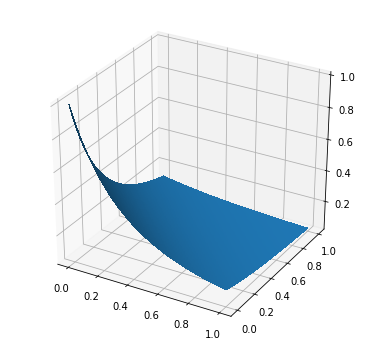

The function value at (0,0.5) is 0.2962962962962963
The analytical integral value in the Domain [0,1]^d is 0.16666666666666663


In [1]:
%matplotlib inline
from sys import path
path.append('../src/')

from Function import *
import numpy as np
dim = 2
coeffs = np.ones(dim)
a = np.zeros(dim)
b = np.ones(dim)
f = GenzCornerPeak(coeffs=coeffs)
f.plot(a, b)
print("The function value at (0,0.5) is", f.eval((0,0.5)))
print("The analytical integral value in the Domain [0,1]^d is", 
      f.getAnalyticSolutionIntegral(np.zeros(dim), np.ones(dim)))

There are many more functions pre-defined in Function.py. It is also possible to compose functions and create combined and scaled functions.

# Standard Combination Technique

So now let's first look at the Truncated Combination Technique with a predefined maximum und minimum level and let's integrate the GenzCornerPeak from before with it. For this purpose we also have to select a grid on which we want to perform the combi. We will use here the equidistant Trapezoidal grid that applies the trapezoidal rule to integrate the function. There are more grids available such as Leja, Clenshaw-Curtis, Gauss-Legendre...

0 [1, 4] 1.0
1 [2, 3] 1.0
2 [3, 2] 1.0
3 [4, 1] 1.0
4 [1, 3] -1.0
5 [2, 2] -1.0
6 [3, 1] -1.0
CombiSolution [0.16662818]
Analytic Solution 0.16666666666666663
Difference 3.848557324429014e-05
Combination Scheme:


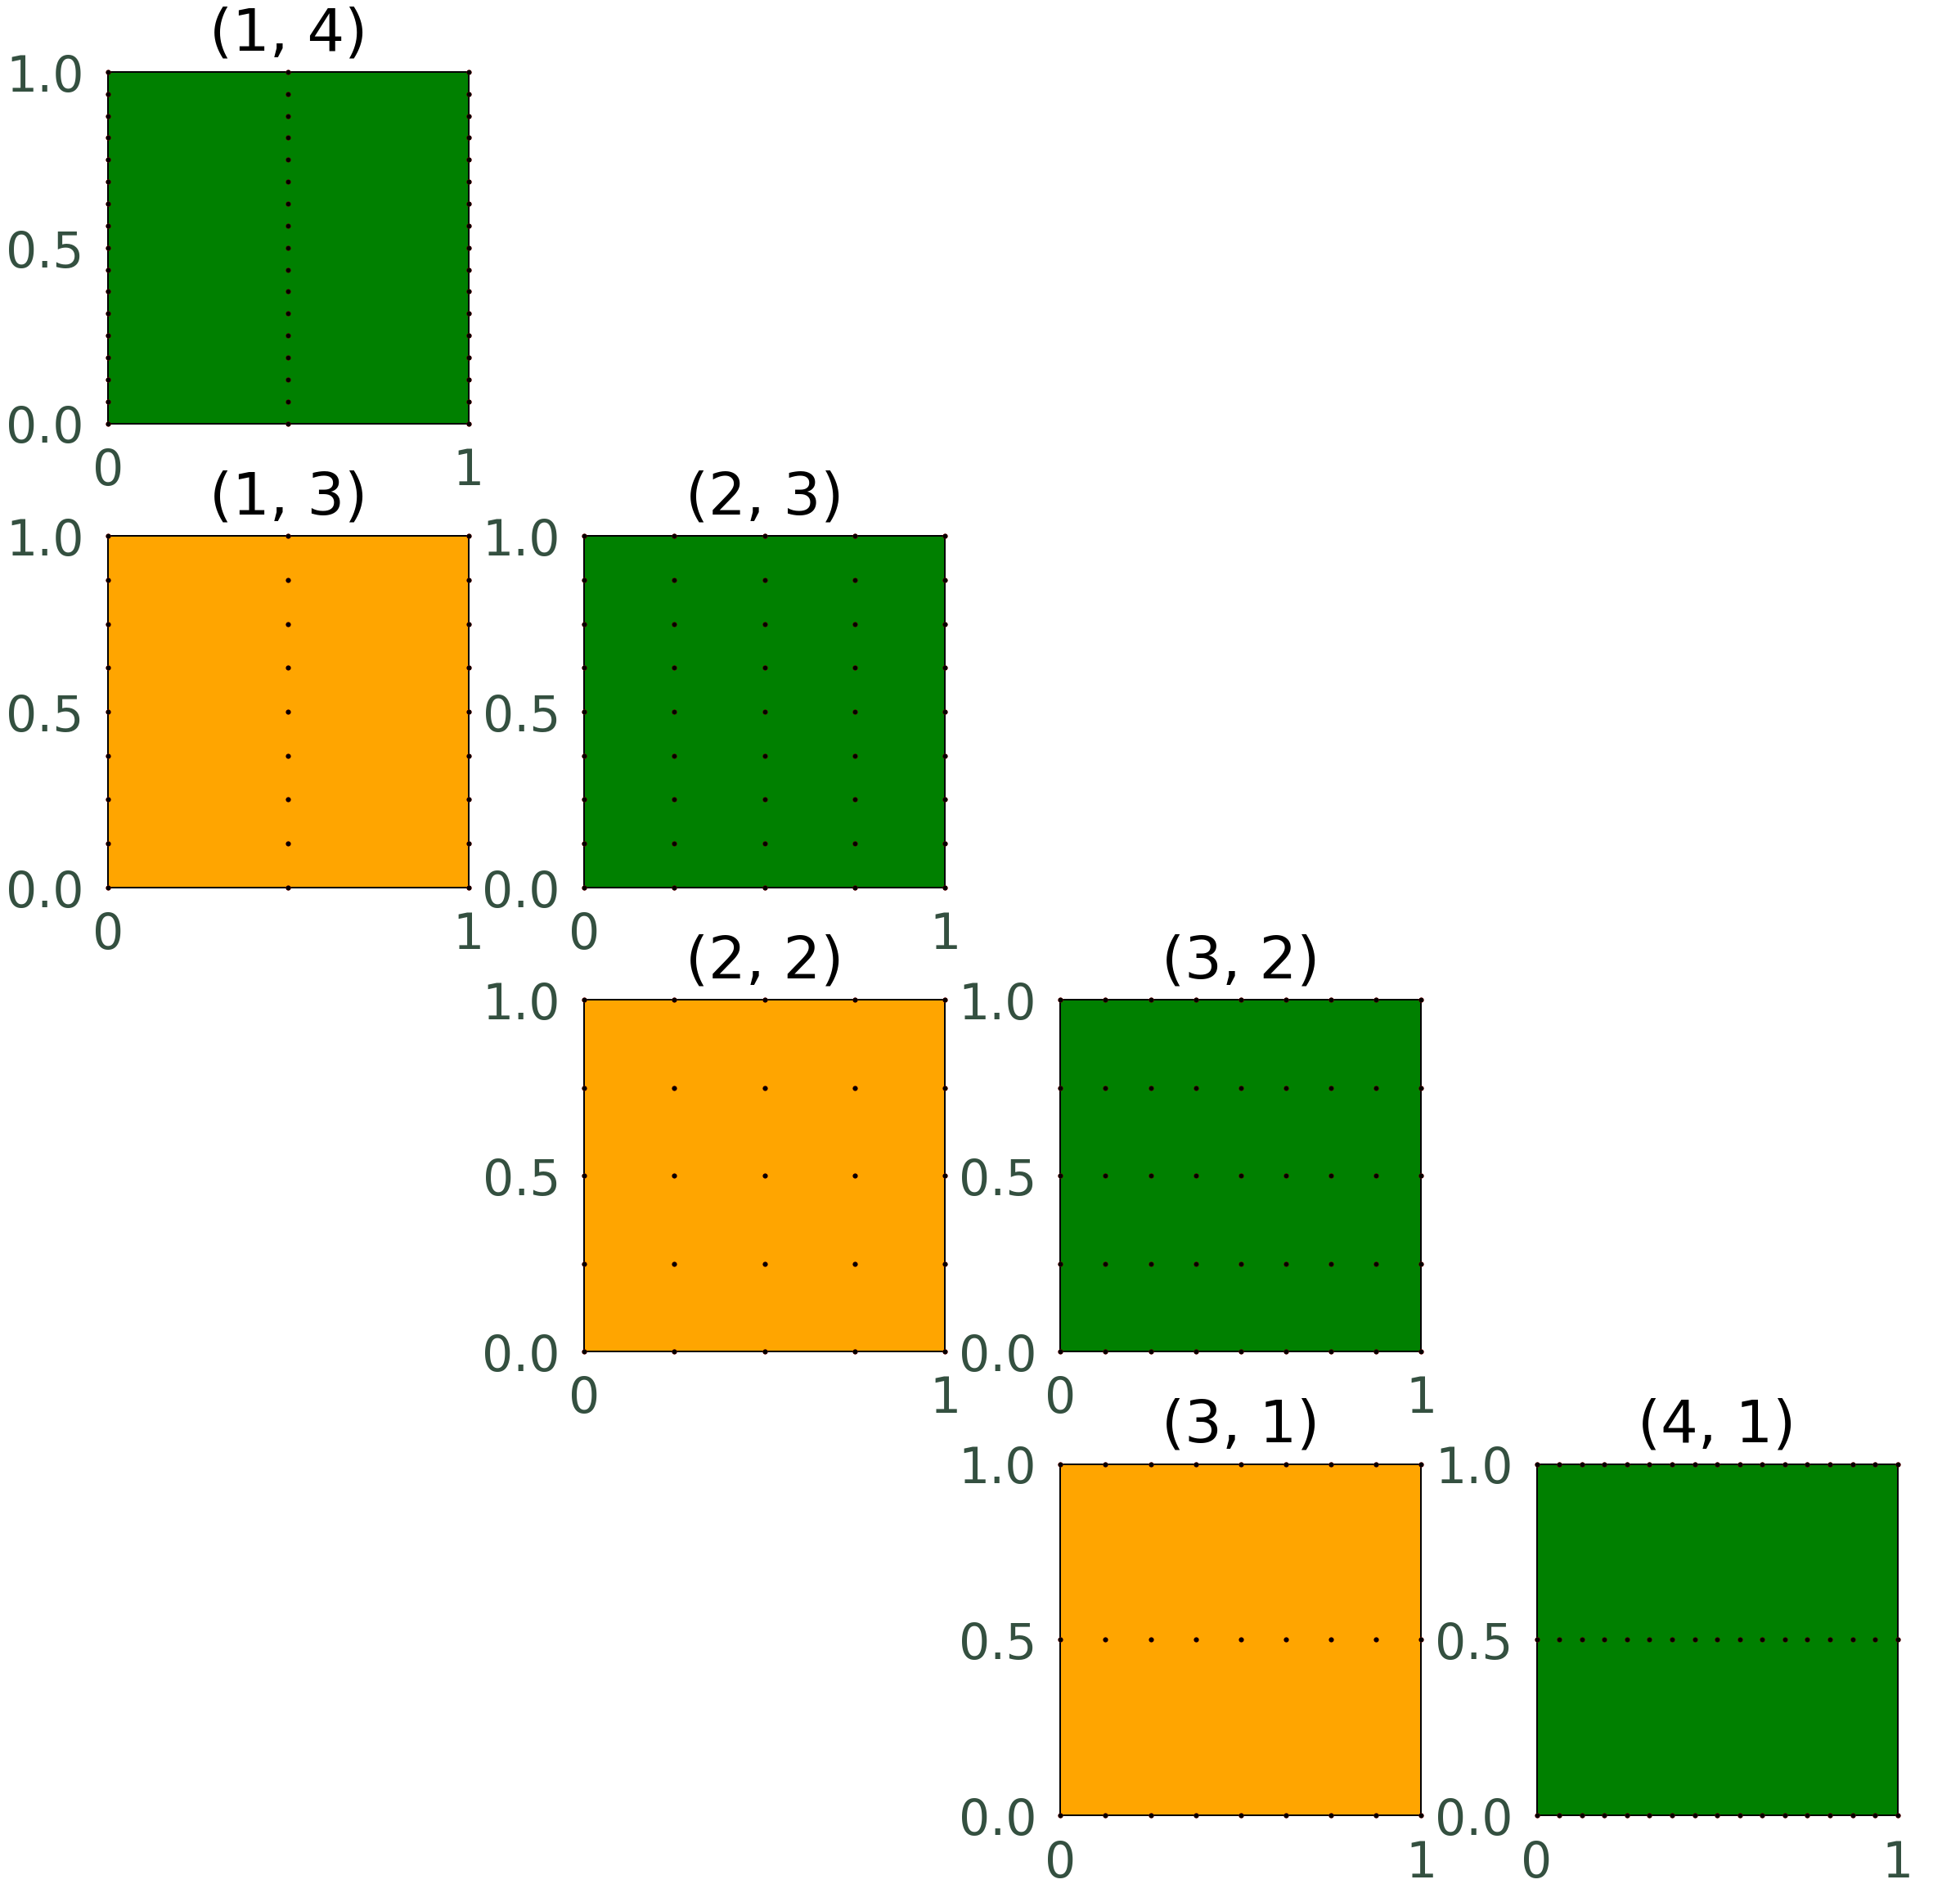

Sparse Grid:


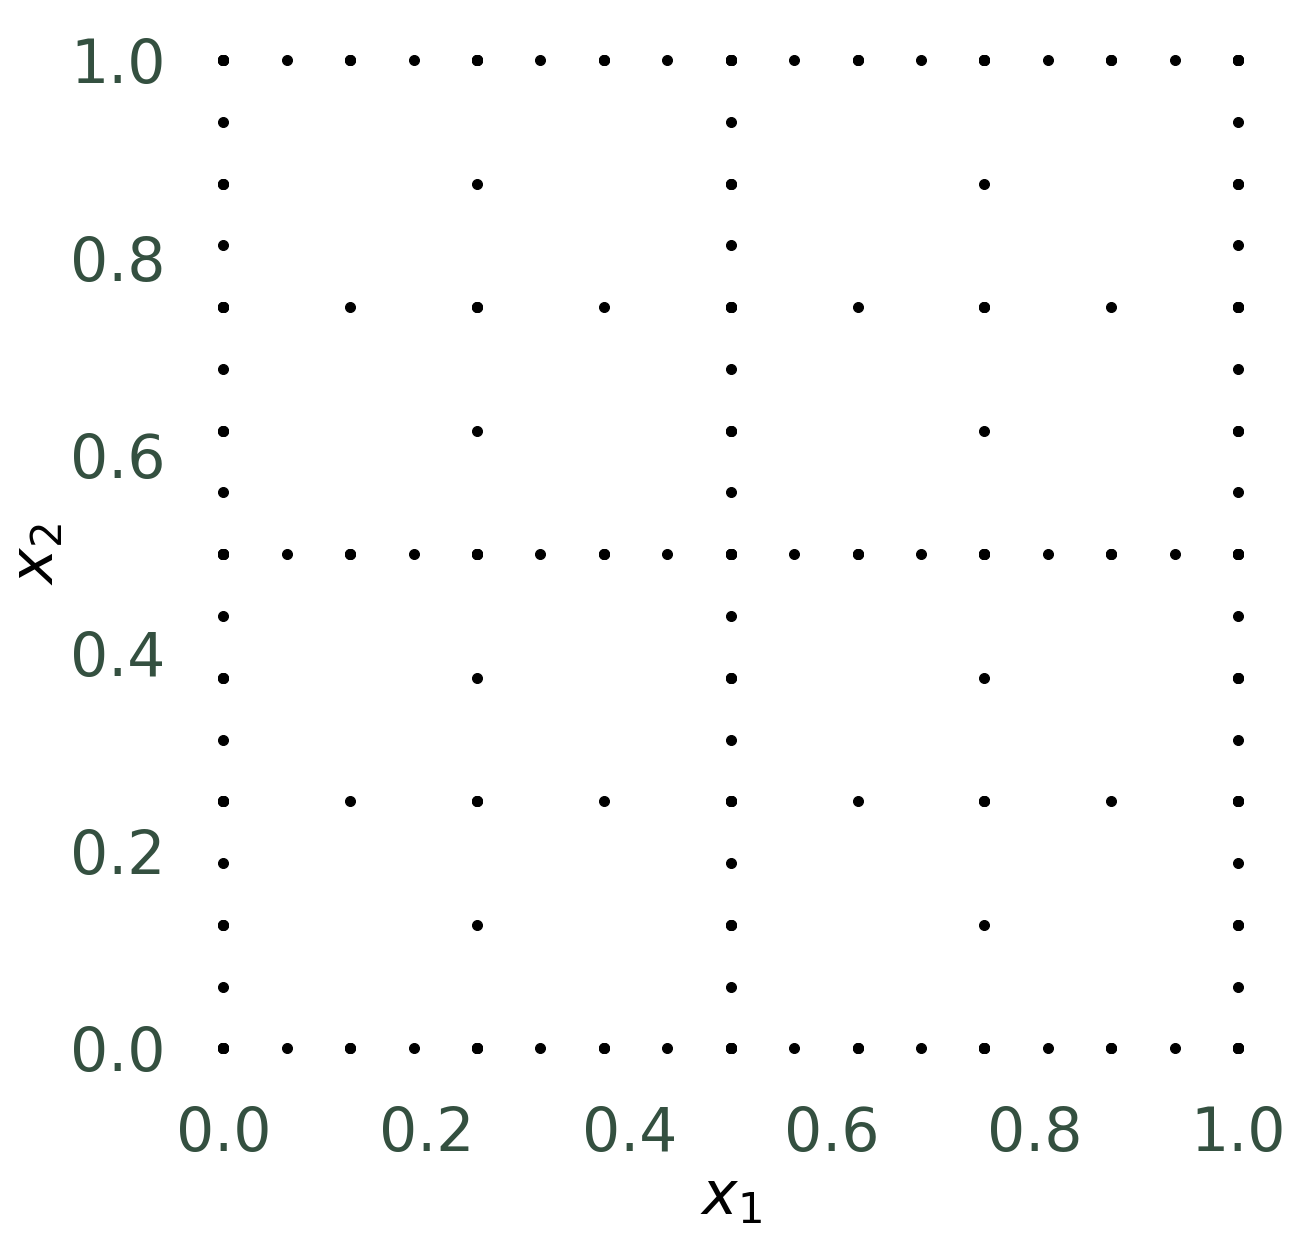

Plot of combimodel for function:


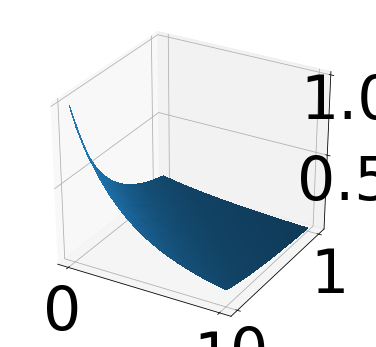

In [1]:
%matplotlib inline
from sys import path
path.append('../src/')
from Function import *
from StandardCombi import *
from Grid import *
import numpy as np
dim = 2
coeffs = np.ones(dim)
a = np.zeros(dim)
b = np.ones(dim)
grid = TrapezoidalGrid(a=a, b=b, boundary=True)
f = GenzCornerPeak(coeffs=coeffs)
# NEW! define operation which shall be performed in the combination technique
from GridOperation import *
operation = Integration(f=f, grid=grid, dim=dim, reference_solution = f.getAnalyticSolutionIntegral(a,b))
combiObject = StandardCombi(a, b, operation=operation)
minimum_level = 1
maximum_level = 4
combiObject.perform_operation(minimum_level, maximum_level)
print("Combination Scheme:")
combiObject.print_resulting_combi_scheme(markersize=5)
print("Sparse Grid:")
combiObject.print_resulting_sparsegrid(markersize=10)
print("Plot of combimodel for function:")
combiObject.plot()


The output shows the combination Scheme that is used which defines the level vectors and the coefficients of the grids. Then the solution of the combination integral is listed followed by the analytic solution and the absolute error. Finally the graphical plot of the combination scheme and the resulting sparse grid is shown.

# Dimension Adaptive Combination Technique

An often used variant of the Standard Combination Technique is the dimension adaptive Combination Technique. An implementation which applies this method is now available within the framework. It is called similarly to the Standard Combination Technique but now we also have to define a tolerance to indicate how long we want to adapt the scheme. The adaptation stops once the relative error of the integration falls below this tolerance threshold.

0 [3, 2] 1
1 [2, 2] -1
2 [3, 1] -1
3 [1, 3] -1
4 [1, 4] 1
5 [2, 3] 1
6 [4, 1] 1
Current combi integral: [0.16662818]
Currentrelative error: 0.0002309134394662405
Current error: [0.00023091]
Refining (1, 4)
Current combi integral: [0.16638472]
Currentrelative error: 0.0016916834991529965
Current error: [0.00169168]
Refining (4, 1)
Current combi integral: [0.16614126]
Currentrelative error: 0.0031524535588397526
Current error: [0.00315245]
Refining (1, 5)
Current combi integral: [0.16608033]
Currentrelative error: 0.003518035174750745
Current error: [0.00351804]
Refining (5, 1)
Current combi integral: [0.1660194]
Currentrelative error: 0.003883616790661738
Current error: [0.00388362]
Refining (3, 2)
Current combi integral: [0.16616892]
Currentrelative error: 0.0029864767114010657
Current error: [0.00298648]
Refining (2, 3)
Current combi integral: [0.16647828]
Currentrelative error: 0.0011303472418974783
Current error: [0.00113035]
Refining (1, 6)
Current combi integral: [0.16646304]
Curr

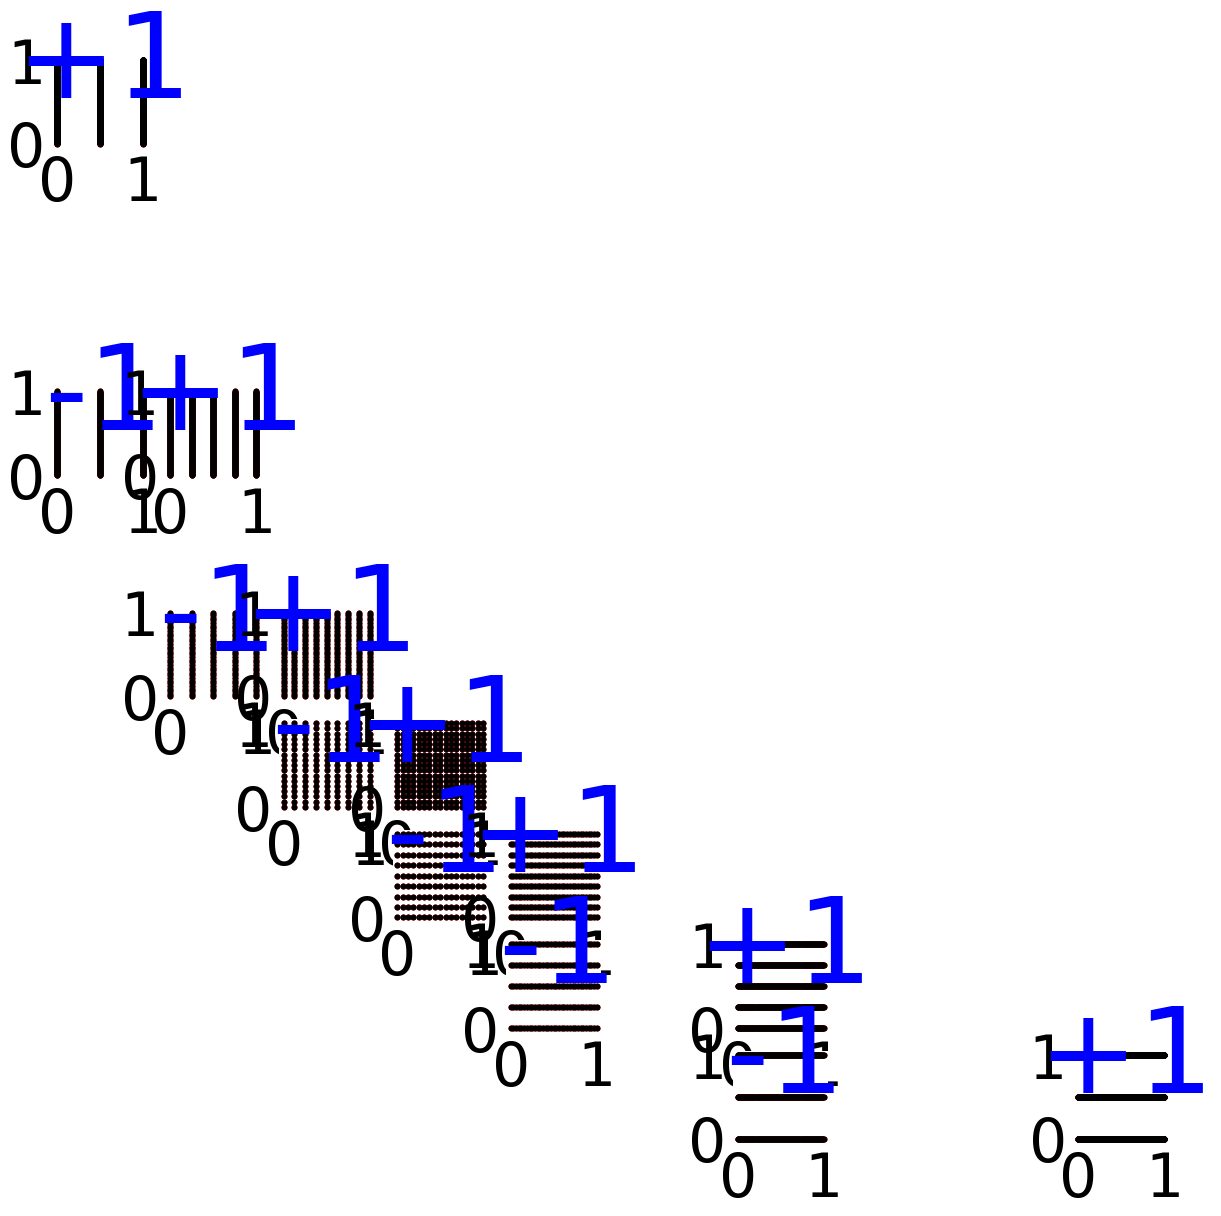

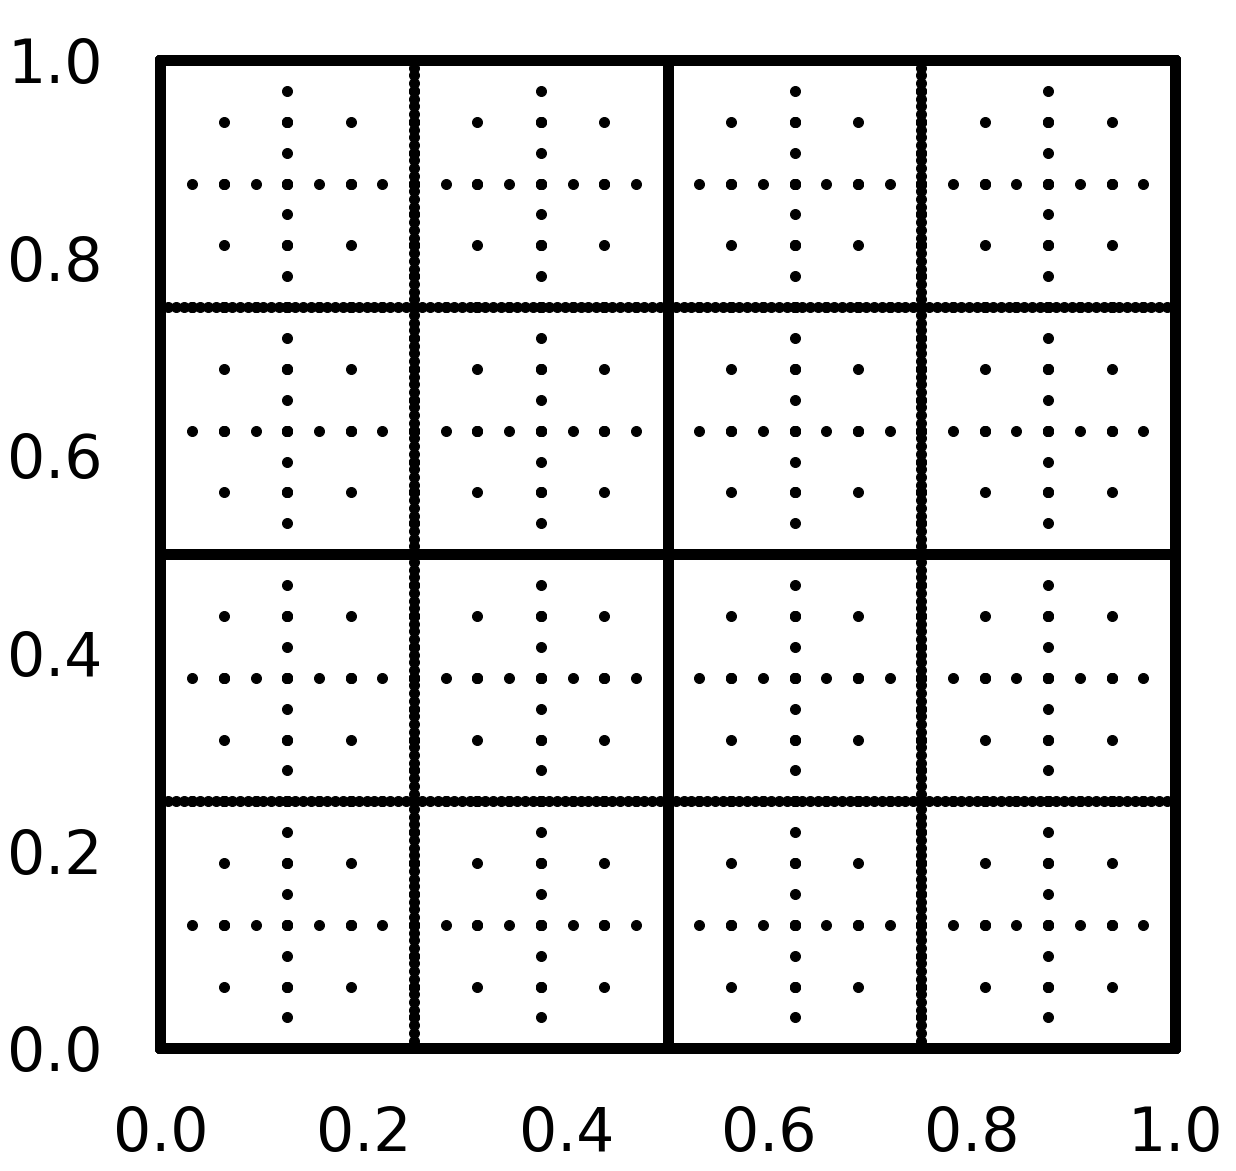

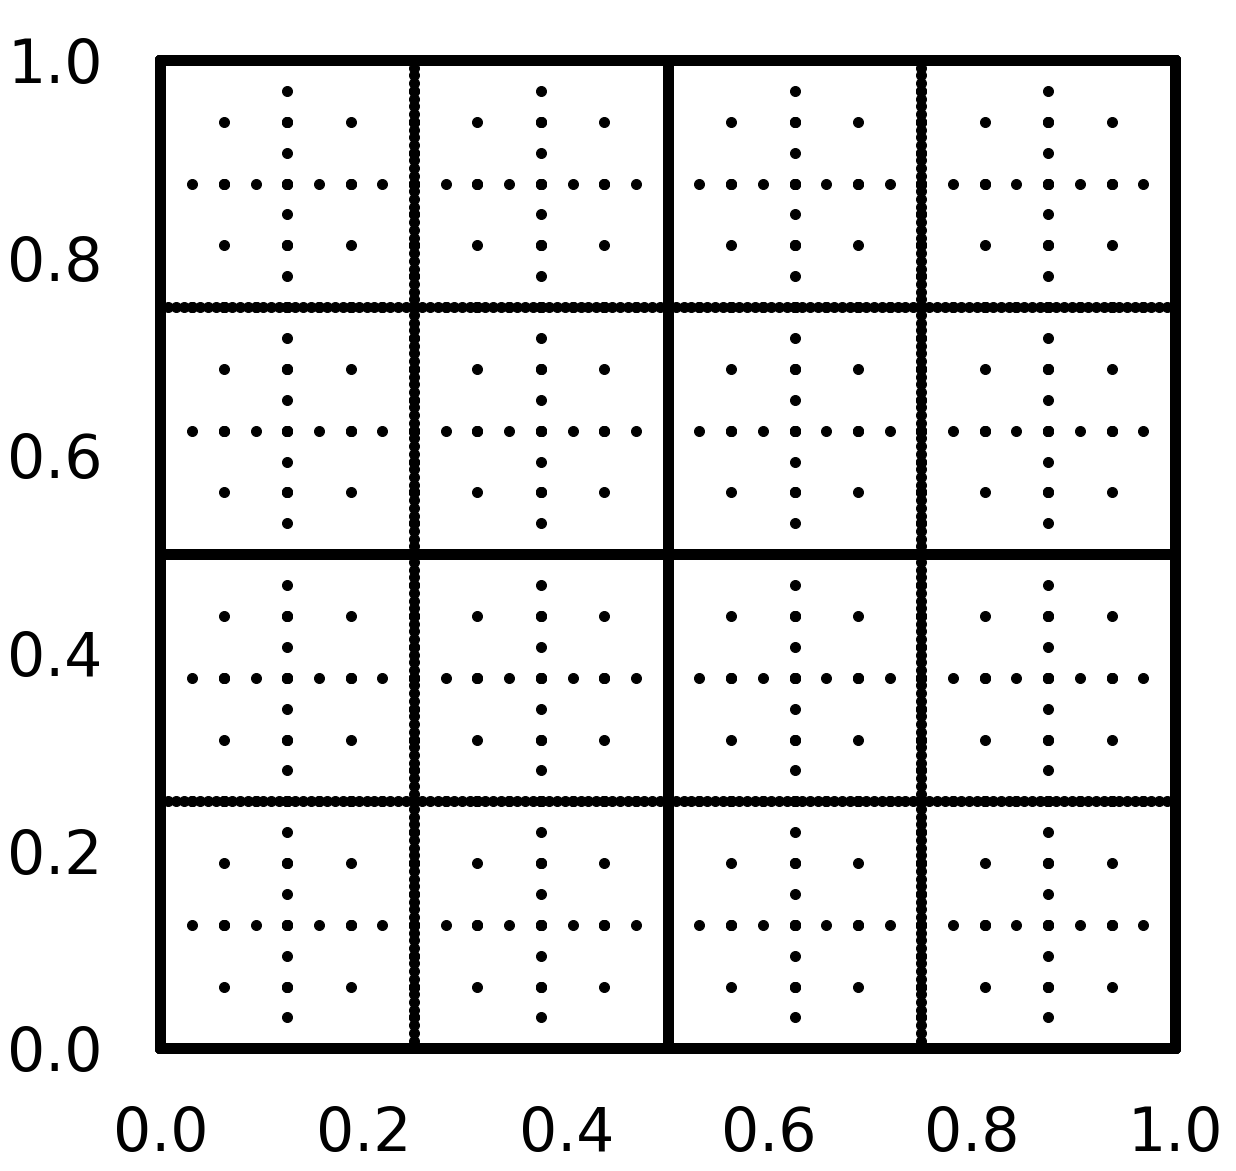

In [10]:
%matplotlib inline
from sys import path
path.append('../src/')
from Function import *
from DimAdaptiveCombi import *
from Grid import *
import numpy as np
dim = 2
coeffs = np.ones(dim)
a = np.zeros(dim)
b = np.ones(dim)
grid = TrapezoidalGrid(a=a, b=b)
f = GenzCornerPeak(coeffs=coeffs)
from GridOperation import *
operation = Integration(f=f, grid=grid, dim=dim, reference_solution = f.getAnalyticSolutionIntegral(a,b))
combiObject = DimAdaptiveCombi(a, b, operation)
minimum_level = 1
maximum_level = 4
combiObject.perform_combi(minimum_level, maximum_level, 10**-4)
combiObject.print_resulting_combi_scheme(markersize=5)
combiObject.print_resulting_sparsegrid(markersize=10)

# SpatiallyAdaptiveCombi

Now we come to the core element of this framework: The spatially adaptive Combination Technique. Here several techniques are implemented and can be tested for all test functions. After configuring the grid, the function, and the dimension we need to create the object for the respective strategy (currently we have the $\textit{SpatiallyAdaptiveFixedScheme}$, the $SpatiallyAdaptiveExtendScheme$, the $SpatiallyAdaptiveCellScheme$ and the  $SpatiallyAdaptiveSingleDimensions$). The different Schemes have different configuration parameters one can choose. For further information have a look in the respective class file. The calling conventions for the spatially adaptive combi slightly differe from those of the standard combis and also include and $errorOperator$ which controls the error estimations and we also have the oportunity to plot the sparse grid and the combination scheme after each refinement step by setting $do\_plot$ to $true$. In the following we will demonstrate the refinement for to schemes including the respective plots.

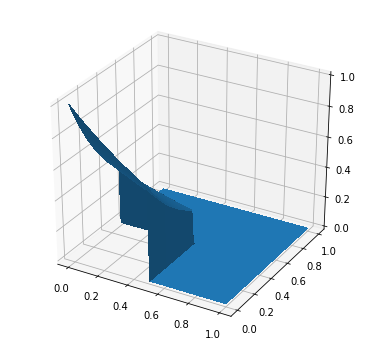

Reference solution: 0.12436002963217704
0 [2, 2] 1.0
split dimension 0
split dimension 0
split dimension 1
split dimension 1
Curent number of function evaluations 25
max surplus error: 0.01116288279501974 total surplus error: 0.08843951713331462
combiintegral: 0.08843951713331462
Current error: 0.28884290720342765
Finished refinement
Refined  1  times
Refinement Graph:


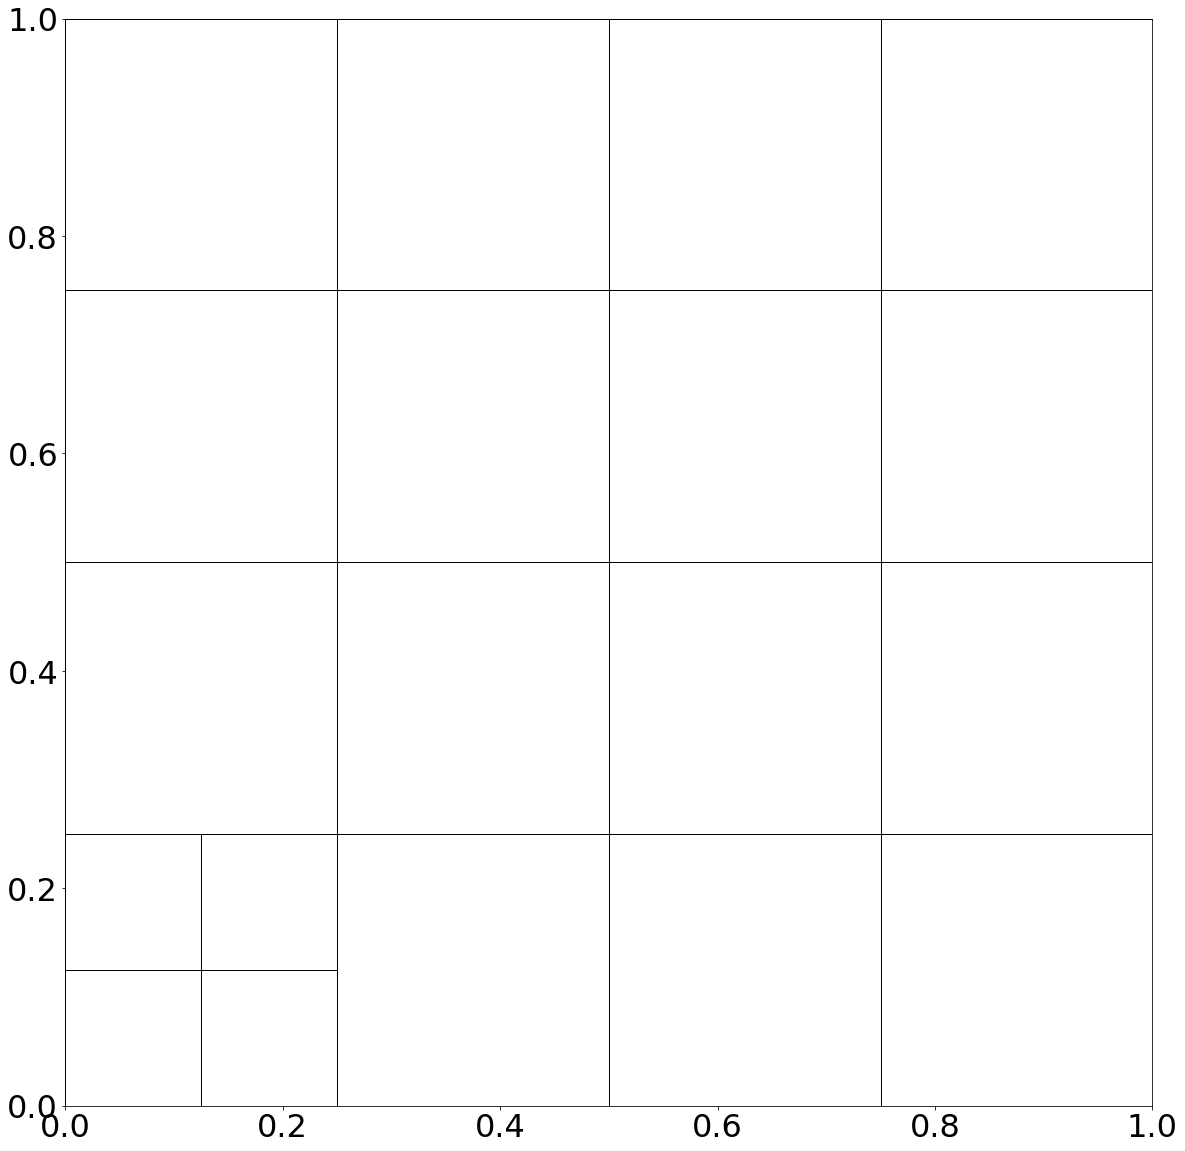

Combi Scheme:


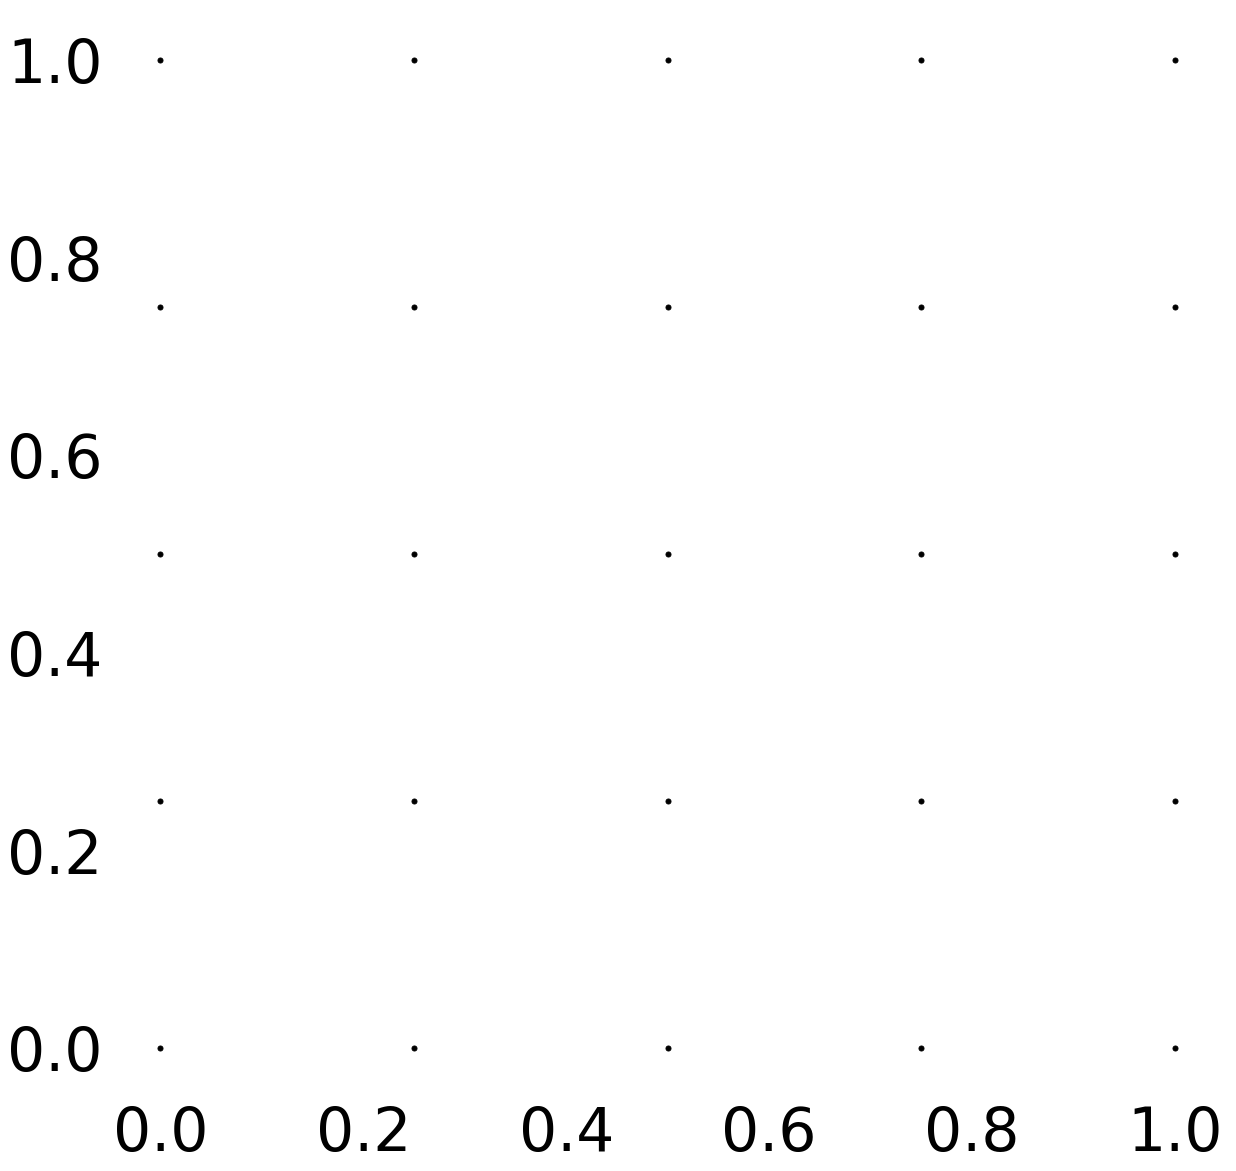

Resulting Sparse Grid:


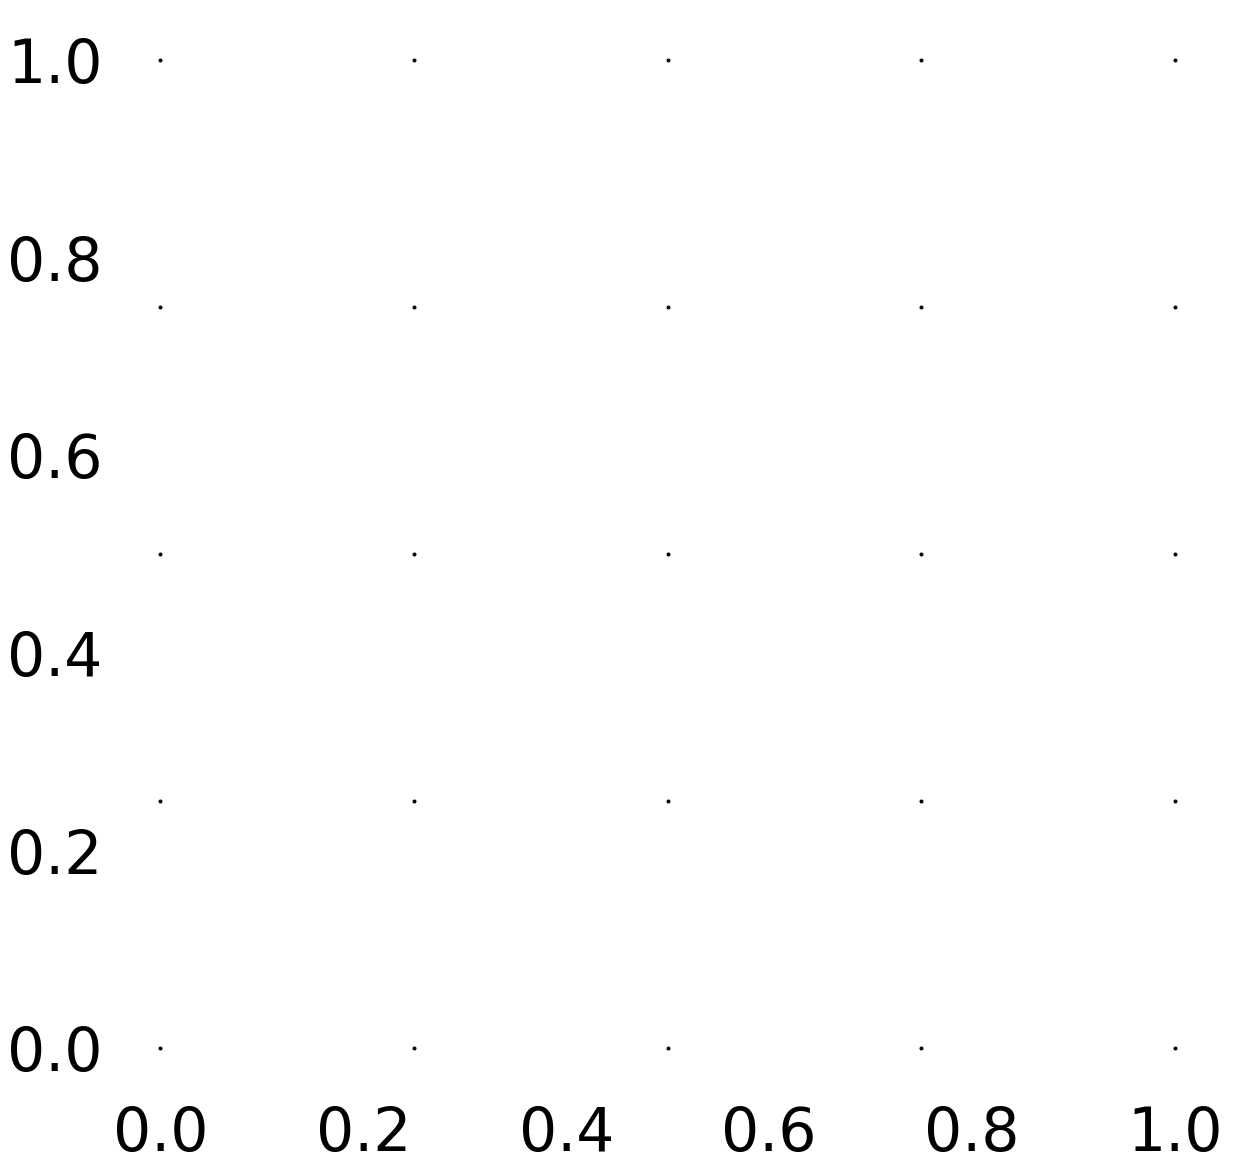

Curent number of function evaluations 29
max surplus error: 0.004887372405517264 total surplus error: 0.08929277059639944
combiintegral: 0.0875862636702298
Current error: 0.2957040623962055
Finished refinement
Refined  1  times
Refinement Graph:


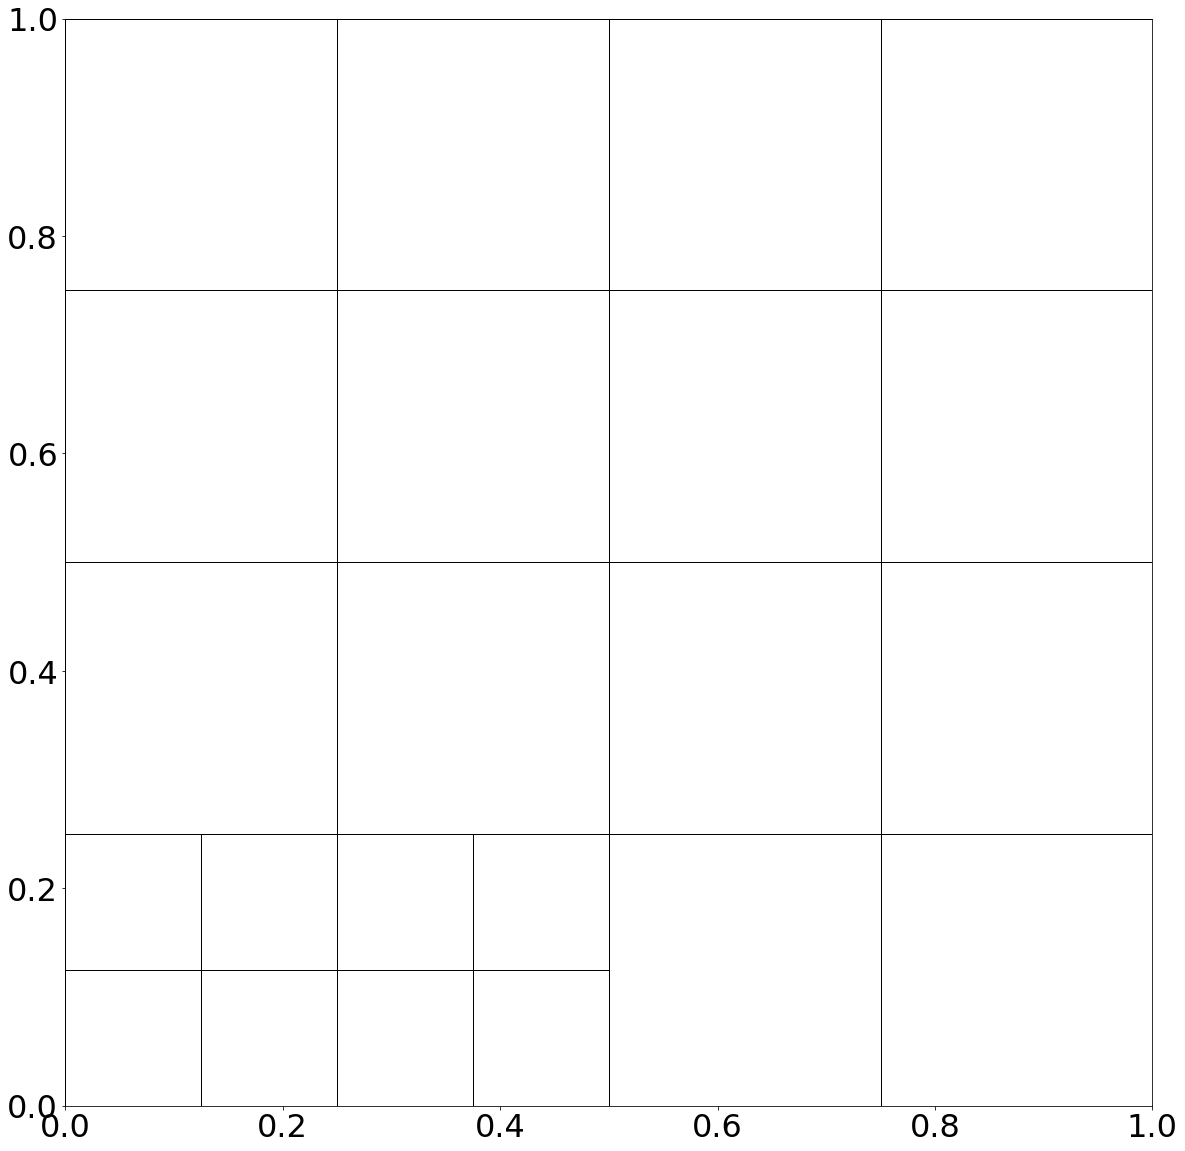

Combi Scheme:


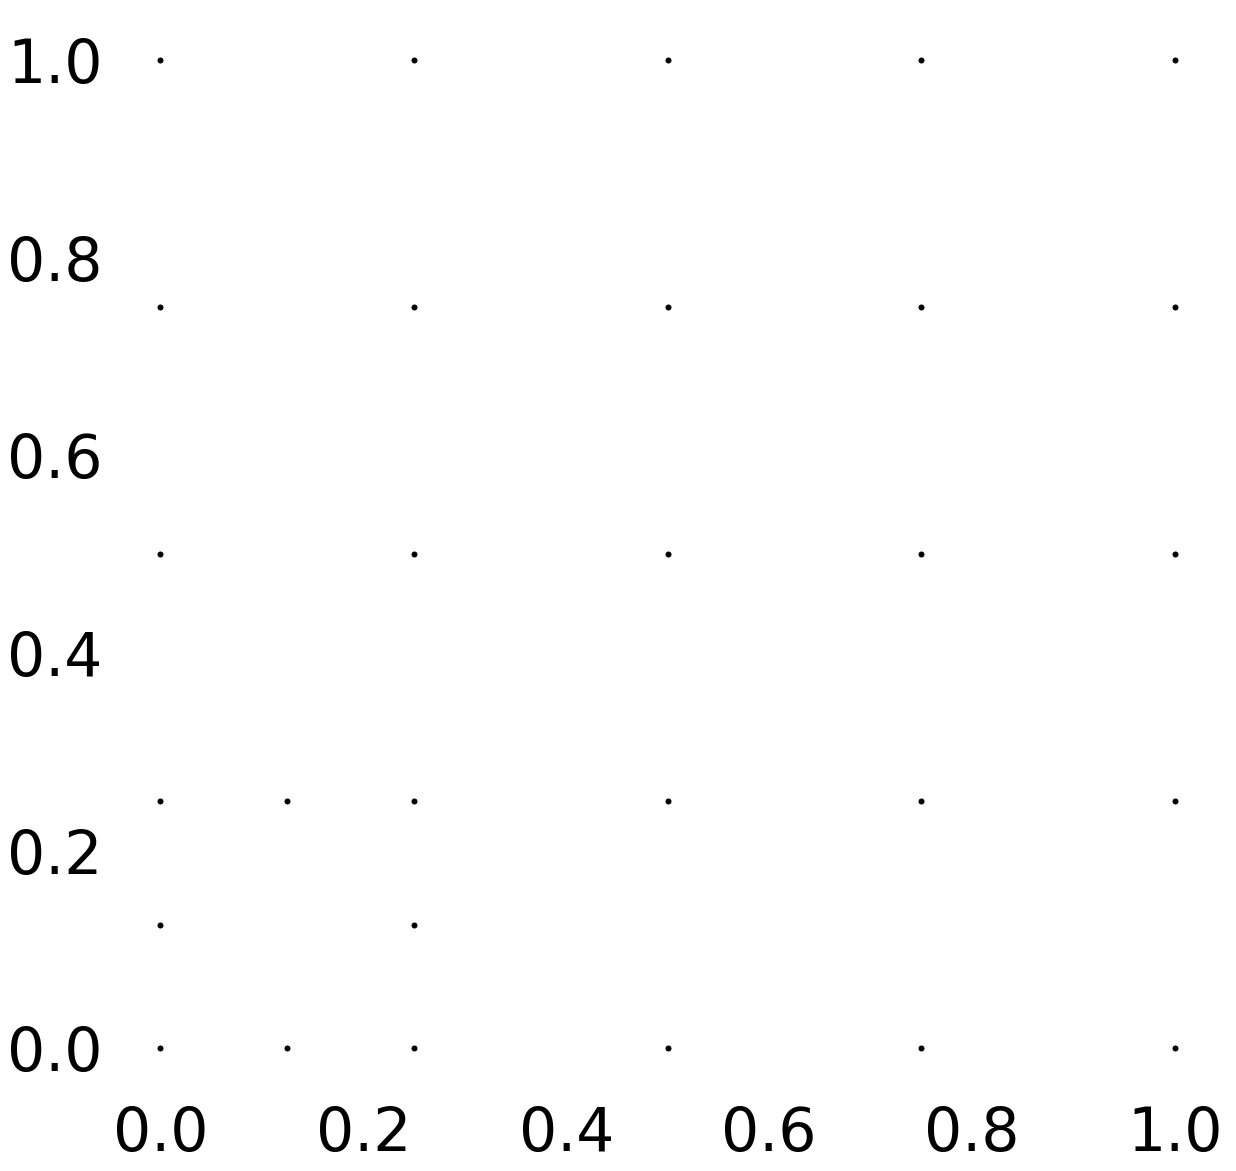

Resulting Sparse Grid:


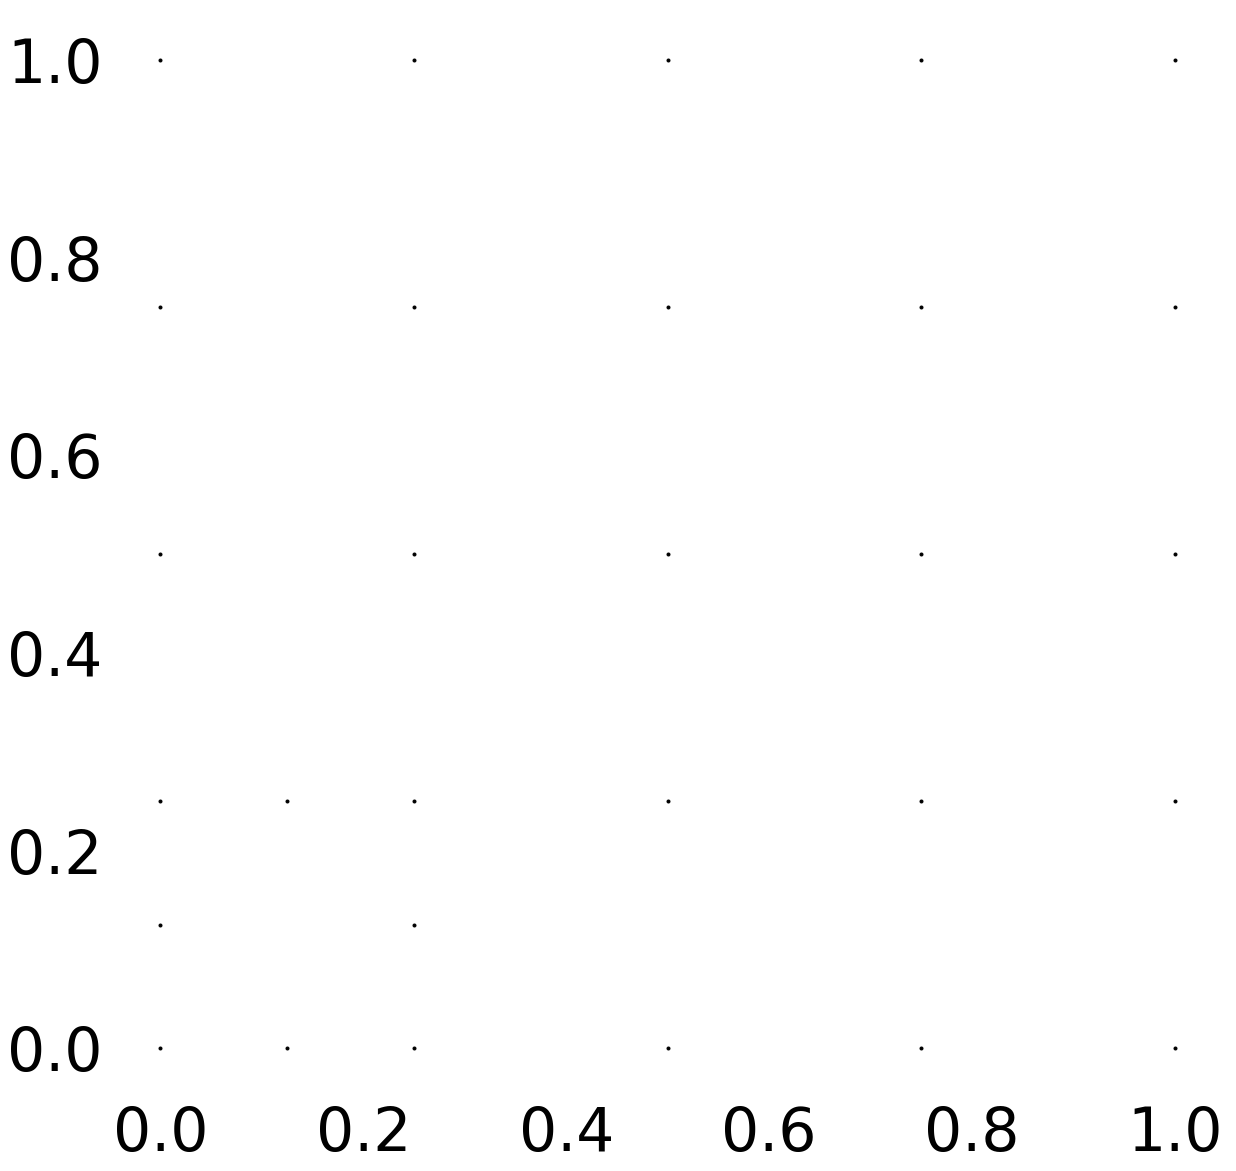

Curent number of function evaluations 32
max surplus error: 0.0042144422361470625 total surplus error: 0.09706809307697518
combiintegral: 0.09476617964475628
Current error: 0.2379691455120369
Finished refinement
Refined  1  times
Refinement Graph:


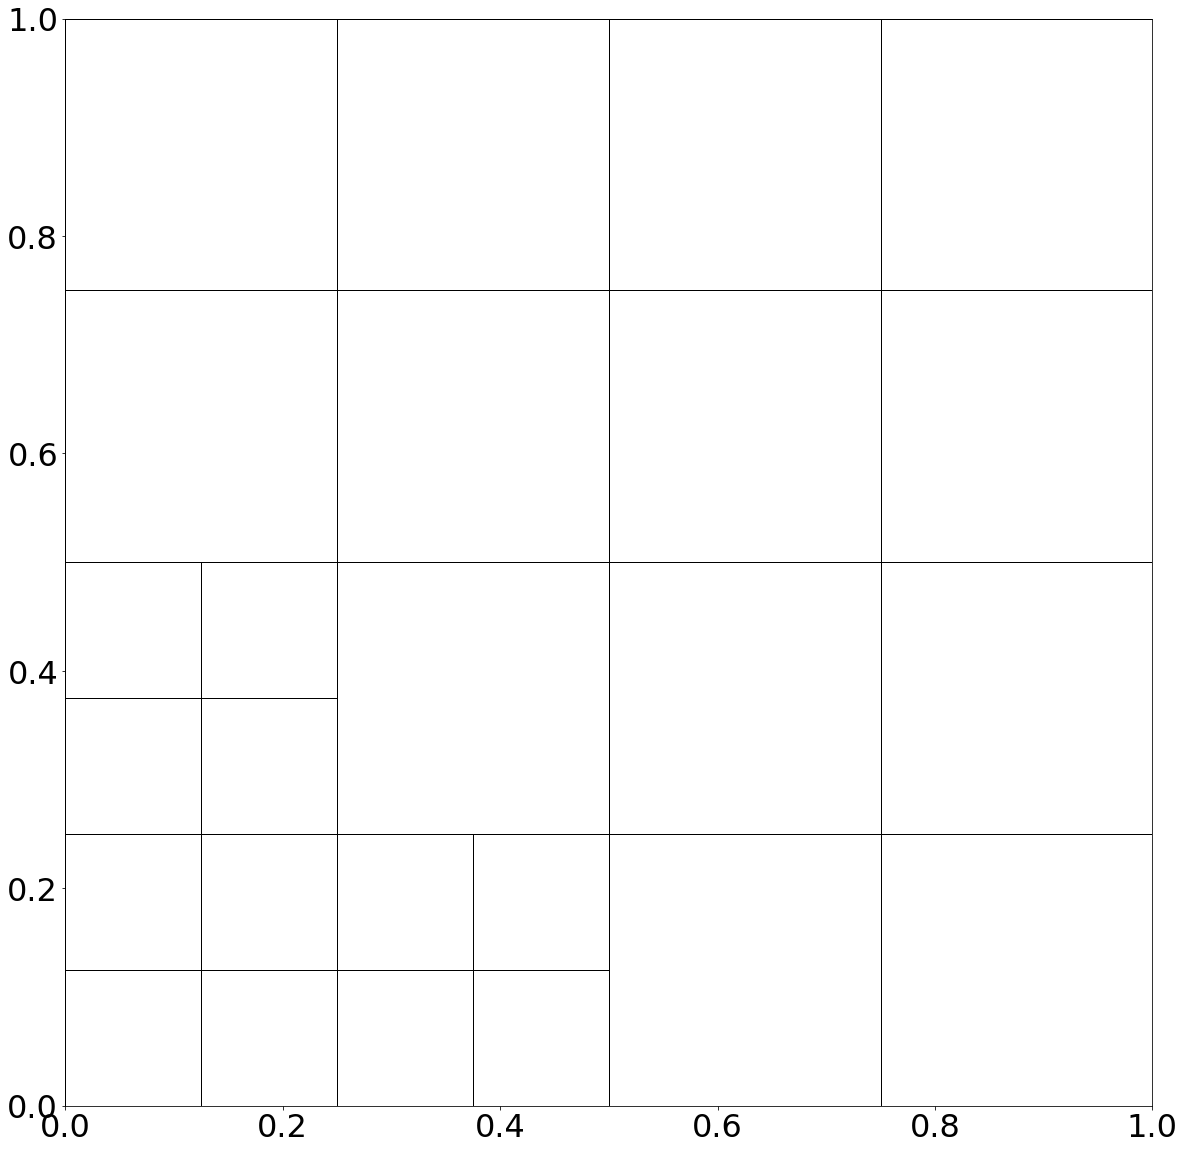

Combi Scheme:


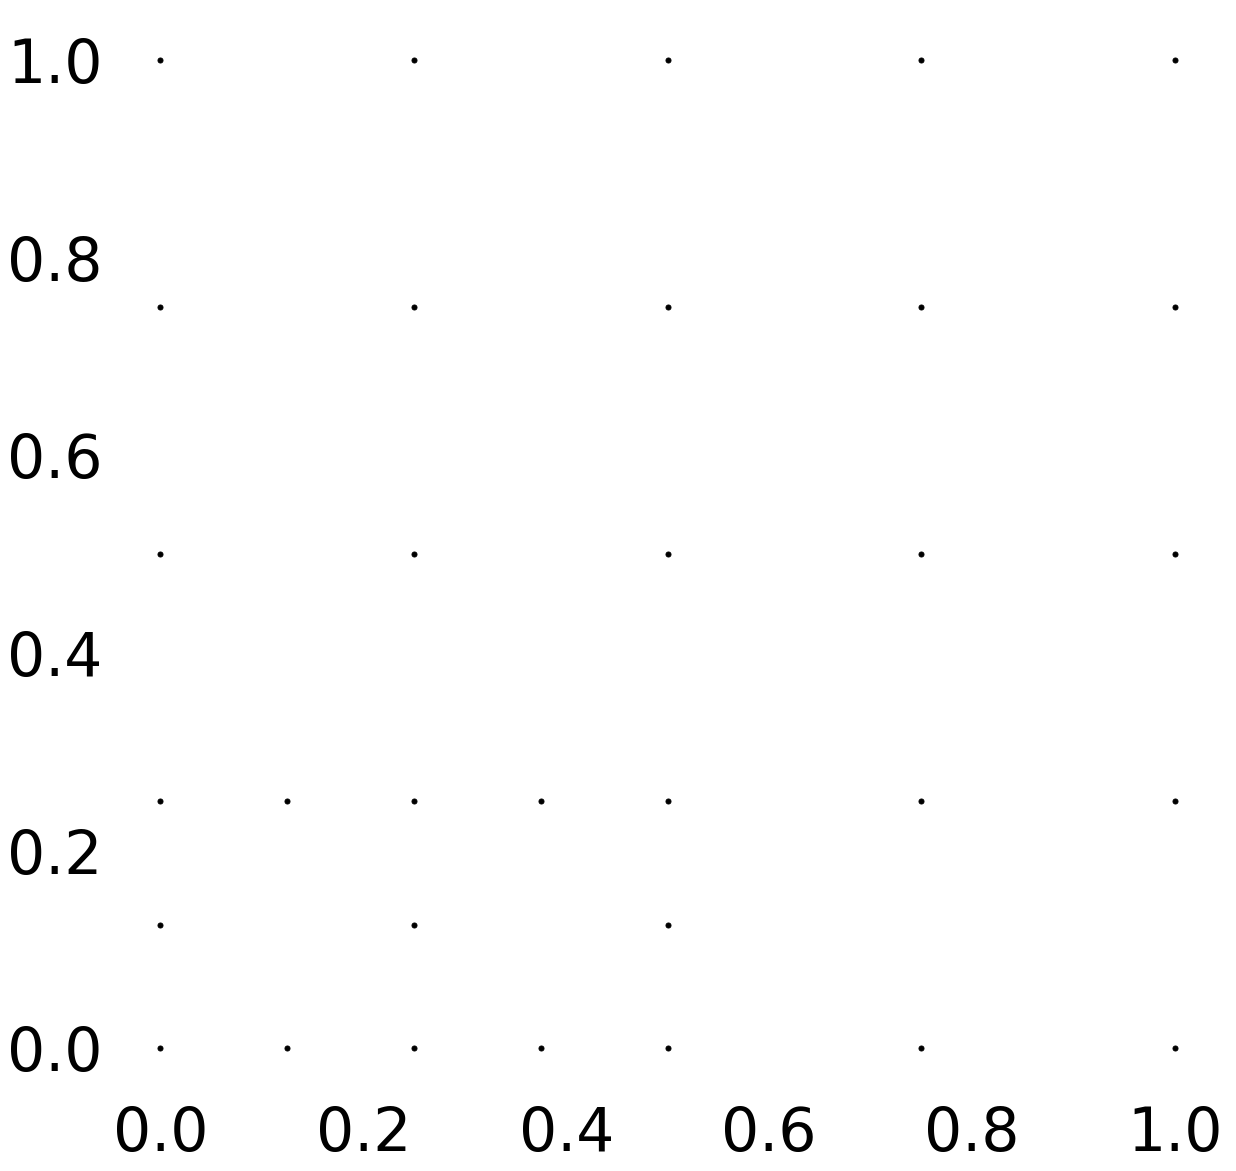

Resulting Sparse Grid:


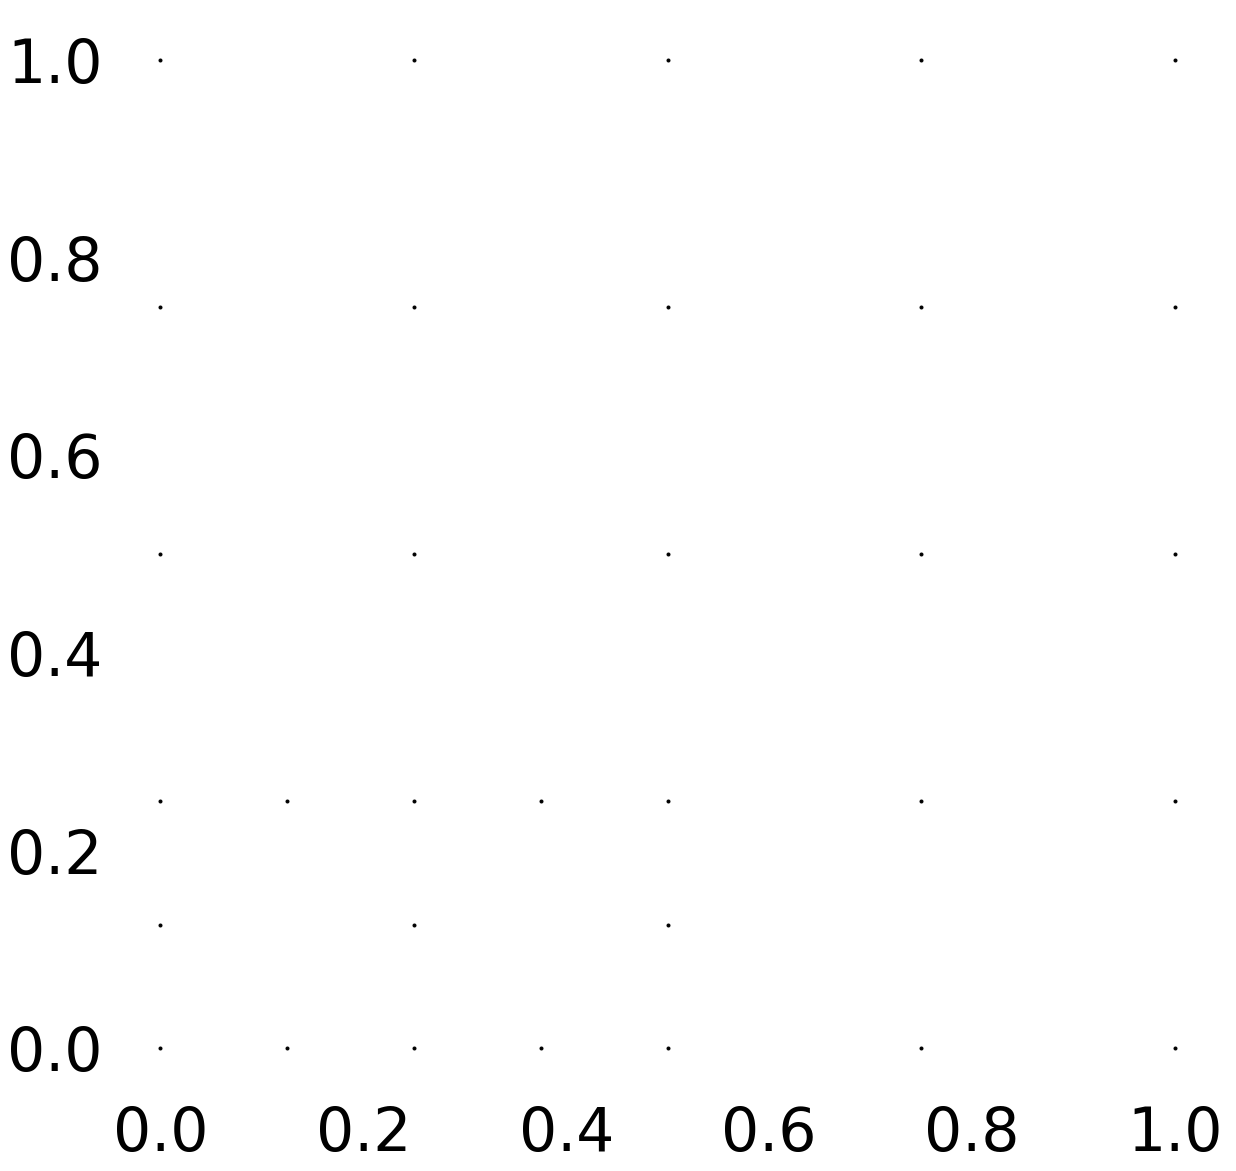

Curent number of function evaluations 35
max surplus error: 0.0018451818466445886 total surplus error: 0.10183347691124811
combiintegral: 0.09940071417565939
Current error: 0.20070207067608847
Finished refinement
Refined  1  times
Refinement Graph:


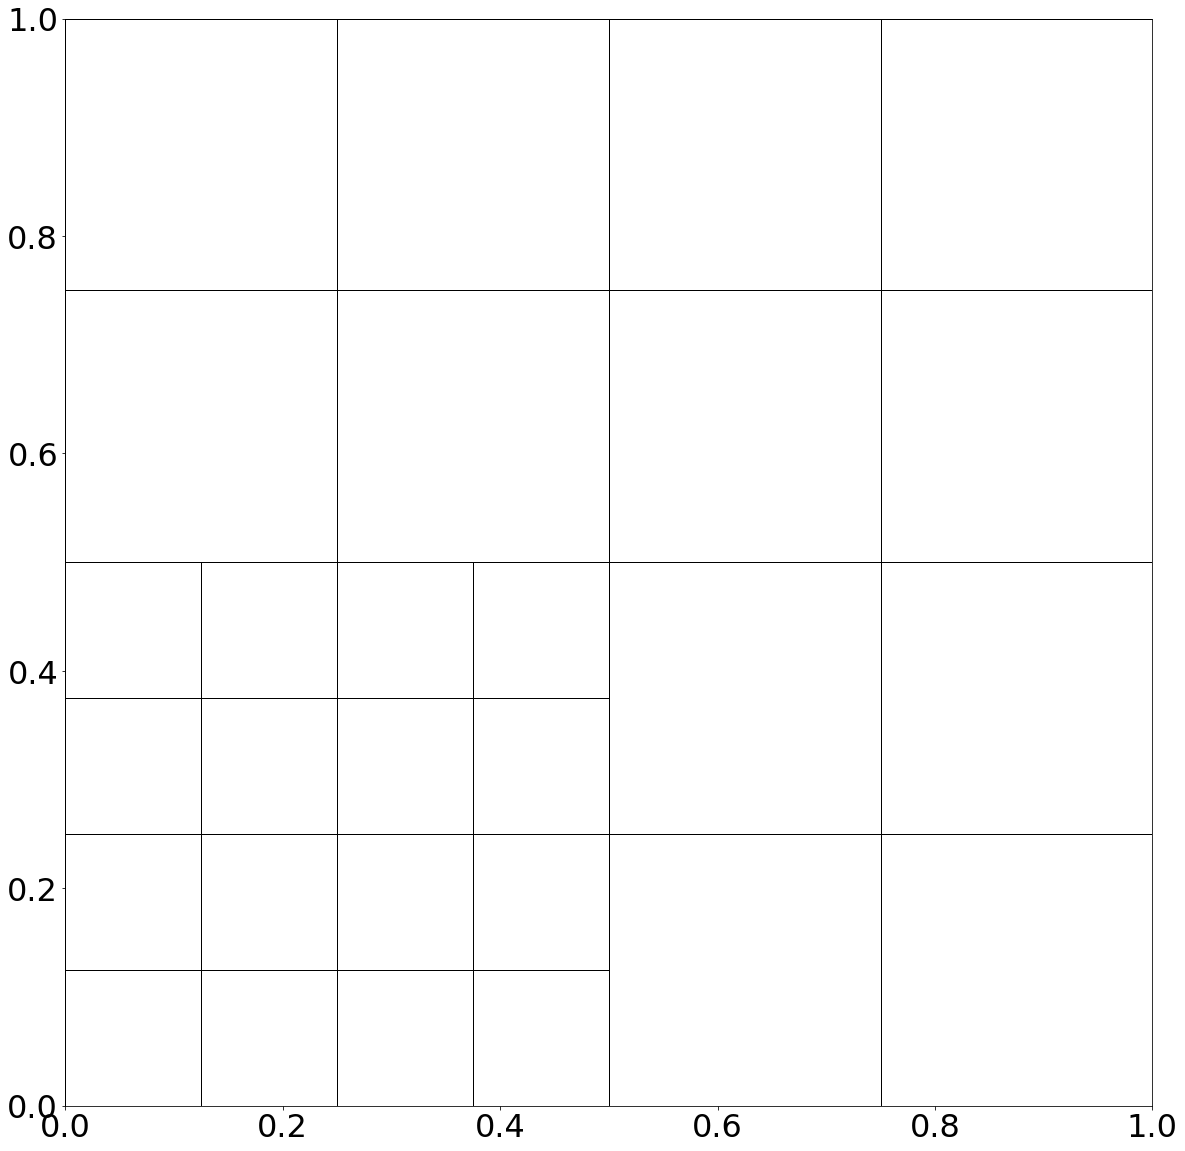

Combi Scheme:


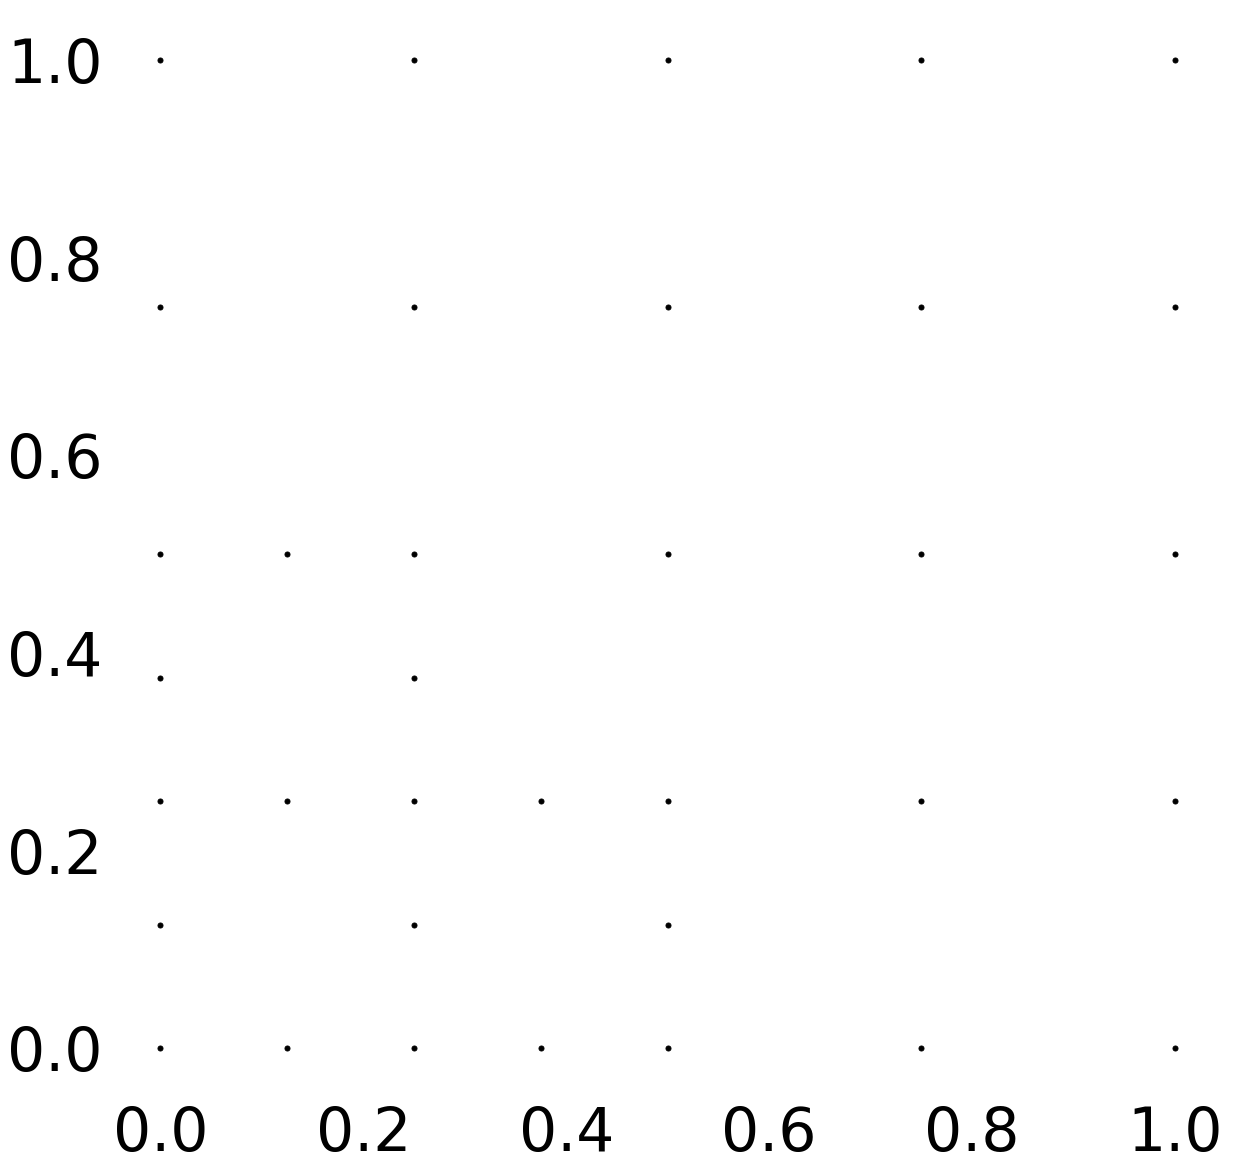

Resulting Sparse Grid:


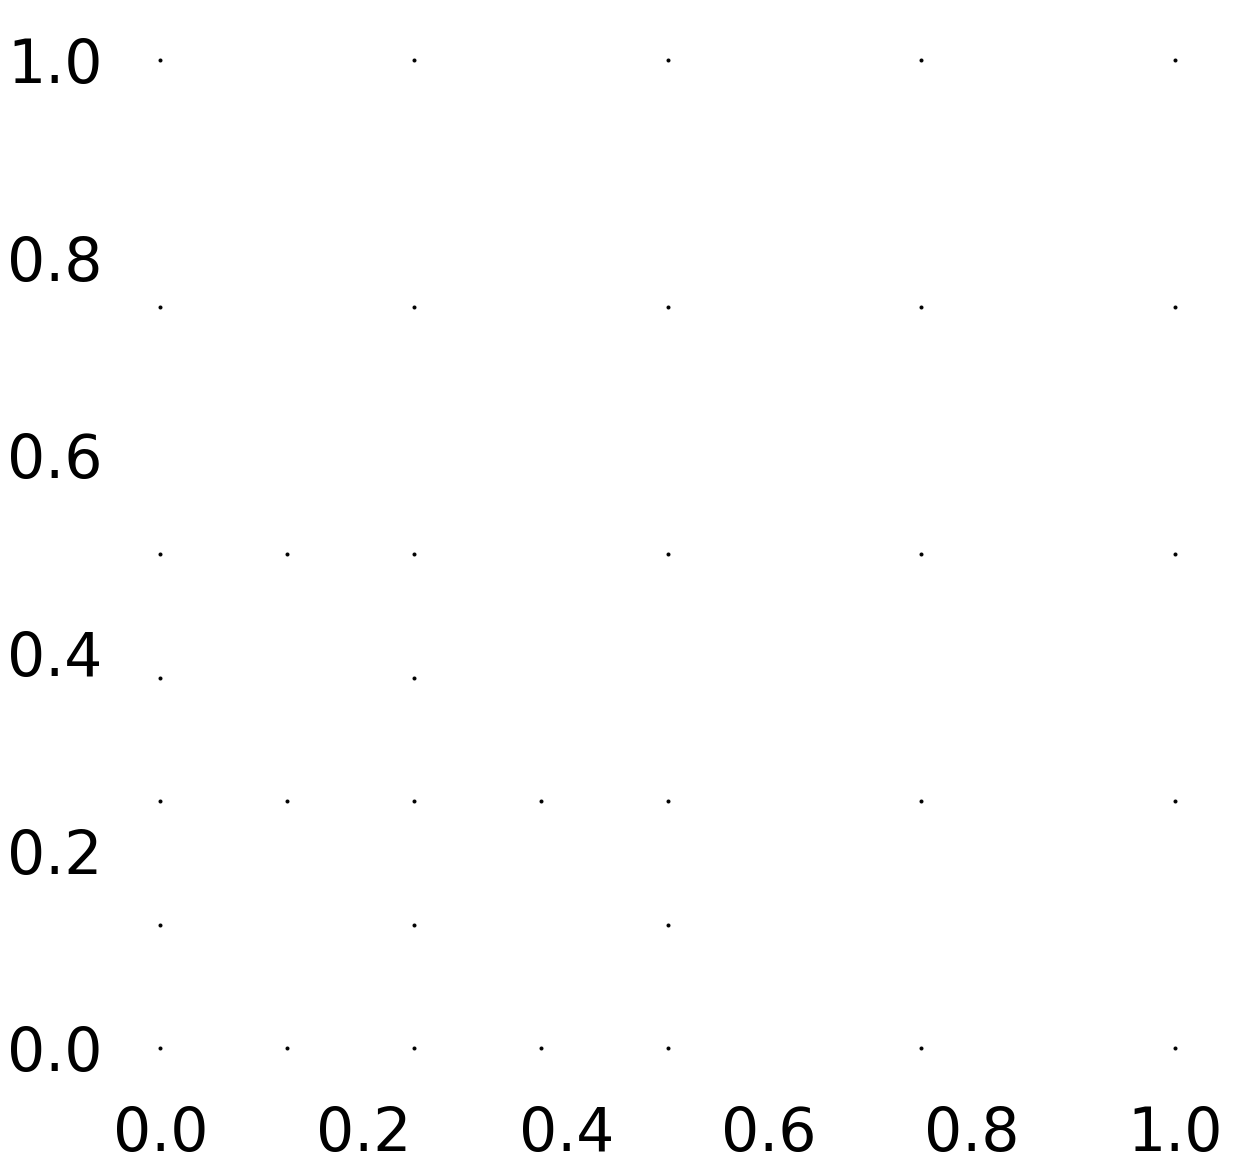

Curent number of function evaluations 37
max surplus error: 0.0004673512017219441 total surplus error: 0.10671433485045023
combiintegral: 0.10428157211486151
Current error: 0.161454267715295
Finished refinement
Refined  2  times
Refinement Graph:


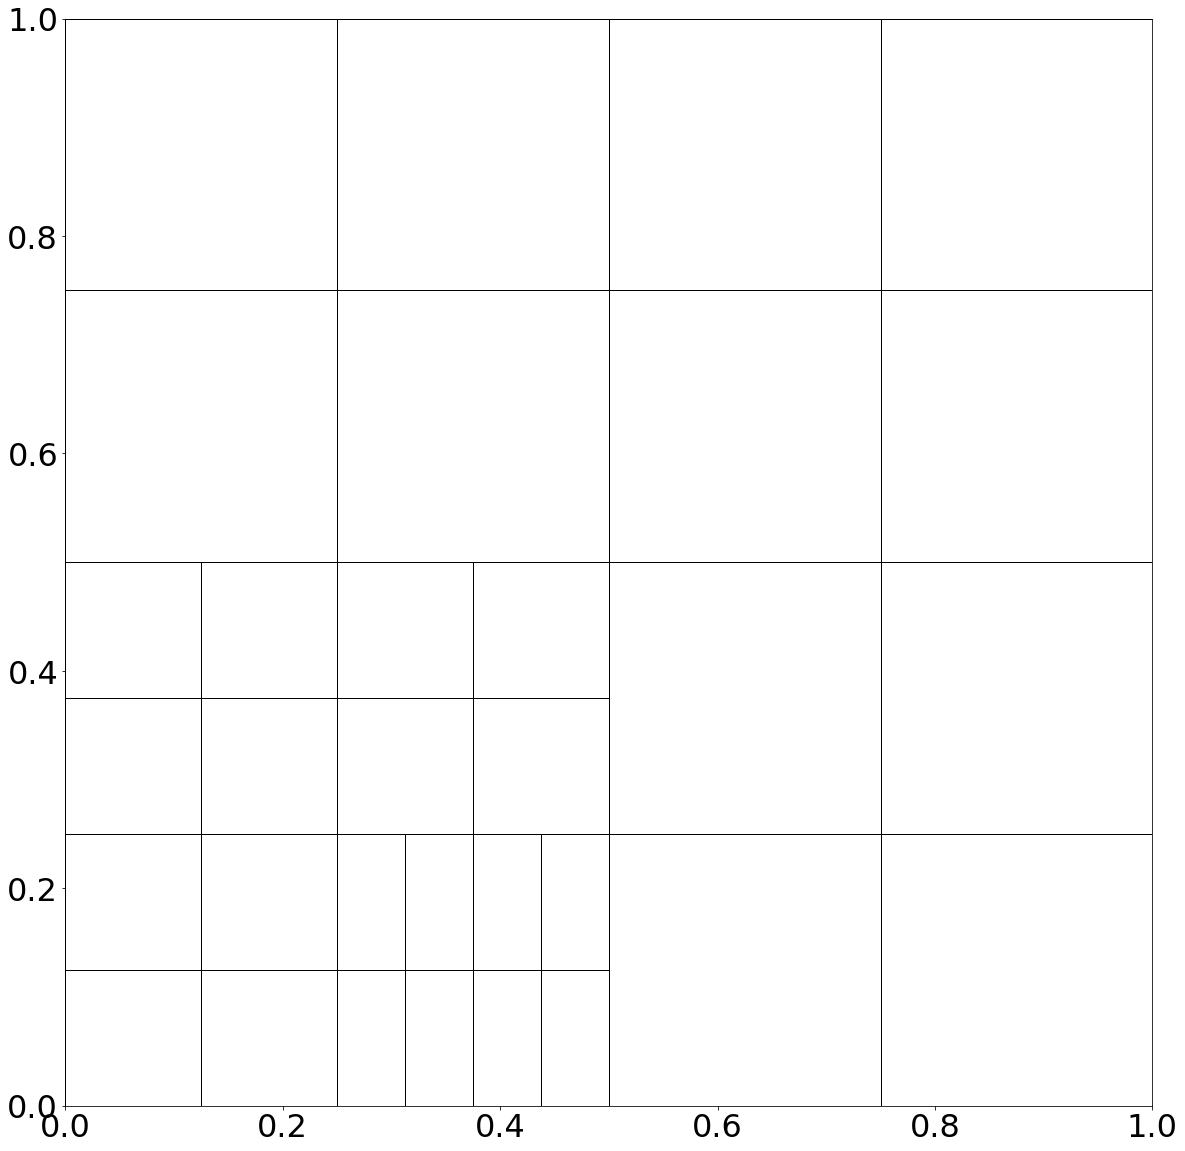

Combi Scheme:


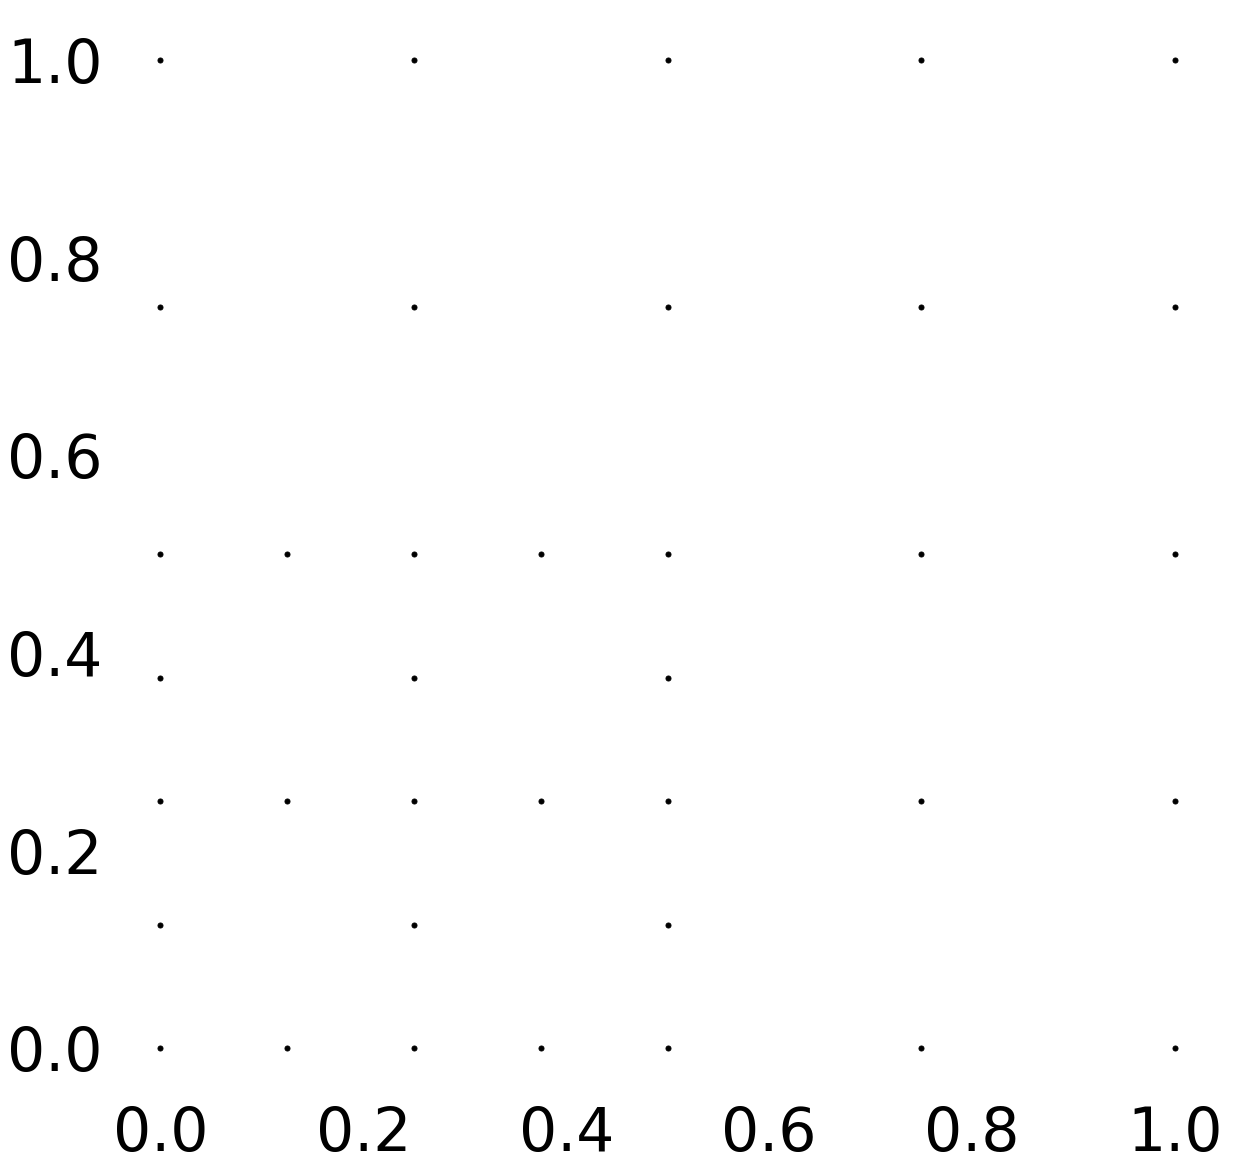

Resulting Sparse Grid:


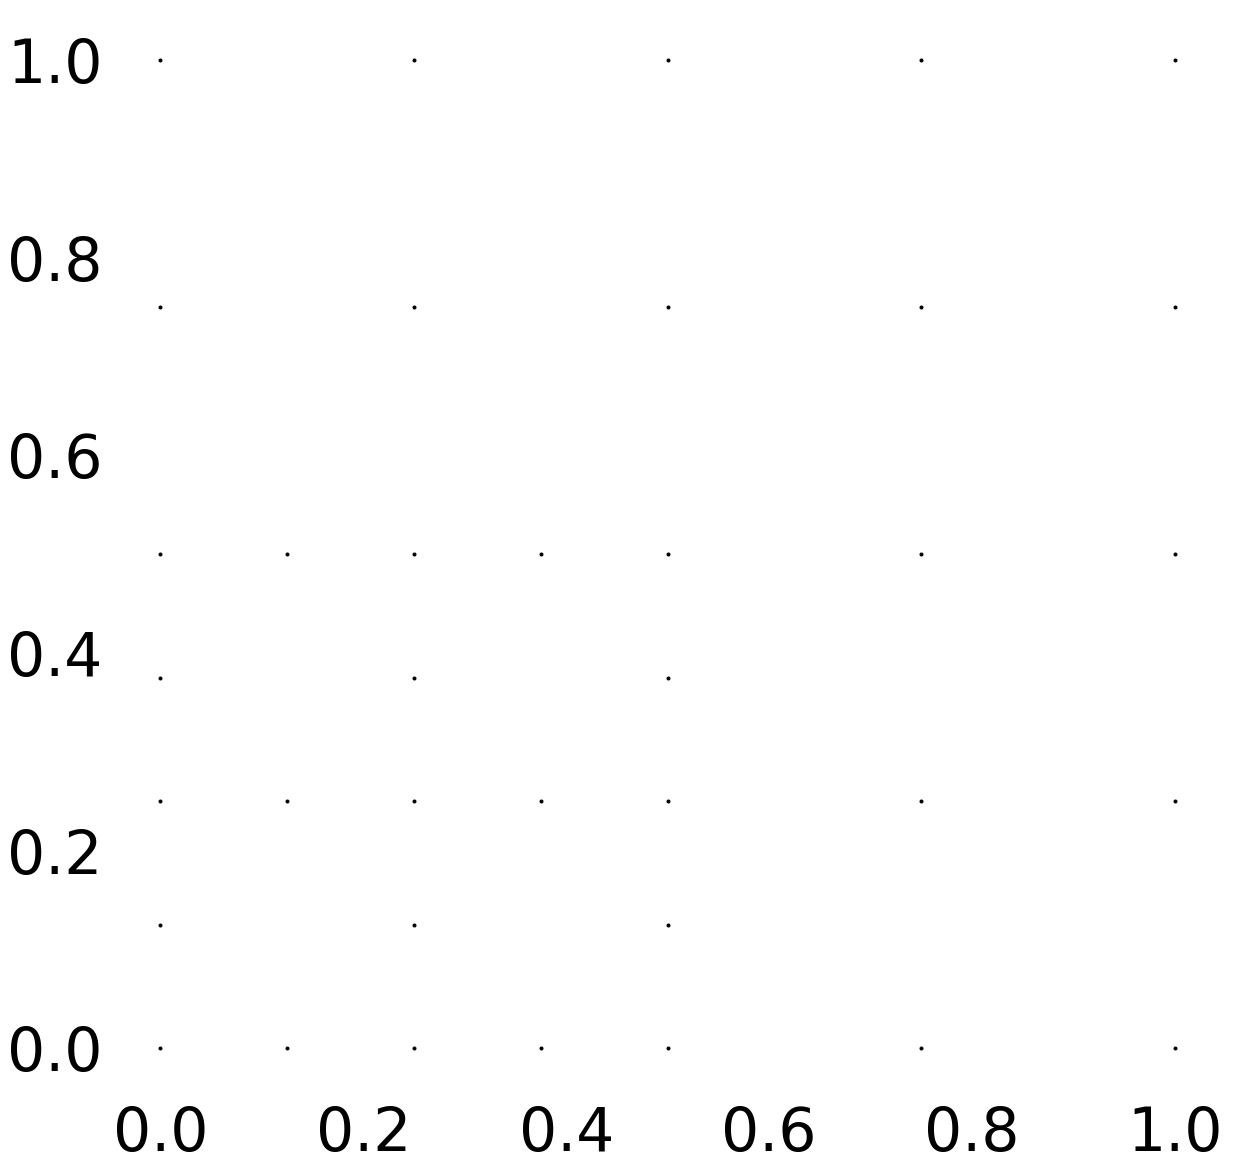

Curent number of function evaluations 41
max surplus error: 0.0002937474489117511 total surplus error: 0.11052273236594382
combiintegral: 0.1080540887223359
Current error: 0.13111882457787805
Finished refinement
Refined  2  times
Refinement Graph:


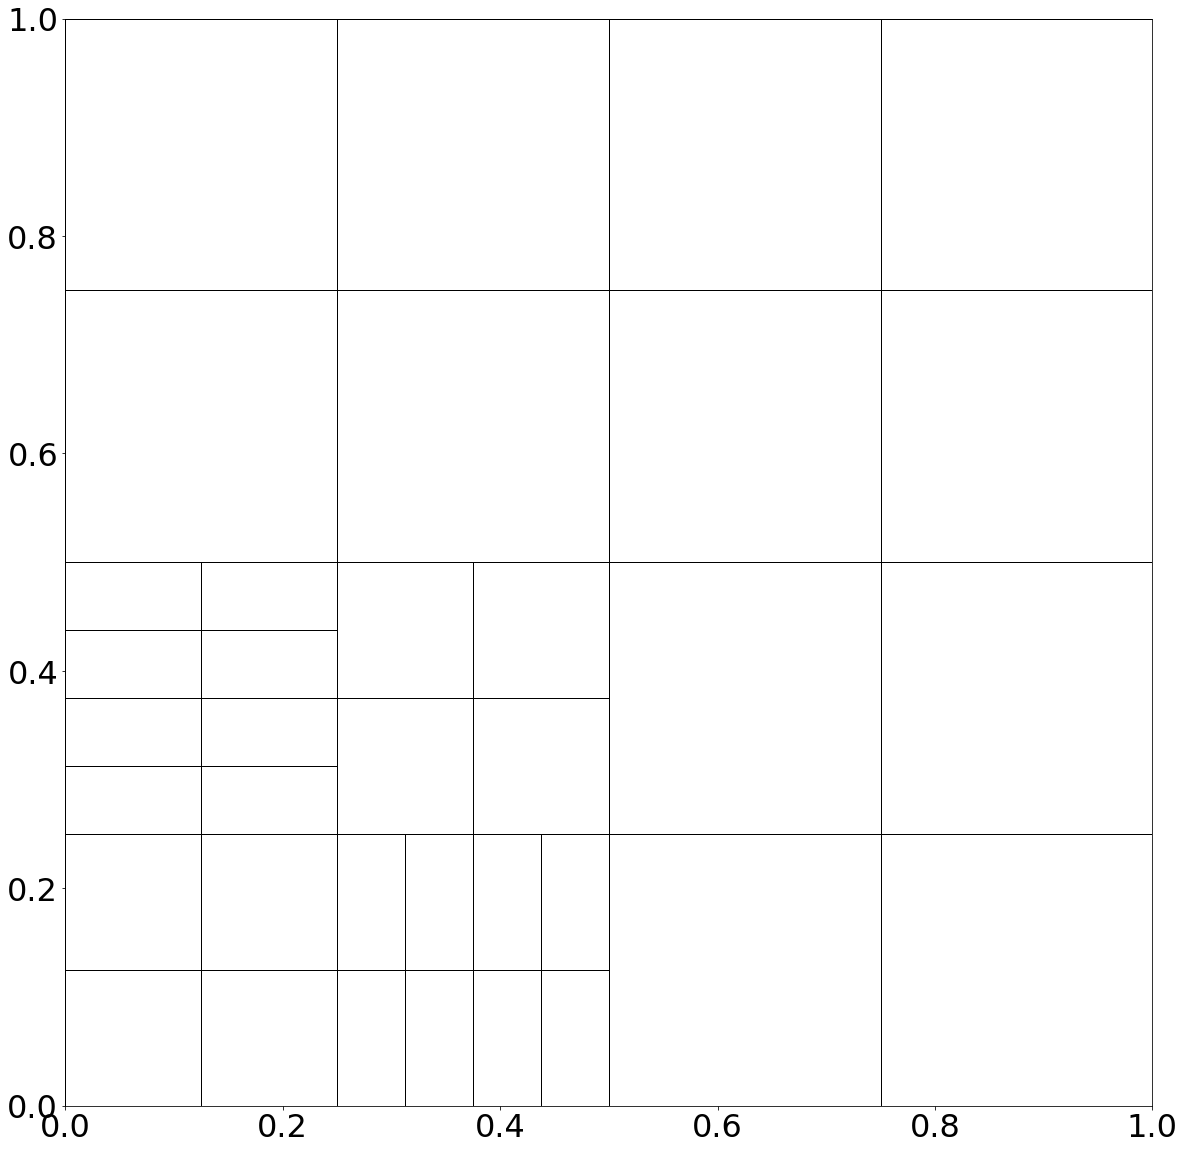

Combi Scheme:


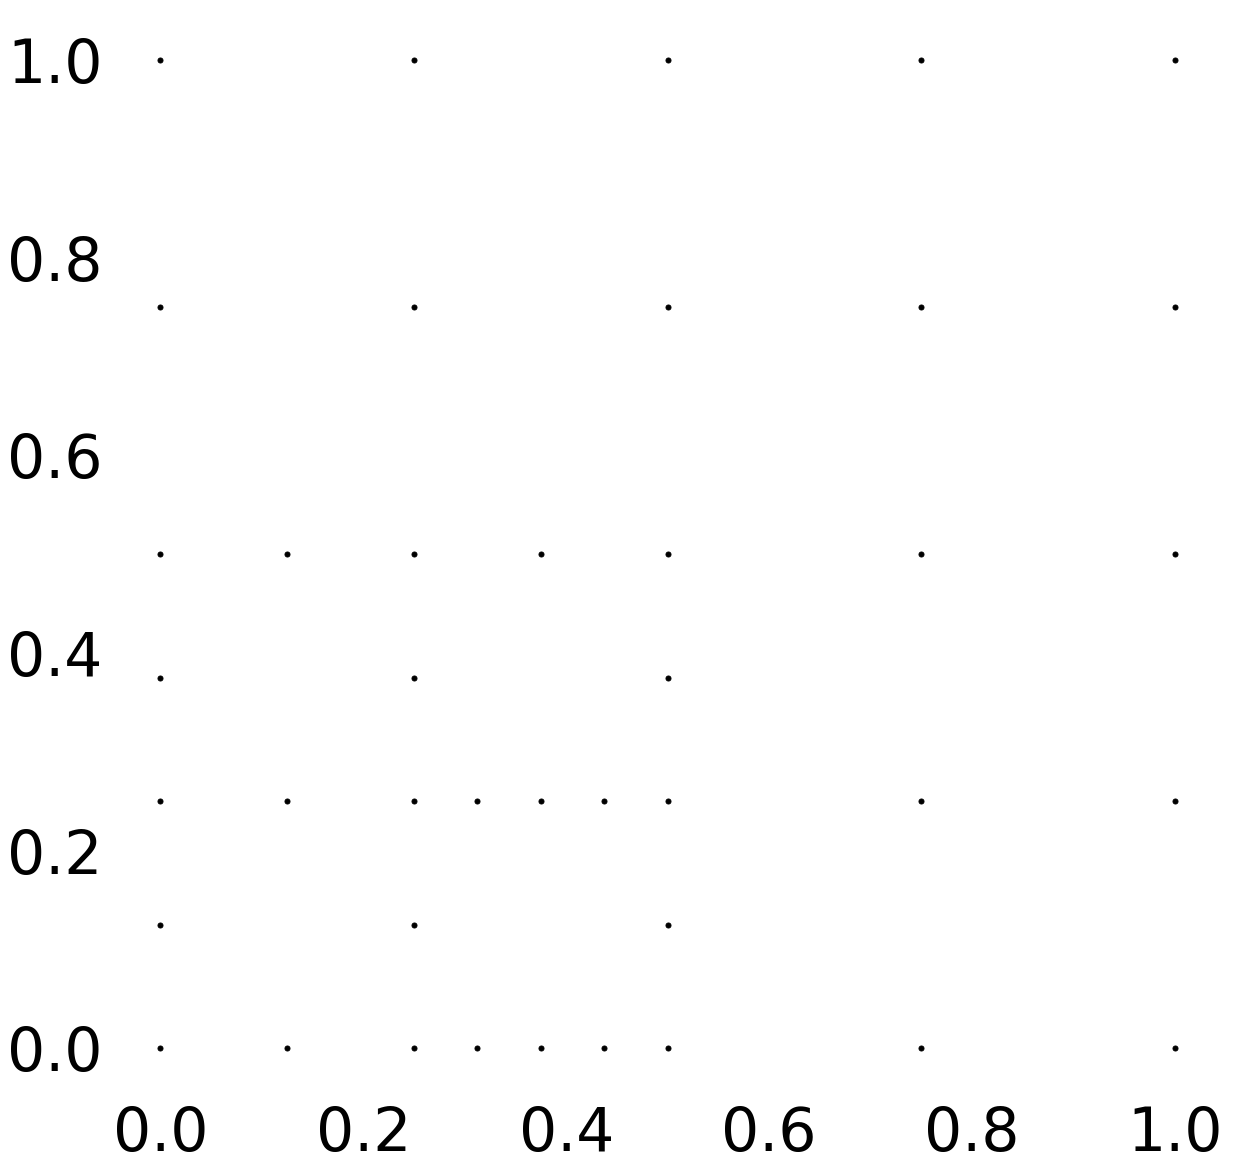

Resulting Sparse Grid:


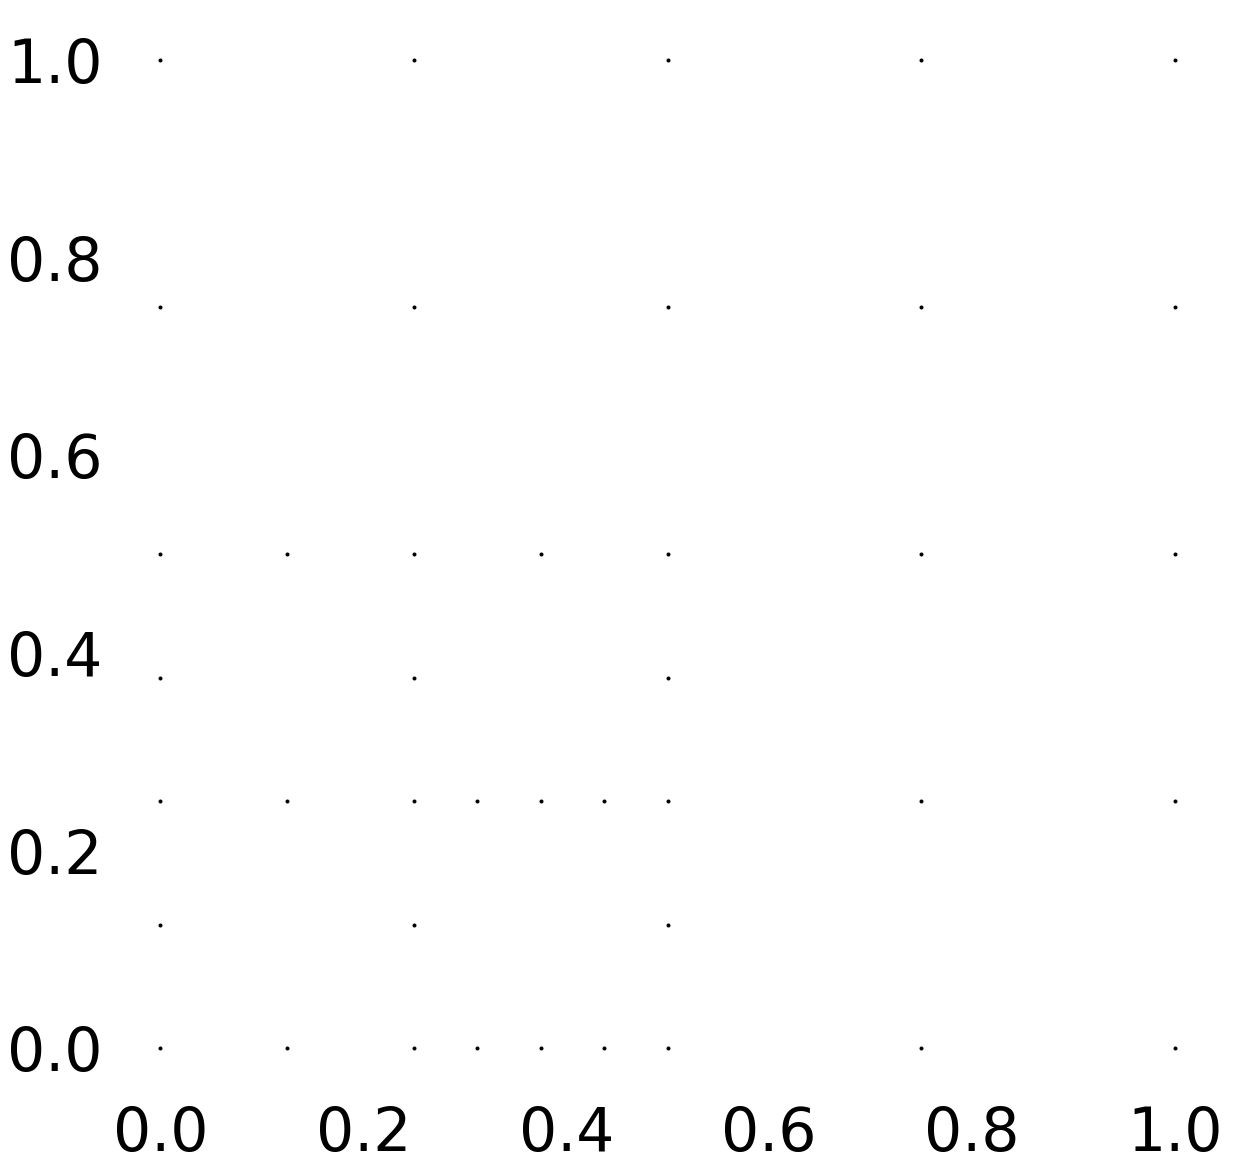

Curent number of function evaluations 45
max surplus error: 0.0002369035663427494 total surplus error: 0.11309179209302336
combiintegral: 0.11050677102776621
Current error: 0.11139639195475415
Finished refinement
Refined  2  times
Refinement Graph:


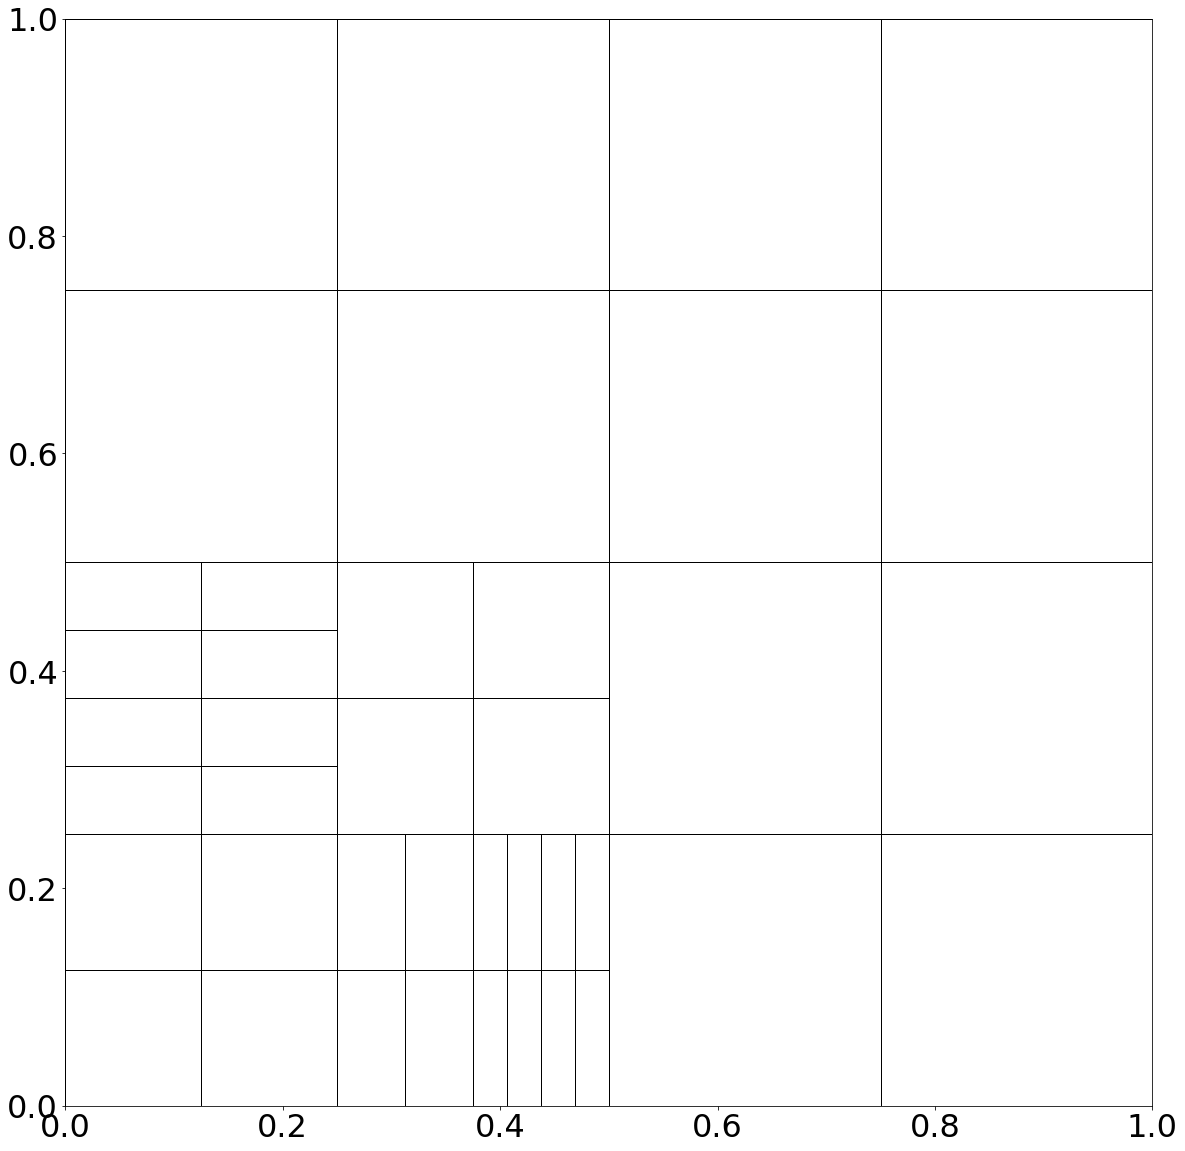

Combi Scheme:


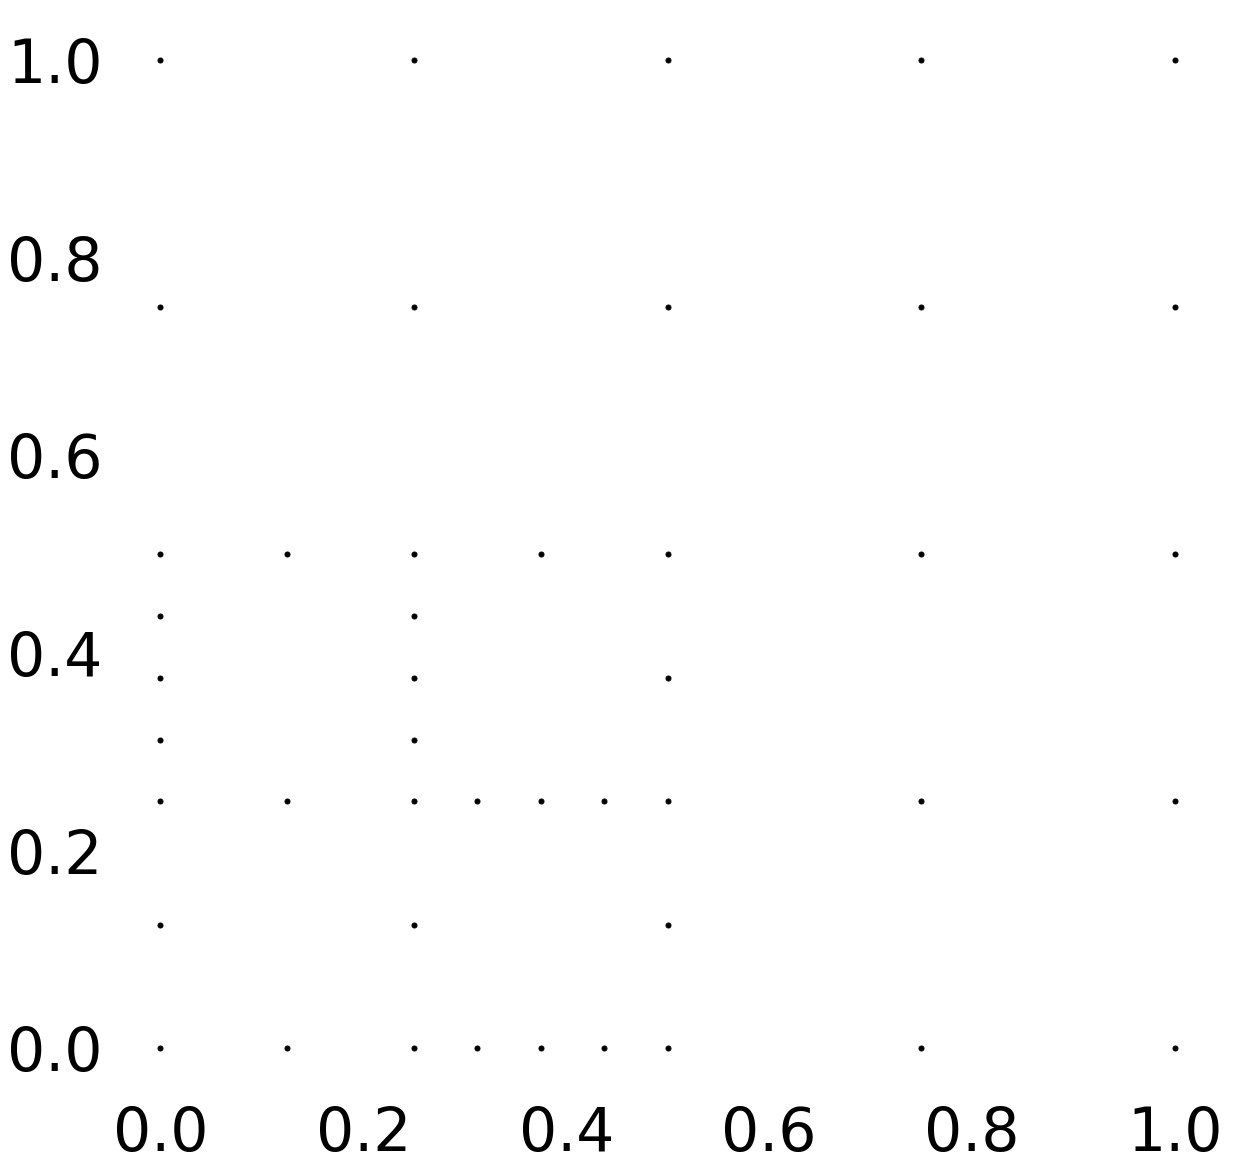

Resulting Sparse Grid:


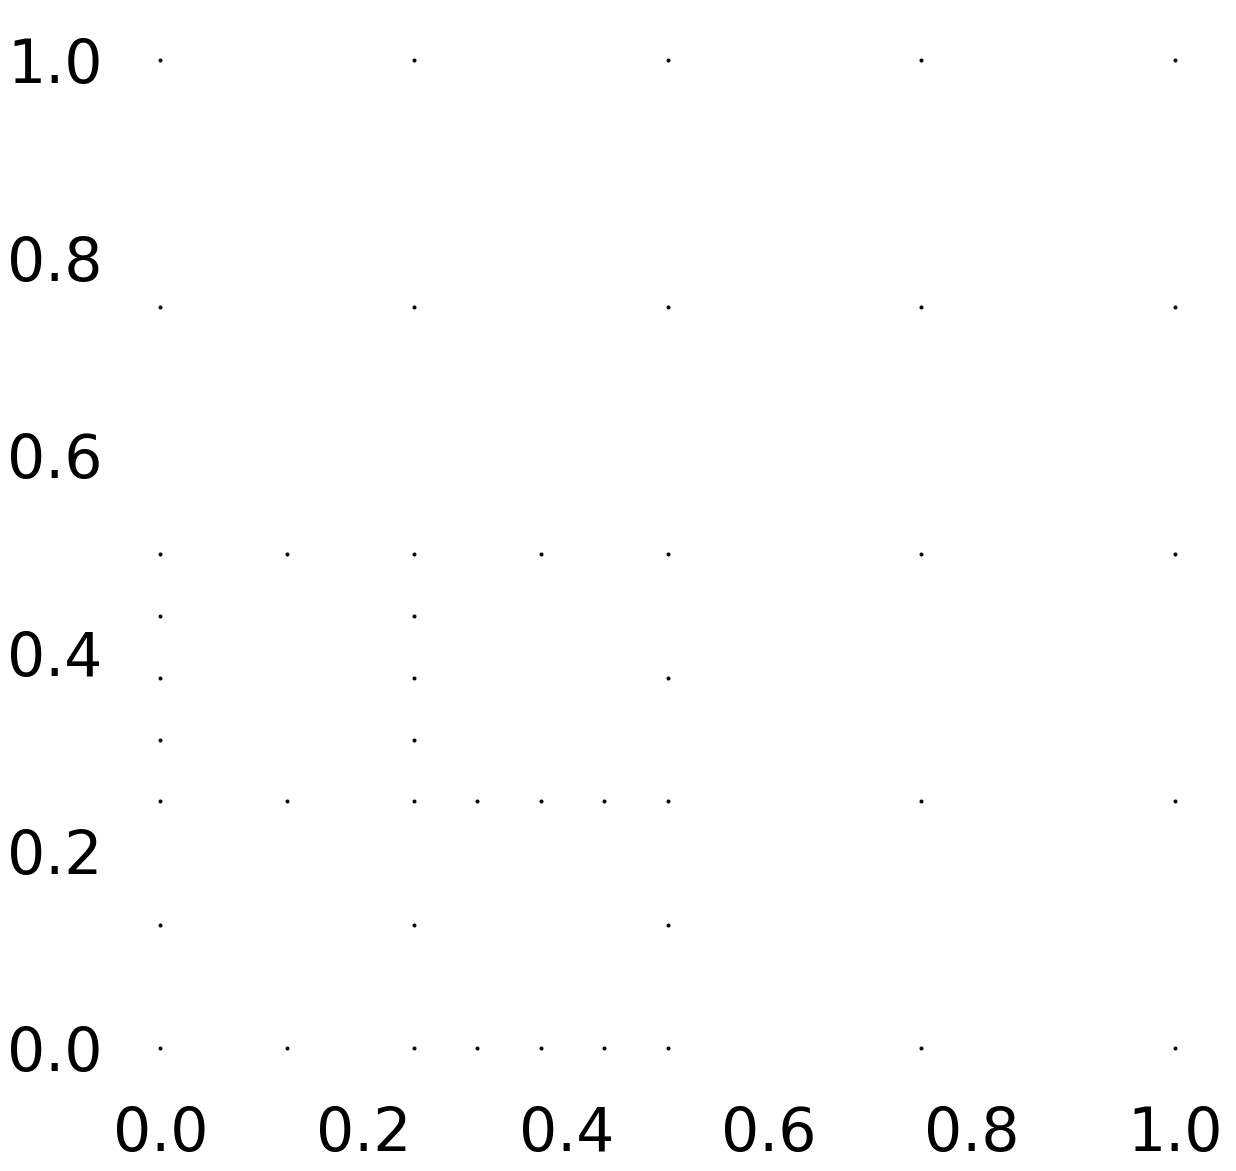

Curent number of function evaluations 49
max surplus error: 0.00017644408526171977 total surplus error: 0.11499506050183428
combiintegral: 0.11240595669110634
Current error: 0.09612471930432617
Finished refinement
Refined  2  times
Refinement Graph:


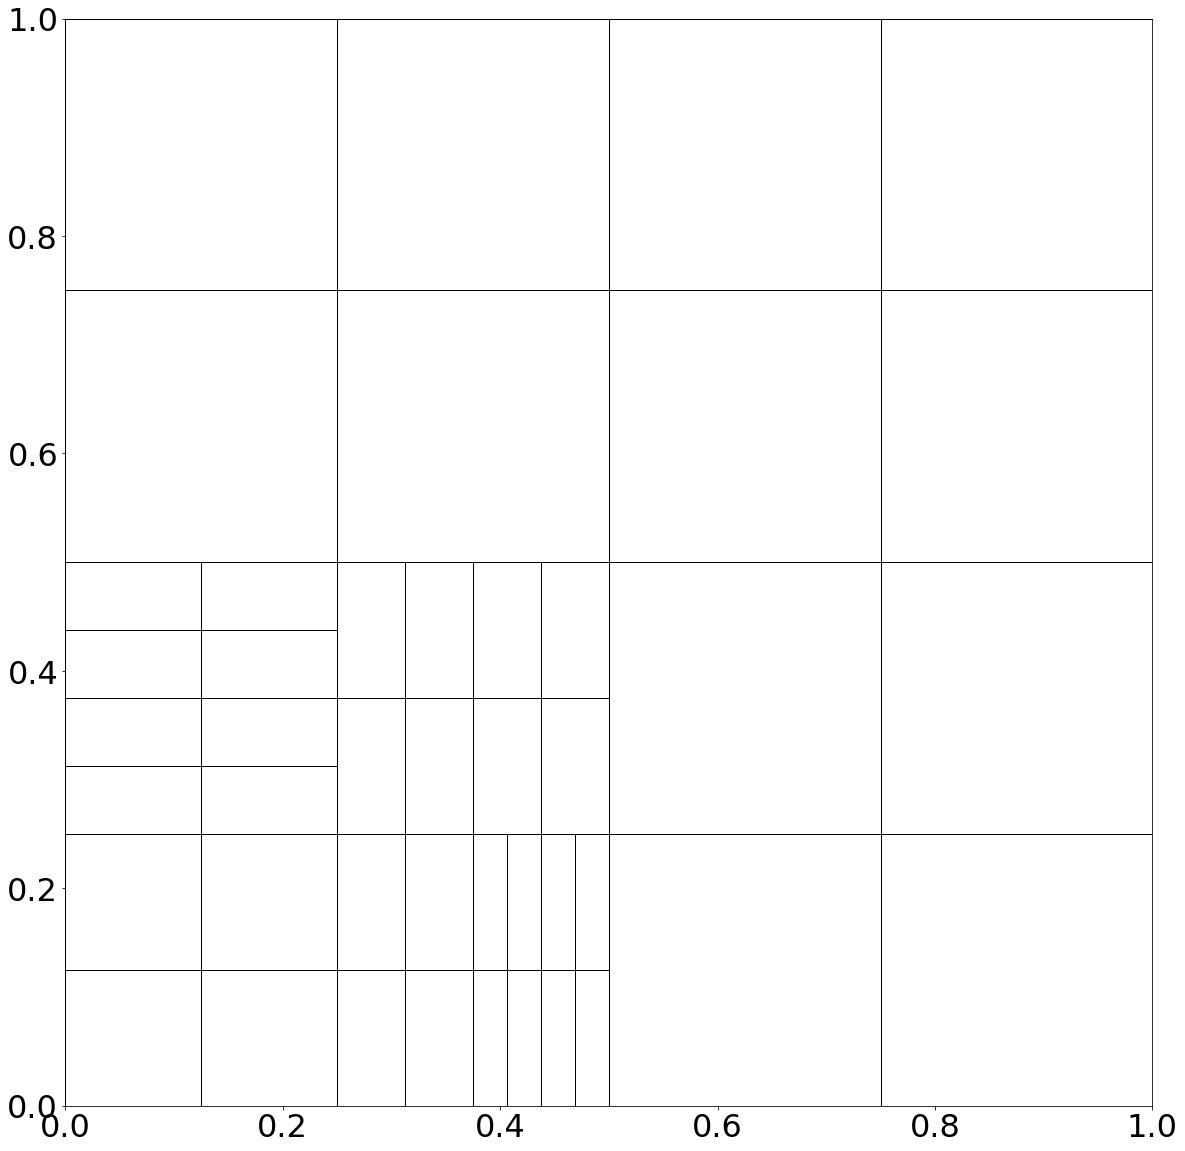

Combi Scheme:


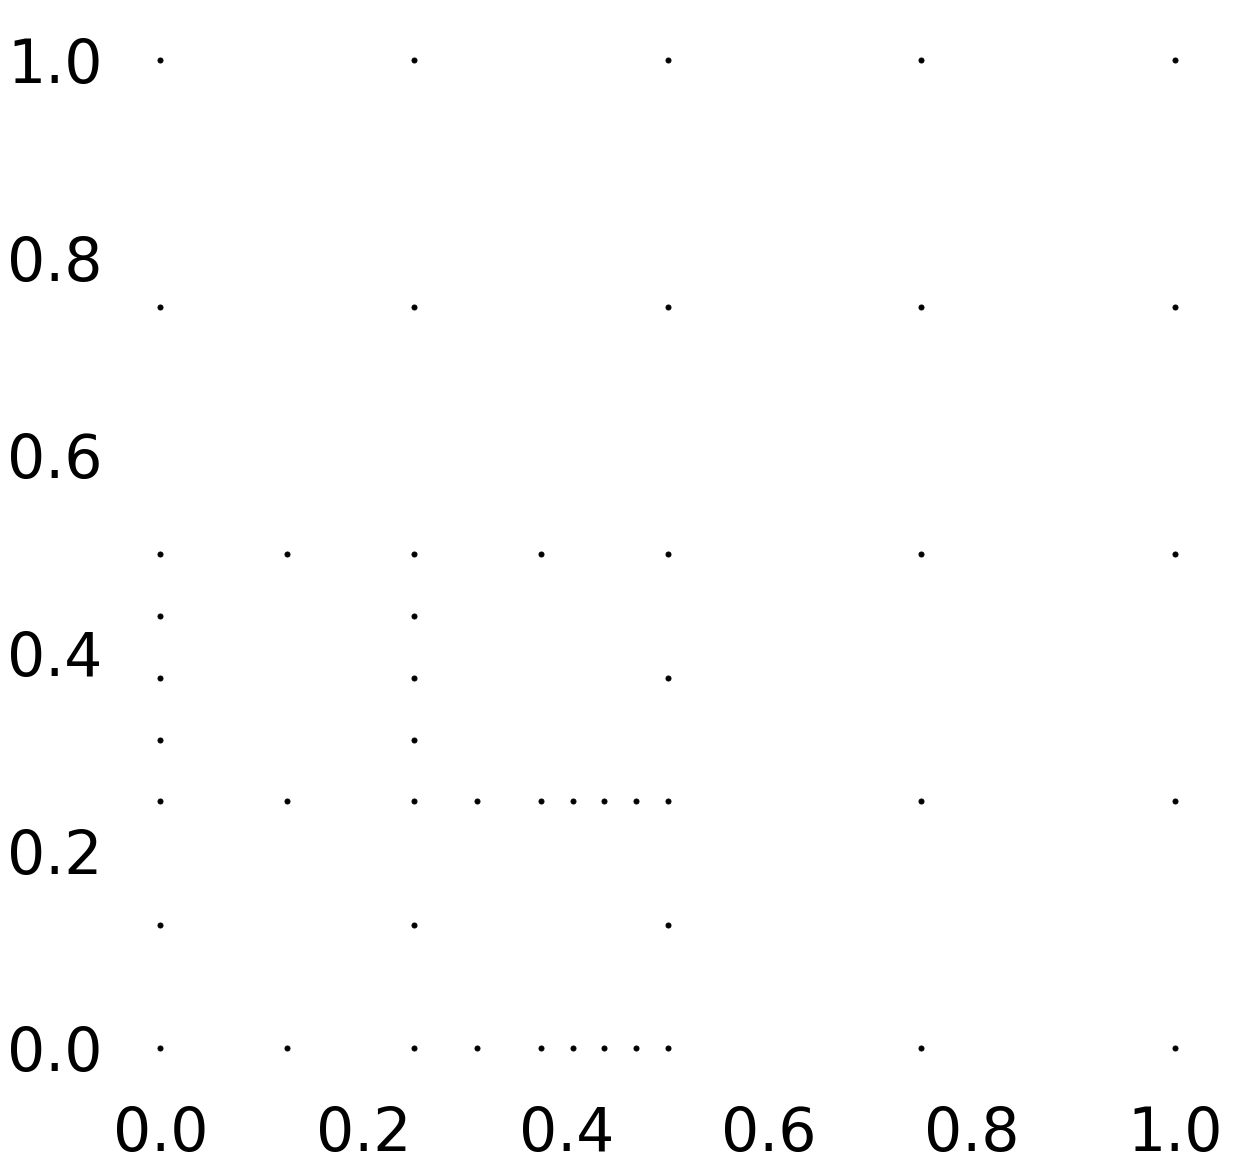

Resulting Sparse Grid:


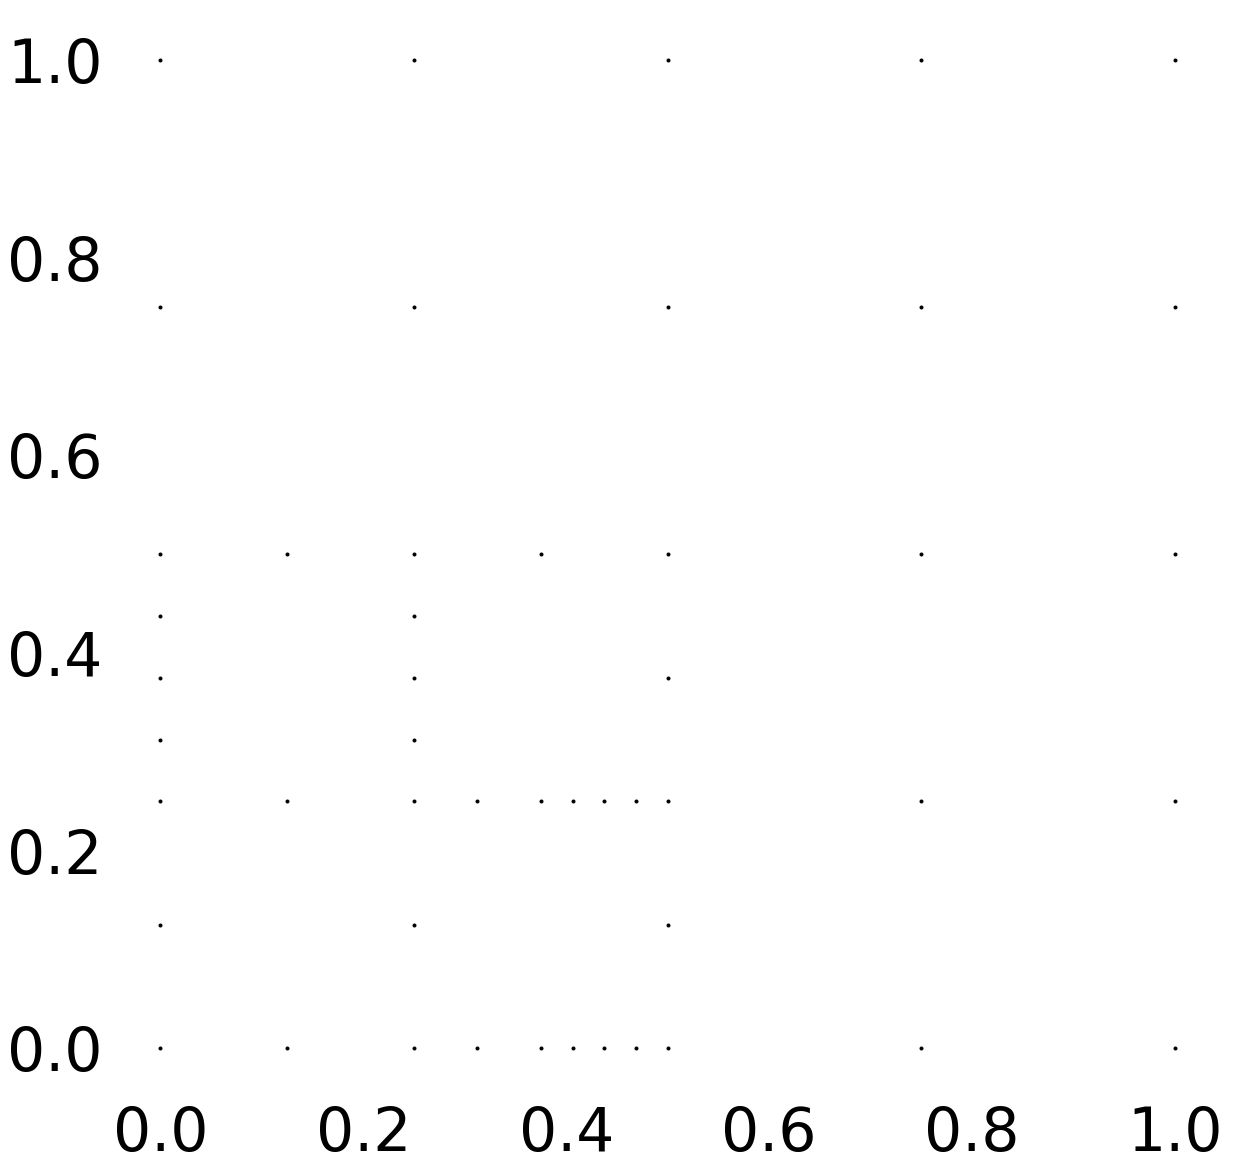

Curent number of function evaluations 51
max surplus error: 0.00015692943851593246 total surplus error: 0.1164328854468829
combiintegral: 0.11383023513414431
Current error: 0.08467185581393787
Finished refinement
Refined  2  times
Refinement Graph:


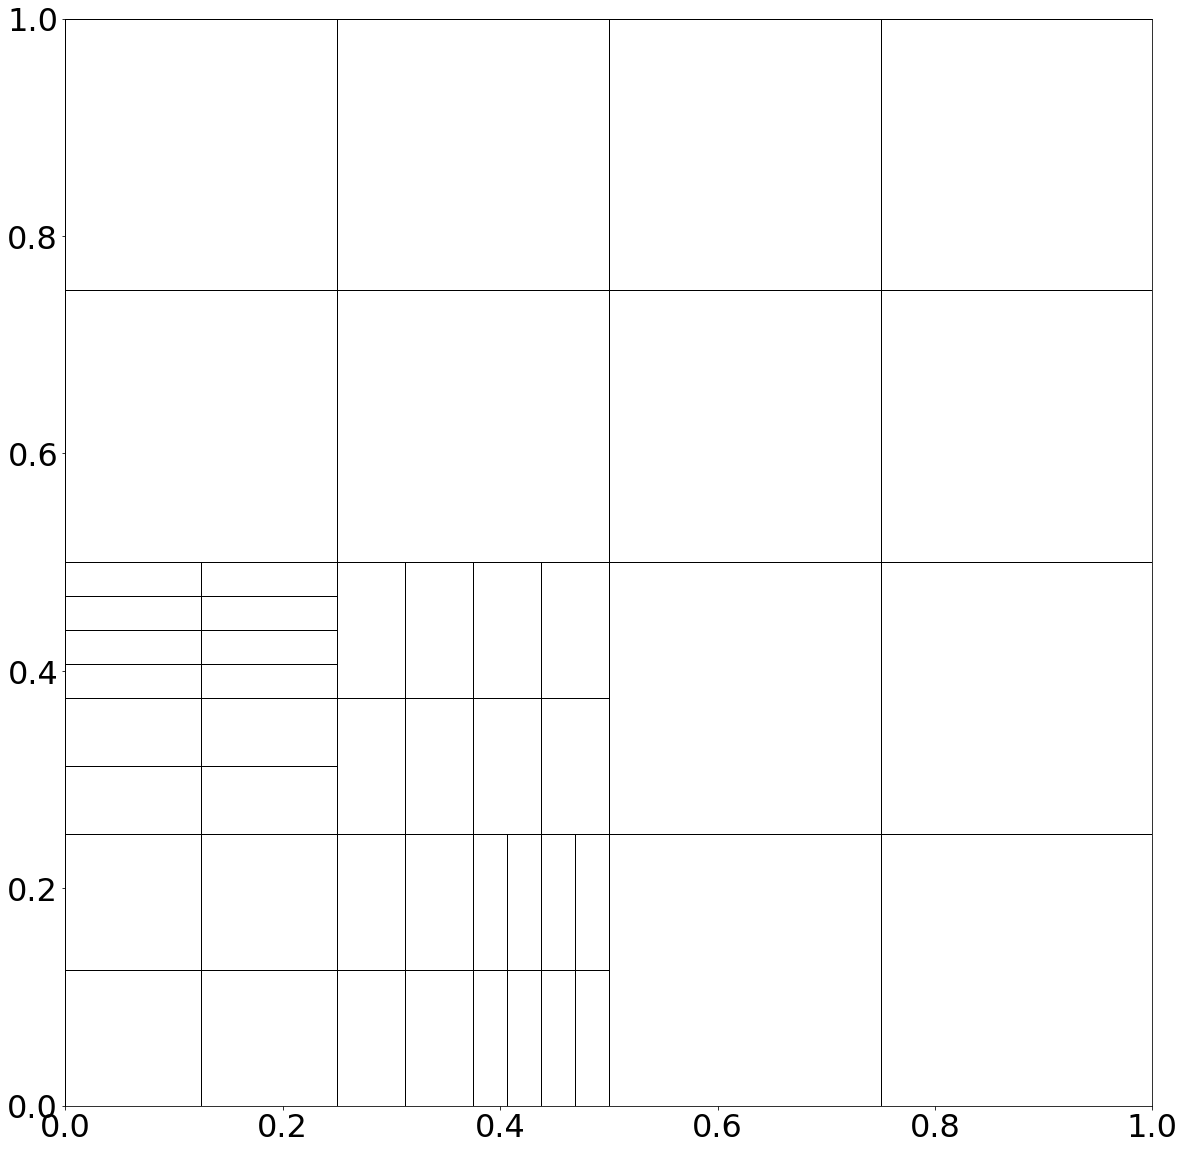

Combi Scheme:


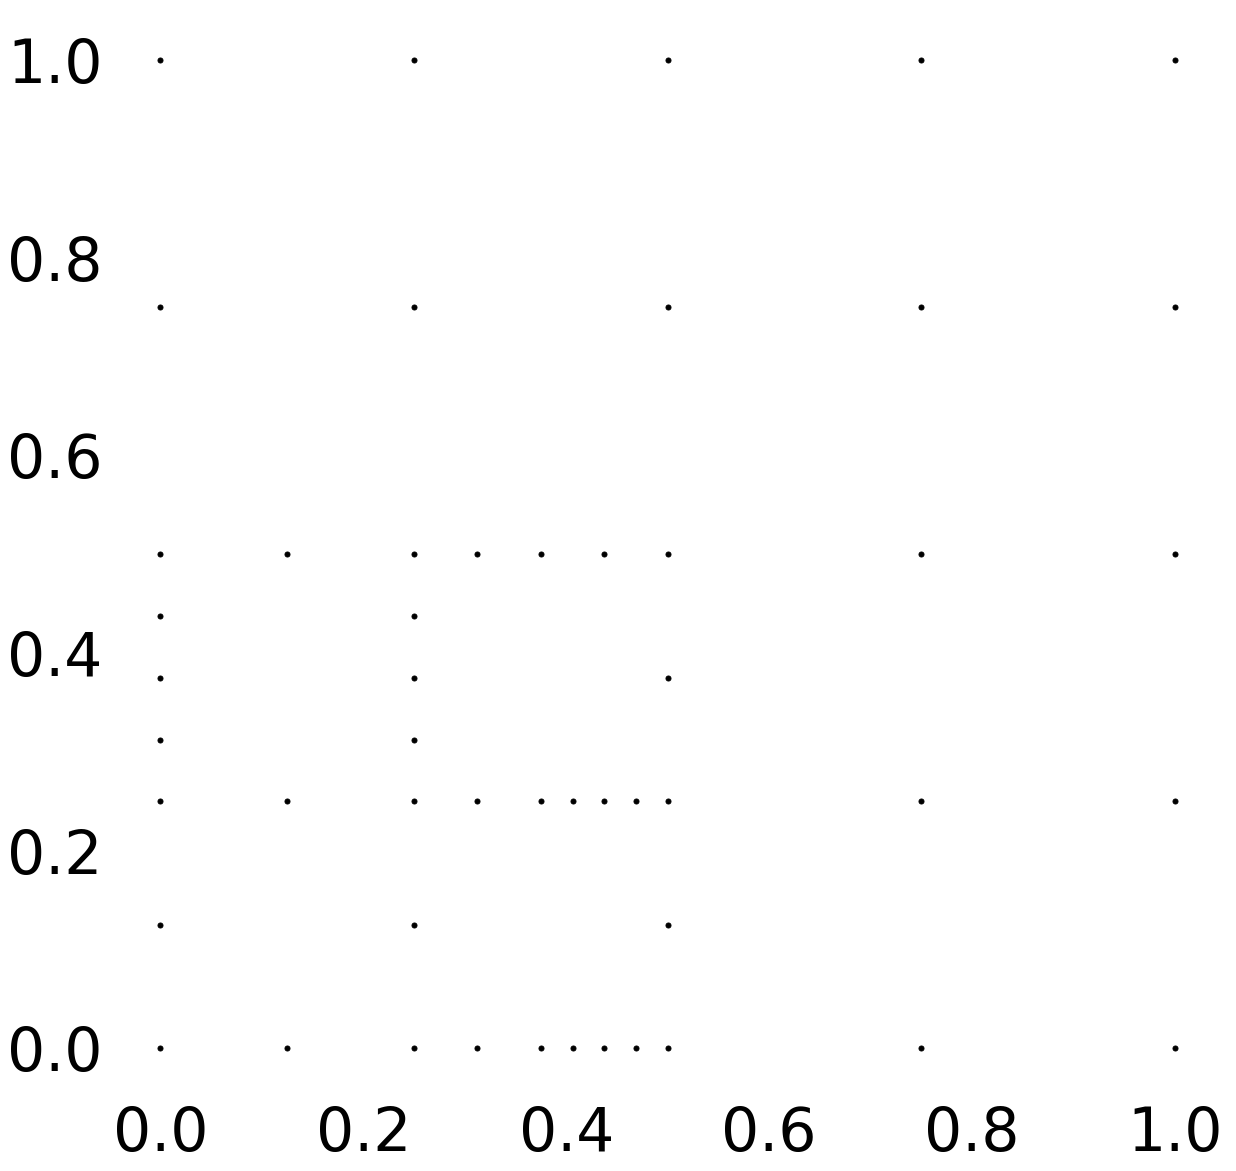

Resulting Sparse Grid:


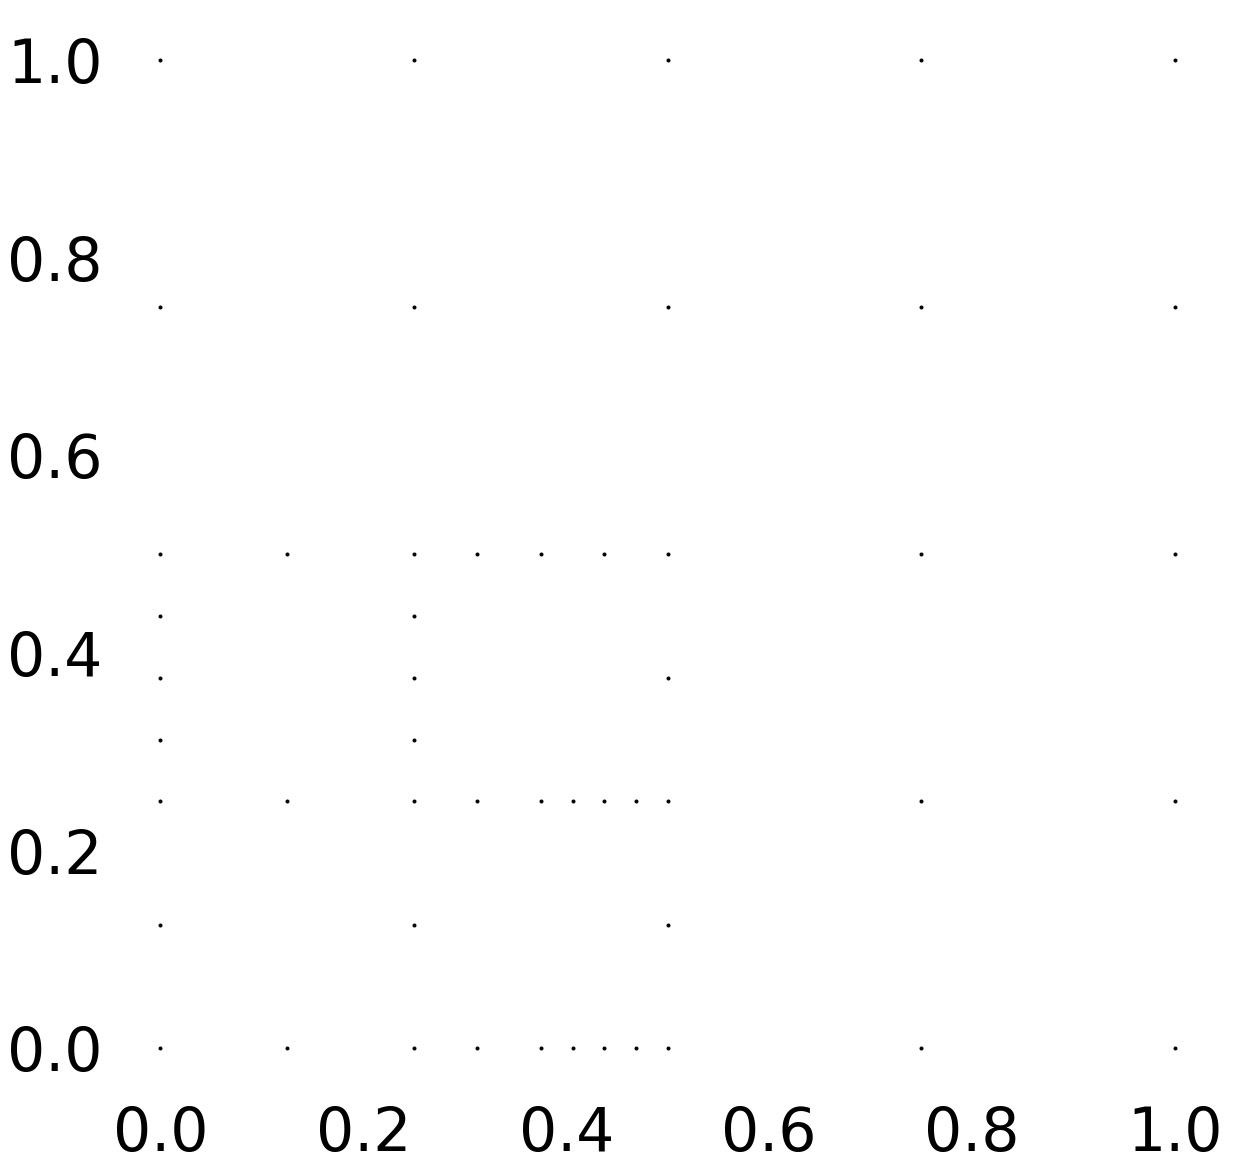

Curent number of function evaluations 55
max surplus error: 0.00012860953593841313 total surplus error: 0.11771168751596897
combiintegral: 0.11509698893903816
Current error: 0.07448567454138134
Finished refinement
Refined  4  times
Refinement Graph:


Combi Scheme:


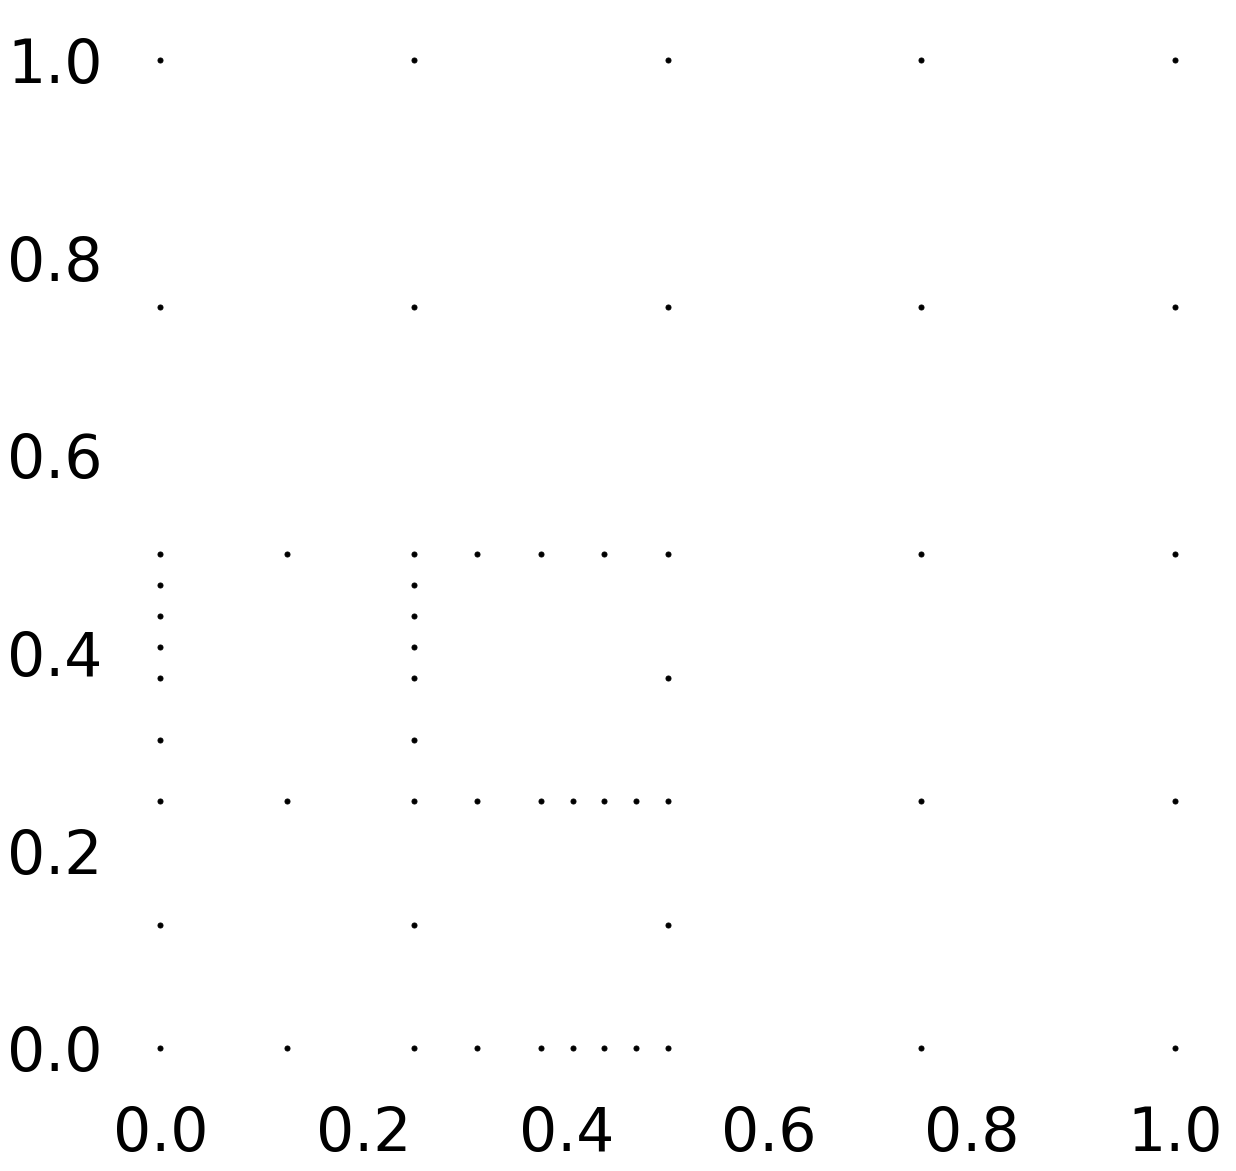

Resulting Sparse Grid:


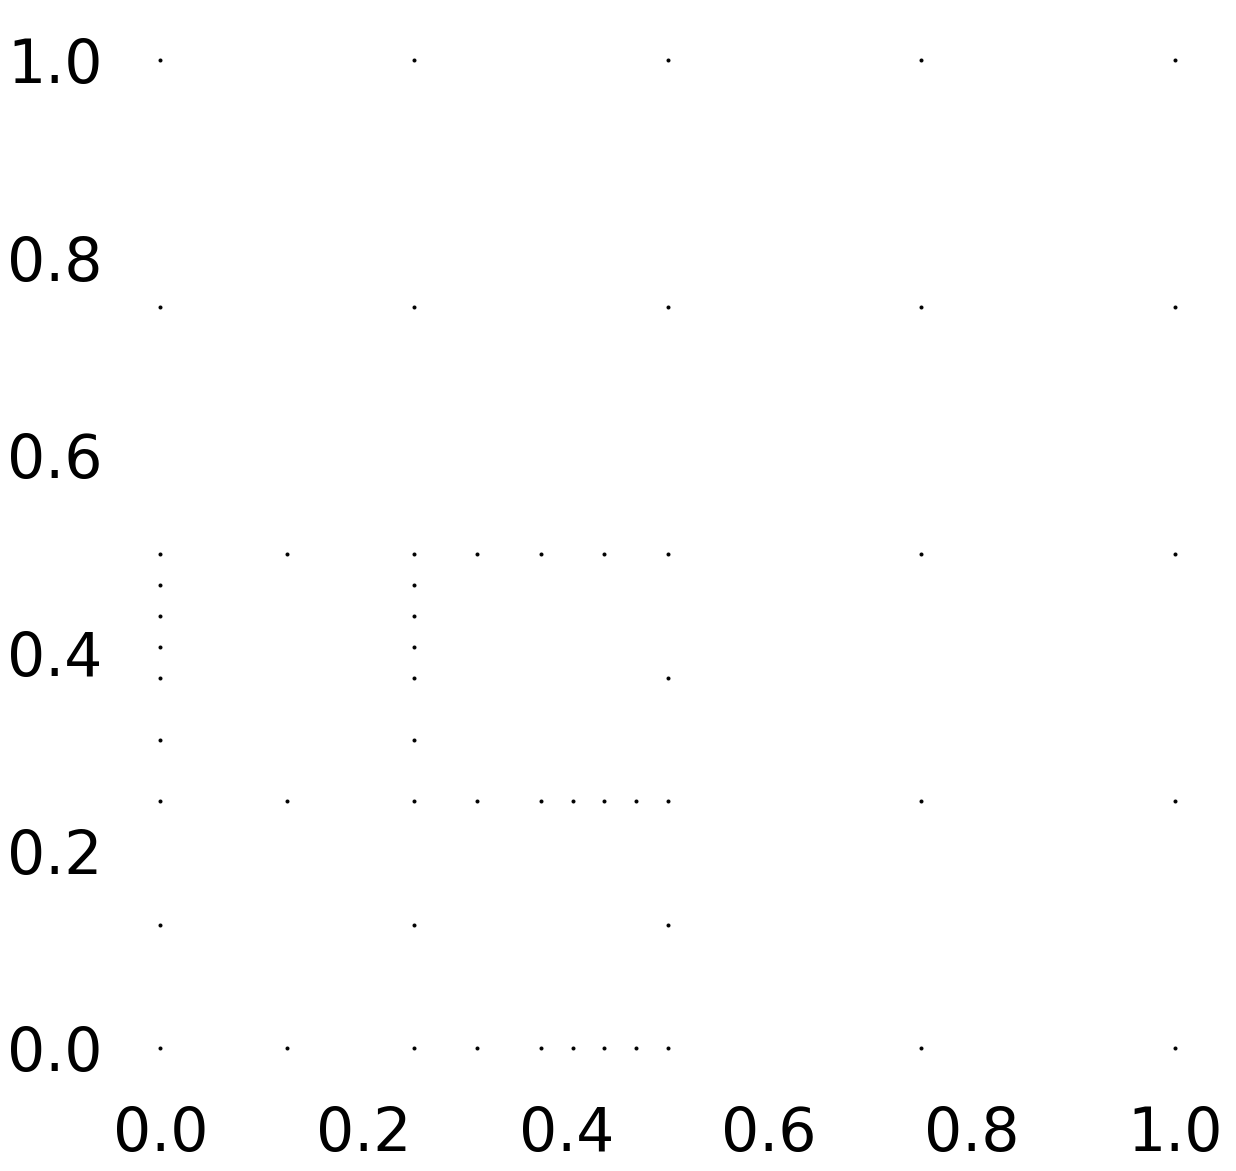

Curent number of function evaluations 62
max surplus error: 8.944073087770742e-05 total surplus error: 0.12057514607631828
combiintegral: 0.1179090077862764
Current error: 0.051873756101385636
Finished refinement
Refined  2  times
Refinement Graph:


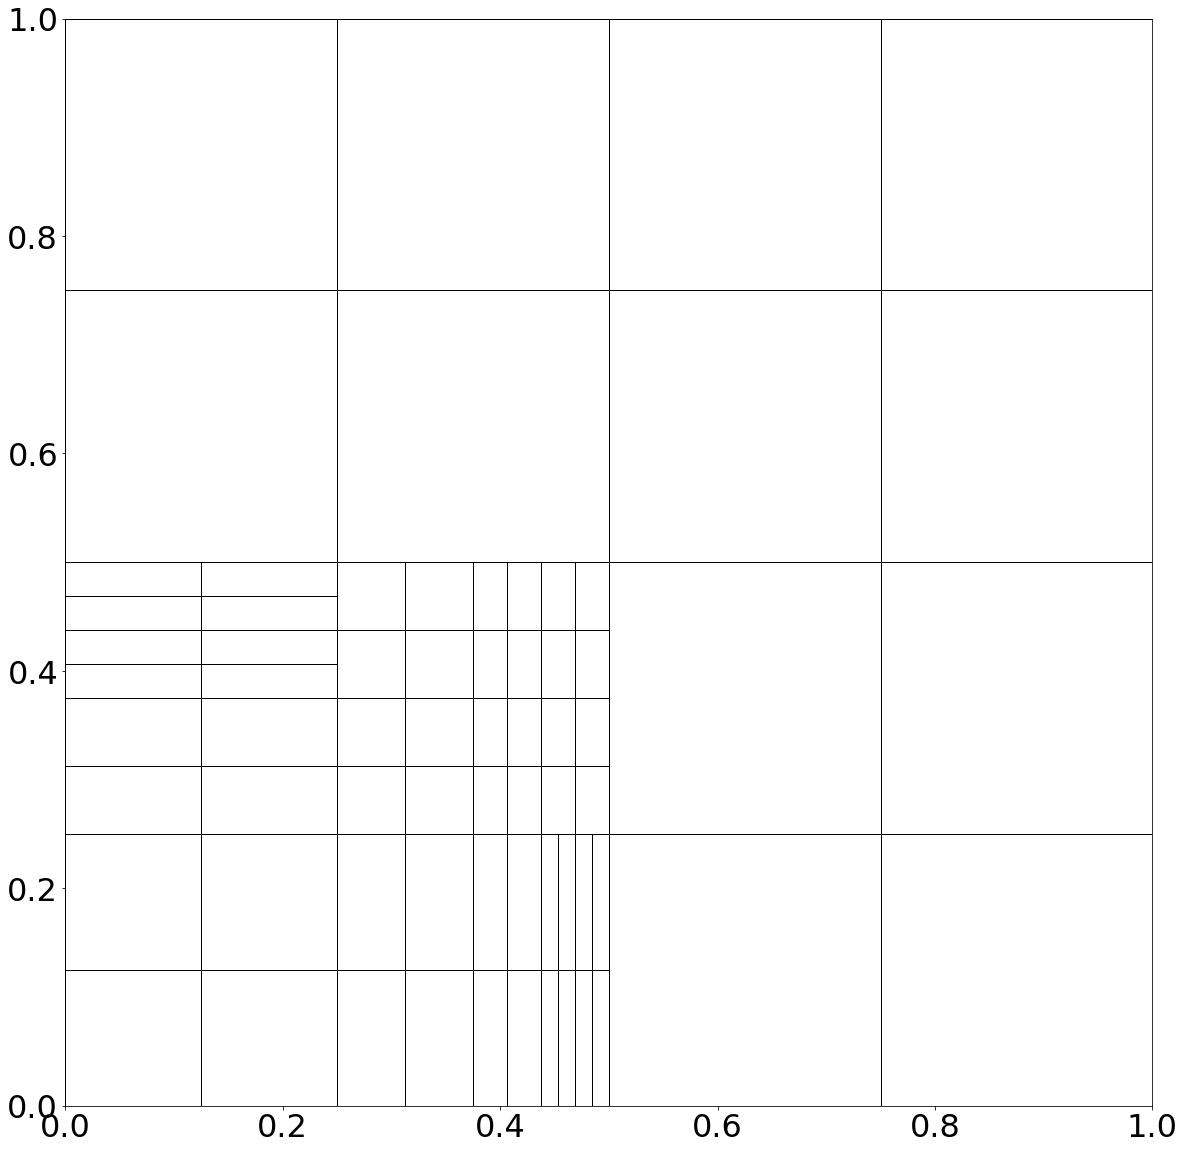

Combi Scheme:


Resulting Sparse Grid:


Curent number of function evaluations 64
max surplus error: 7.954862106187237e-05 total surplus error: 0.12129370730428313
combiintegral: 0.11862602761178571
Current error: 0.046108078595276464
Finished refinement
Refined  2  times
Refinement Graph:


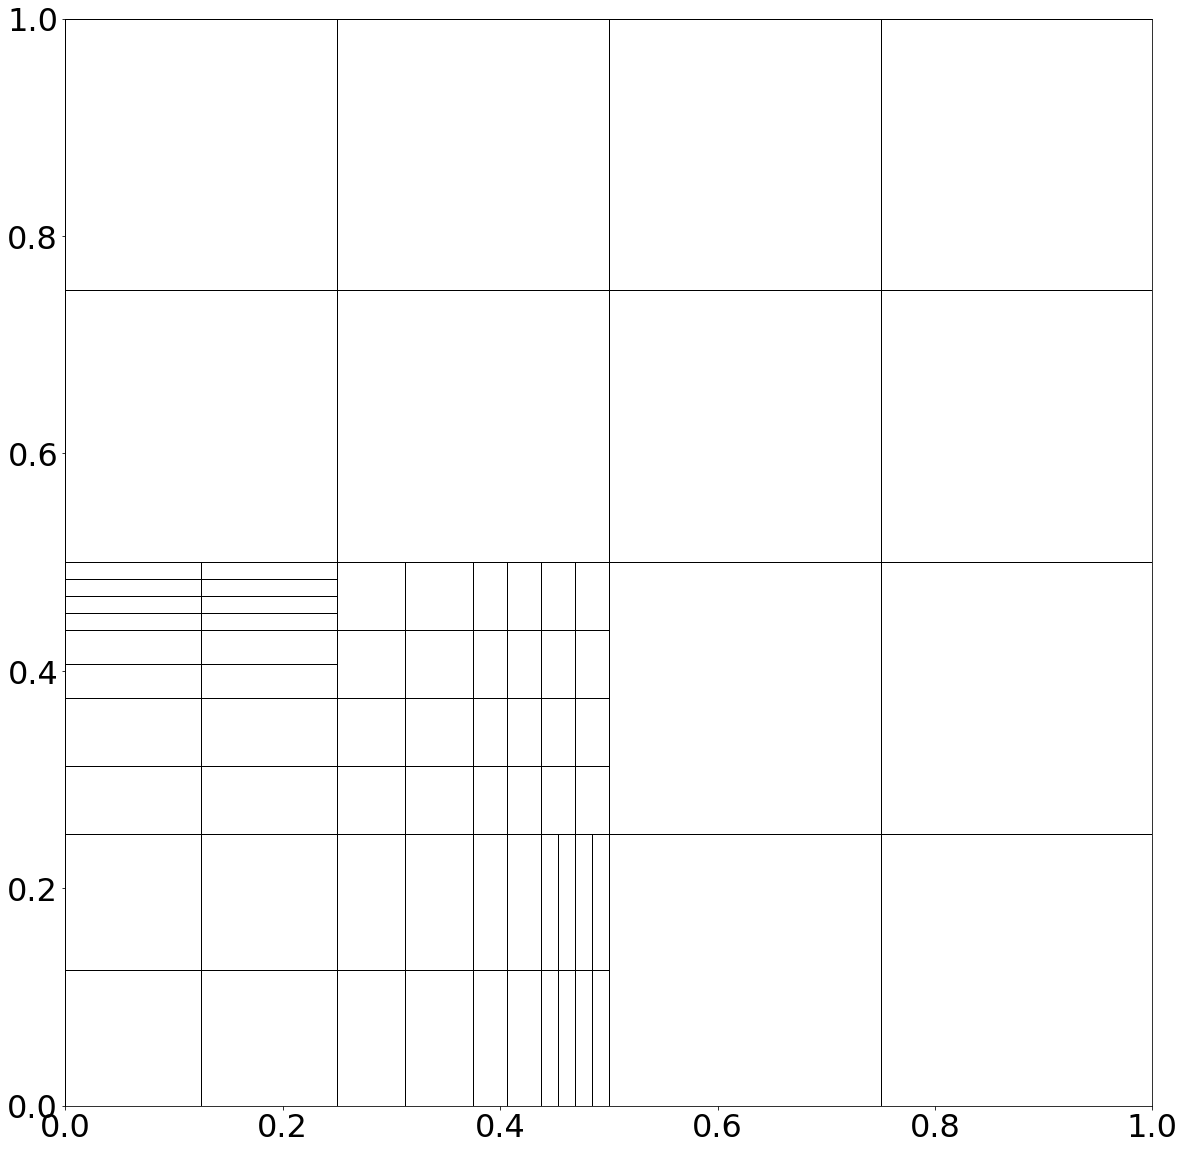

Combi Scheme:


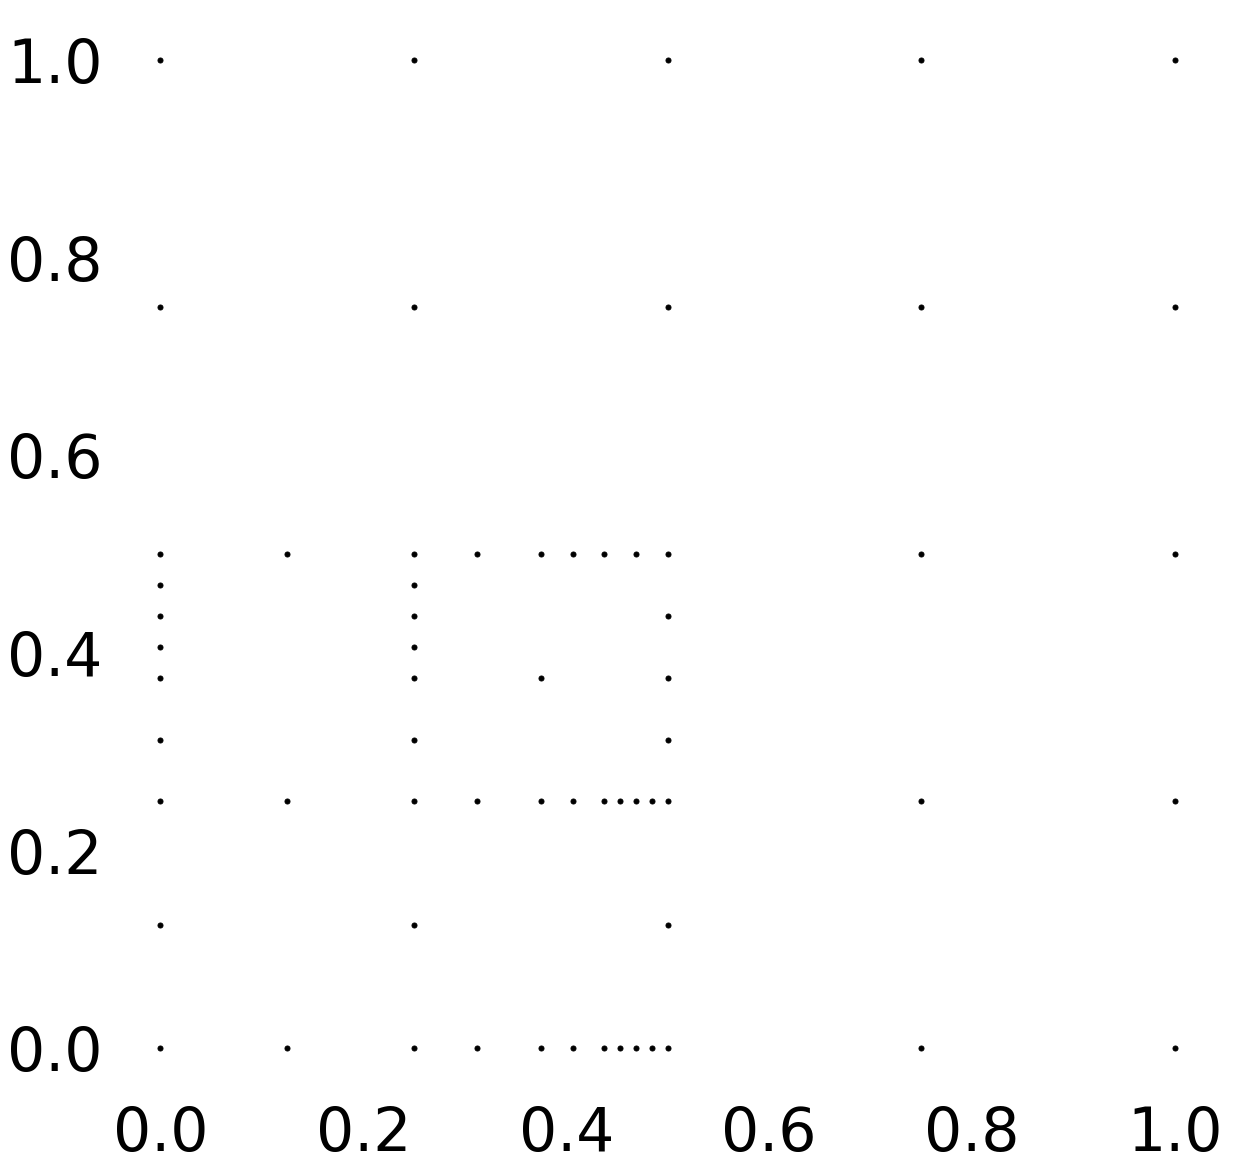

Resulting Sparse Grid:


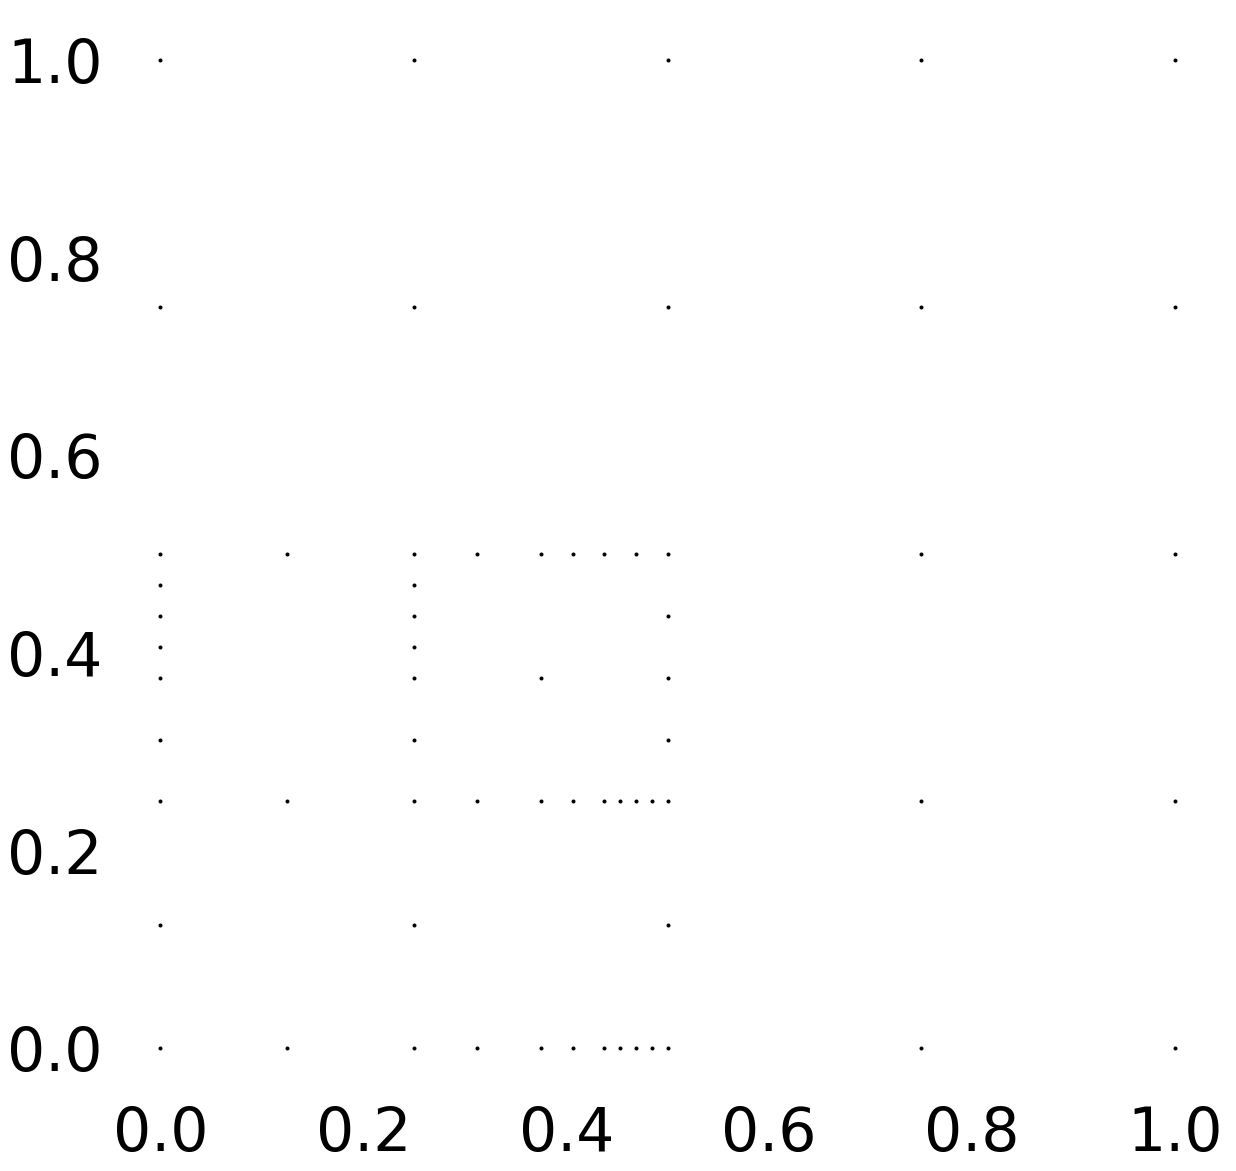

Curent number of function evaluations 68
max surplus error: 6.870739588507254e-05 total surplus error: 0.12193279594177744
combiintegral: 0.11926374532533253
Current error: 0.04098008276387461
Finished refinement
Refined  2  times
Refinement Graph:


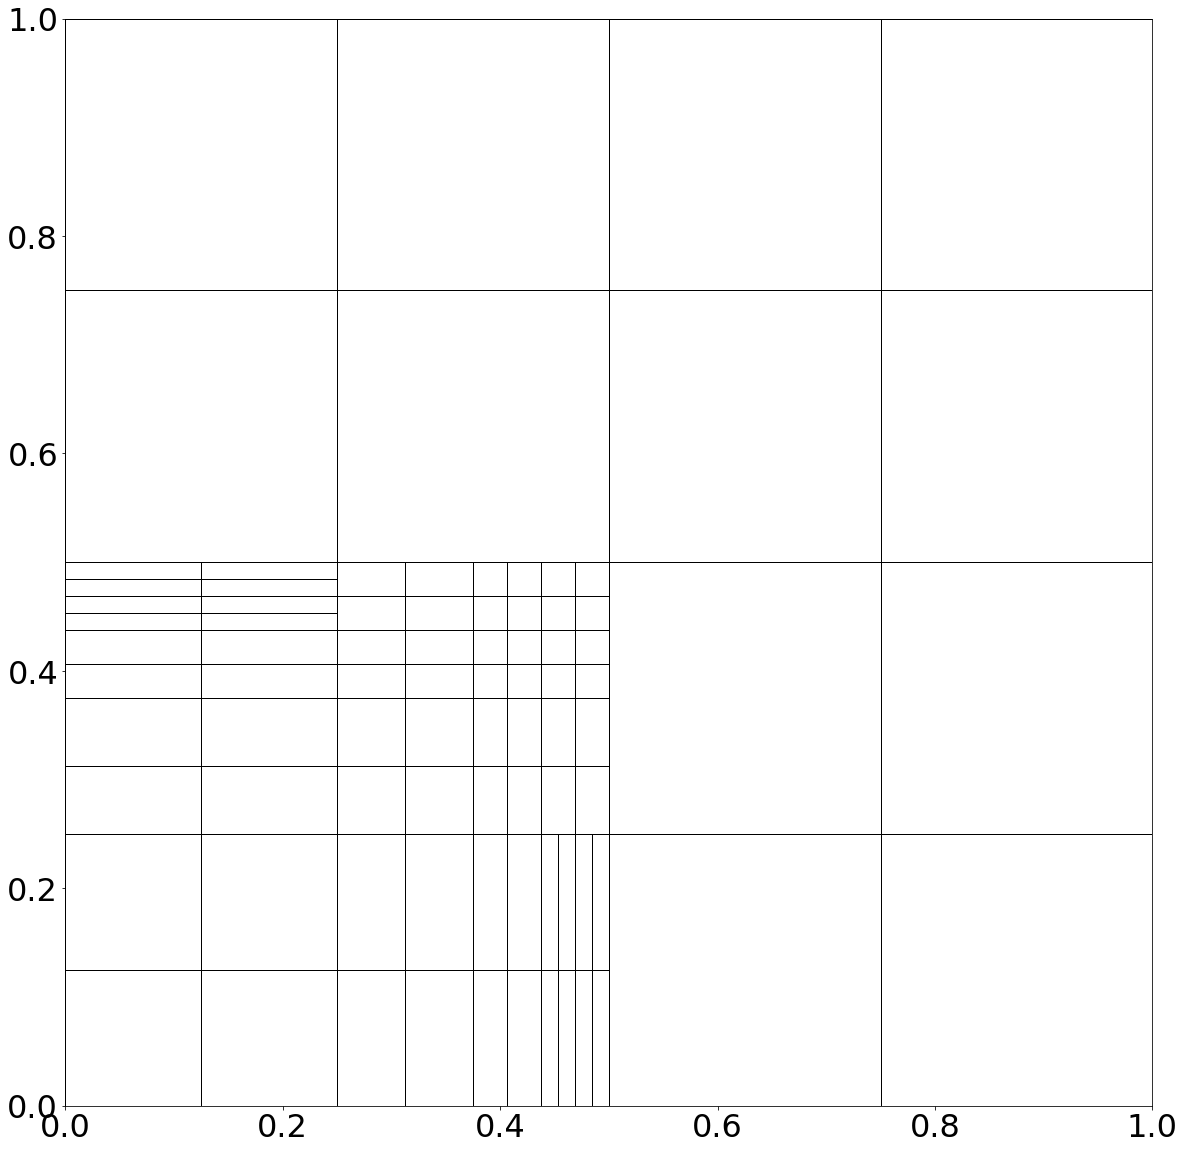

Combi Scheme:


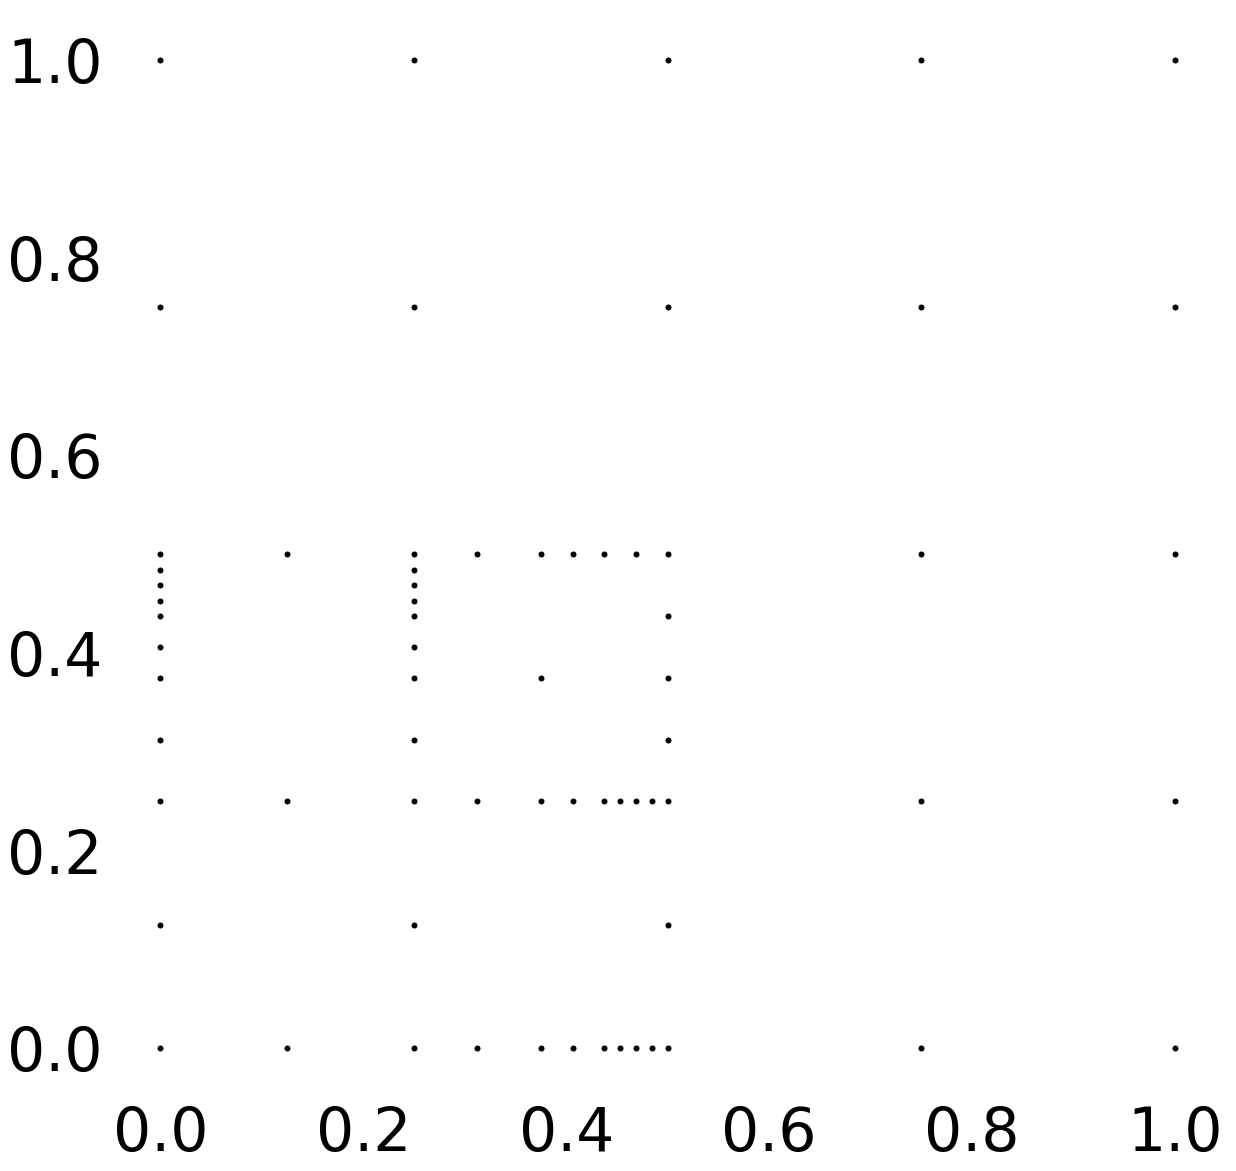

Resulting Sparse Grid:


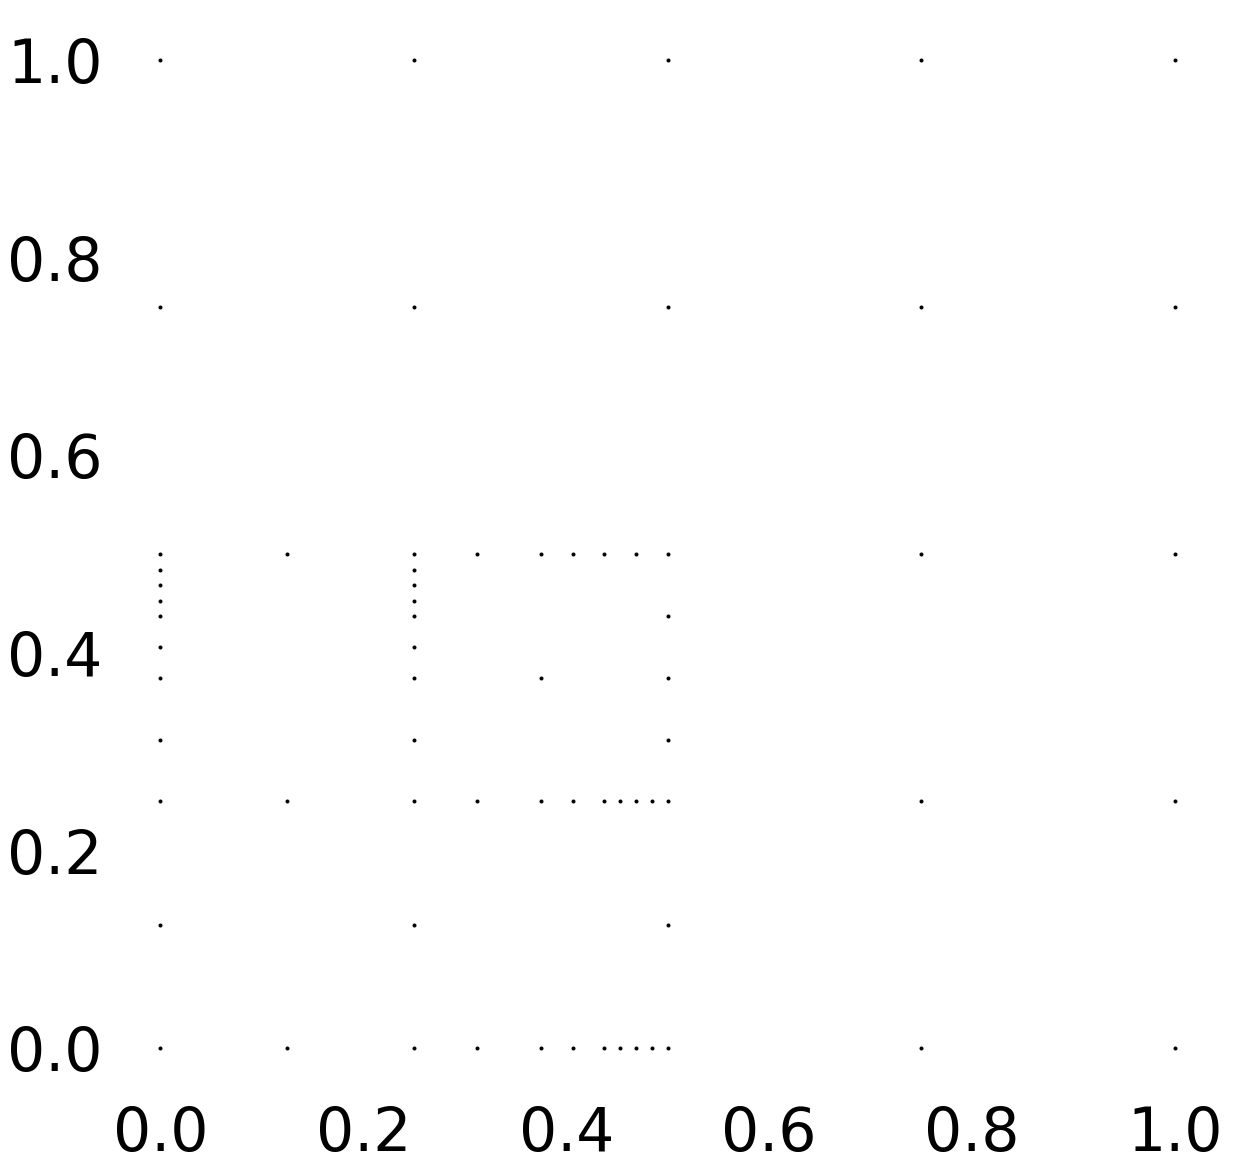

Curent number of function evaluations 70
max surplus error: 5.9458523962754016e-05 total surplus error: 0.12249268553833917
combiintegral: 0.11981835990870737
Current error: 0.03652033323651247
Finished refinement
Refined  2  times
Refinement Graph:


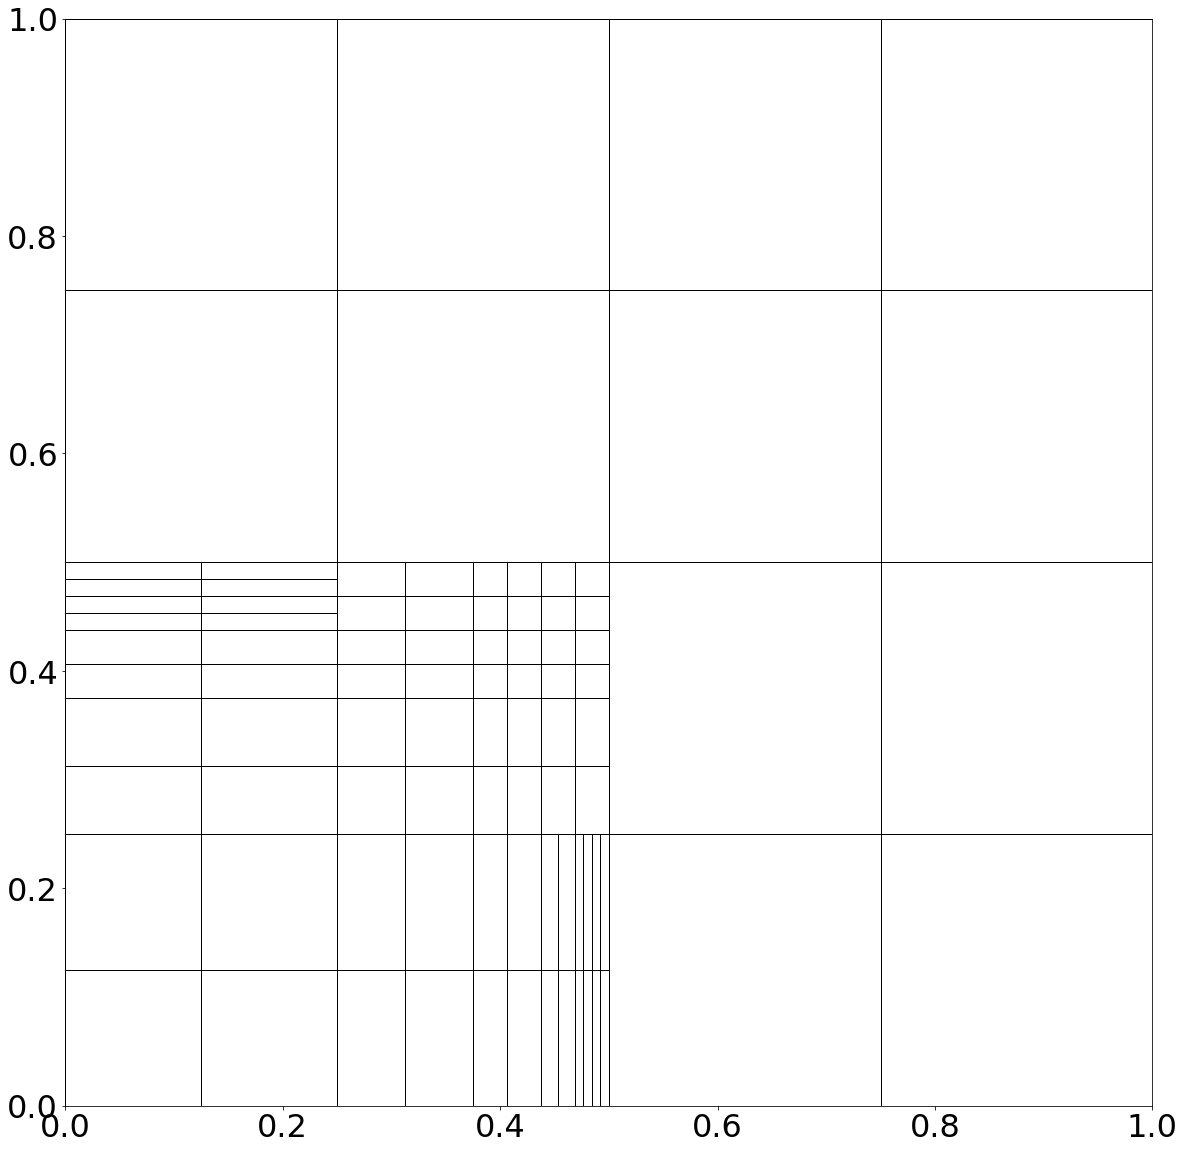

Combi Scheme:


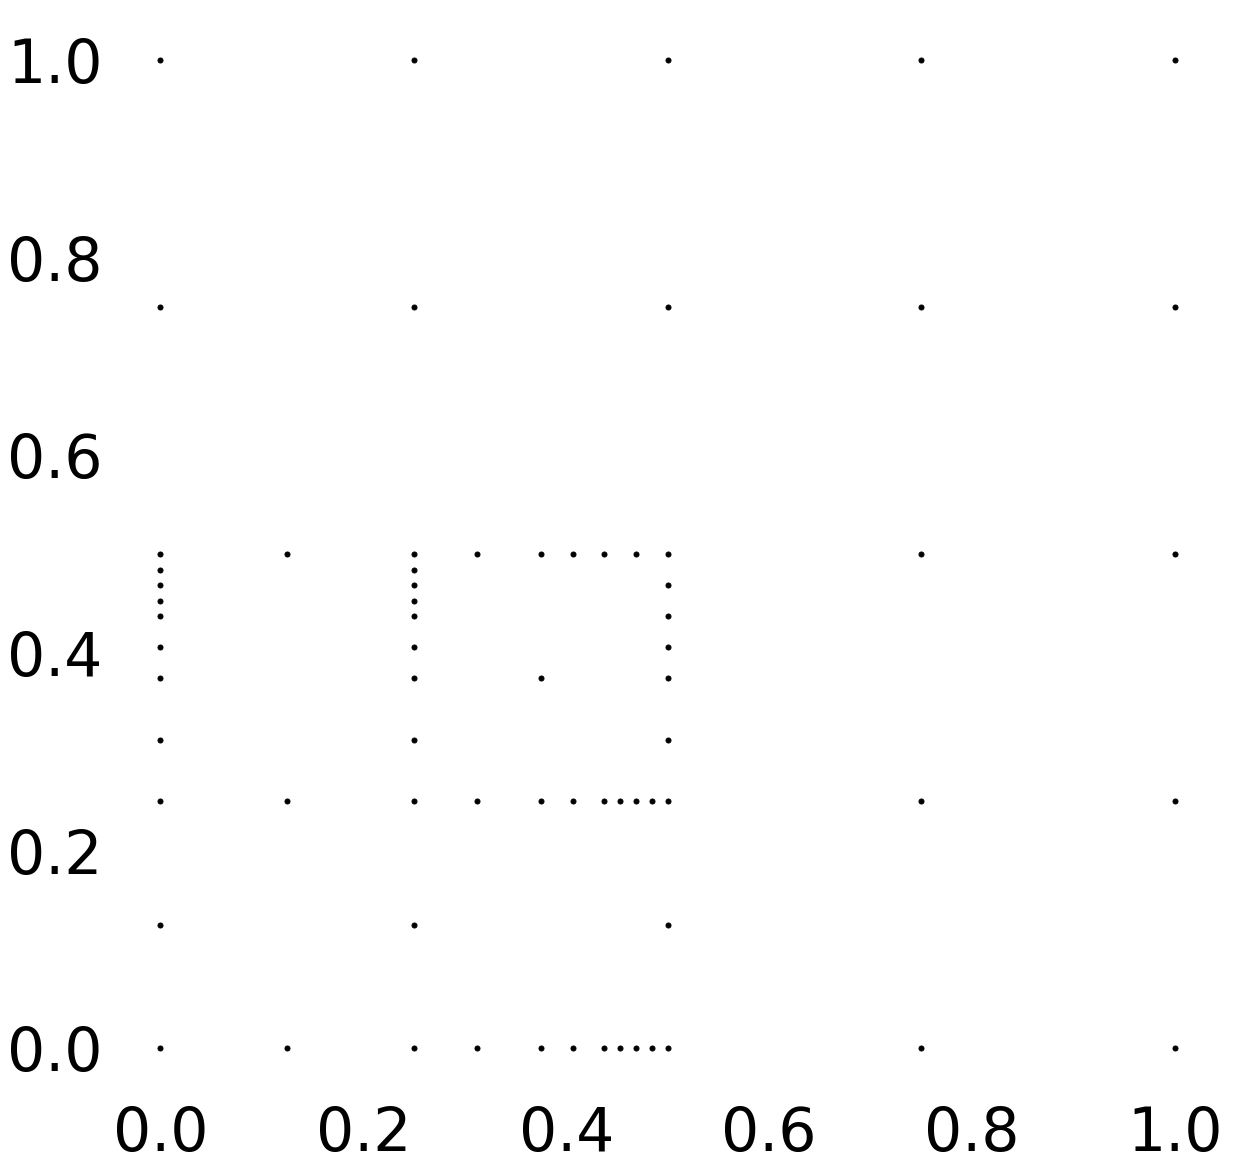

Resulting Sparse Grid:


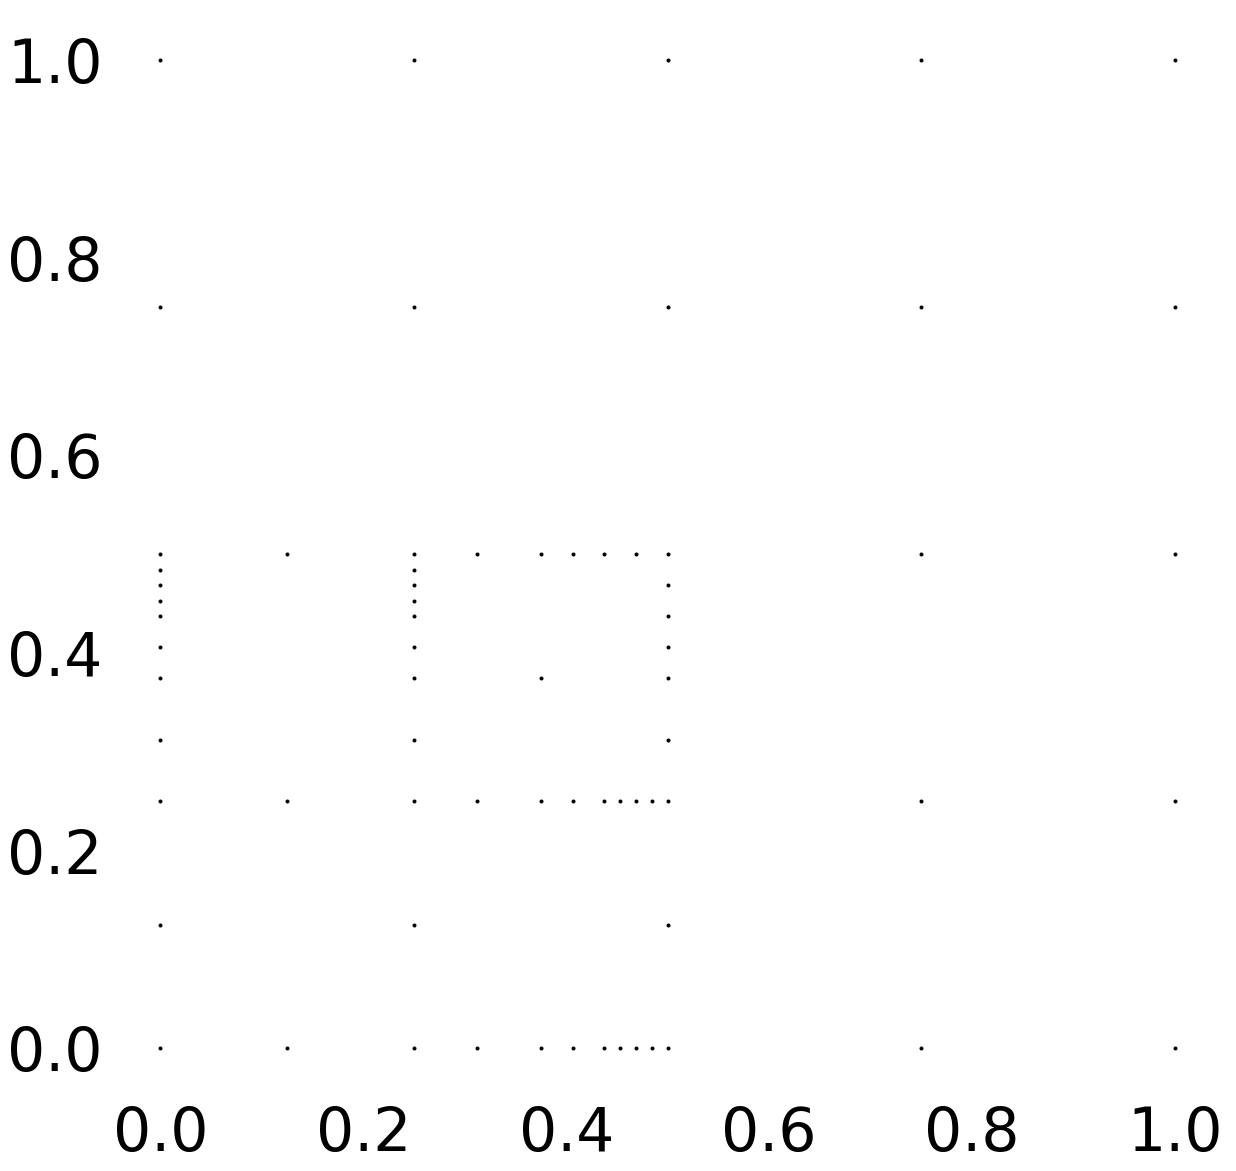

Curent number of function evaluations 74
max surplus error: 4.486190792106693e-05 total surplus error: 0.12296847218130899
combiintegral: 0.12029408709469436
Current error: 0.03269493059392662
Finished refinement
Refined  4  times
Refinement Graph:


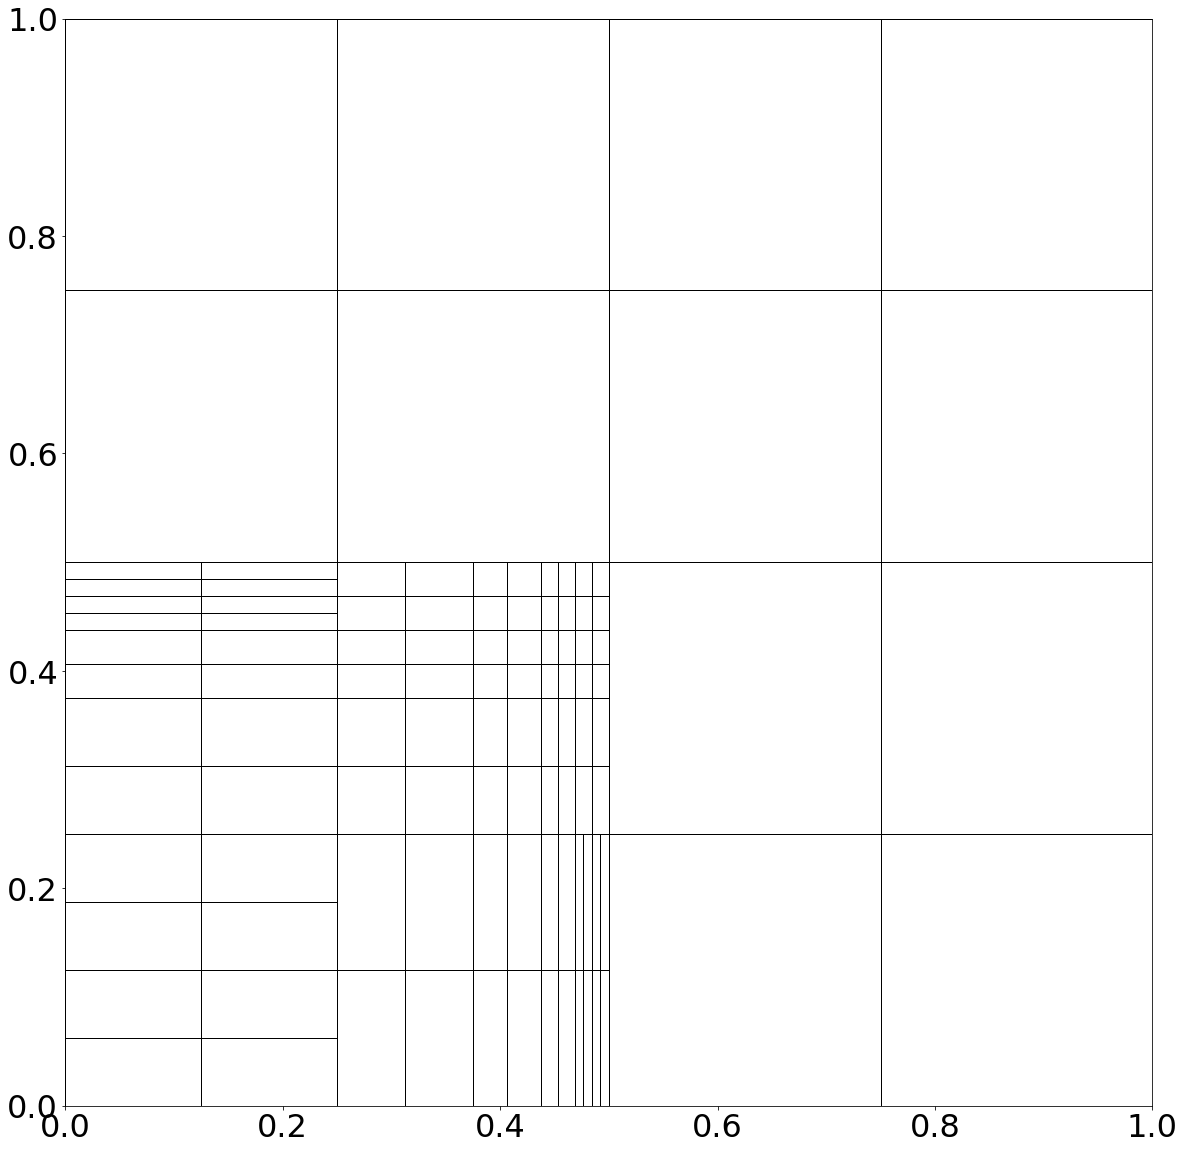

Combi Scheme:


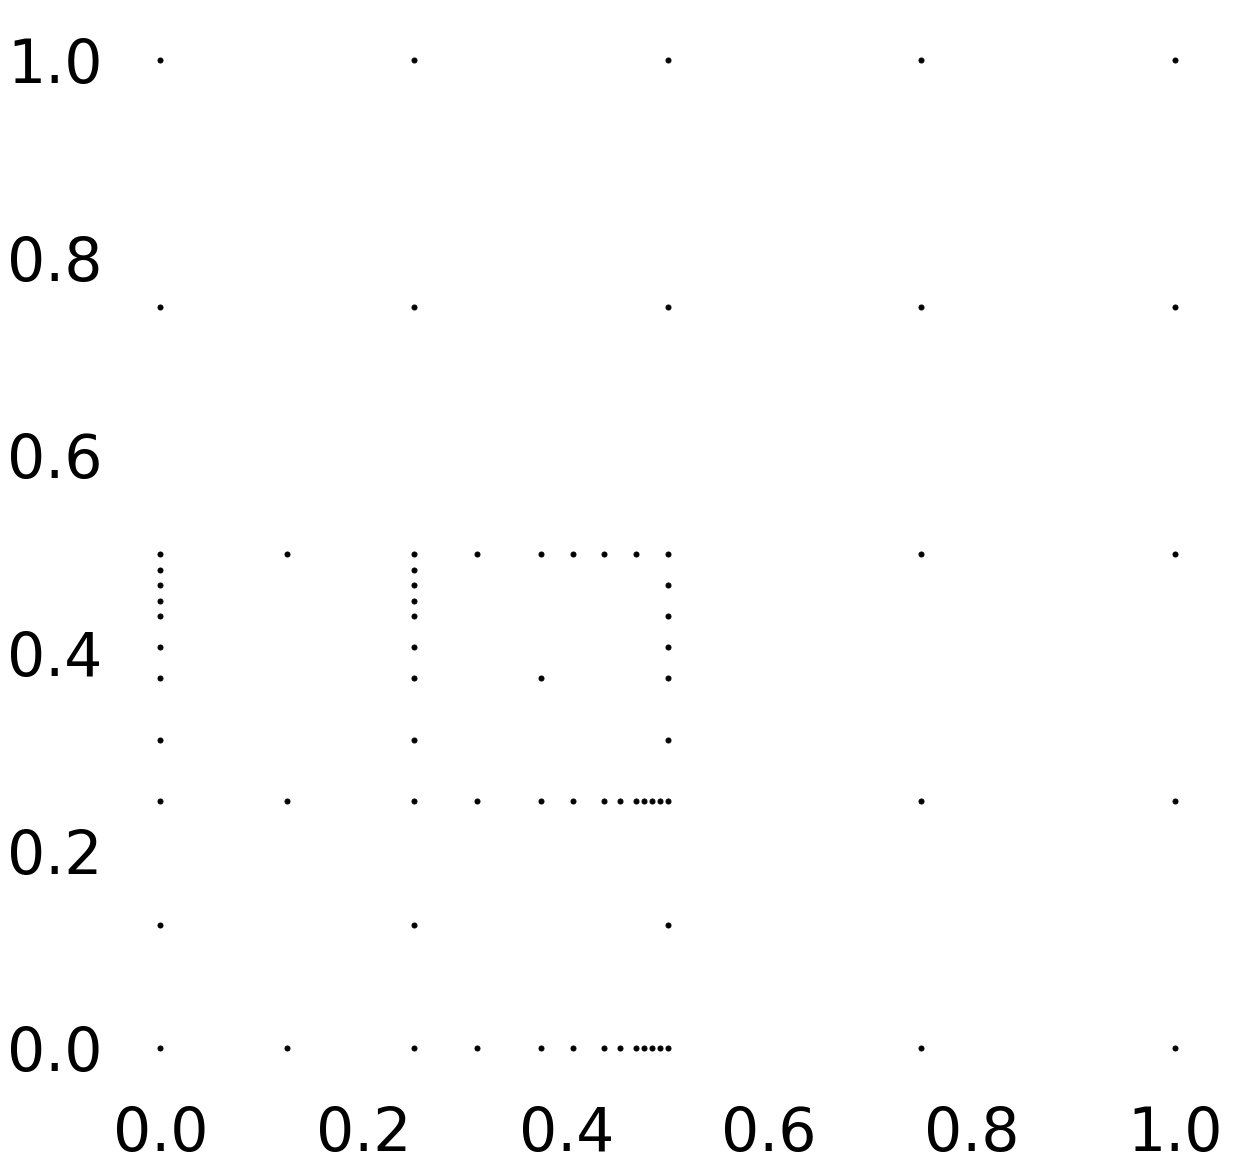

Resulting Sparse Grid:


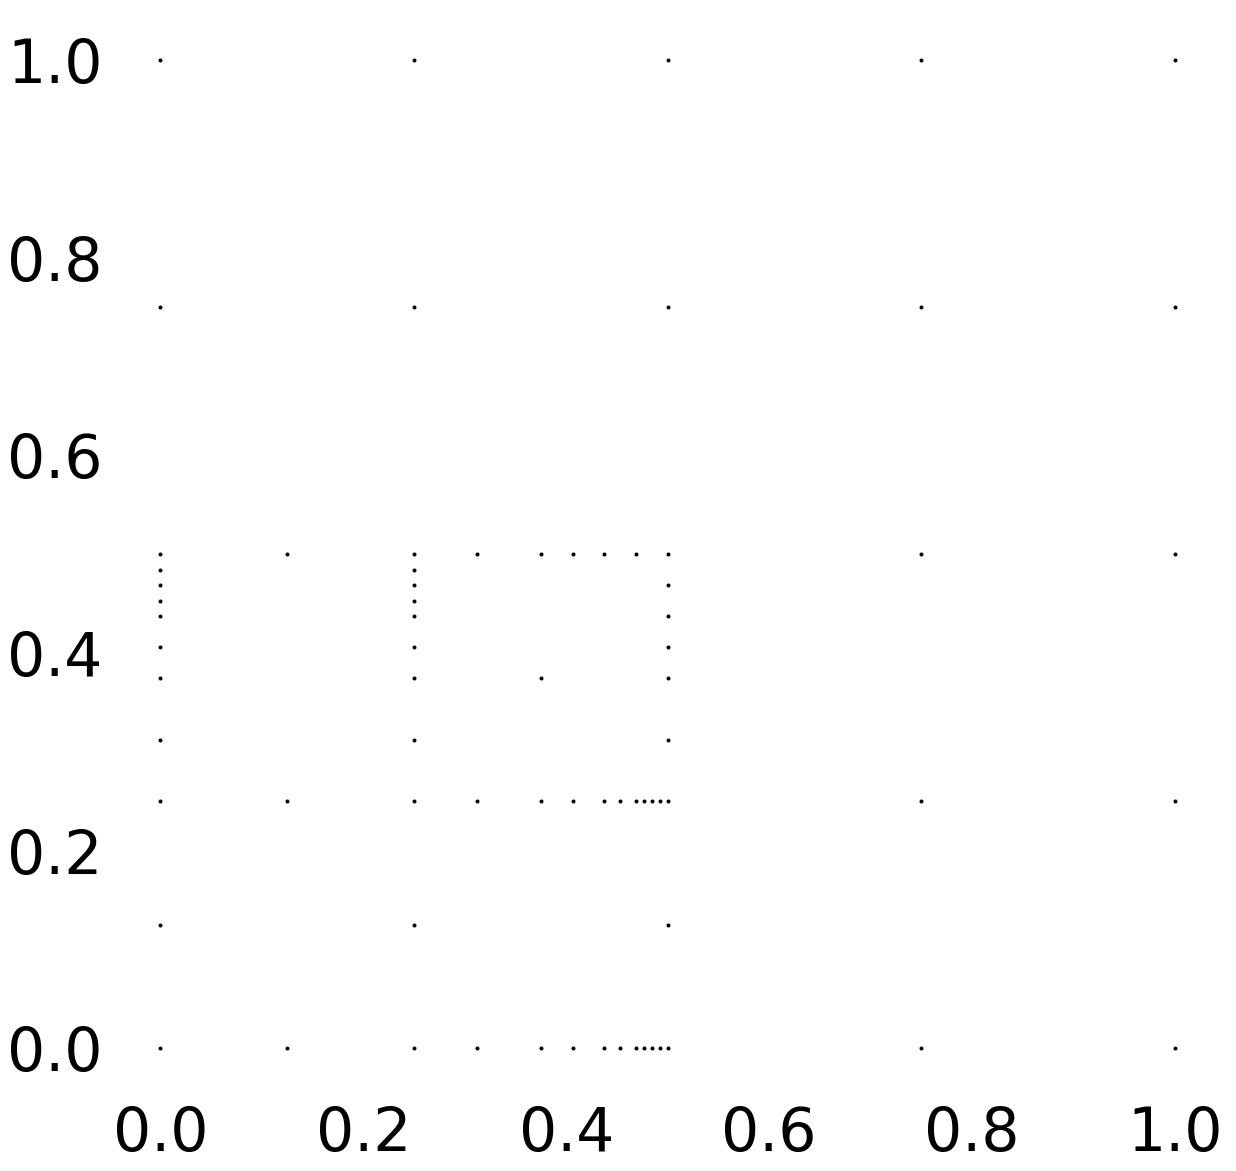

Curent number of function evaluations 80
max surplus error: 3.9900198470035566e-05 total surplus error: 0.12349838502508634
combiintegral: 0.12048251059980176
Current error: 0.031179785368690566
Finished refinement
Refined  2  times
Refinement Graph:


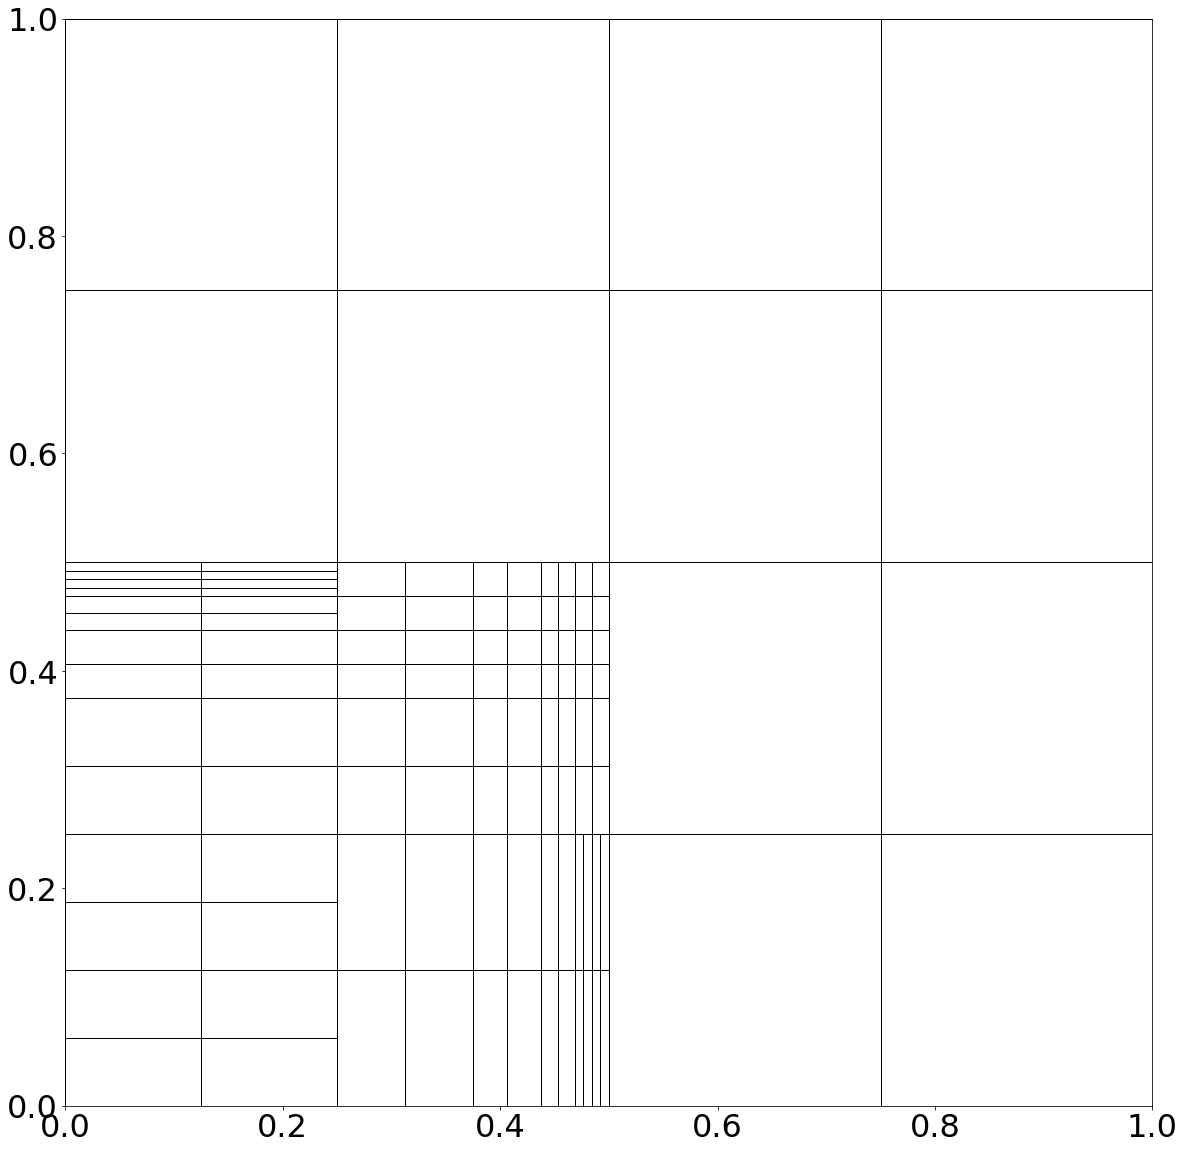

Combi Scheme:


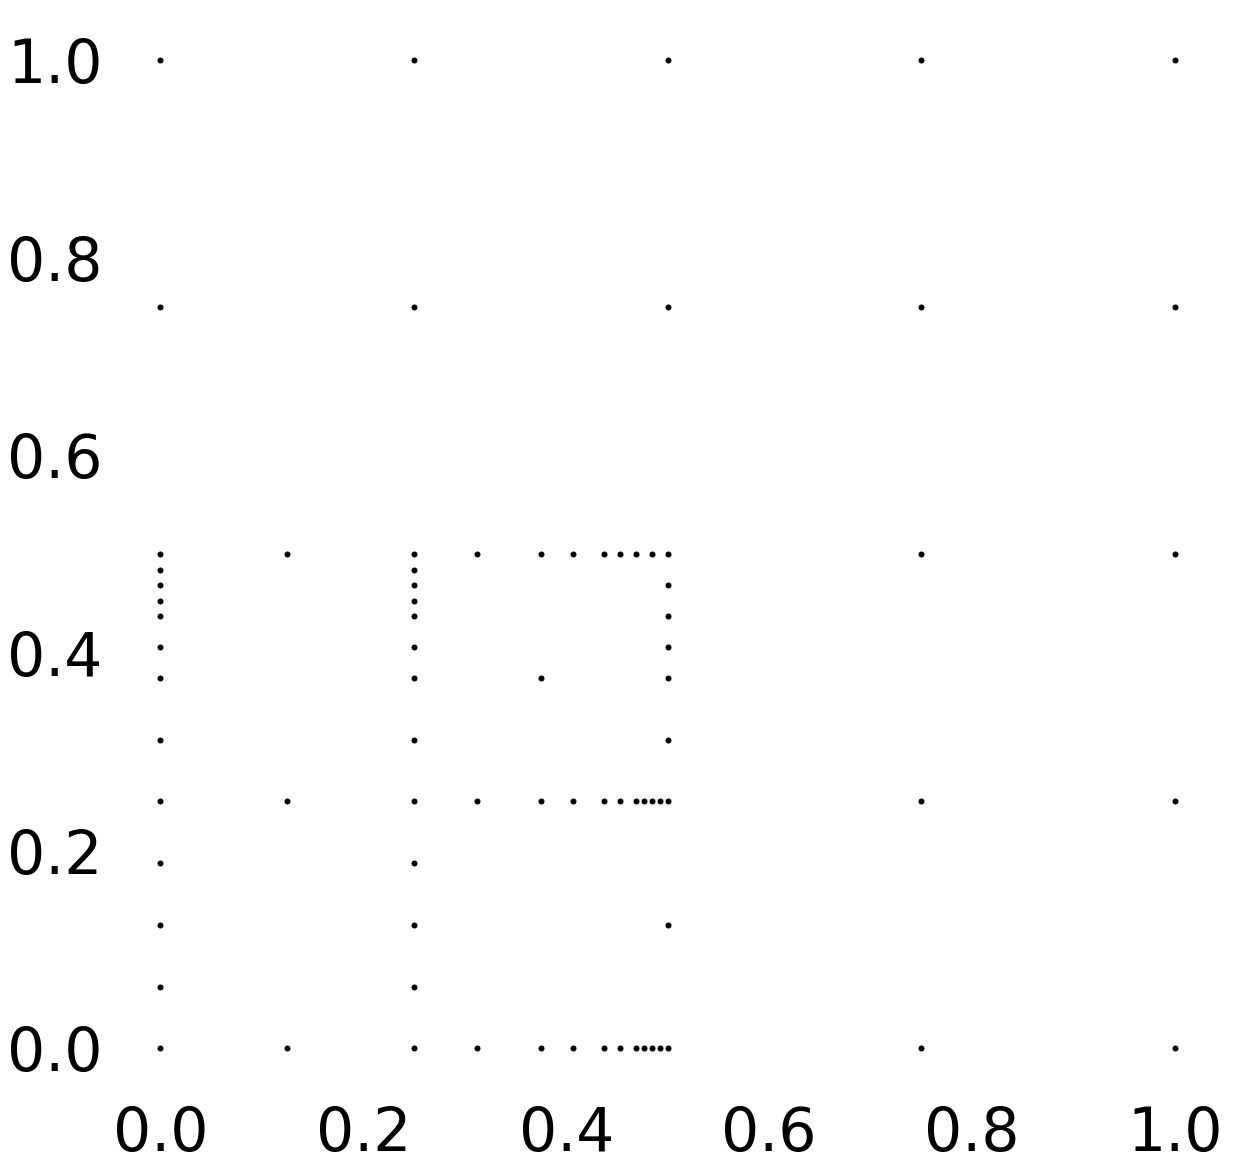

Resulting Sparse Grid:


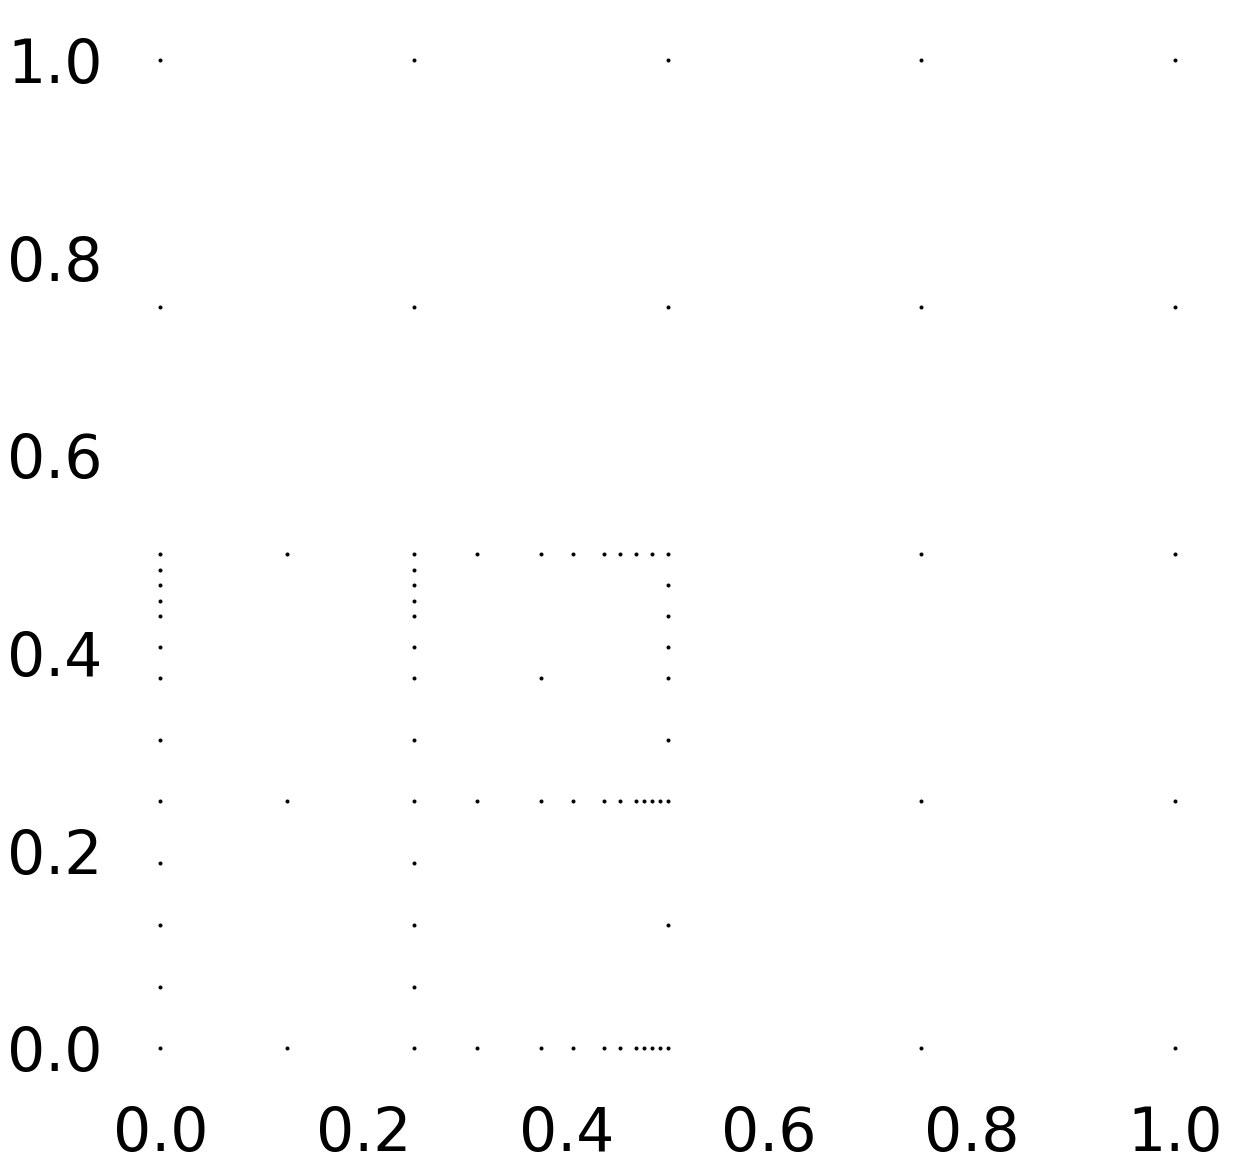

Curent number of function evaluations 84
max surplus error: 3.482825562301867e-05 total surplus error: 0.12381791109412066
combiintegral: 0.12080187316071989
Current error: 0.028611737082897225
Finished refinement
Refined  2  times
Refinement Graph:


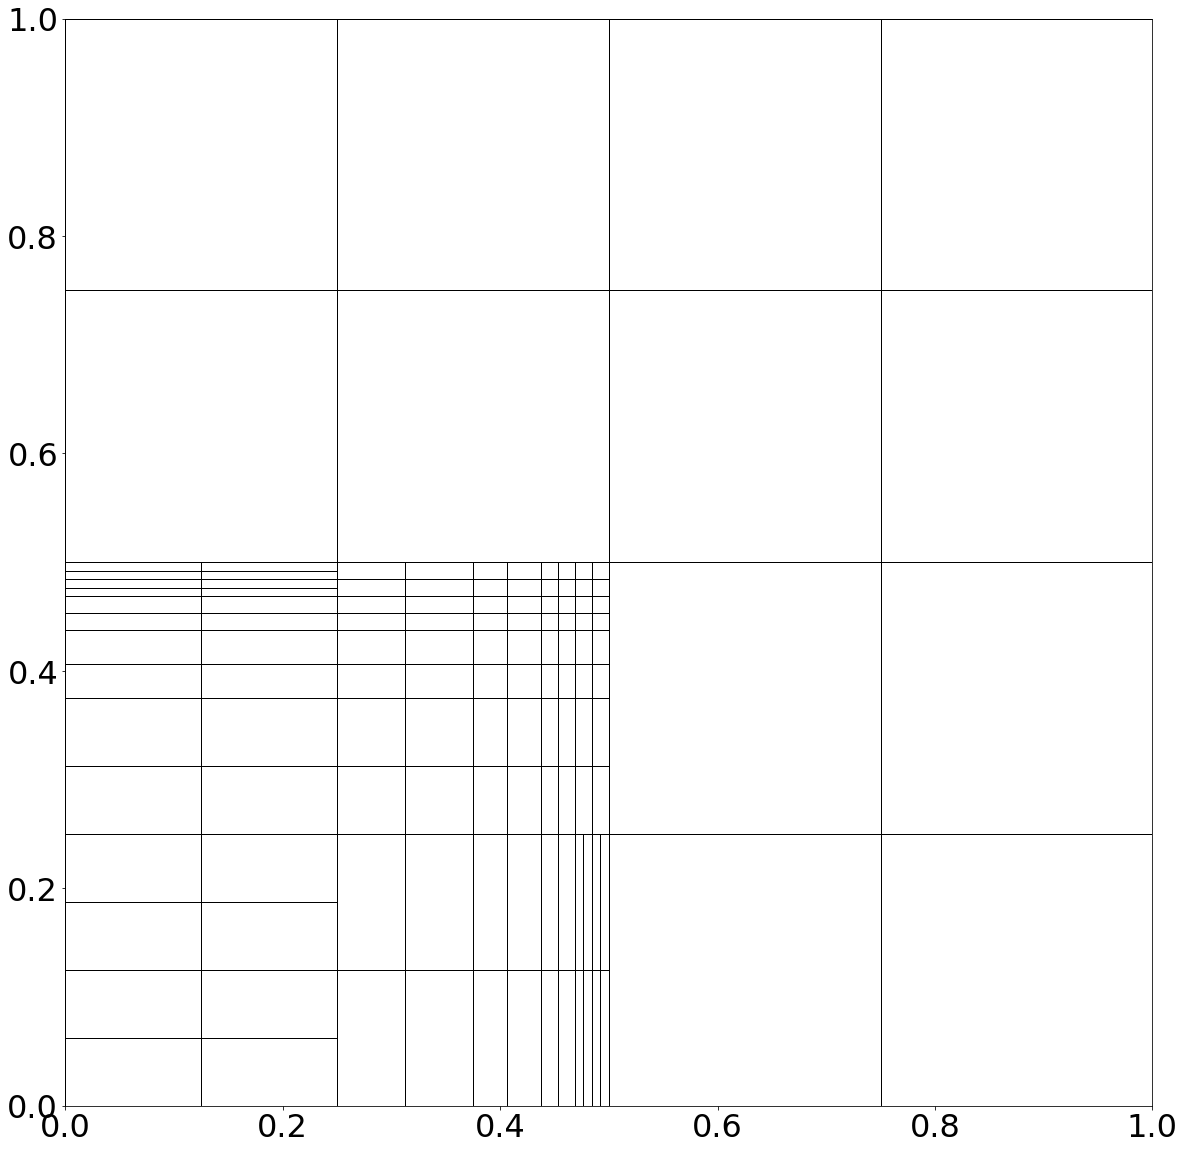

Combi Scheme:


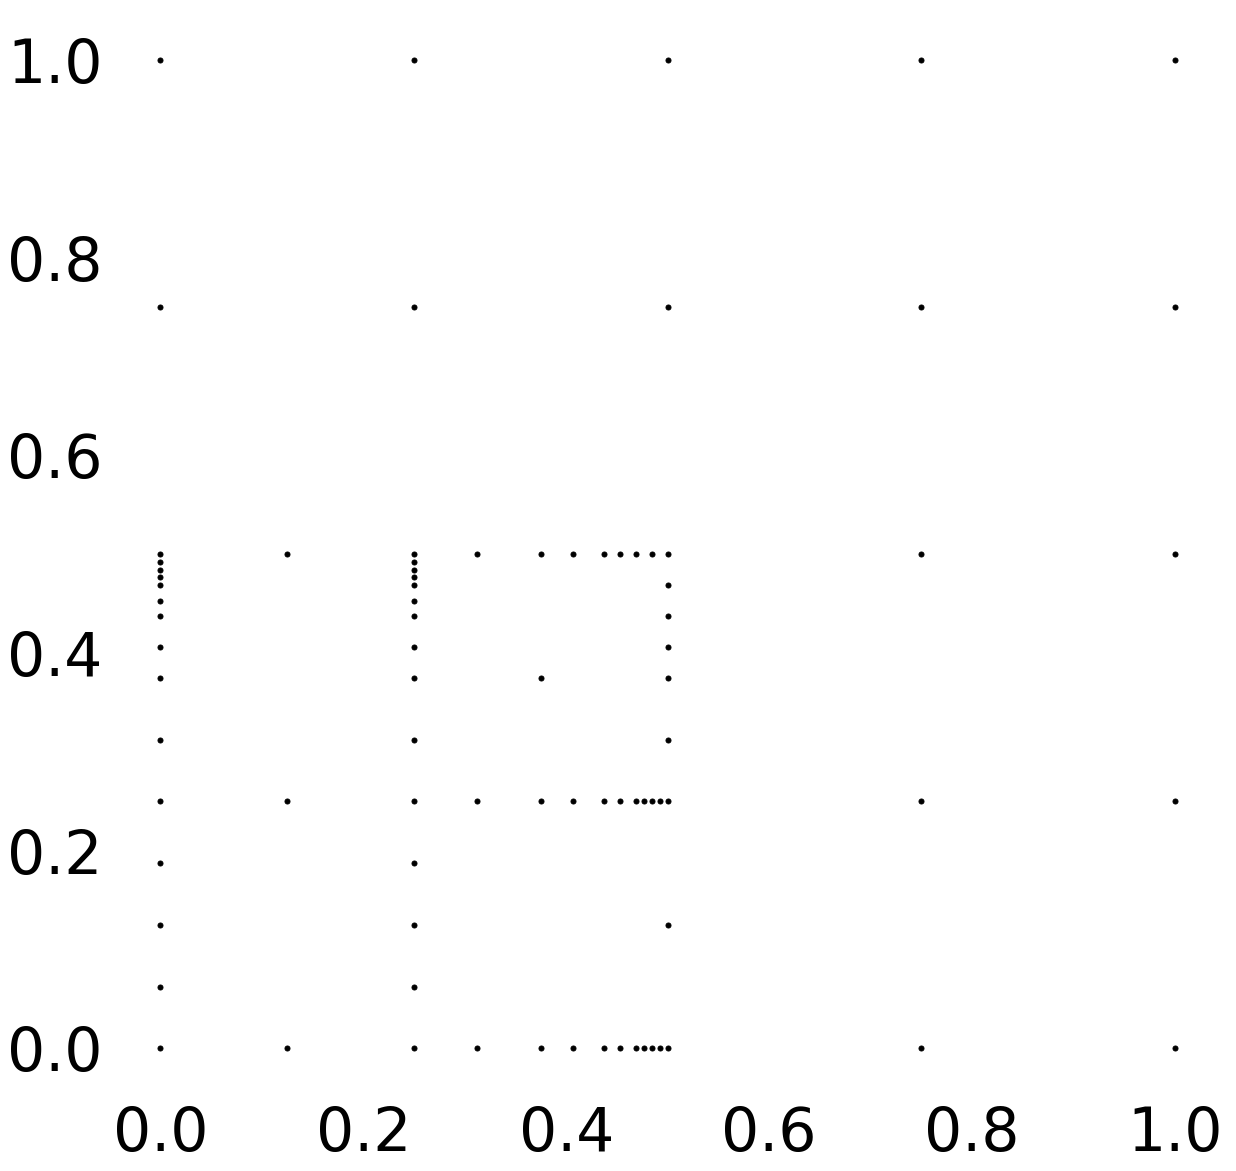

Resulting Sparse Grid:


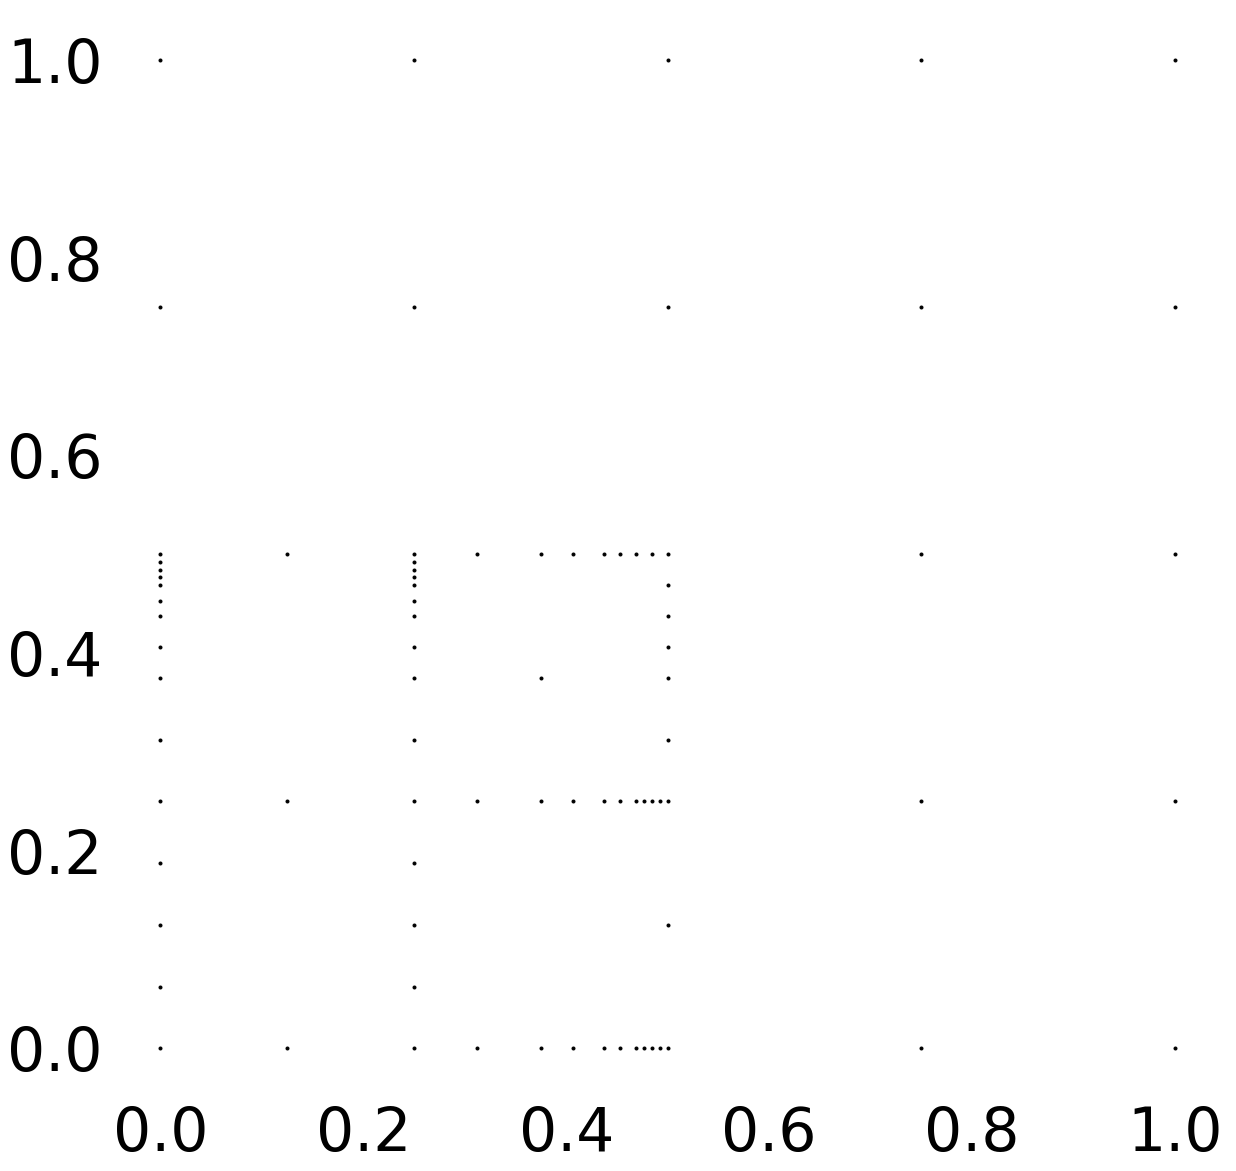

Curent number of function evaluations 86
max surplus error: 2.9734807154900748e-05 total surplus error: 0.12409771911763254
combiintegral: 0.12108108096151206
Current error: 0.026366580004549847
Finished refinement
Refined  2  times
Refinement Graph:


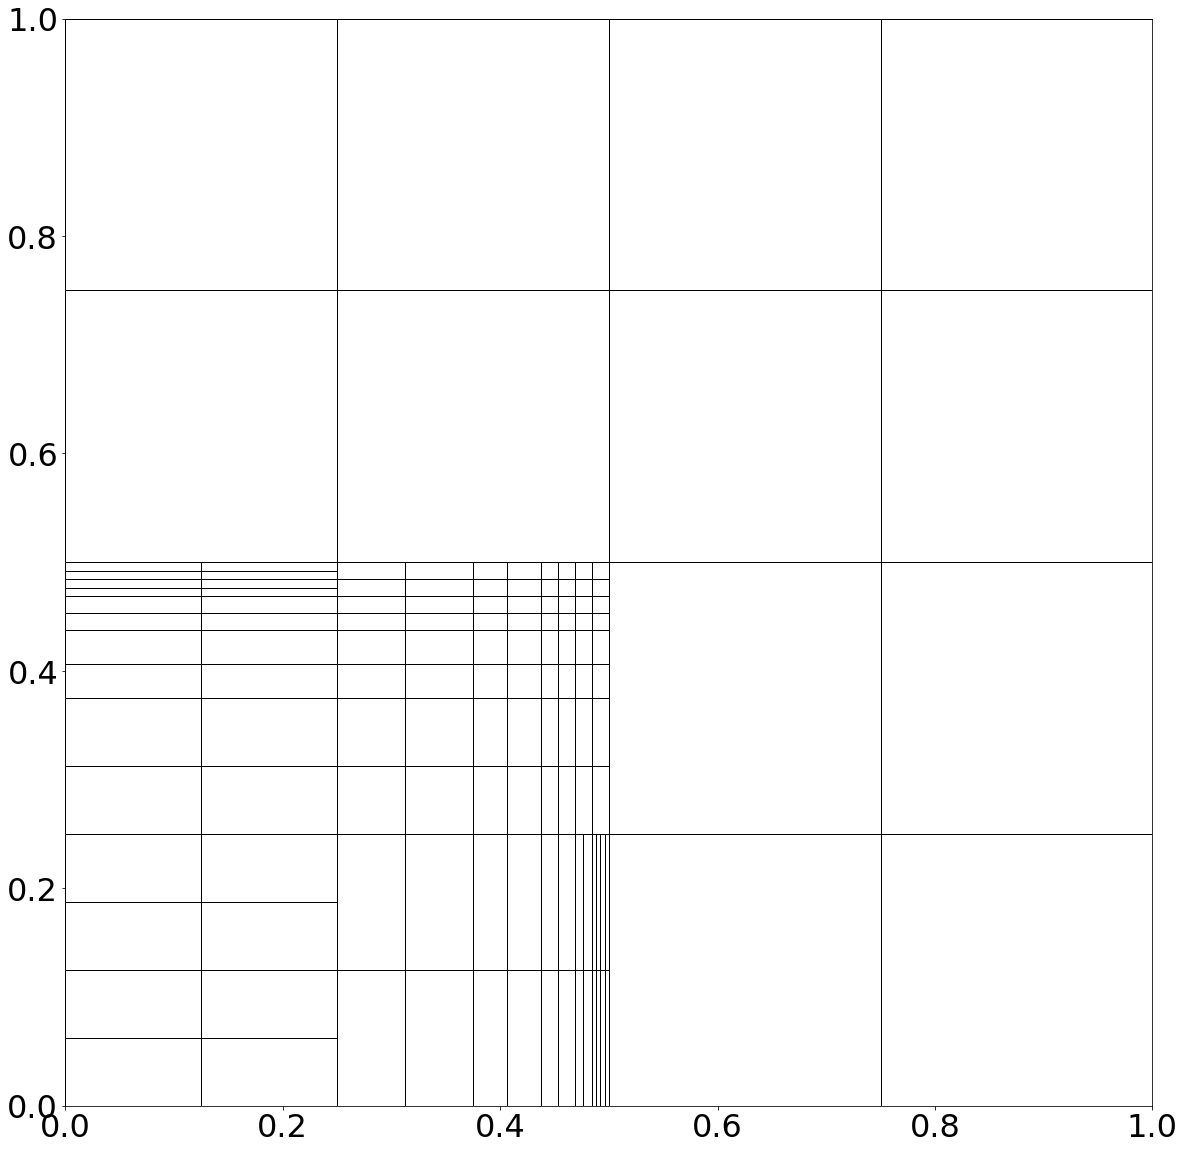

Combi Scheme:


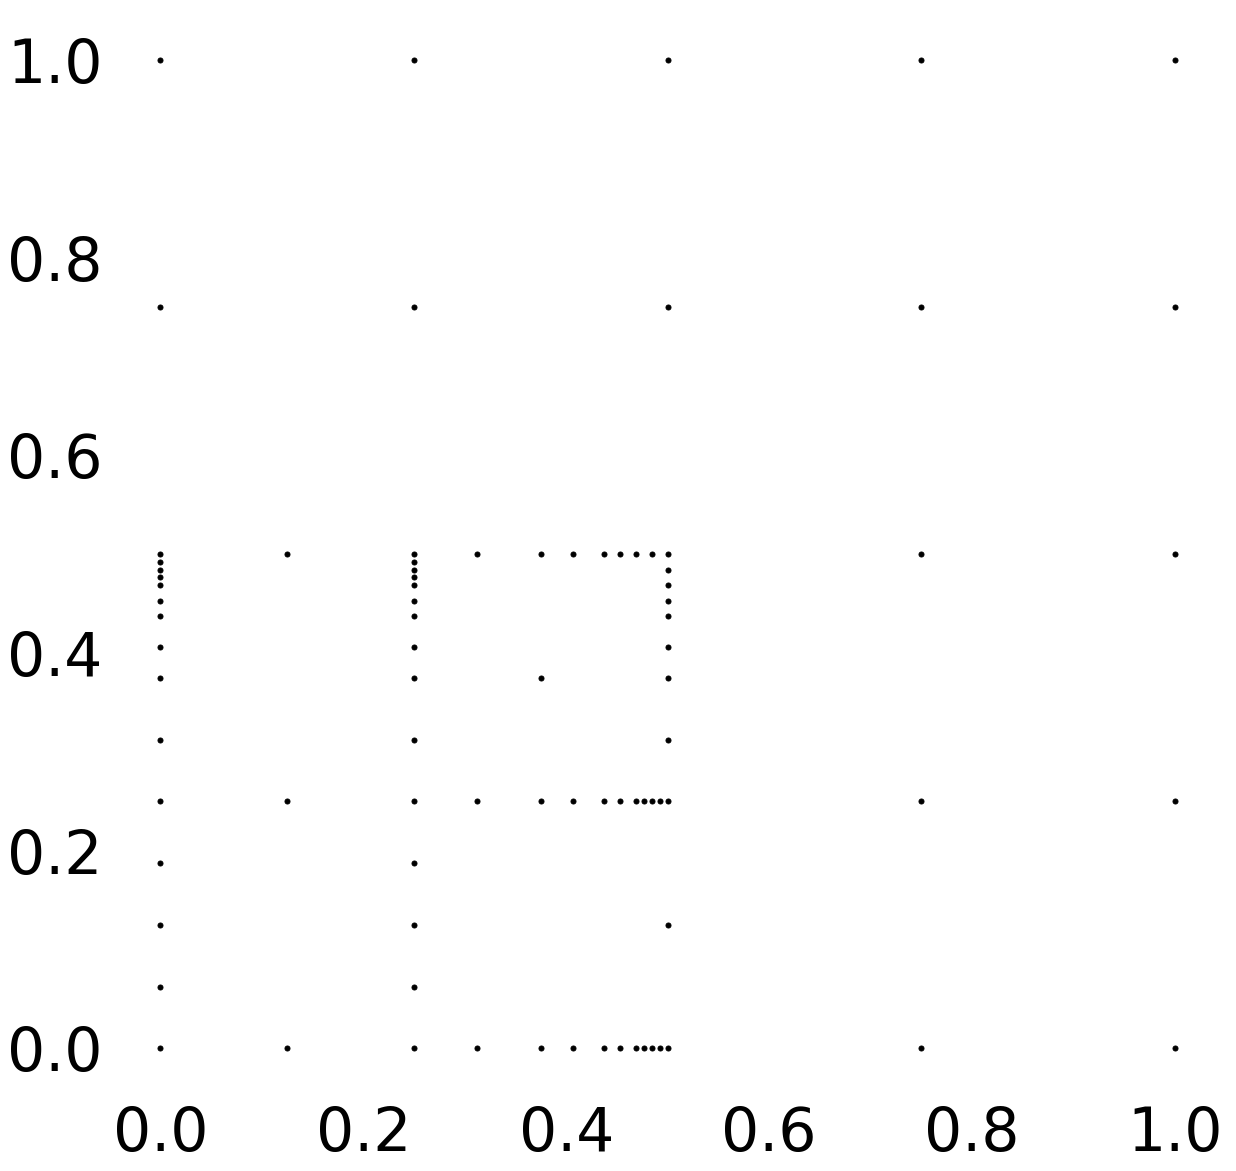

Resulting Sparse Grid:


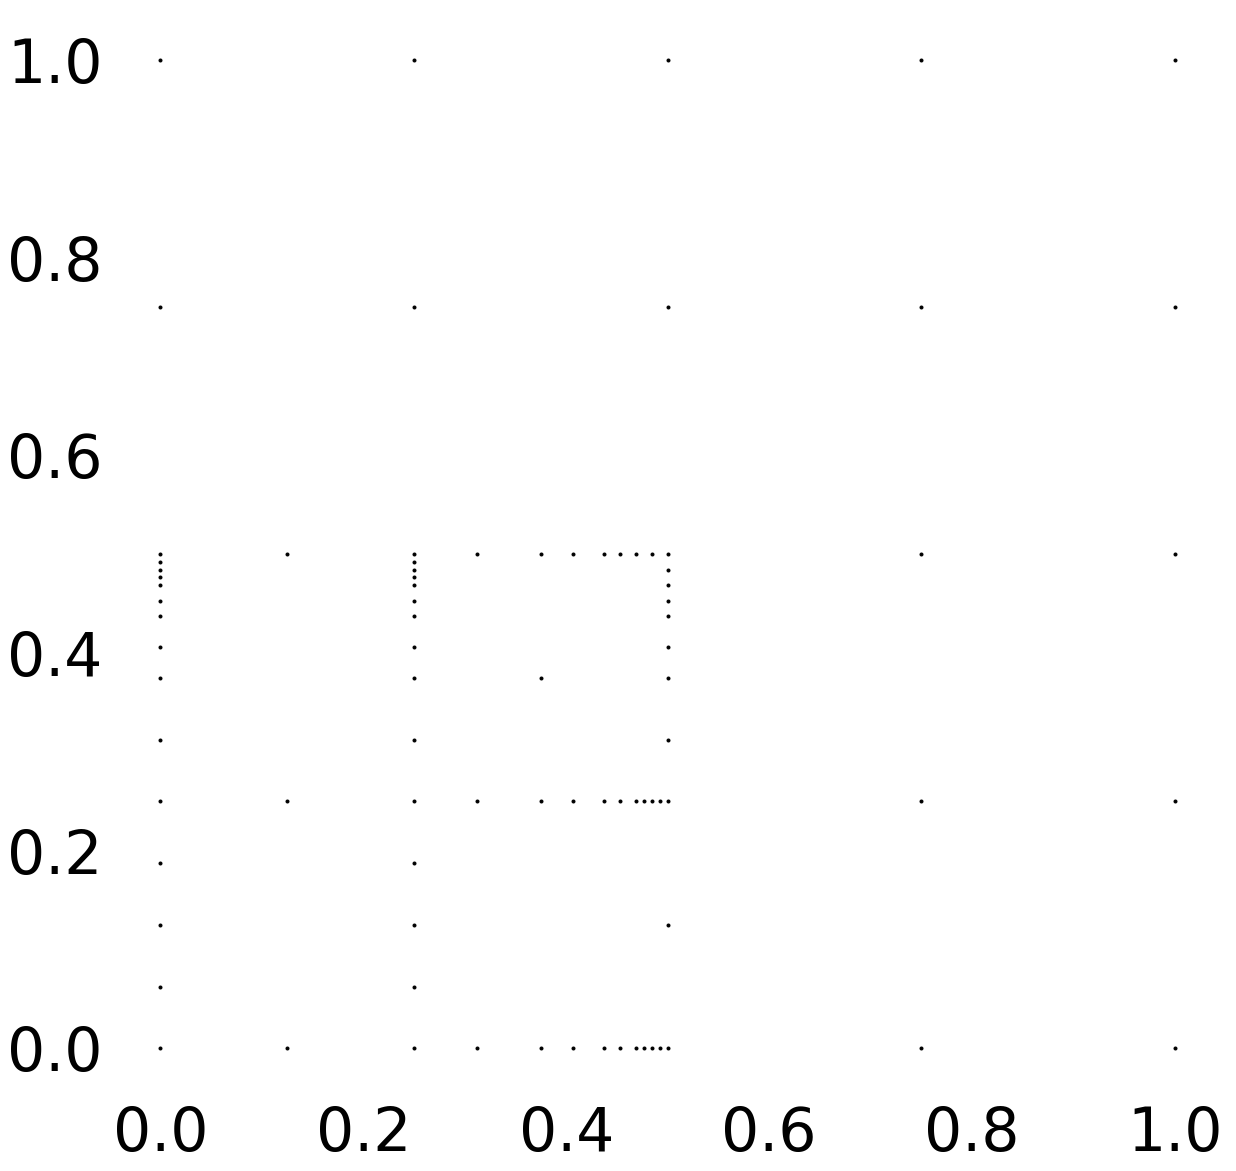

Curent number of function evaluations 90
max surplus error: 2.244801090264871e-05 total surplus error: 0.12433561223725029
combiintegral: 0.12131896673562183
Current error: 0.024453700321155025
Finished refinement
Refined  2  times
Refinement Graph:


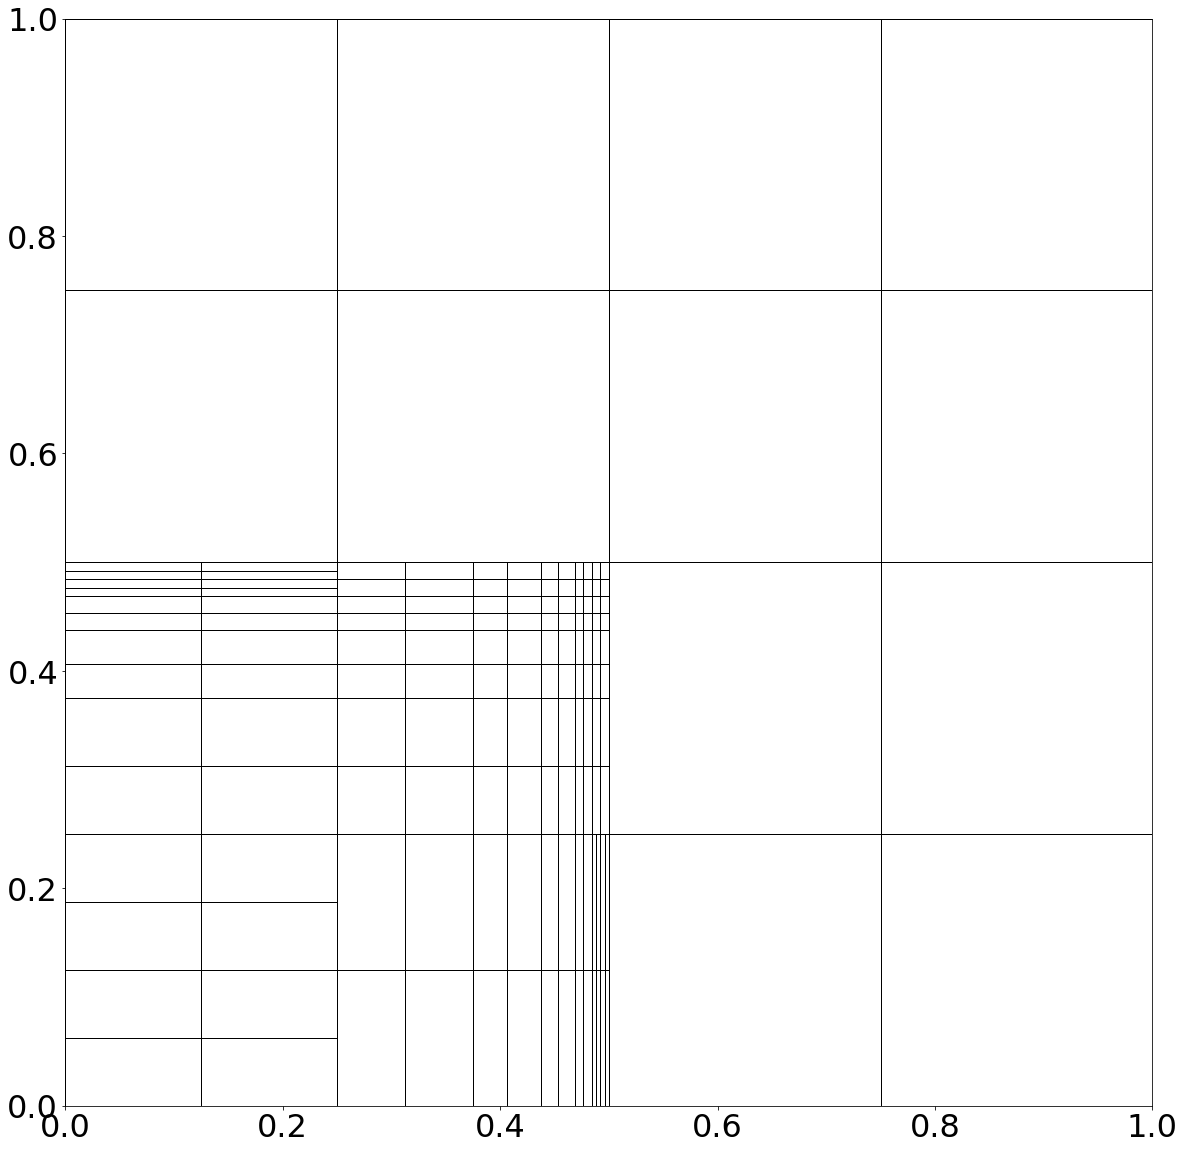

Combi Scheme:


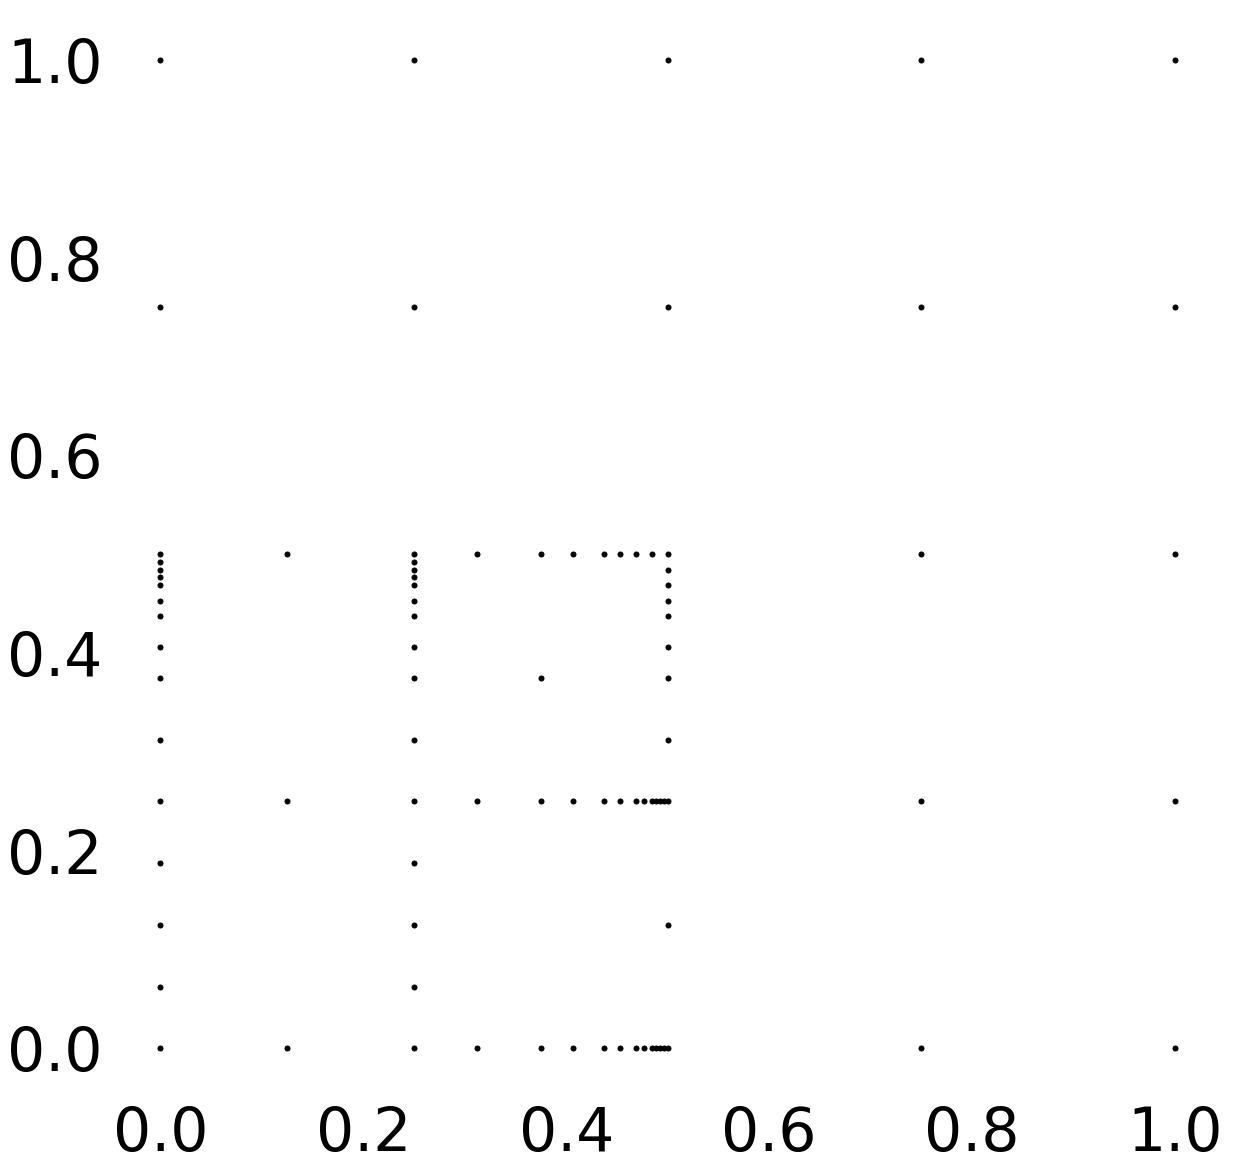

Resulting Sparse Grid:


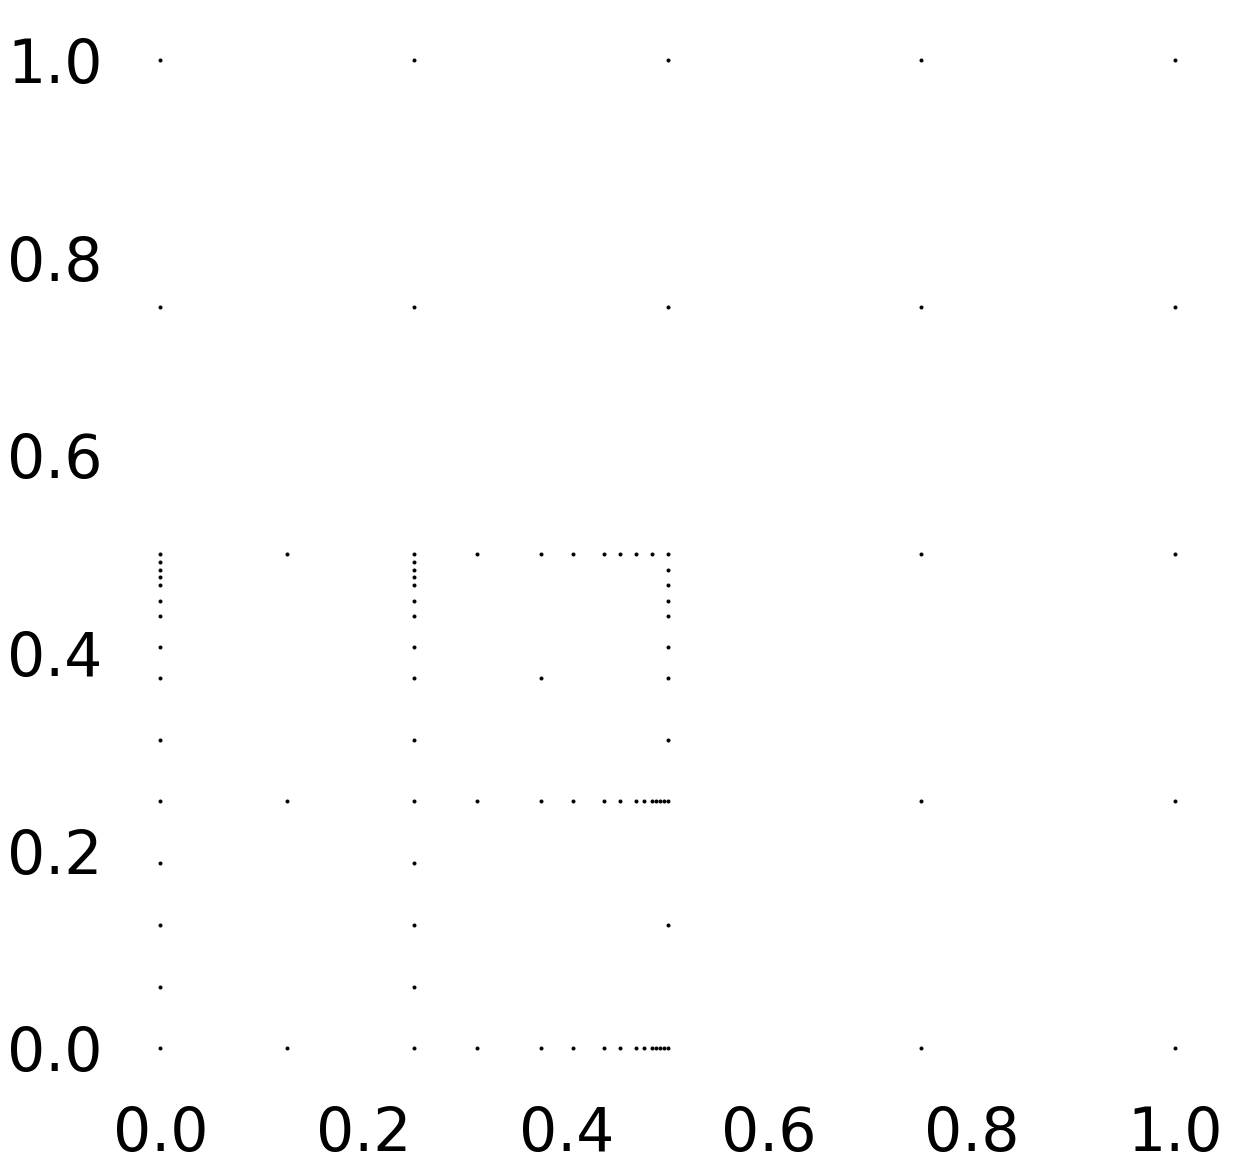

Curent number of function evaluations 92
max surplus error: 1.9965269686013477e-05 total surplus error: 0.12451524104464234
combiintegral: 0.1214985730955848
Current error: 0.02300945524905106
Finished refinement
Refined  4  times
Refinement Graph:


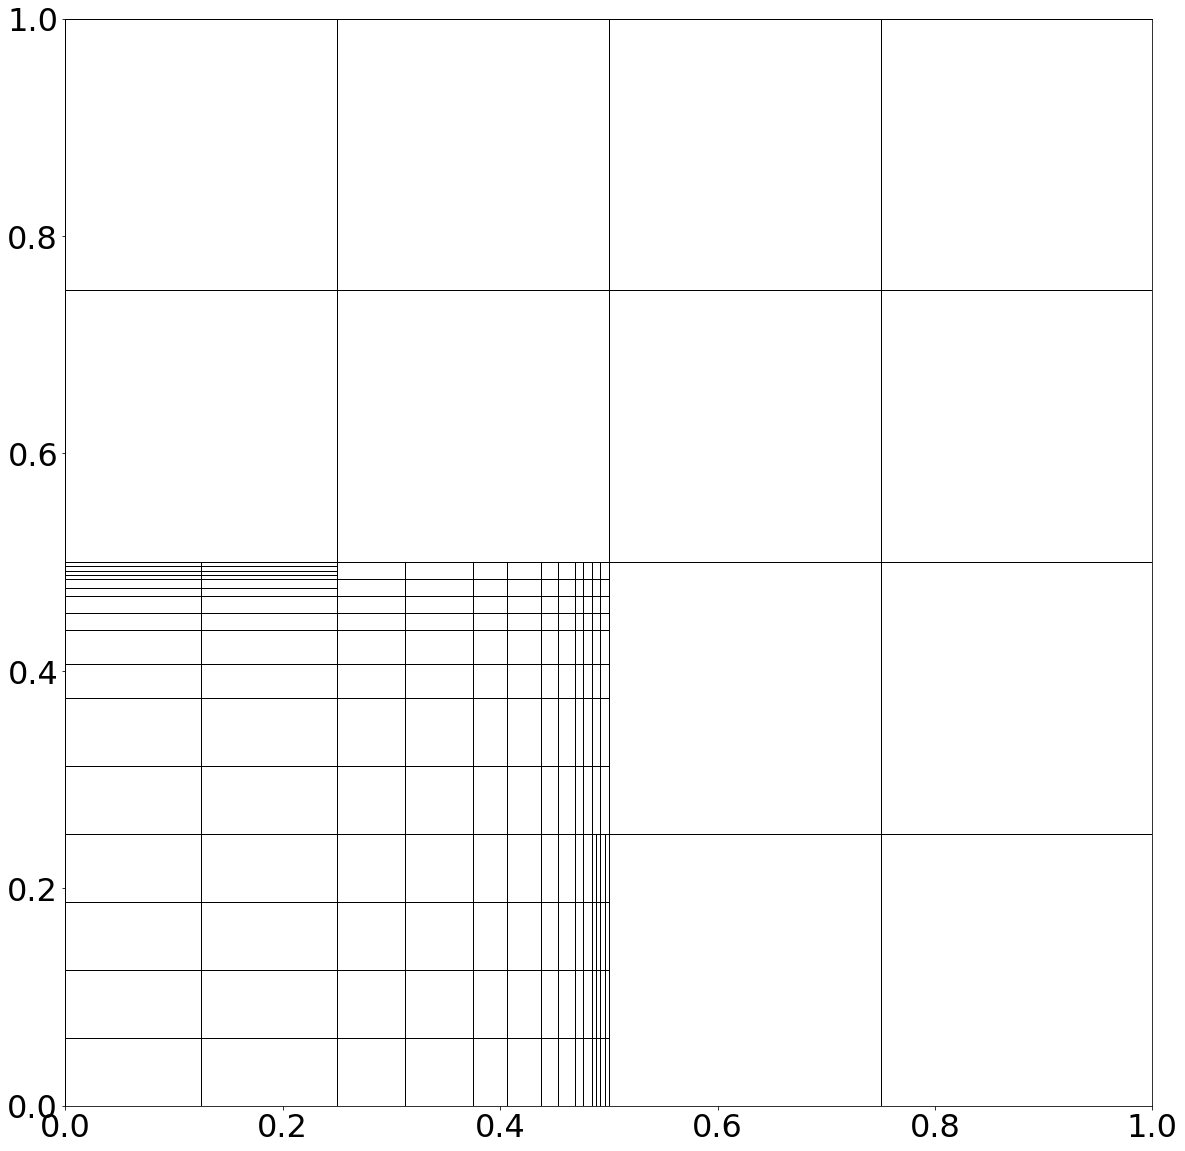

Combi Scheme:


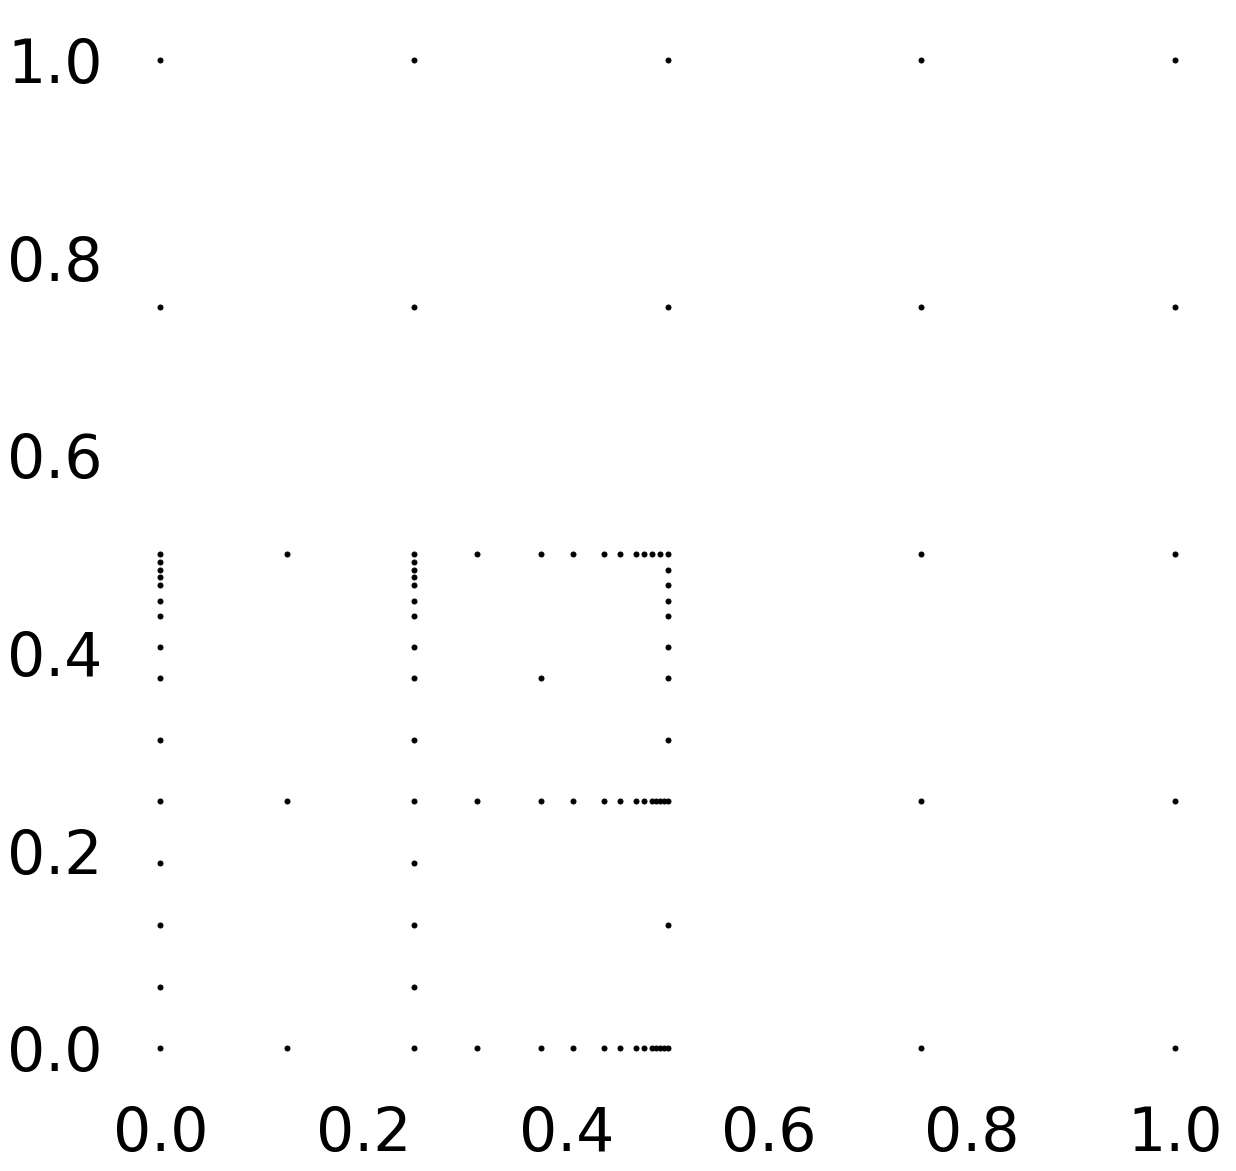

Resulting Sparse Grid:


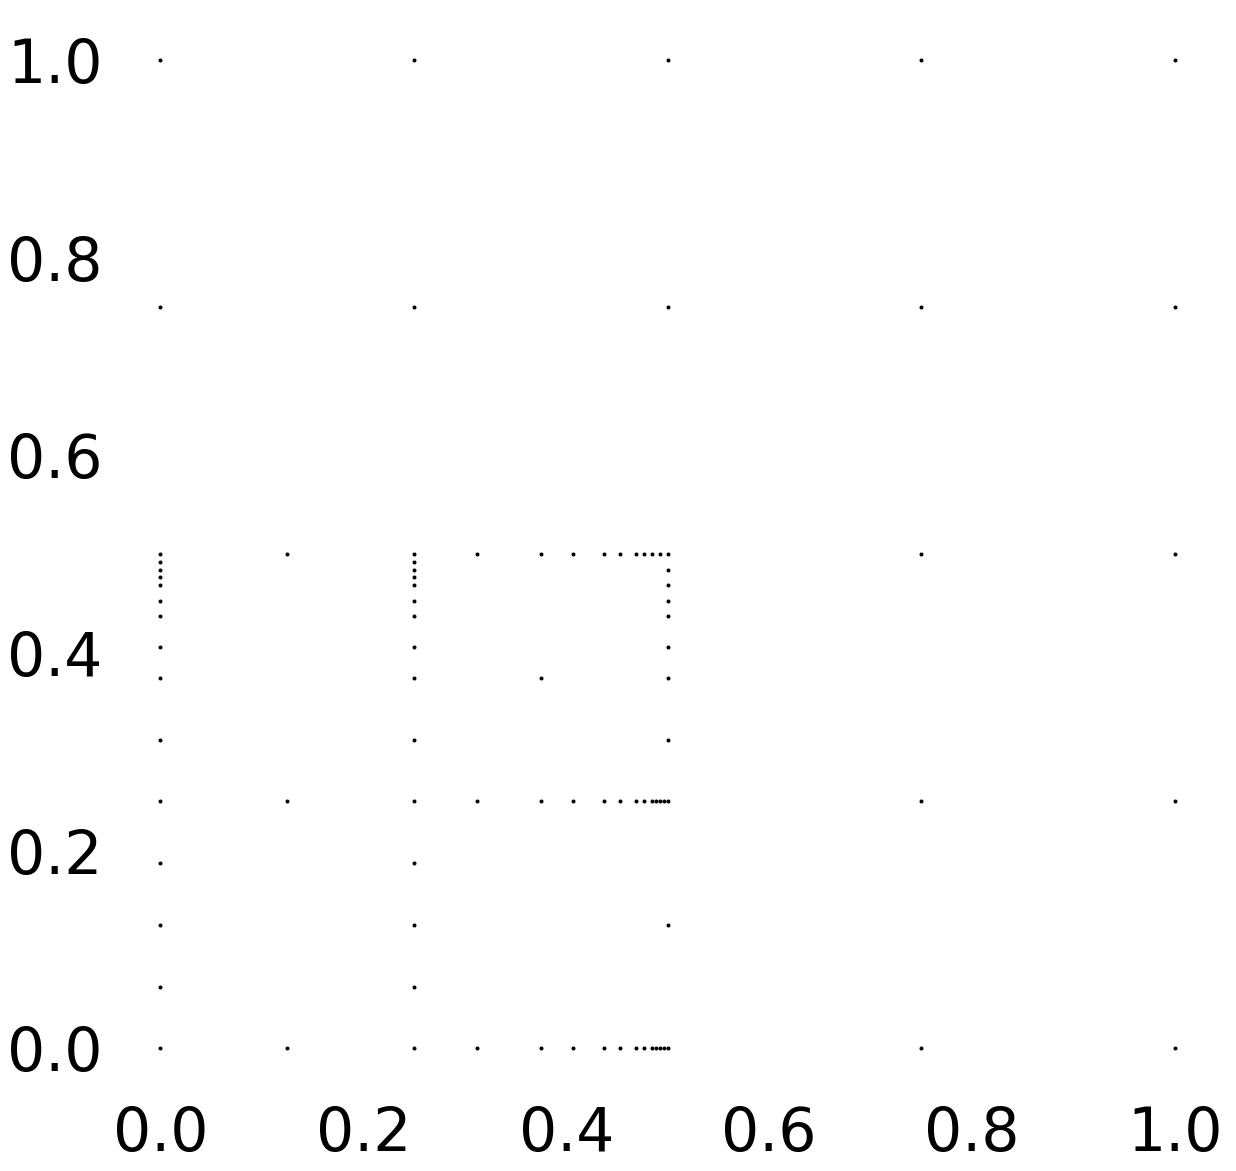

Curent number of function evaluations 99
max surplus error: 1.74692445095021e-05 total surplus error: 0.12486358933210234
combiintegral: 0.12146972870662379
Current error: 0.023241397851881968
Finished refinement
Refined  2  times
Refinement Graph:


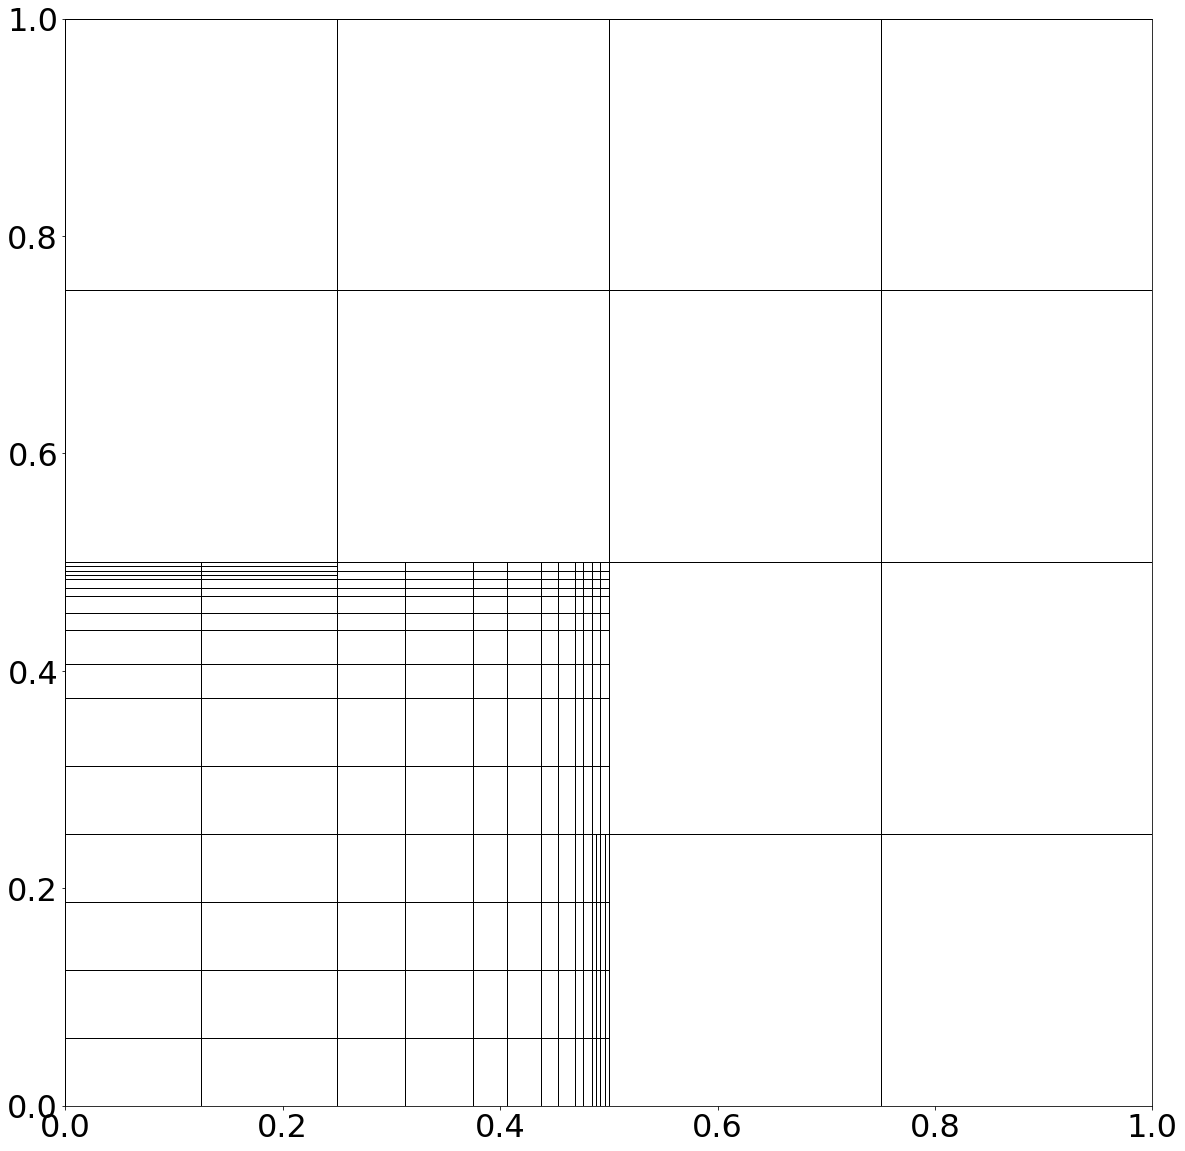

Combi Scheme:


Resulting Sparse Grid:


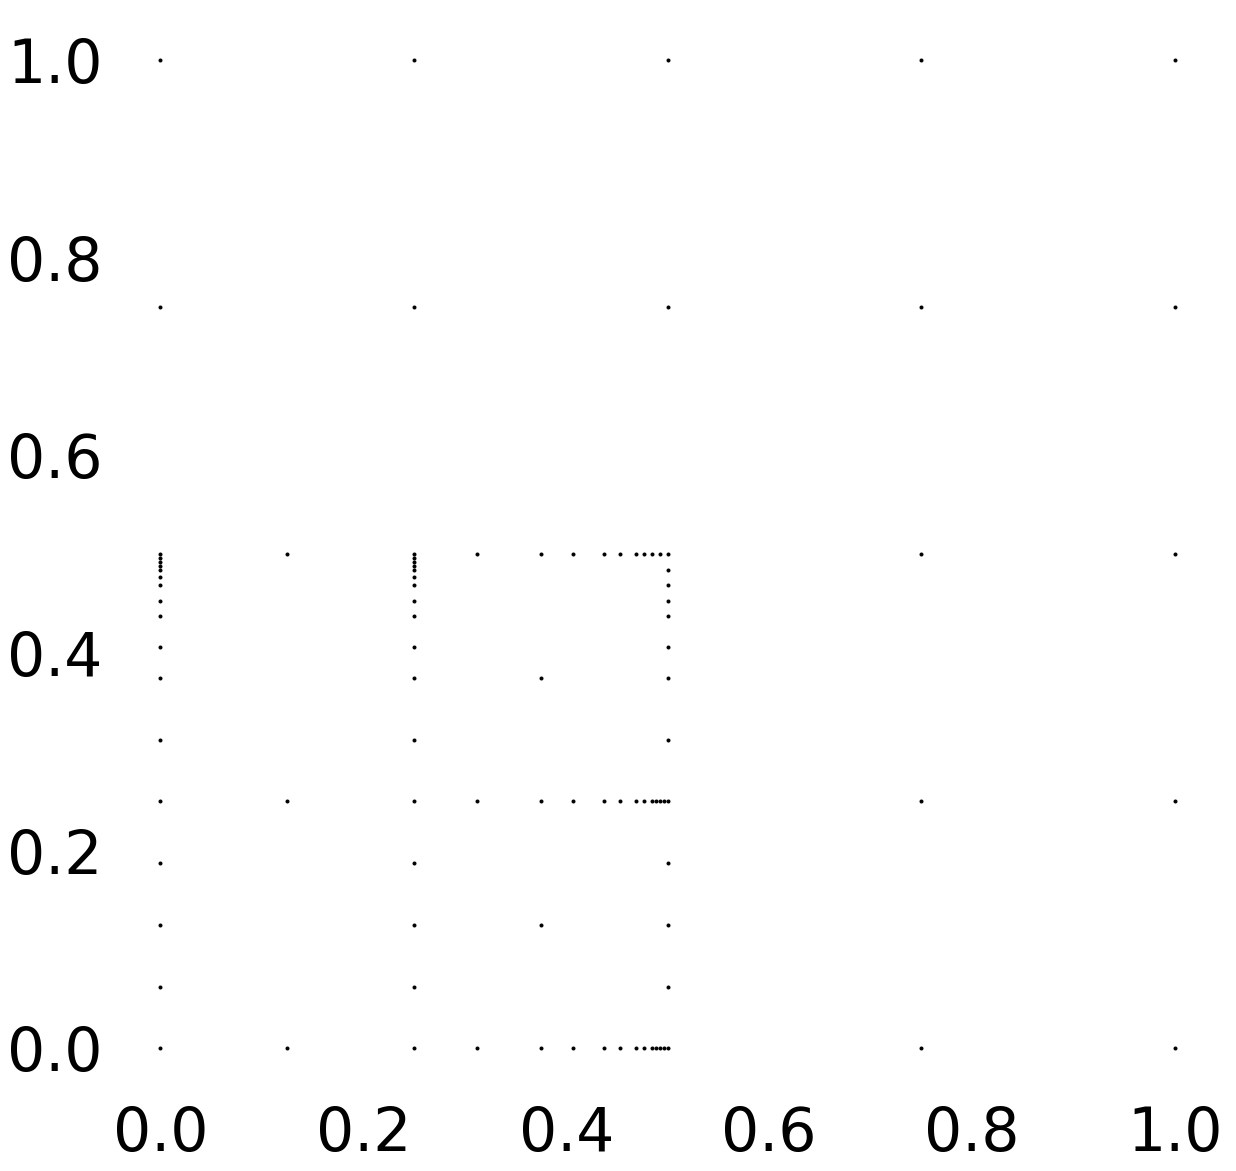

Curent number of function evaluations 101
max surplus error: 1.4868090428984891e-05 total surplus error: 0.12500348535370515
combiintegral: 0.12160955314053104
Current error: 0.02211704596550162
Finished refinement
Refined  2  times
Refinement Graph:


Combi Scheme:


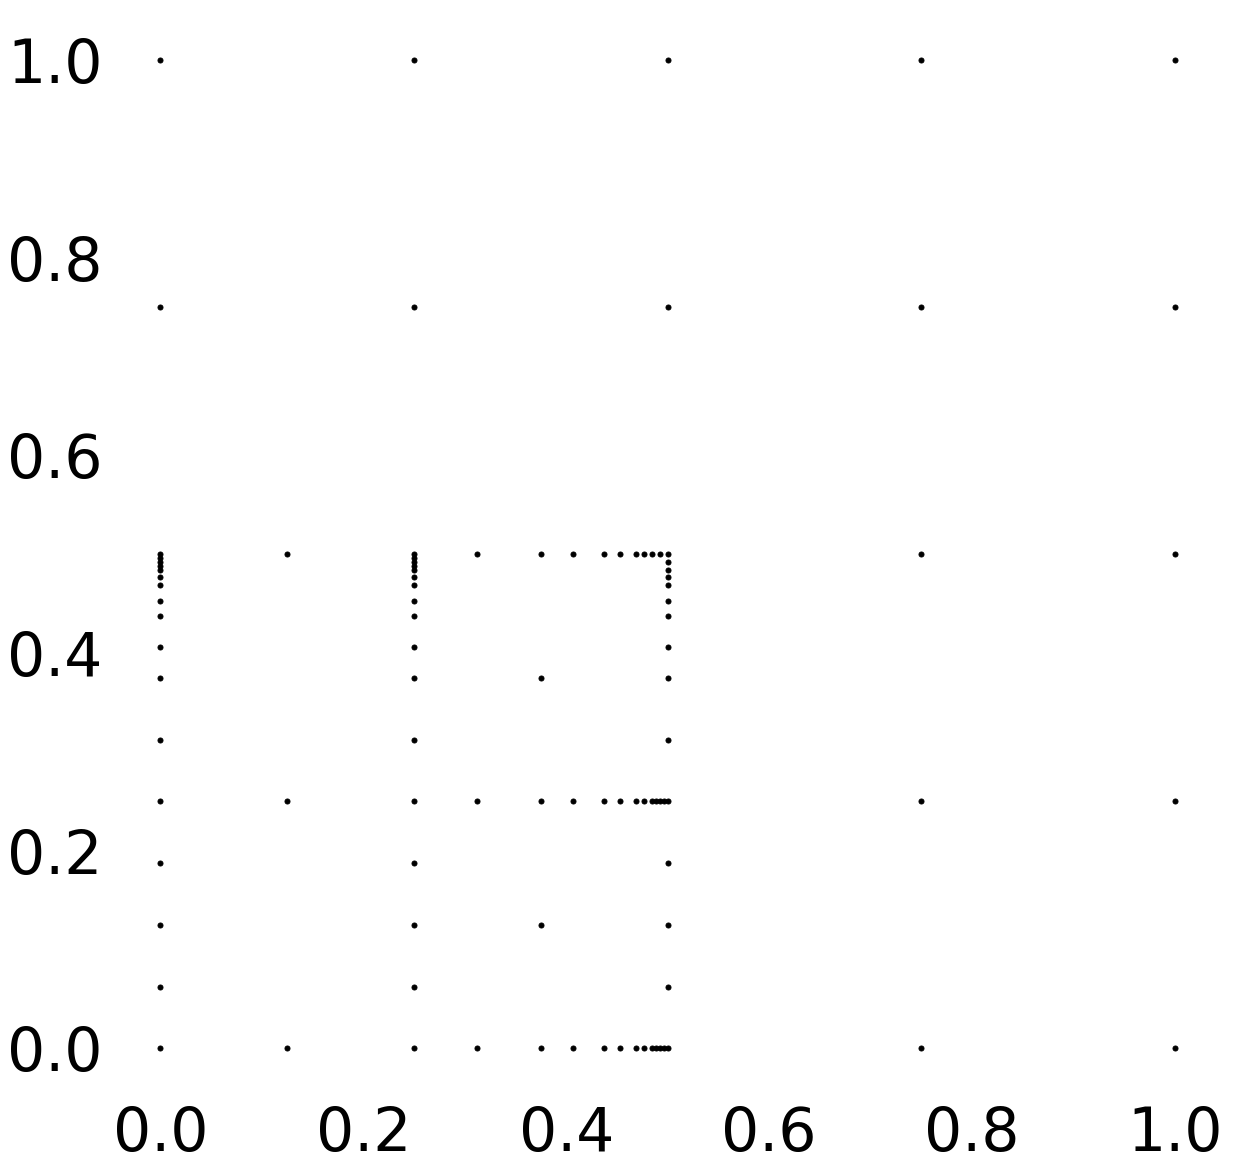

Resulting Sparse Grid:


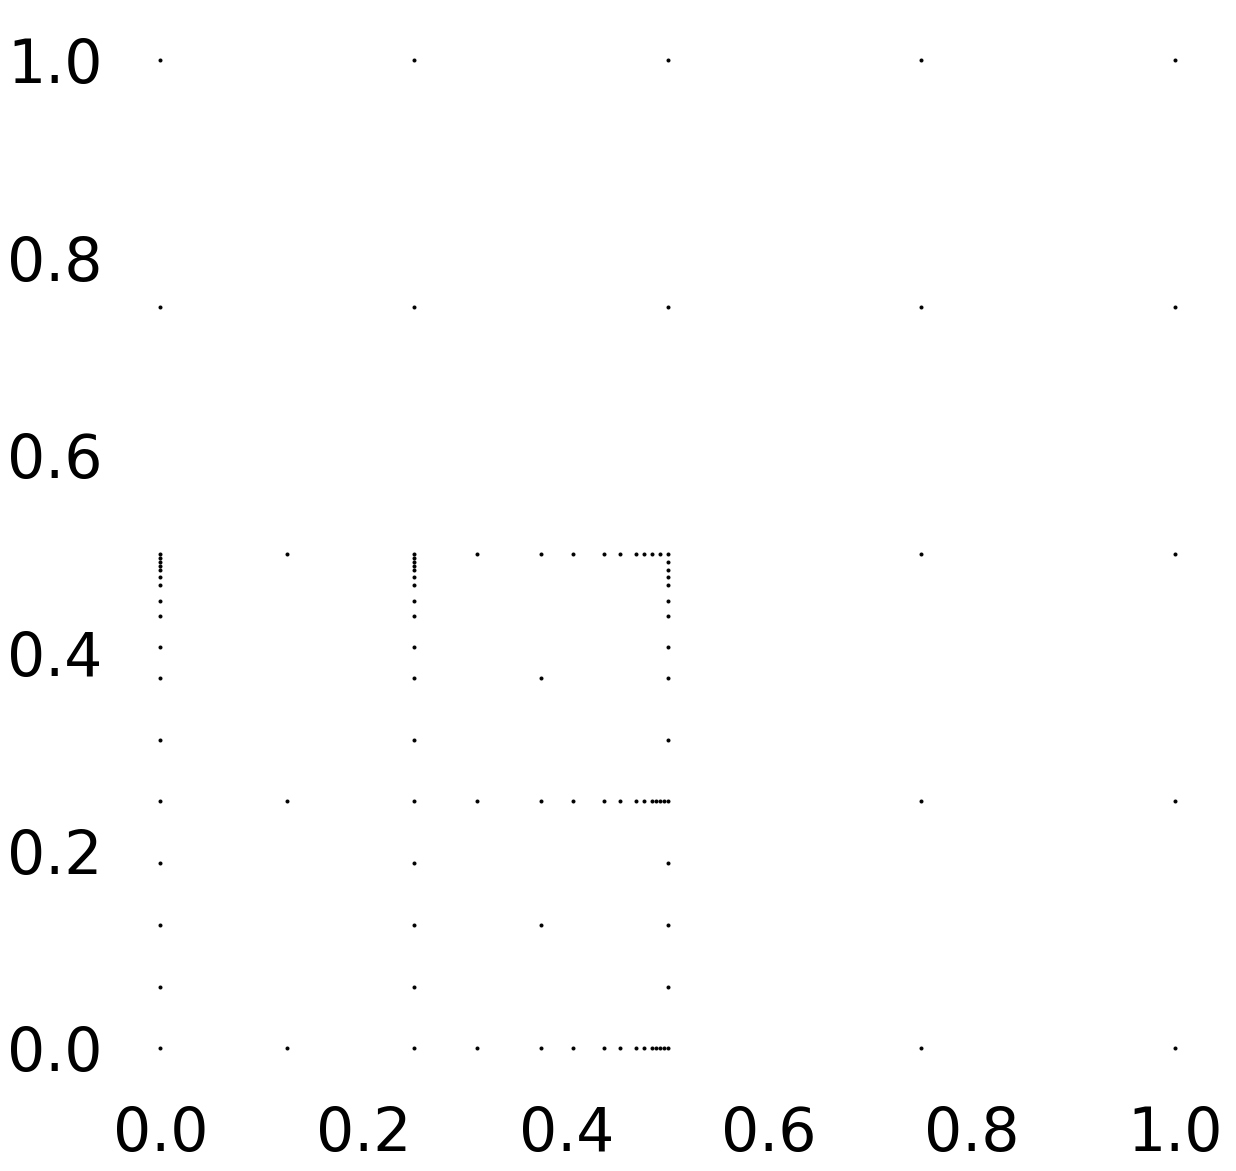

Curent number of function evaluations 105
max surplus error: 1.2298187284821328e-05 total surplus error: 0.12512243190100264
combiintegral: 0.12172849877500515
Current error: 0.021160584031342262
Finished refinement
Refined  6  times
Refinement Graph:


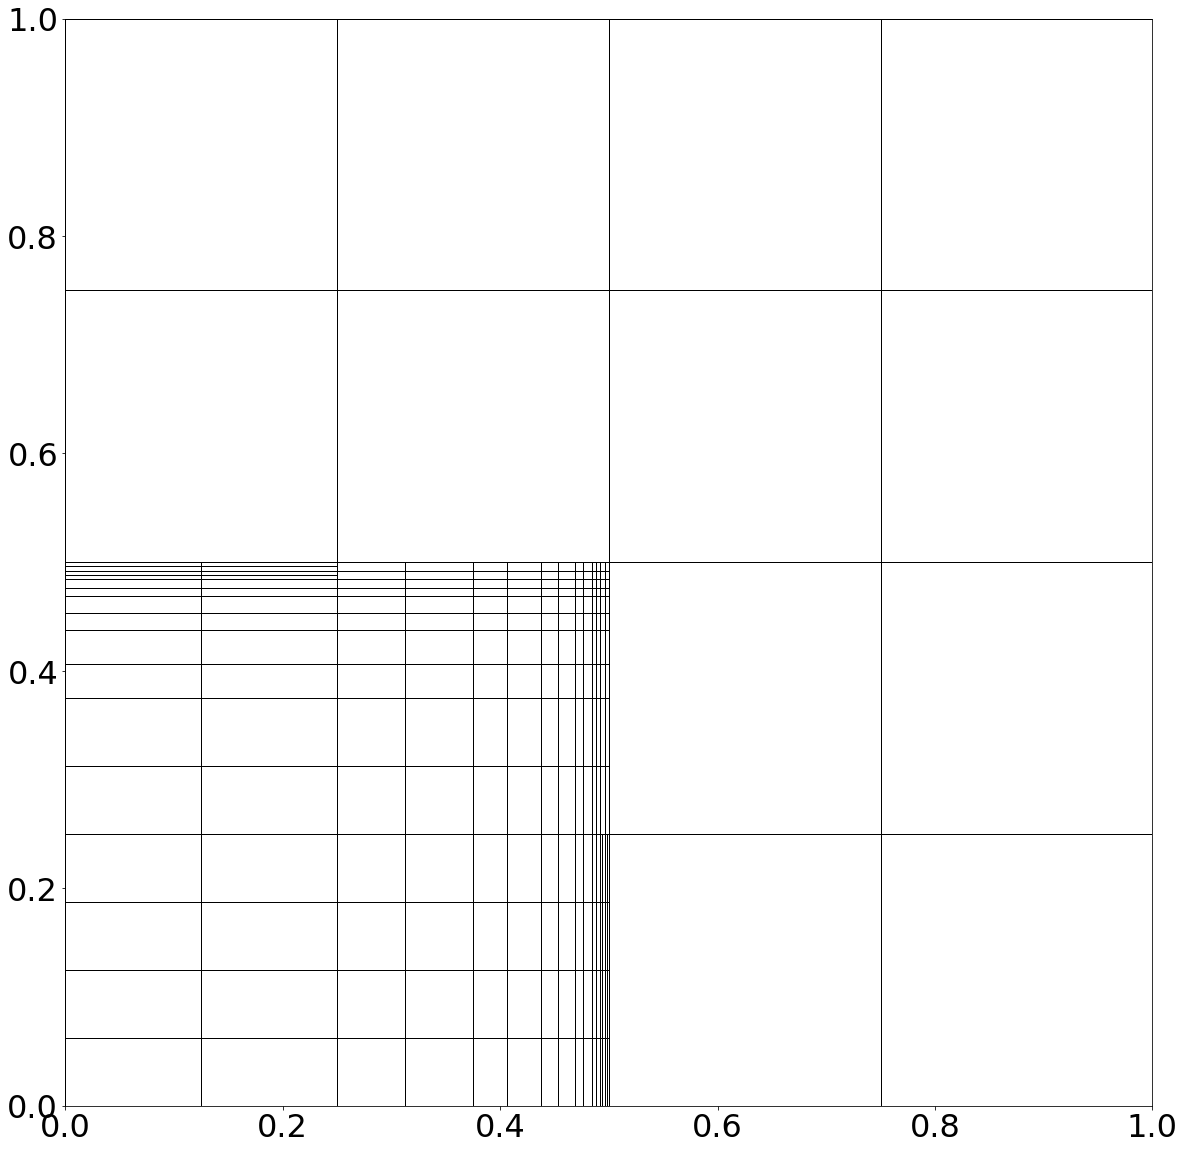

Combi Scheme:


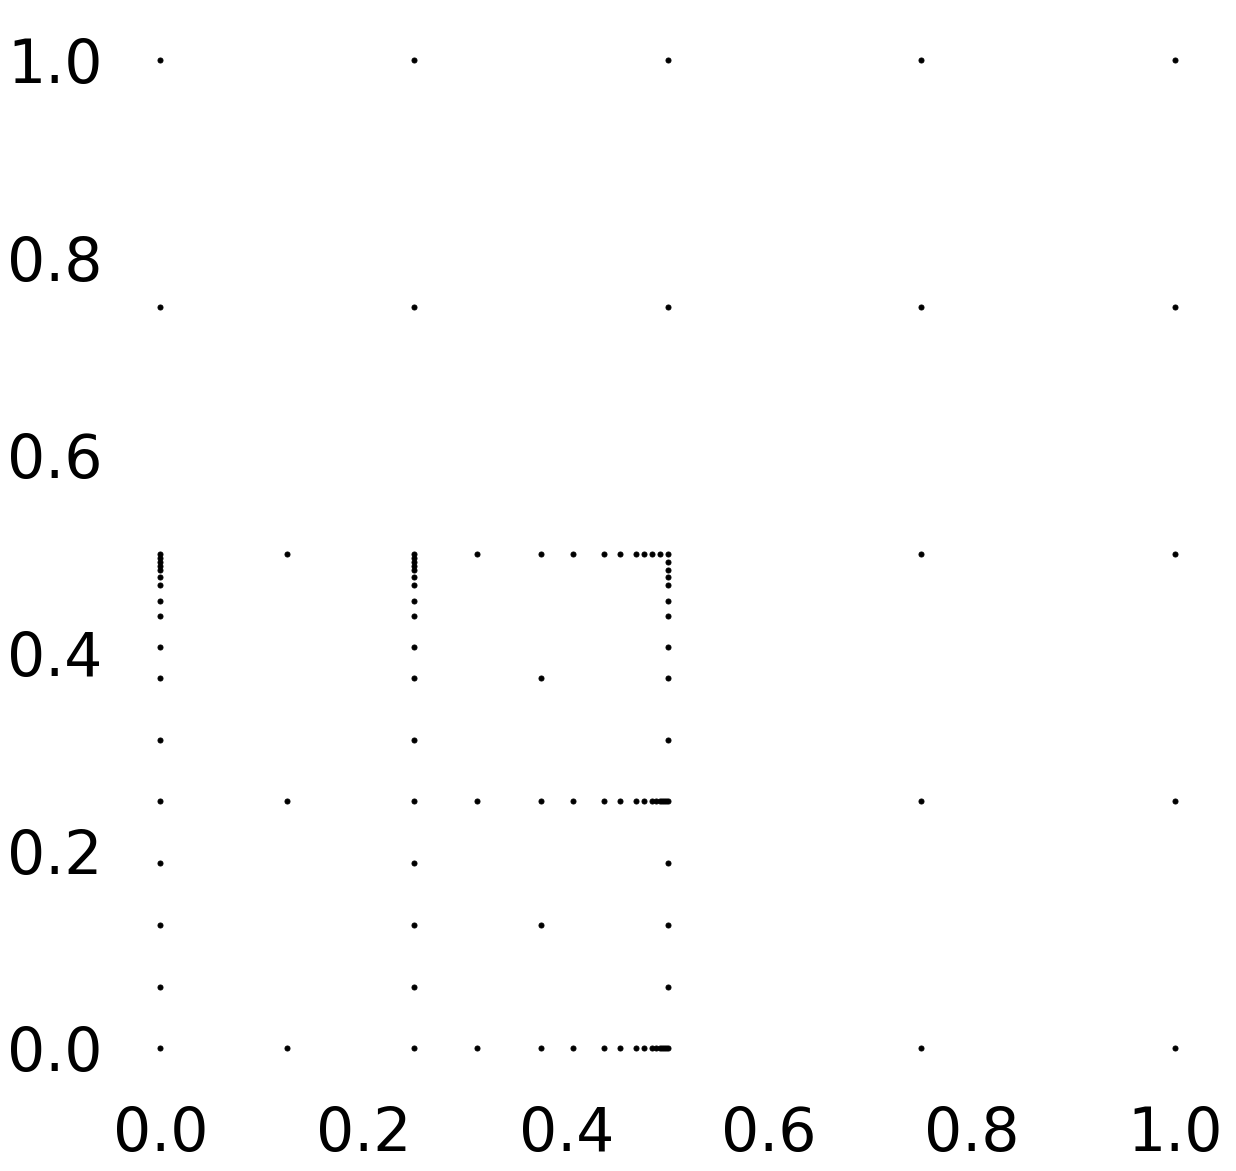

Resulting Sparse Grid:


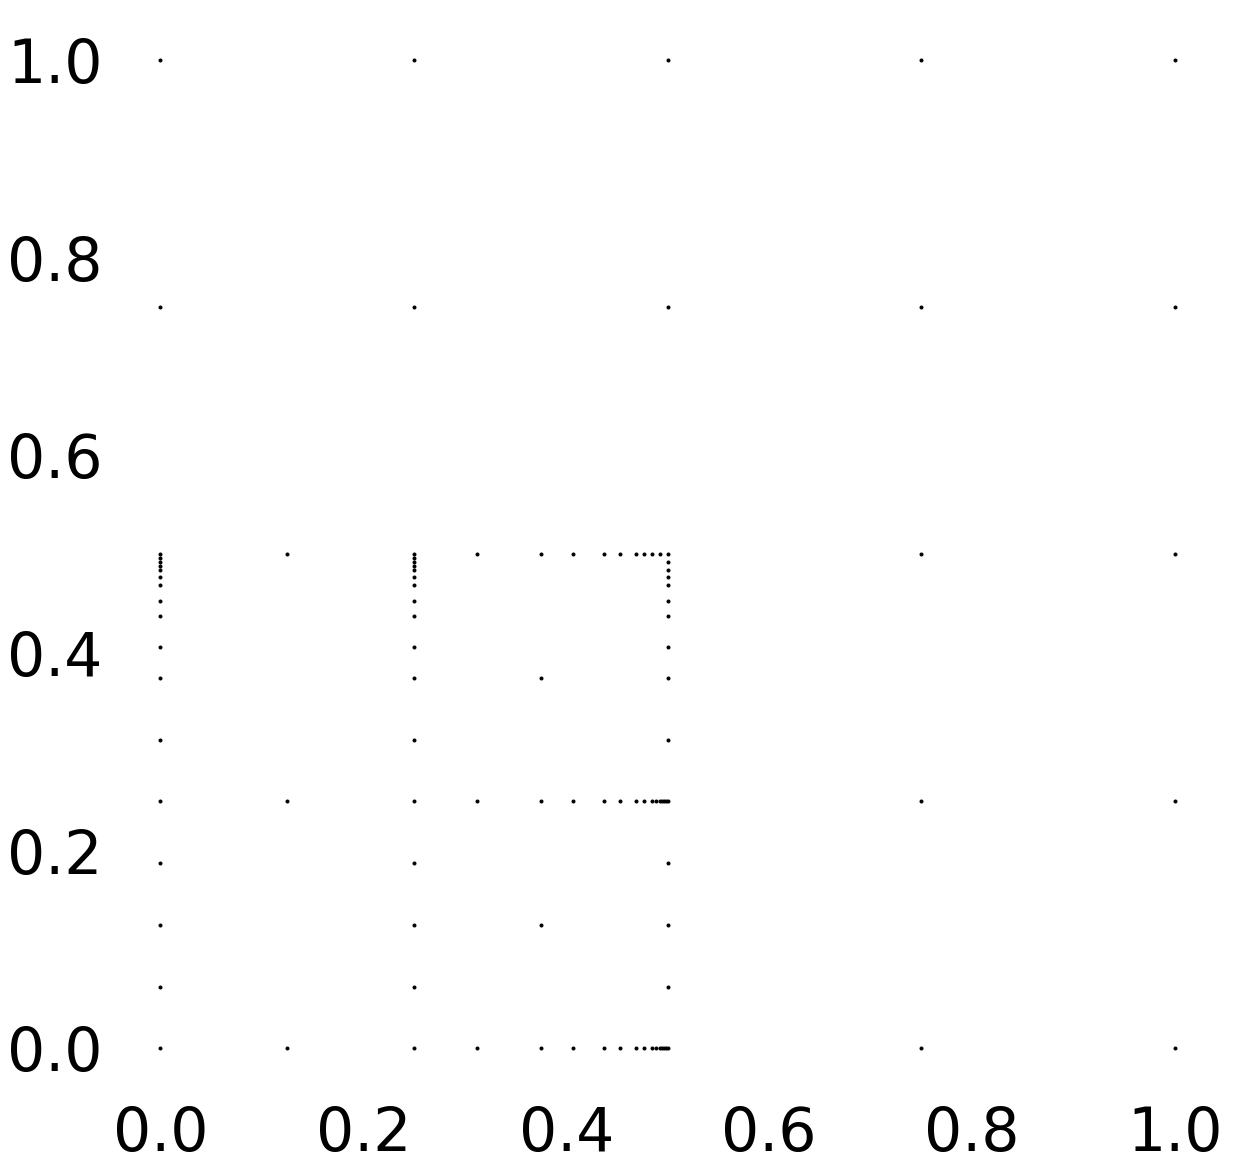

Curent number of function evaluations 109
max surplus error: 1.0830729159121838e-05 total surplus error: 0.1260317104191716
combiintegral: 0.12263777451994624
Current error: 0.013848944209202584
Finished refinement
Refined  4  times
Refinement Graph:


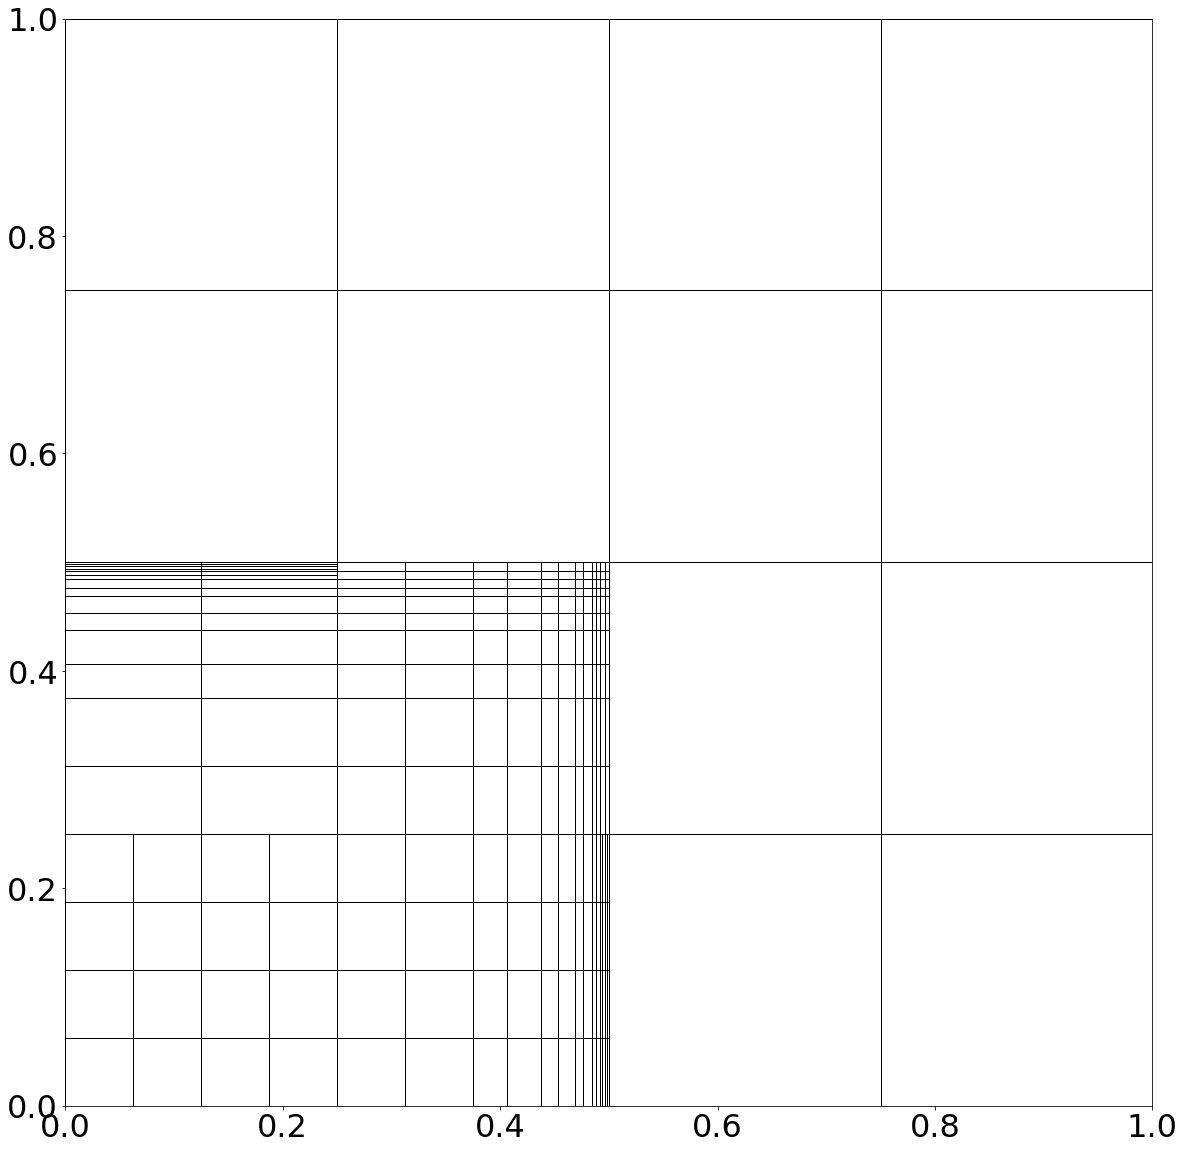

Combi Scheme:


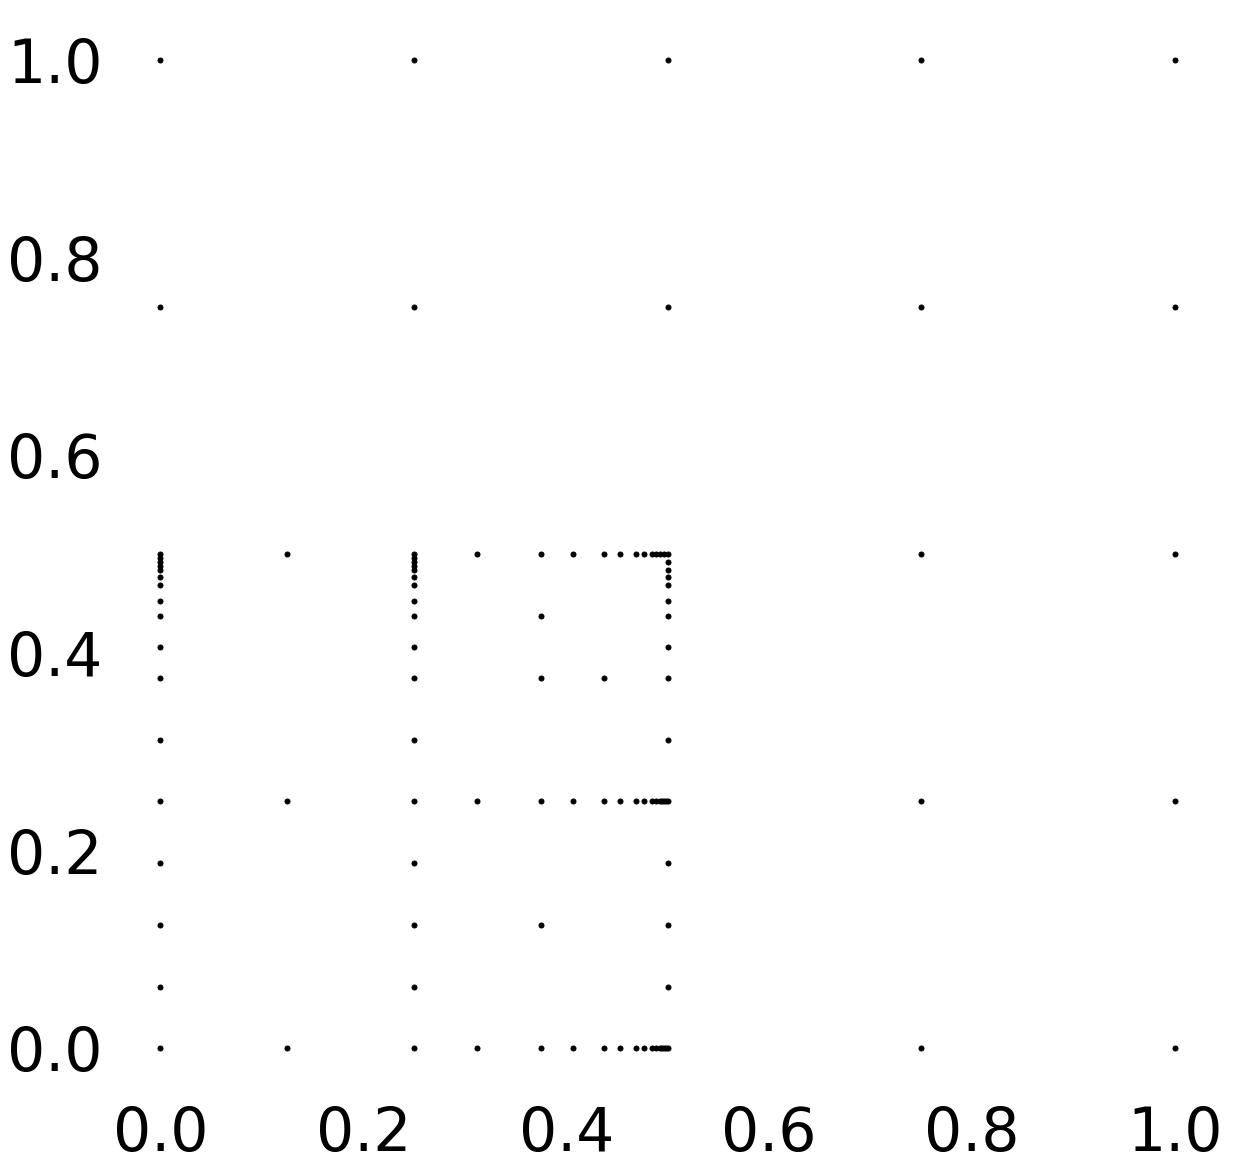

Resulting Sparse Grid:


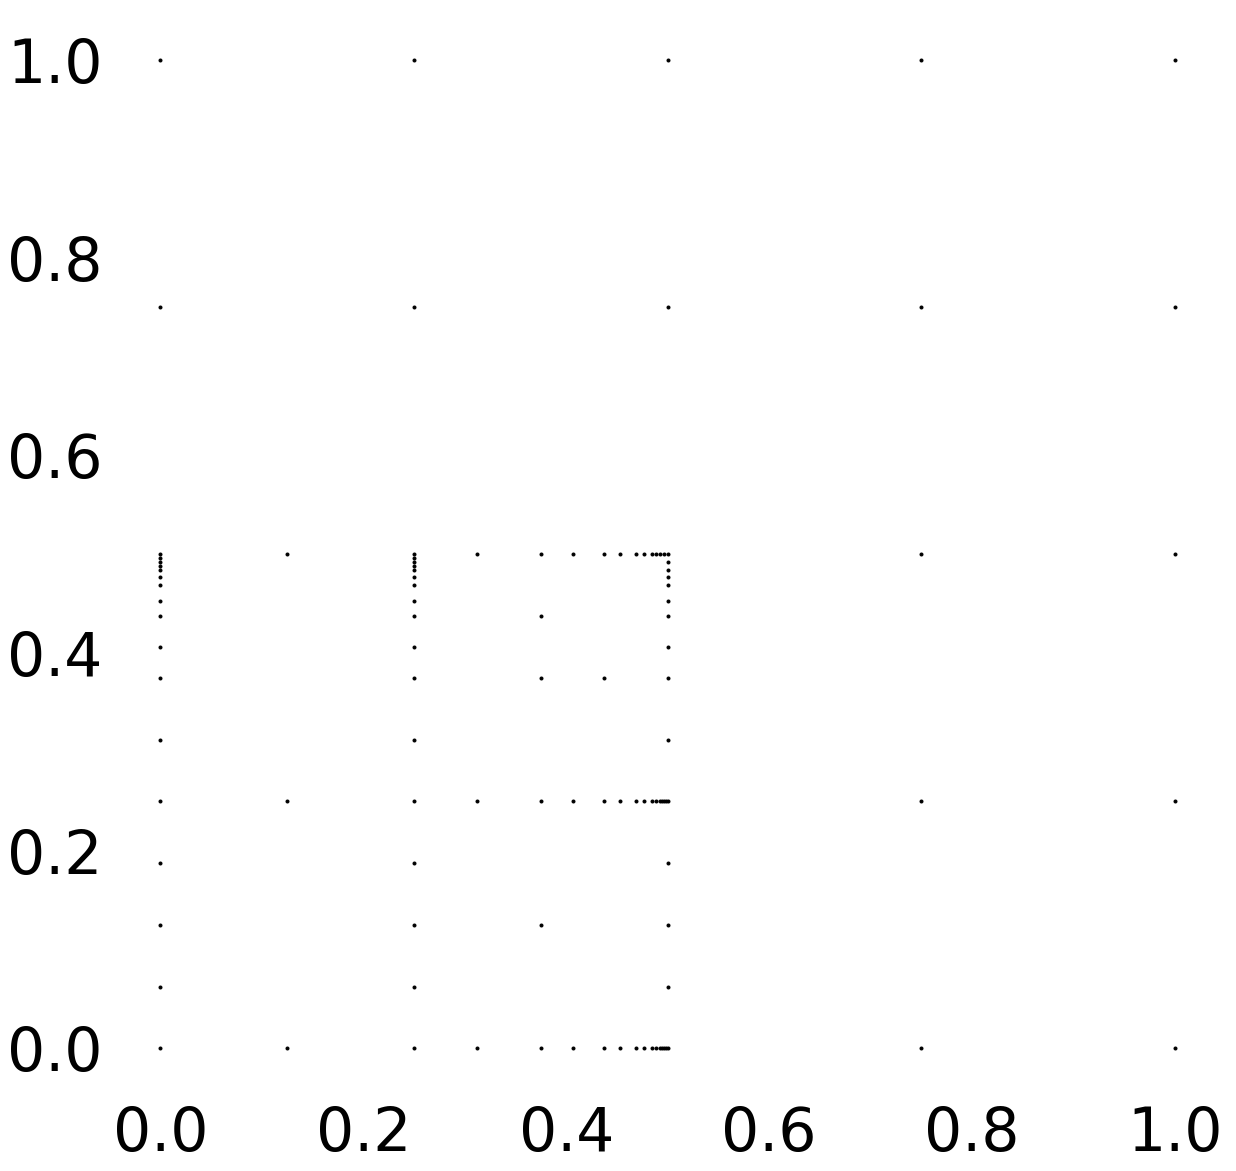

Curent number of function evaluations 118
max surplus error: 8.741264234689122e-06 total surplus error: 0.12615759543147564
combiintegral: 0.1226769266724531
Current error: 0.013534115138940568
Finished refinement
Refined  2  times
Refinement Graph:


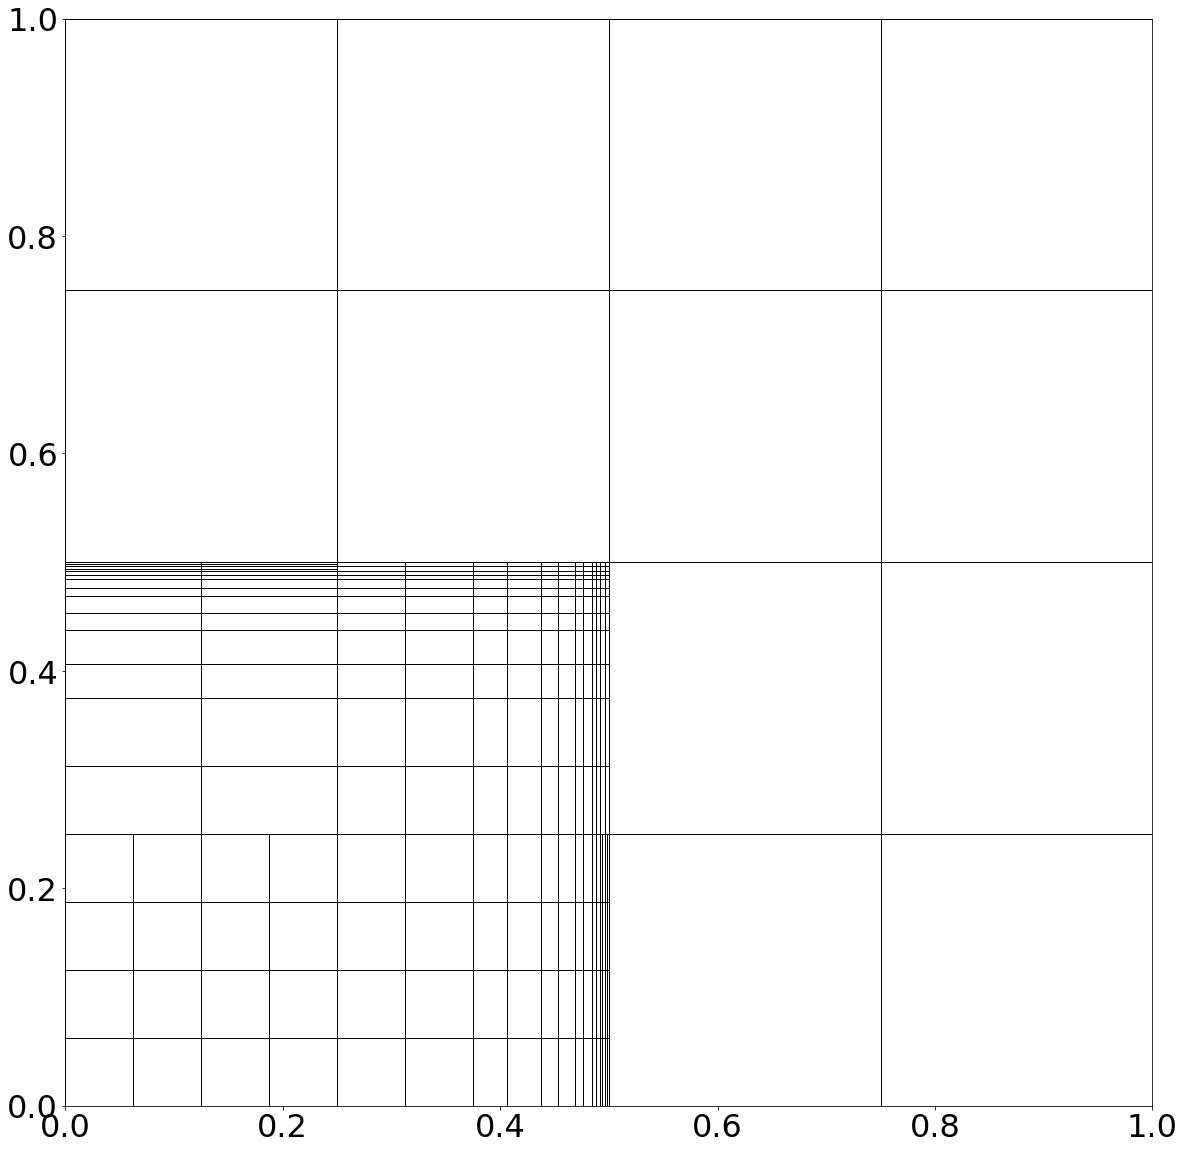

Combi Scheme:


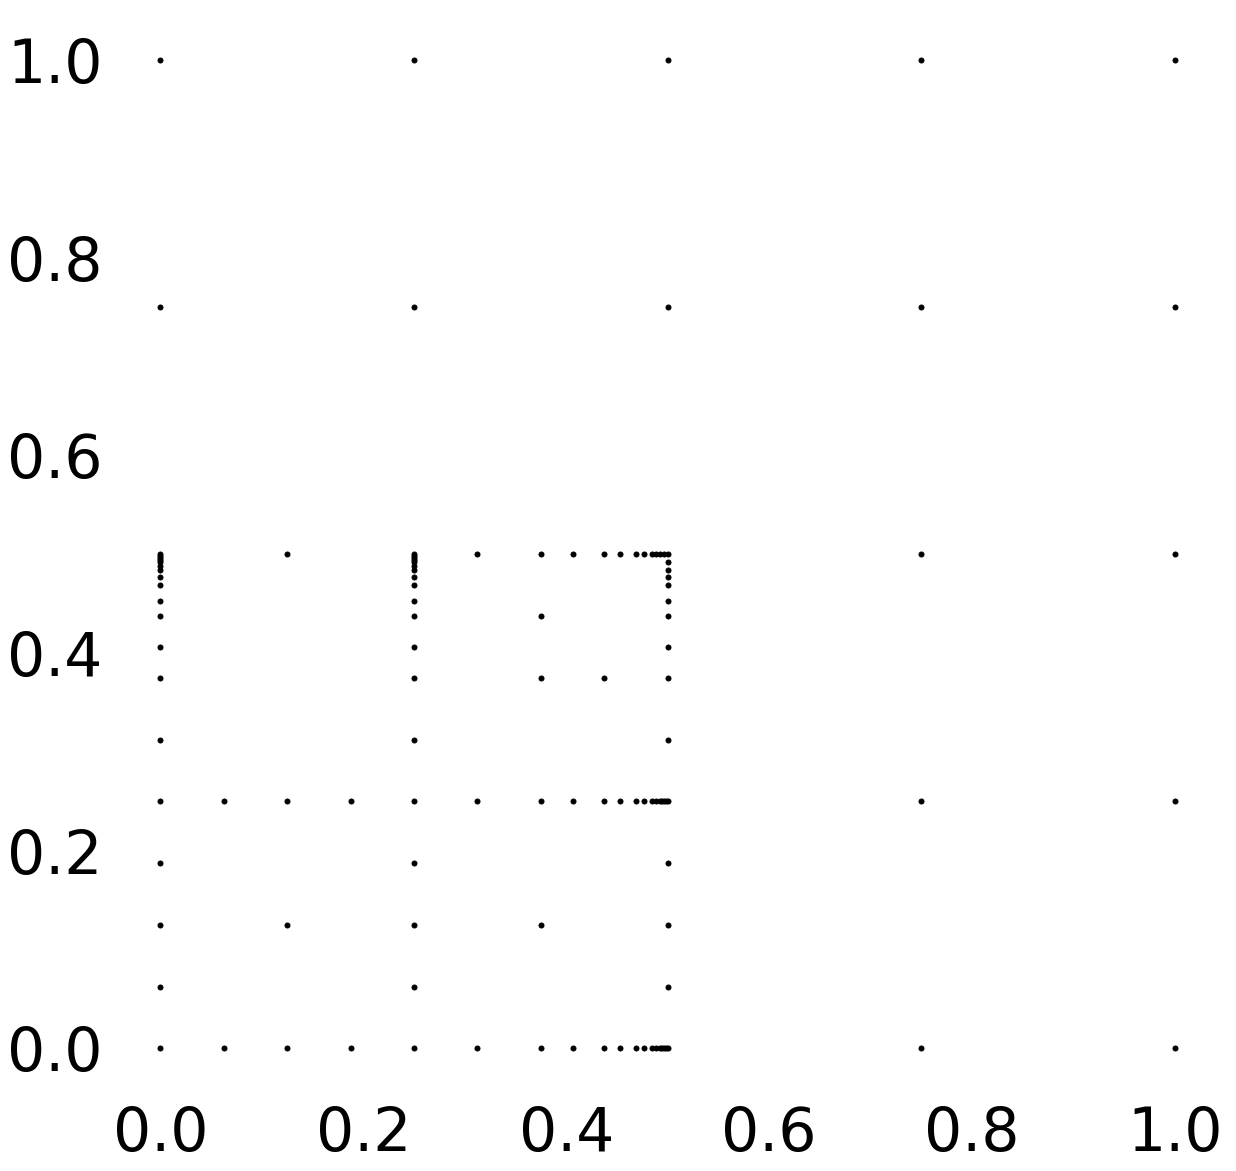

Resulting Sparse Grid:


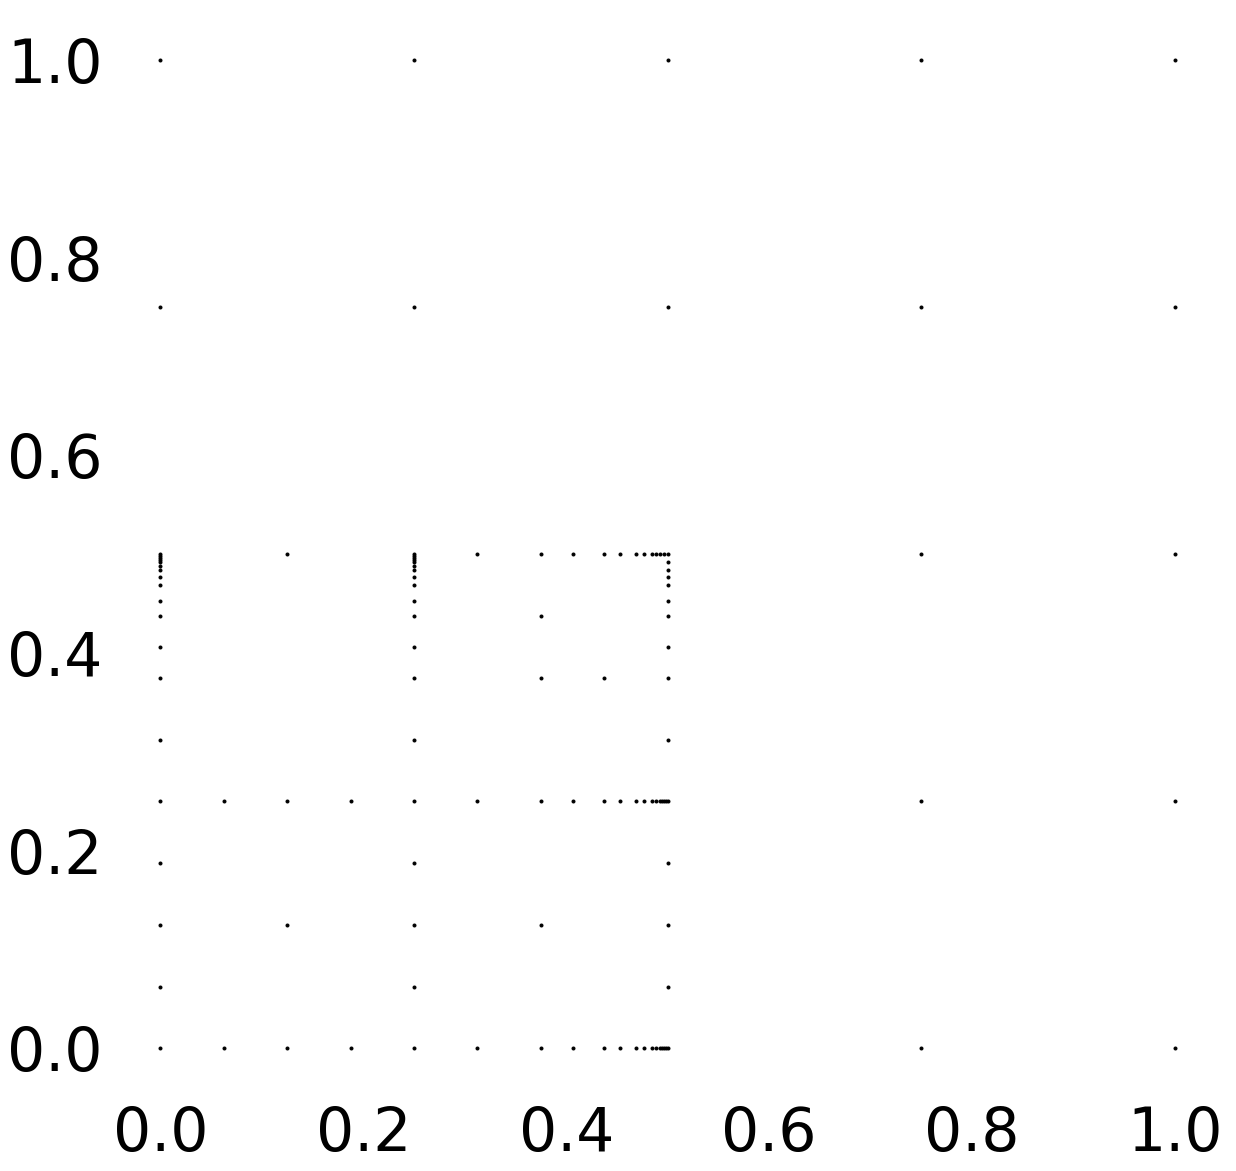

Curent number of function evaluations 120
max surplus error: 7.434130680361398e-06 total surplus error: 0.1262275429594052
combiintegral: 0.12274686545934499
Current error: 0.012971725542389729
Finished refinement
Refined  2  times
Refinement Graph:


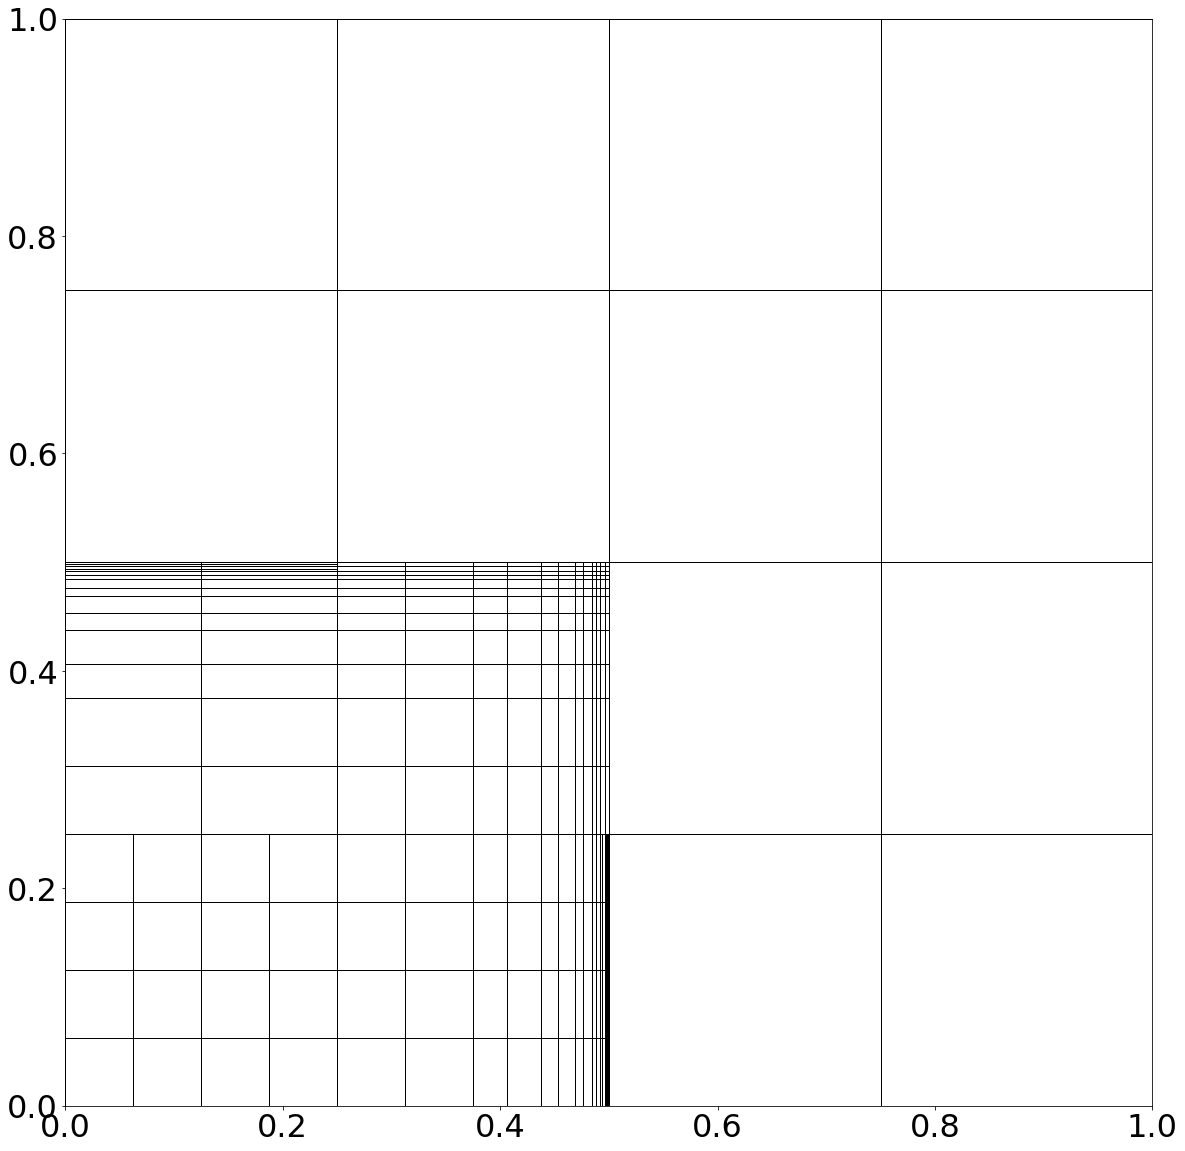

Combi Scheme:


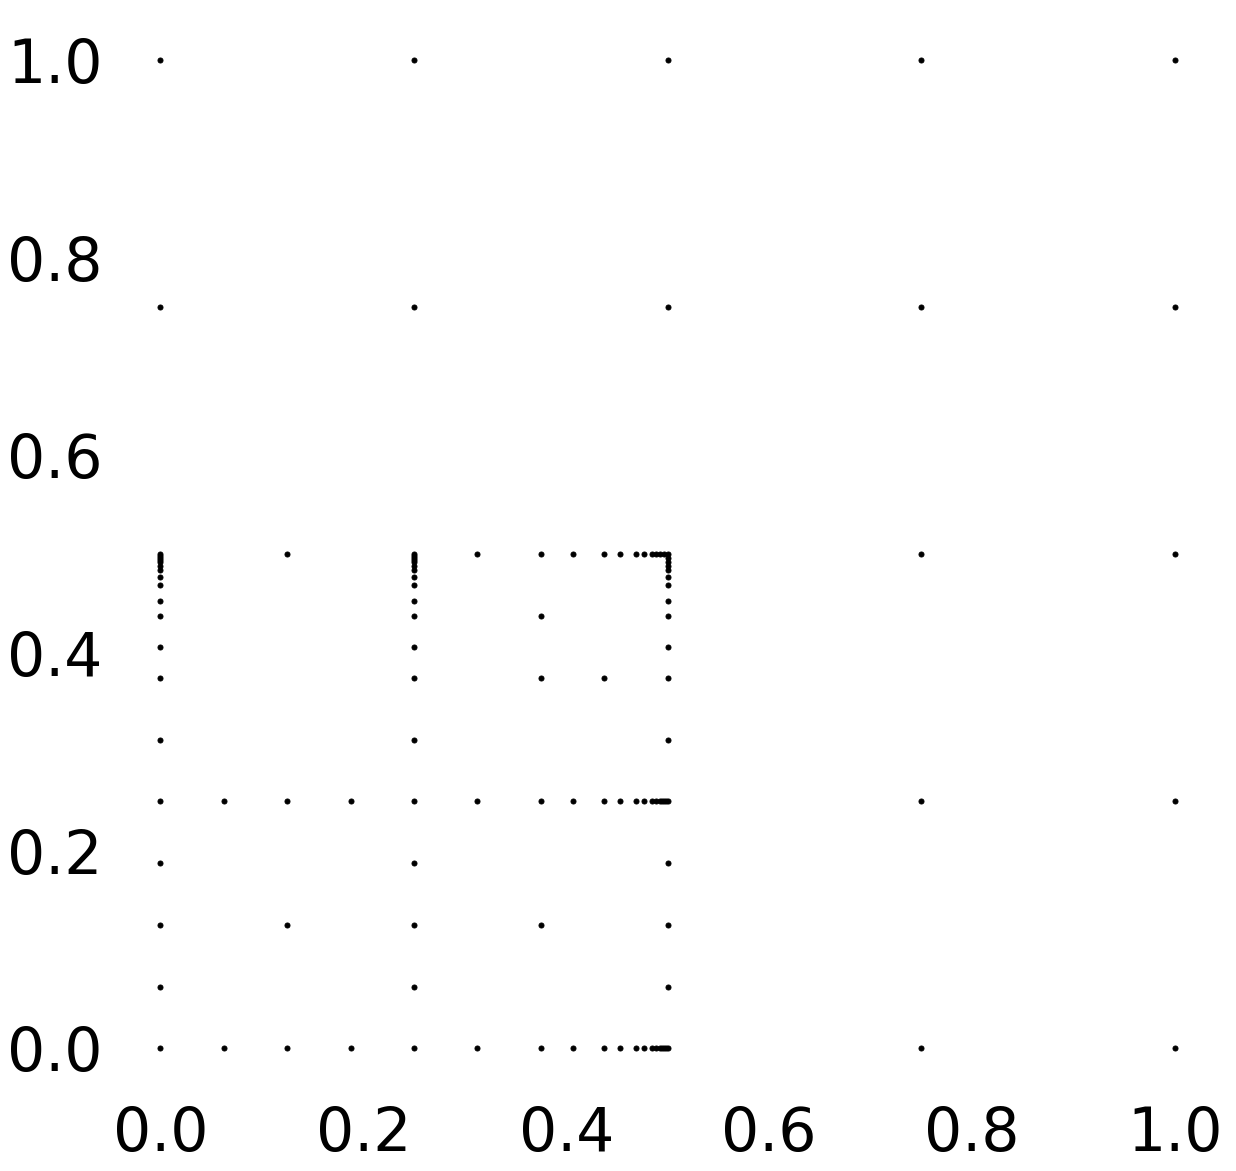

Resulting Sparse Grid:


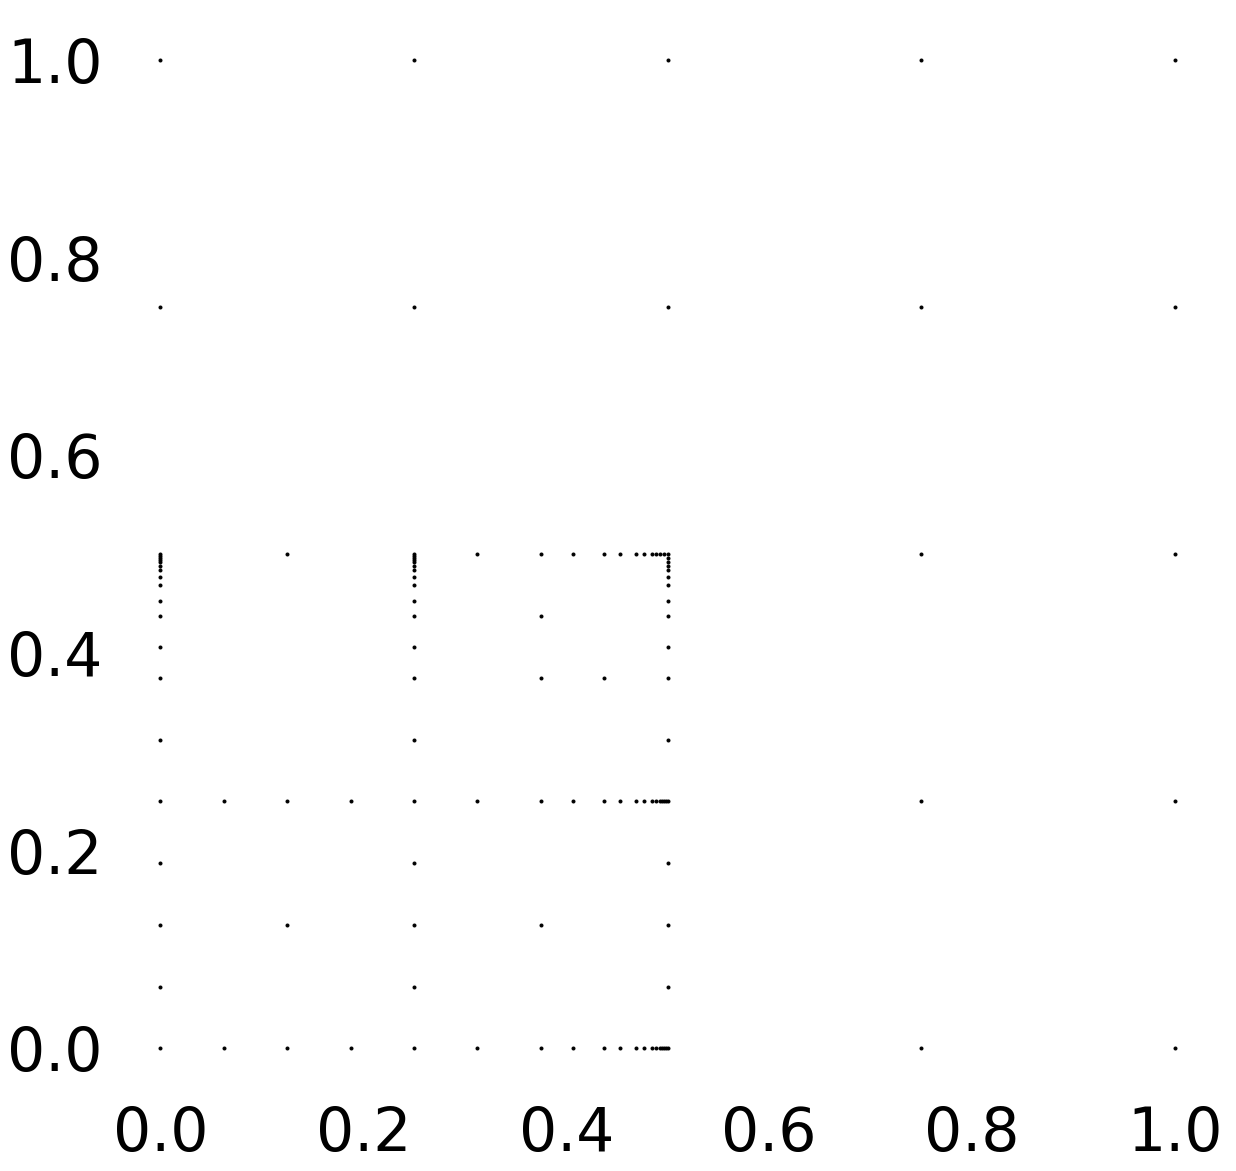

Curent number of function evaluations 124
max surplus error: 6.570091527673461e-06 total surplus error: 0.12628701623227523
combiintegral: 0.12280633861844592
Current error: 0.012493491826324876
Finished refinement
Refined  10  times
Refinement Graph:


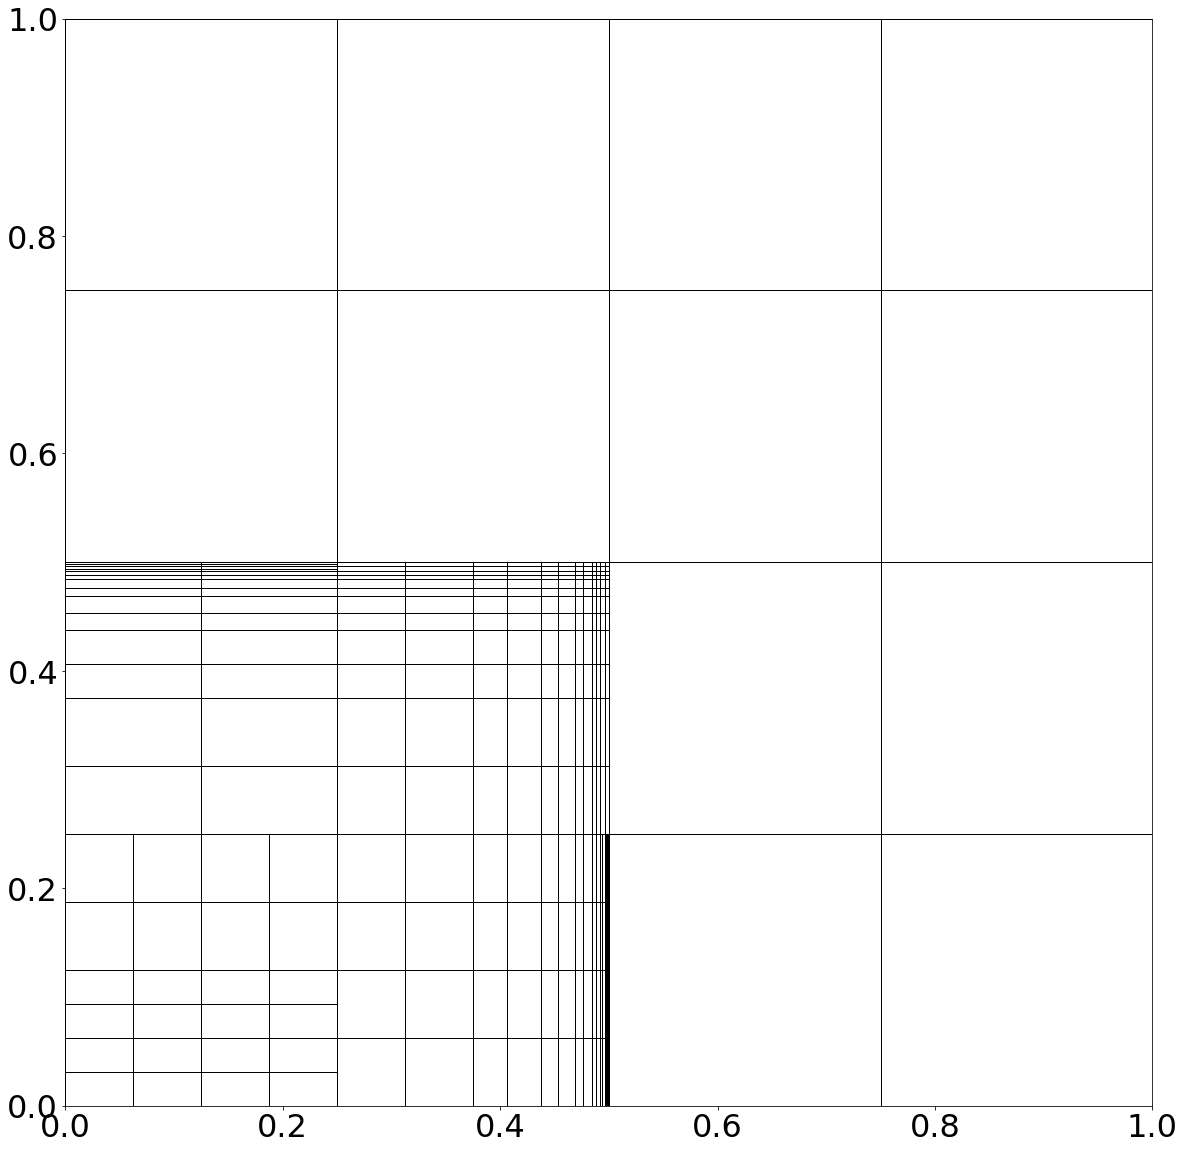

Combi Scheme:


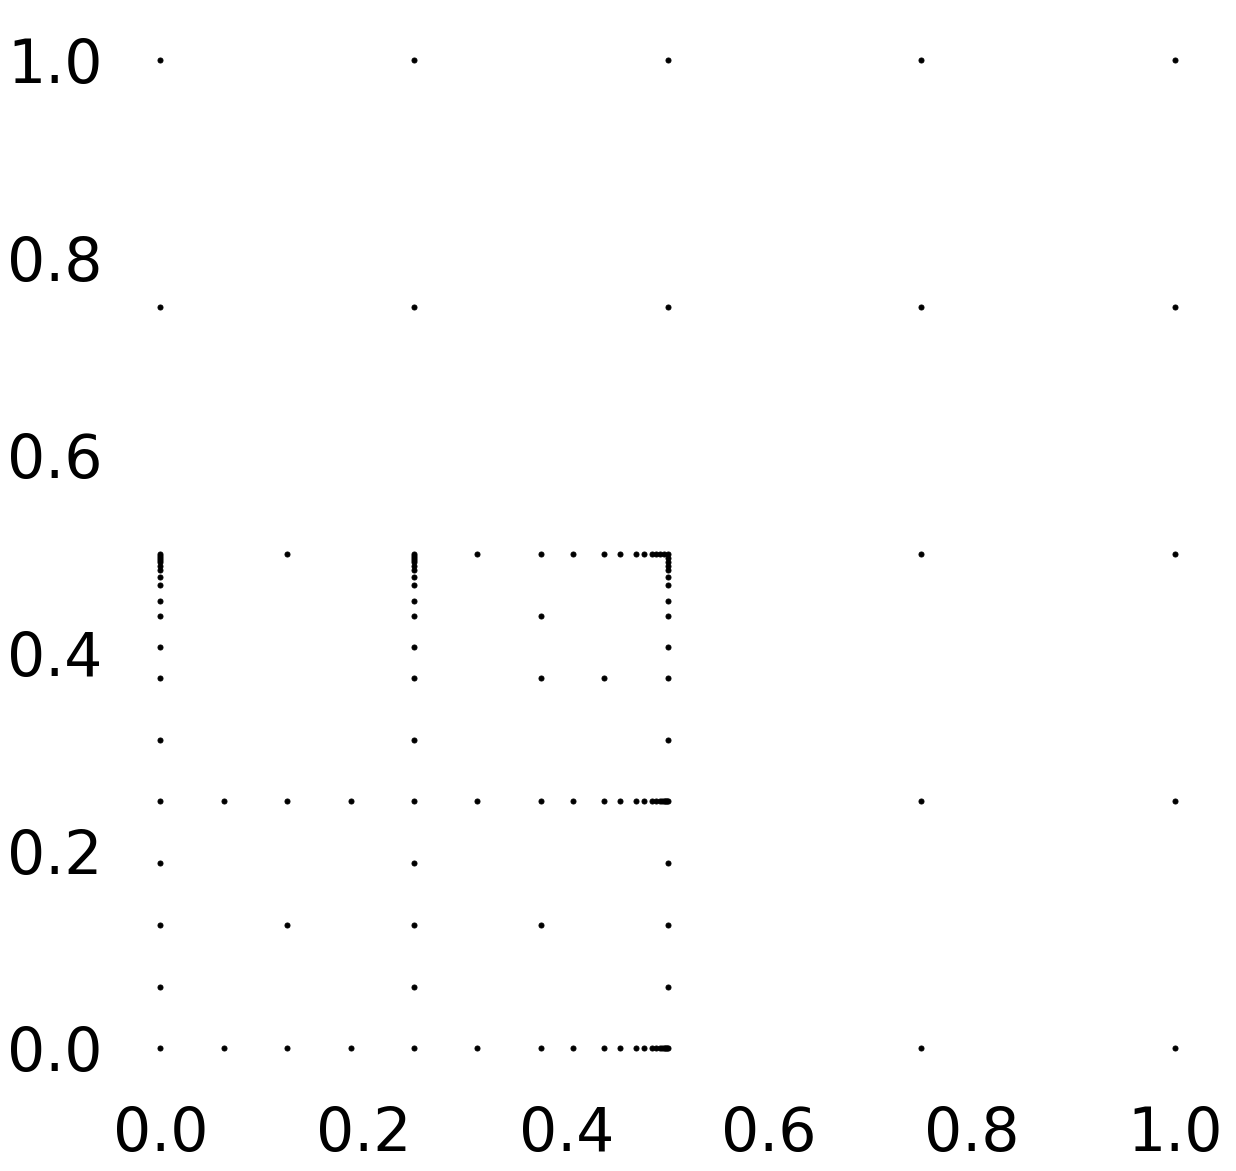

Resulting Sparse Grid:


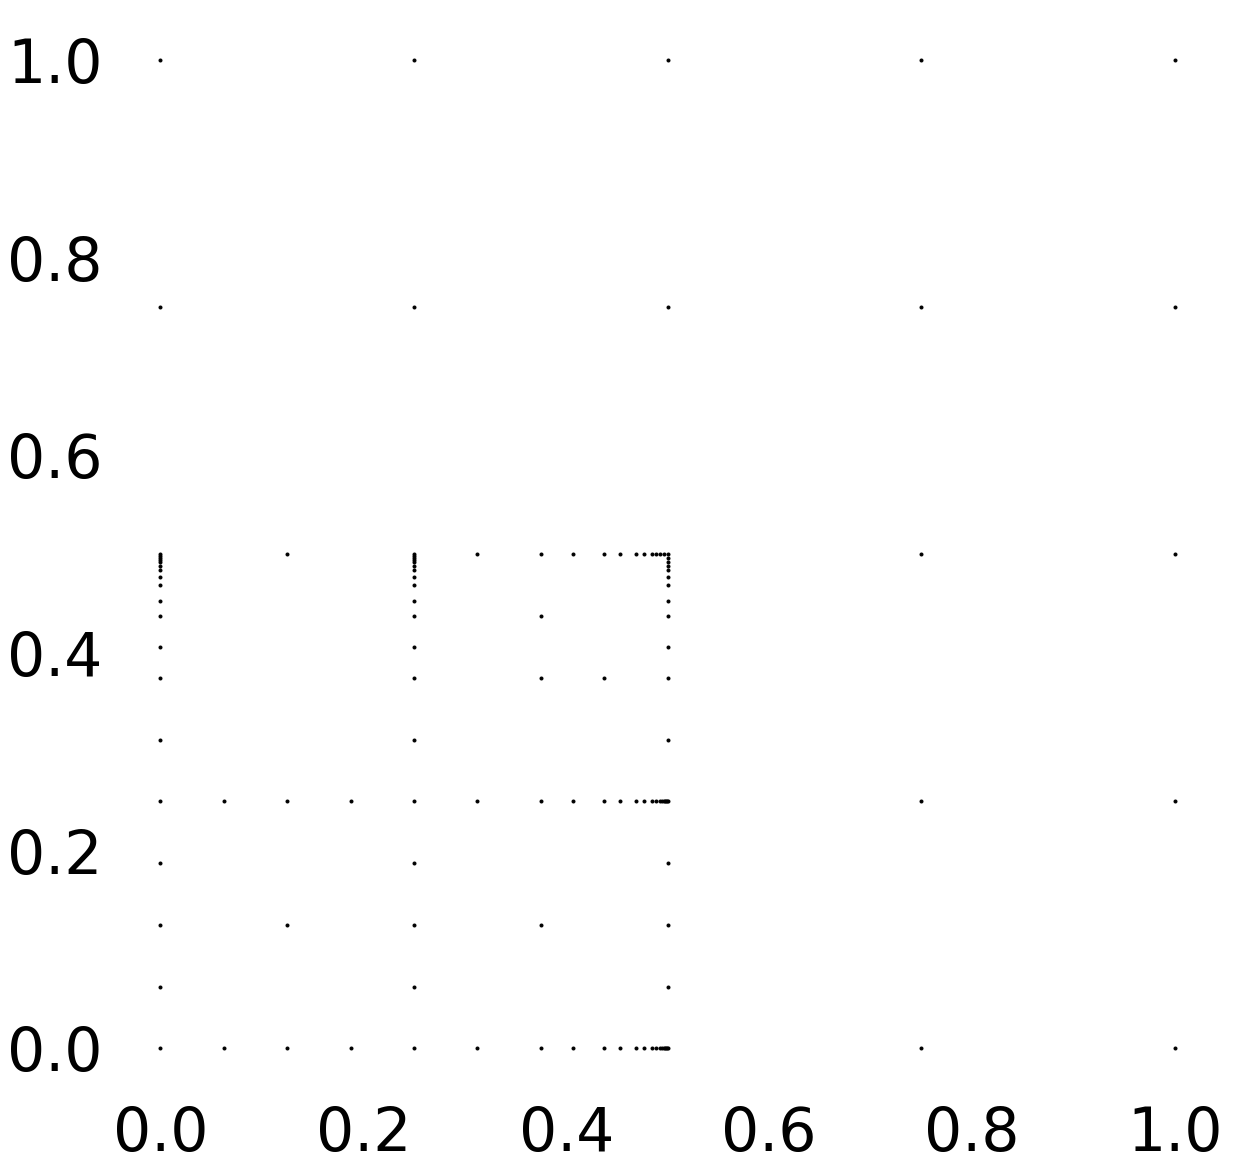

Curent number of function evaluations 131
max surplus error: 5.613308804310263e-06 total surplus error: 0.12693743883813713
combiintegral: 0.12340874592794163
Current error: 0.007649432917063901
Number of refinements 70
Number of distinct points used during the refinement 131
Time used (s): 17.33939838409424
Final error: 0.007649432917063901
Number of points used in refinement: 131


In [1]:
%matplotlib inline
from sys import path
path.append('../src/')
import numpy as np
from spatiallyAdaptiveCell import *
from Function import *
from ErrorCalculator import *

#dimension of the problem
dim = 2

# define integration domain boundaries
a = np.zeros(dim)
b = np.ones(dim)

# define function to be integrated
midpoint = np.ones(dim) * 0.5
coefficients = np.array([ 10**0 * (d+1) for d in range(dim)])
f = GenzDiscontinious(border=midpoint,coeffs=coefficients)
# plot function
f.plot(np.ones(dim)*a,np.ones(dim)*b)

# reference integral solution for calculating errors
reference_solution = f.getAnalyticSolutionIntegral(a,b)

# define error estimator for refinement
errorOperator=ErrorCalculatorSurplusCell()

# define equidistant grid
grid=TrapezoidalGrid(a=a, b=b)

# NEW! define operation which shall be performed in the combination technique
from GridOperation import *
operation = Integration(f=f, grid=grid, dim=dim, reference_solution = reference_solution)

# define Cell refinement strategy for Spatially Adaptive Combination Technique
adaptiveCombiInstanceCell = SpatiallyAdaptiveCellScheme(a, b, operation=operation)

# the cell method does not have component grids and therefore the sparse grid is printed twice per iteration!
# performing the spatially adaptive refinement with the Cell method
adaptiveCombiInstanceCell.performSpatiallyAdaptiv(2, 2, errorOperator, 10**-2, do_plot=True)

print("Number of points used in refinement:", adaptiveCombiInstanceCell.get_total_num_points())

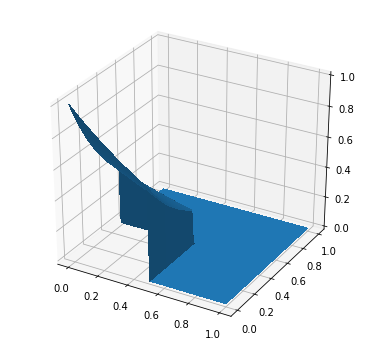

Reference solution: 0.12436002963217704
0 [1, 2] 1.0
1 [2, 1] 1.0
2 [1, 1] -1.0
Curent number of function evaluations 21
max surplus error: 0.004963526896750302 total surplus error: 0.039708215174002415
combiintegral: 0.08658321517400241
Current error: 0.3037697447476341
Finished refinement
Refined  1  times
Refinement Graph:


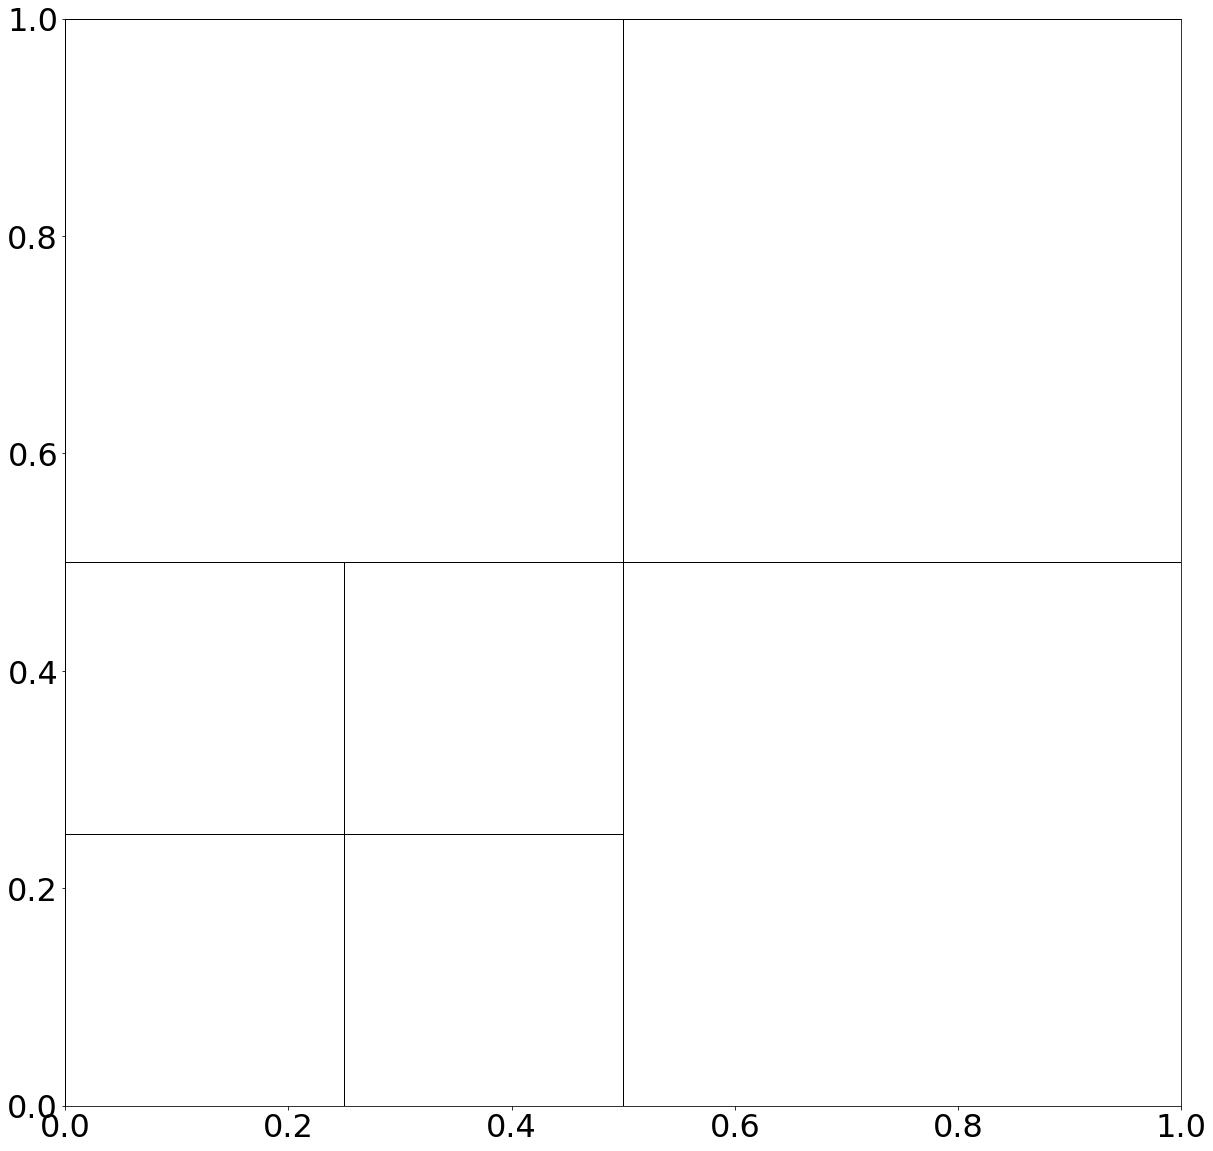

Combi Scheme:


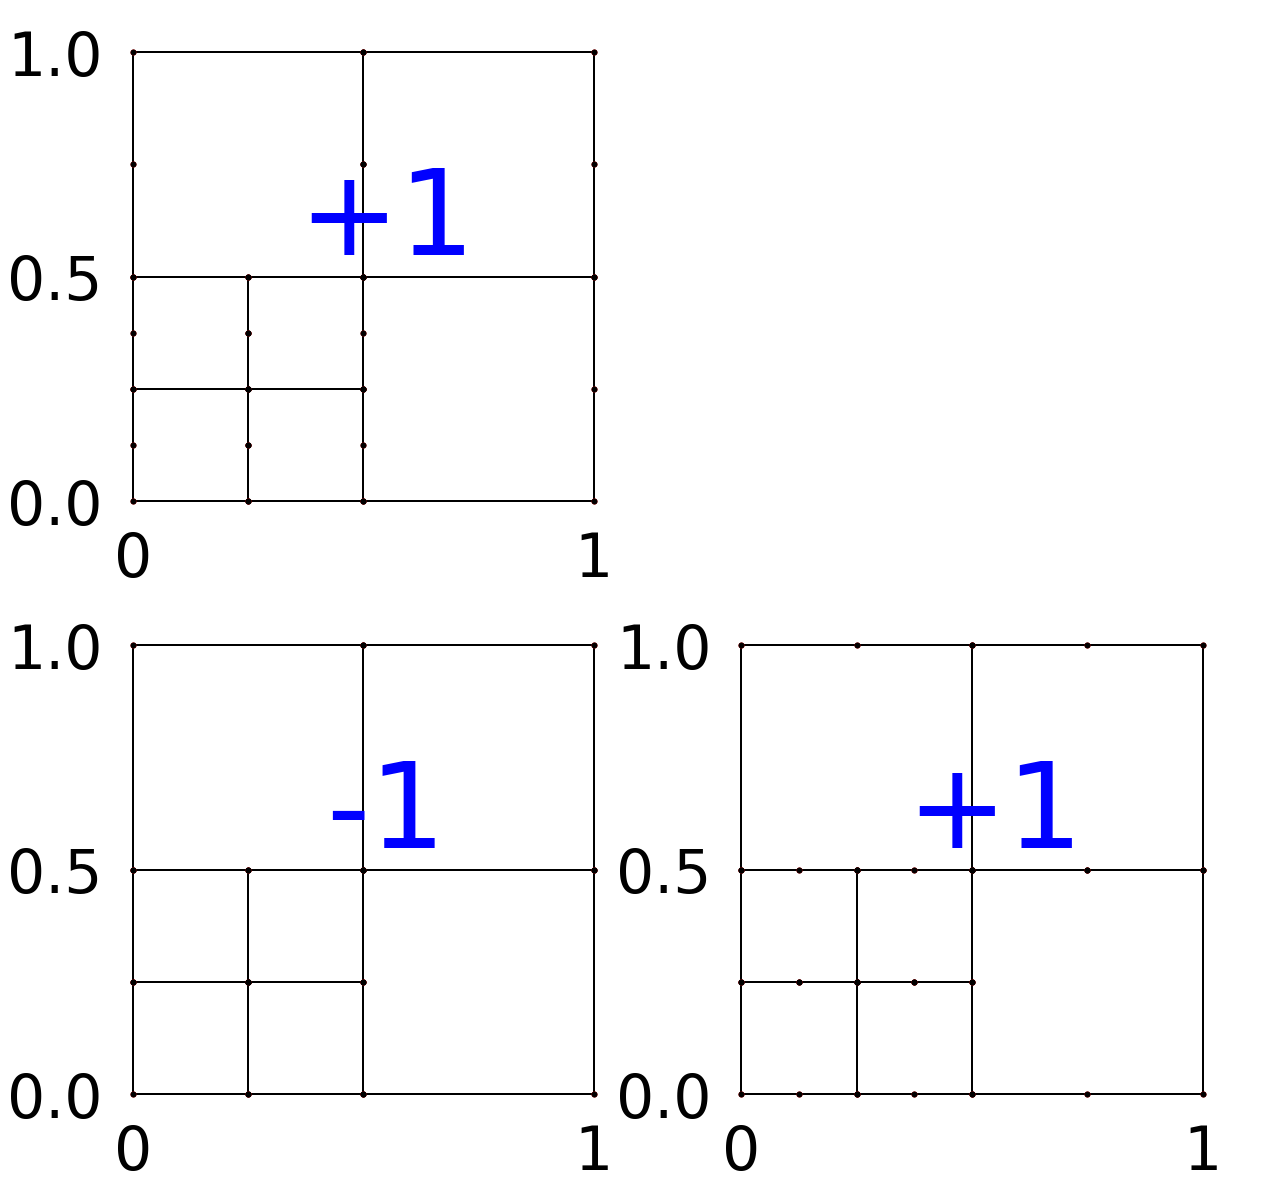

Resulting Sparse Grid:


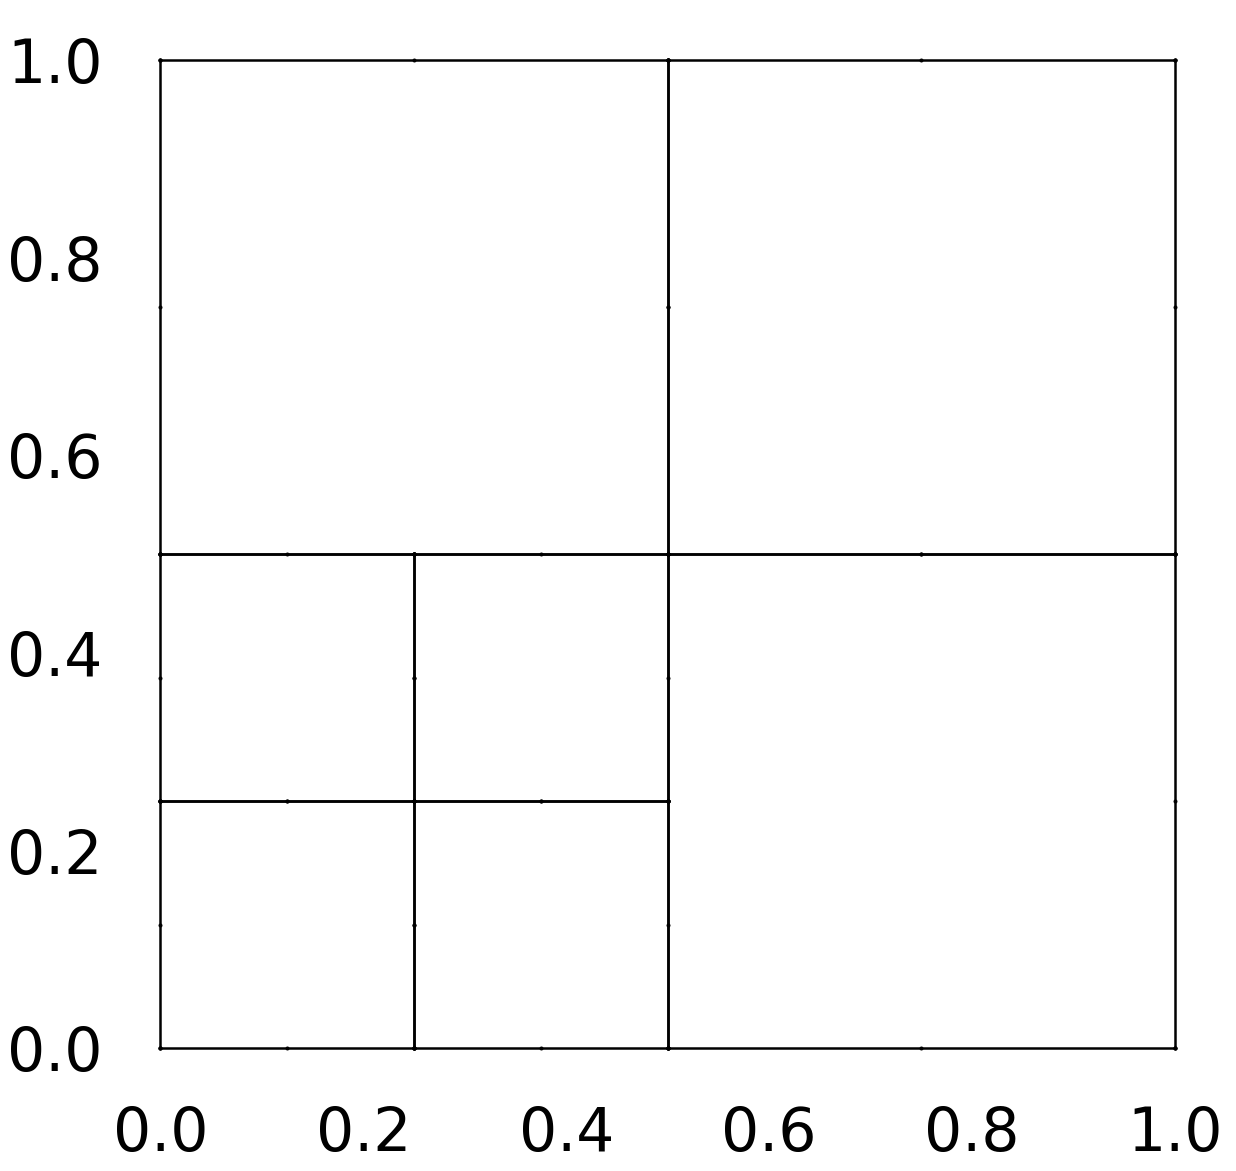

Curent number of function evaluations 34
max surplus error: 0.0006681166786287726 total surplus error: 0.010664212887372659
combiintegral: 0.10428157211486151
Current error: 0.161454267715295
Finished refinement
Refined  1  times
Refinement Graph:


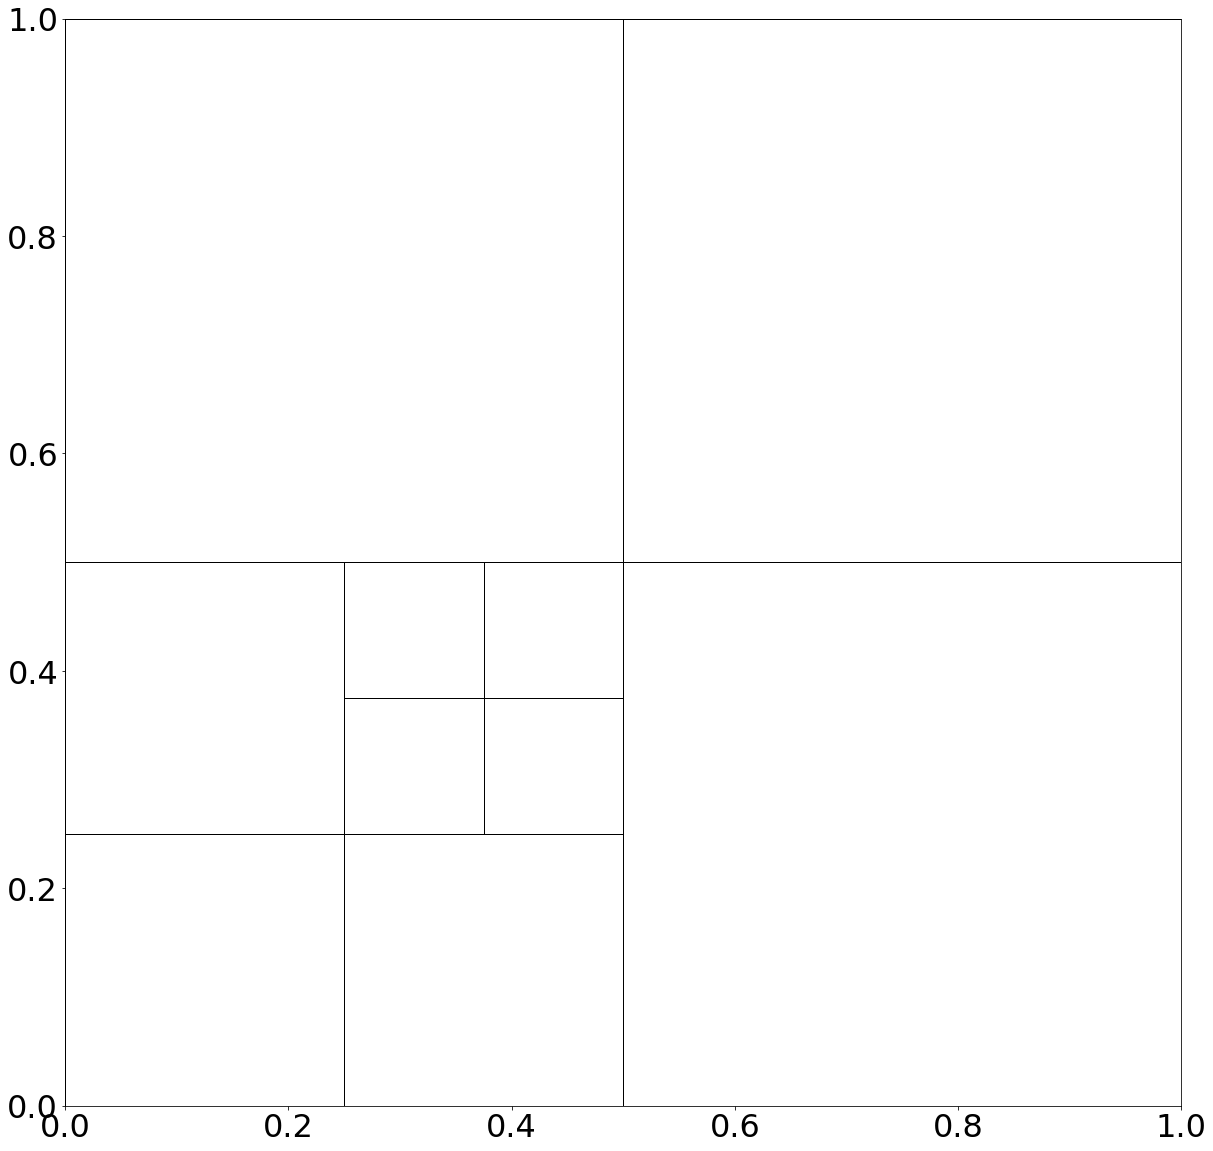

Combi Scheme:


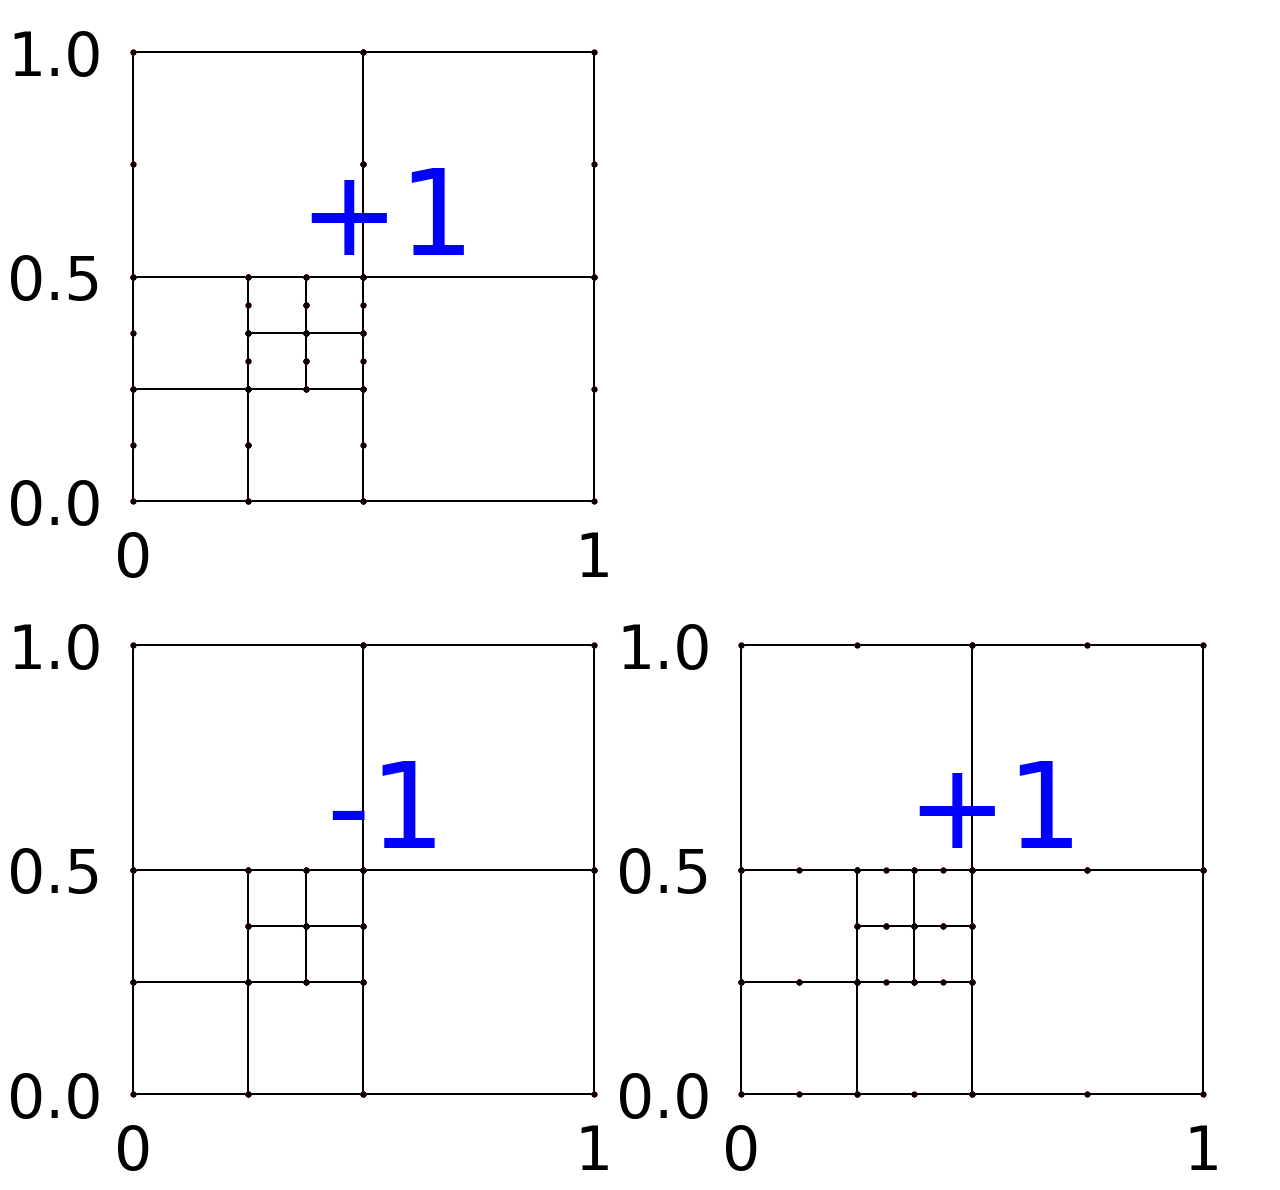

Resulting Sparse Grid:


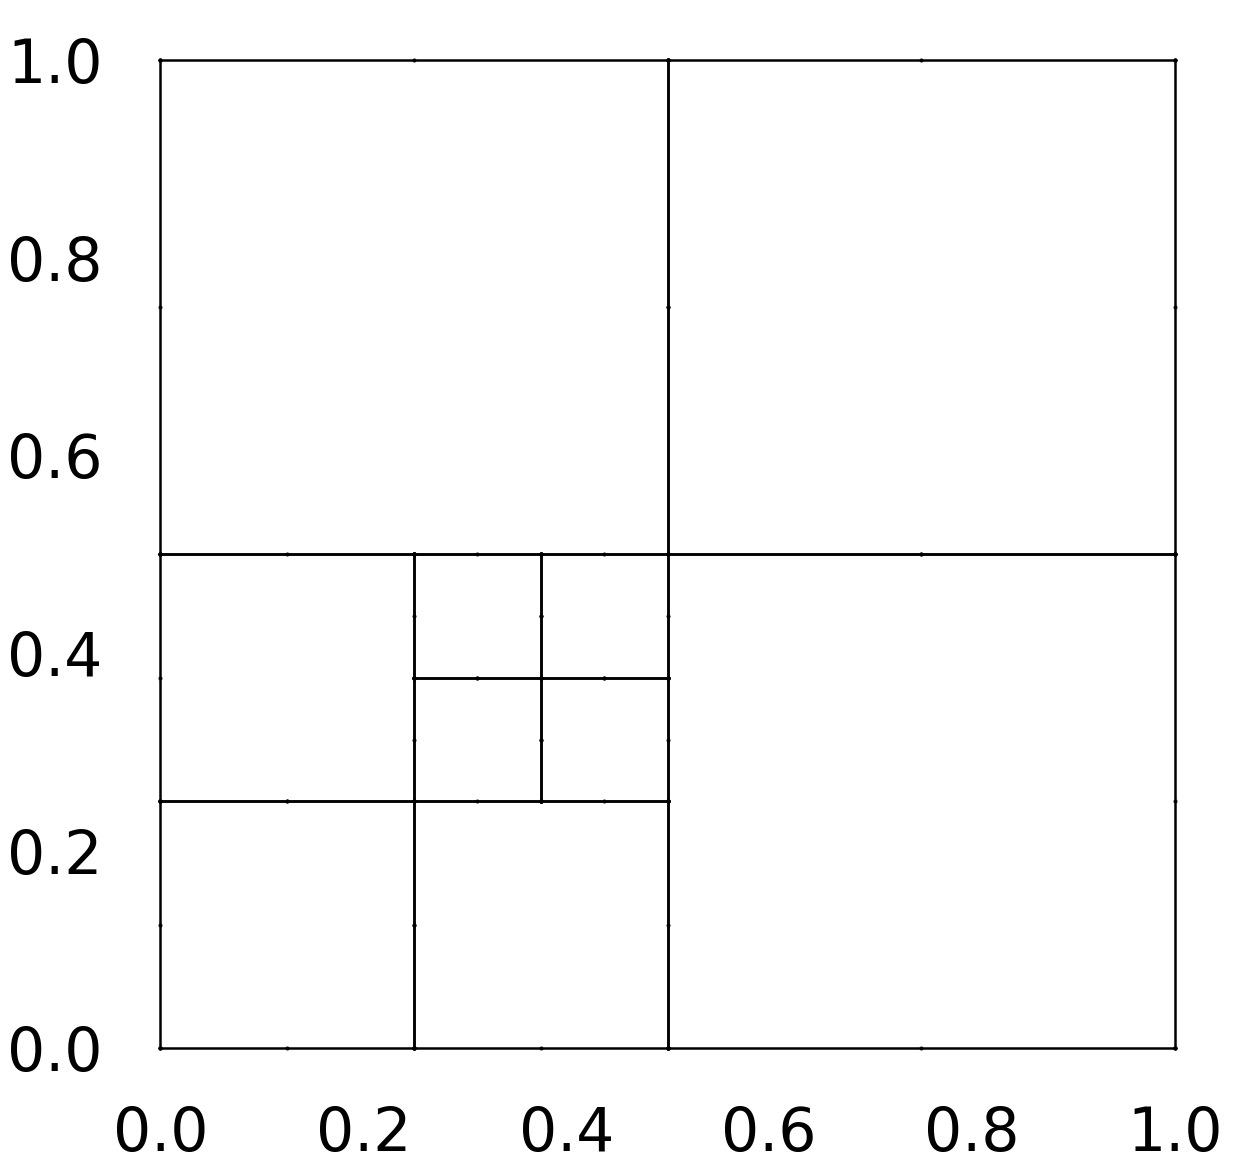

Curent number of function evaluations 47
max surplus error: 0.0003172775449339464 total surplus error: 0.00834091229738367
combiintegral: 0.10837460765796411
Current error: 0.12854147768775417
Finished refinement
Refined  2  times
Refinement Graph:


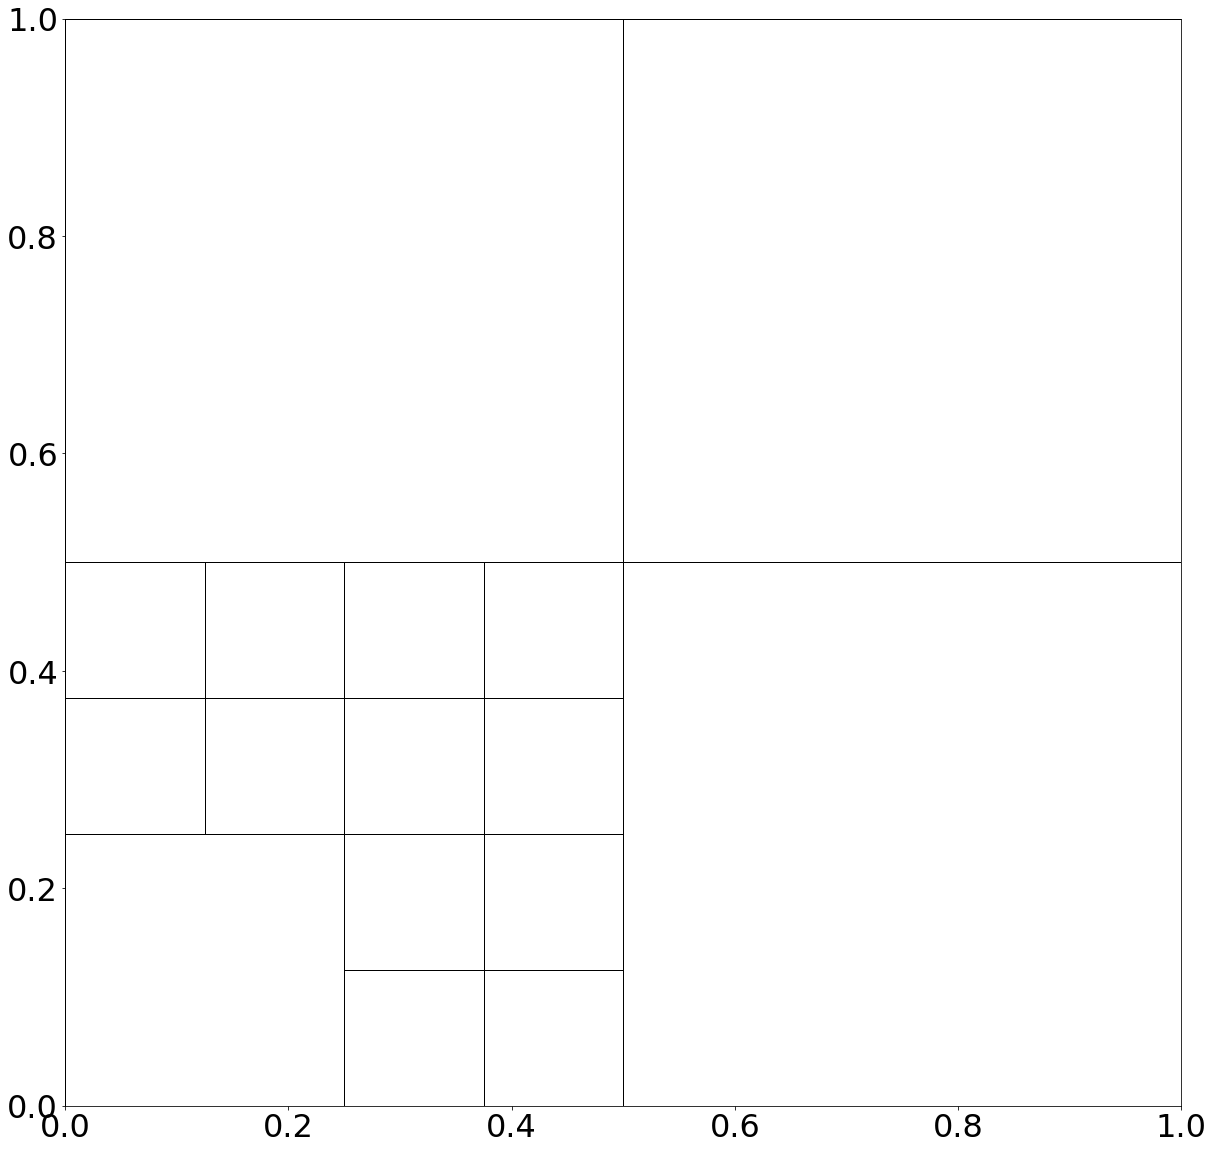

Combi Scheme:


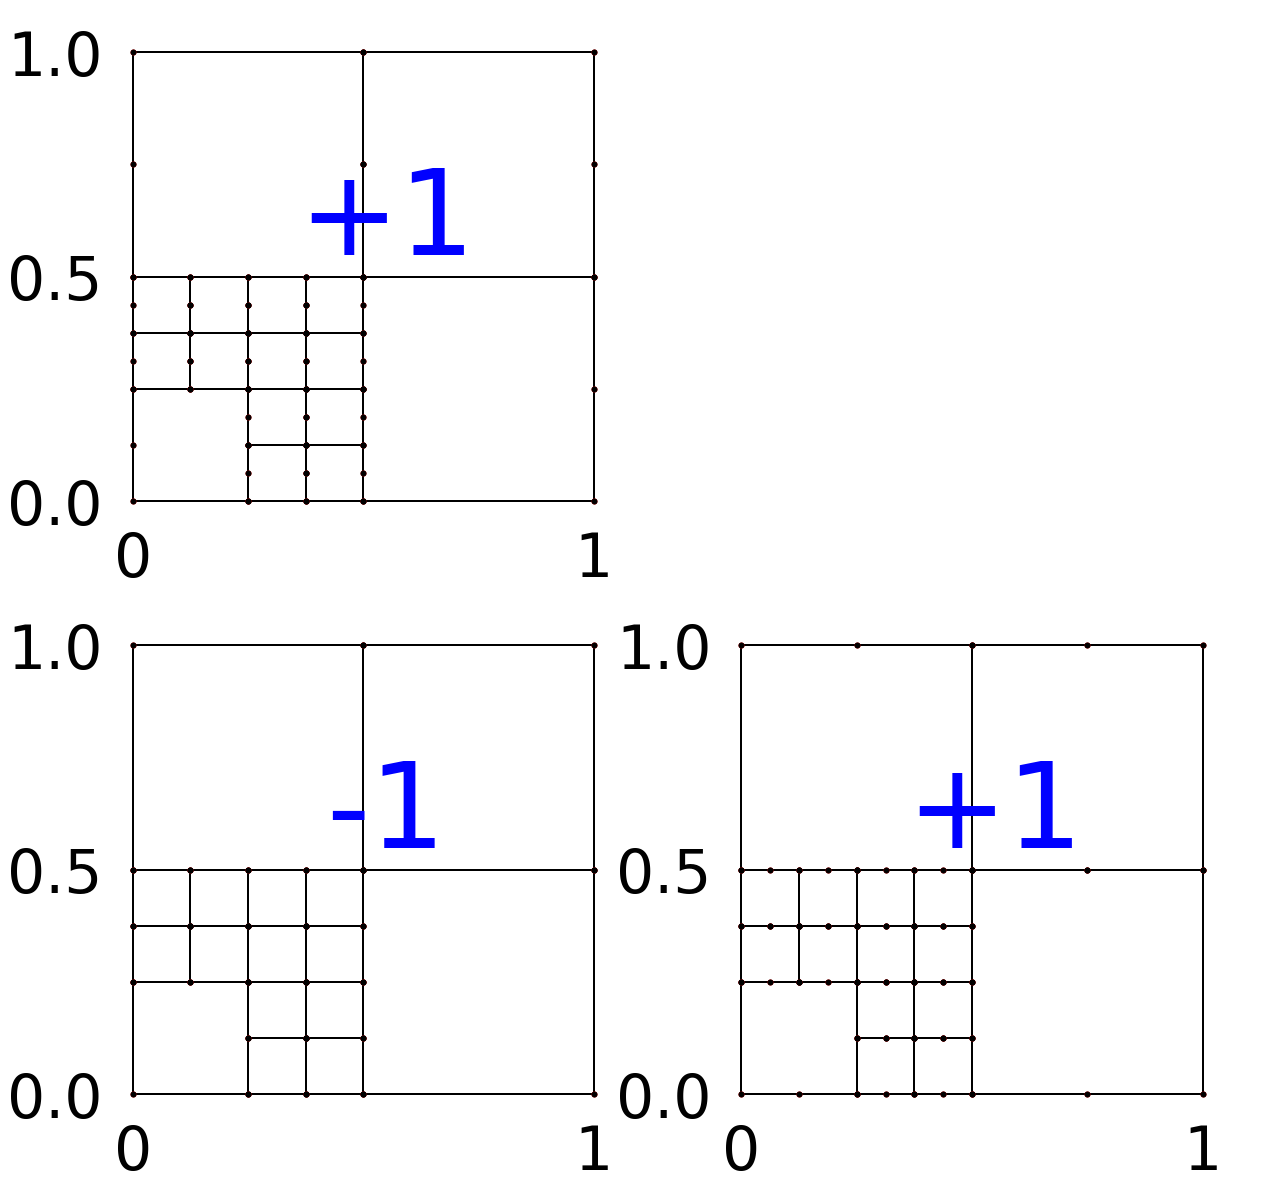

Resulting Sparse Grid:


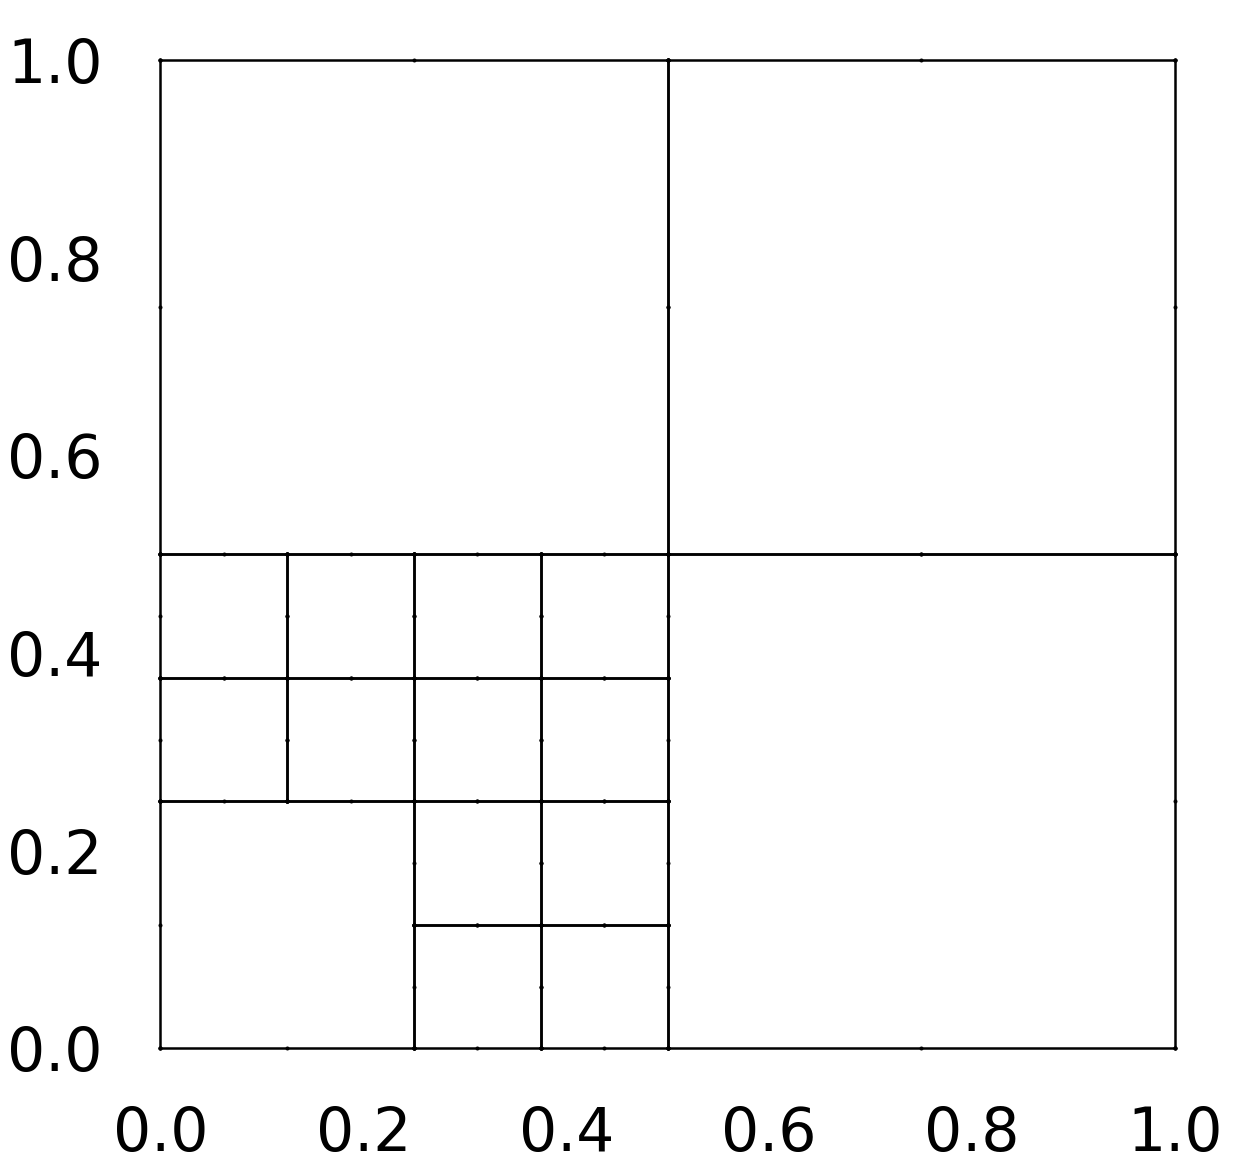

Curent number of function evaluations 69
max surplus error: 0.00019892216434194048 total surplus error: 0.008919838678994095
combiintegral: 0.11427649713677684
Current error: 0.08108338768673931
New scheme
0 [1, 3] 1.0
1 [2, 2] 1.0
2 [3, 1] 1.0
3 [1, 2] -1.0
4 [2, 1] -1.0
Finished refinement
Refined  2  times
Refinement Graph:


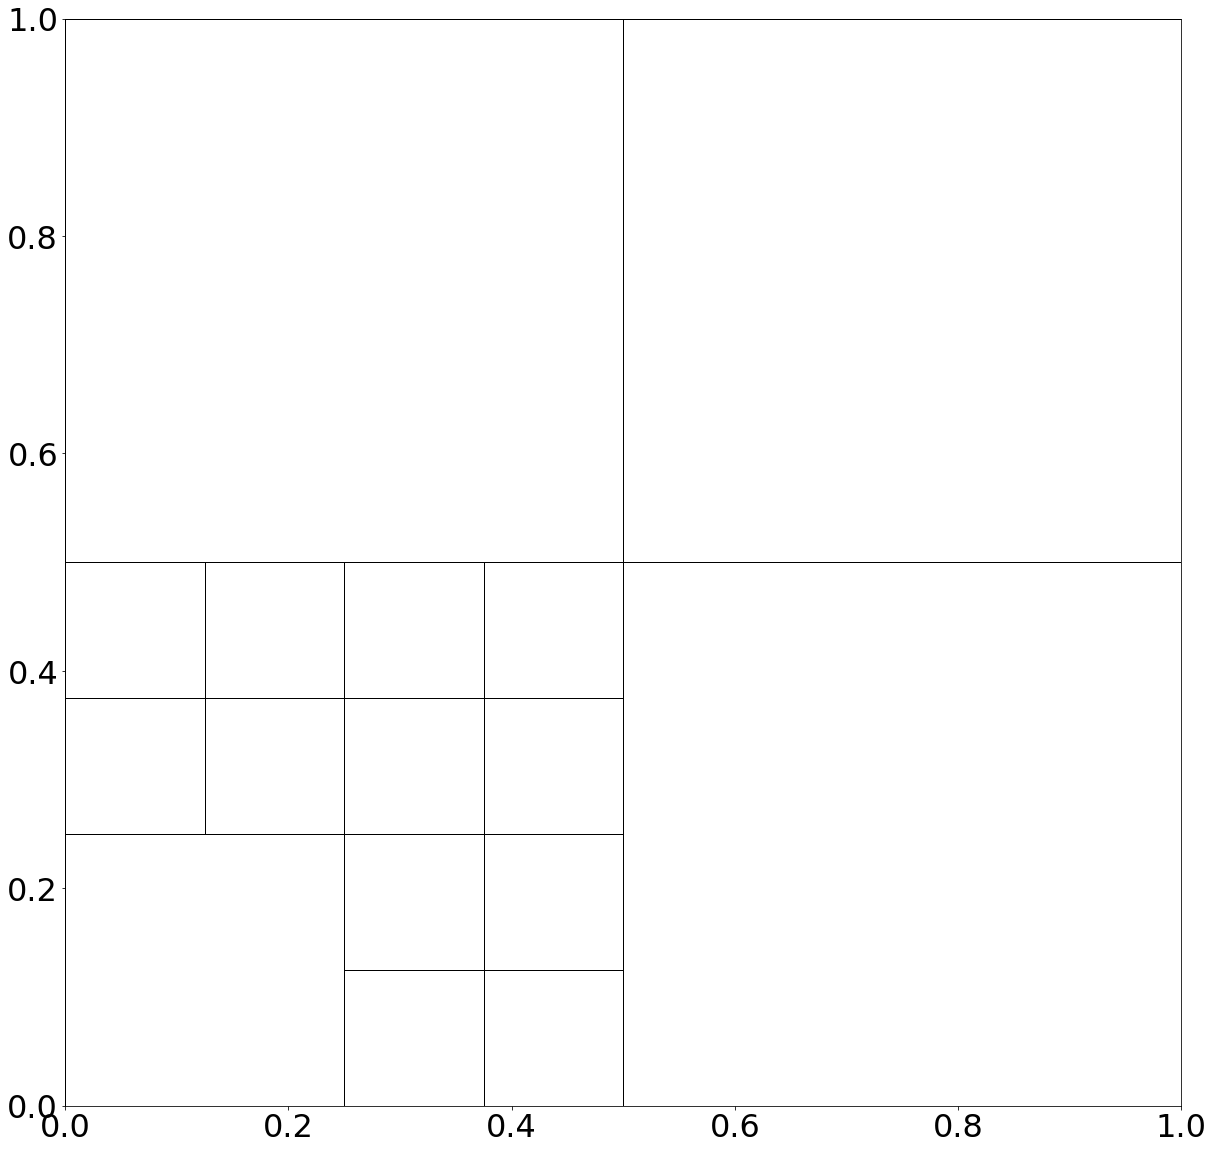

Combi Scheme:


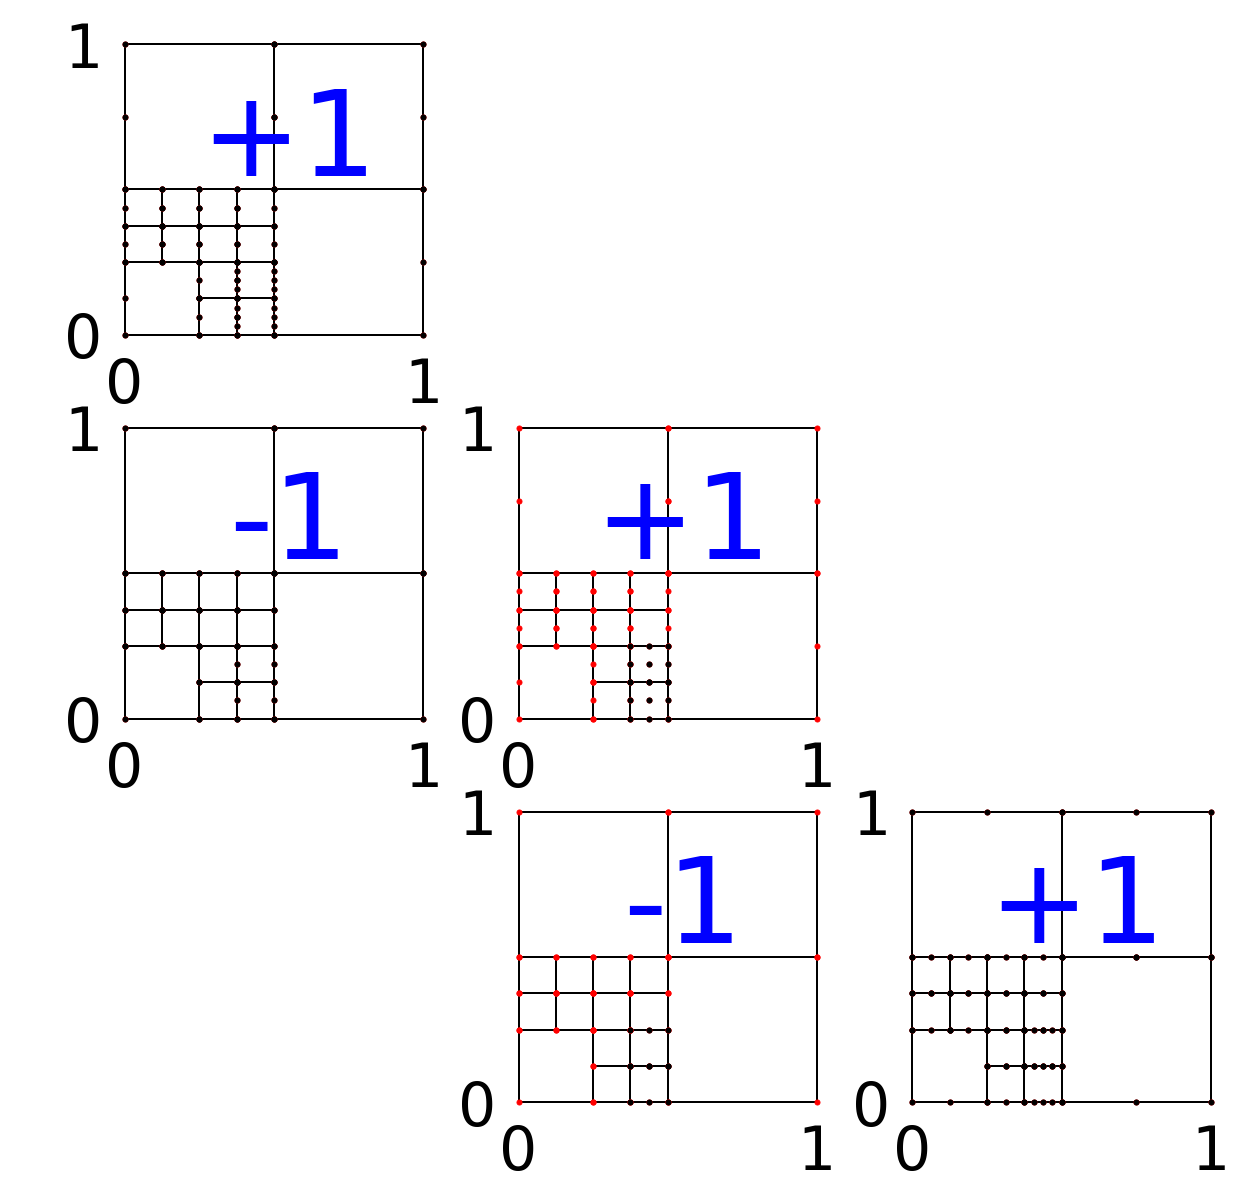

Resulting Sparse Grid:


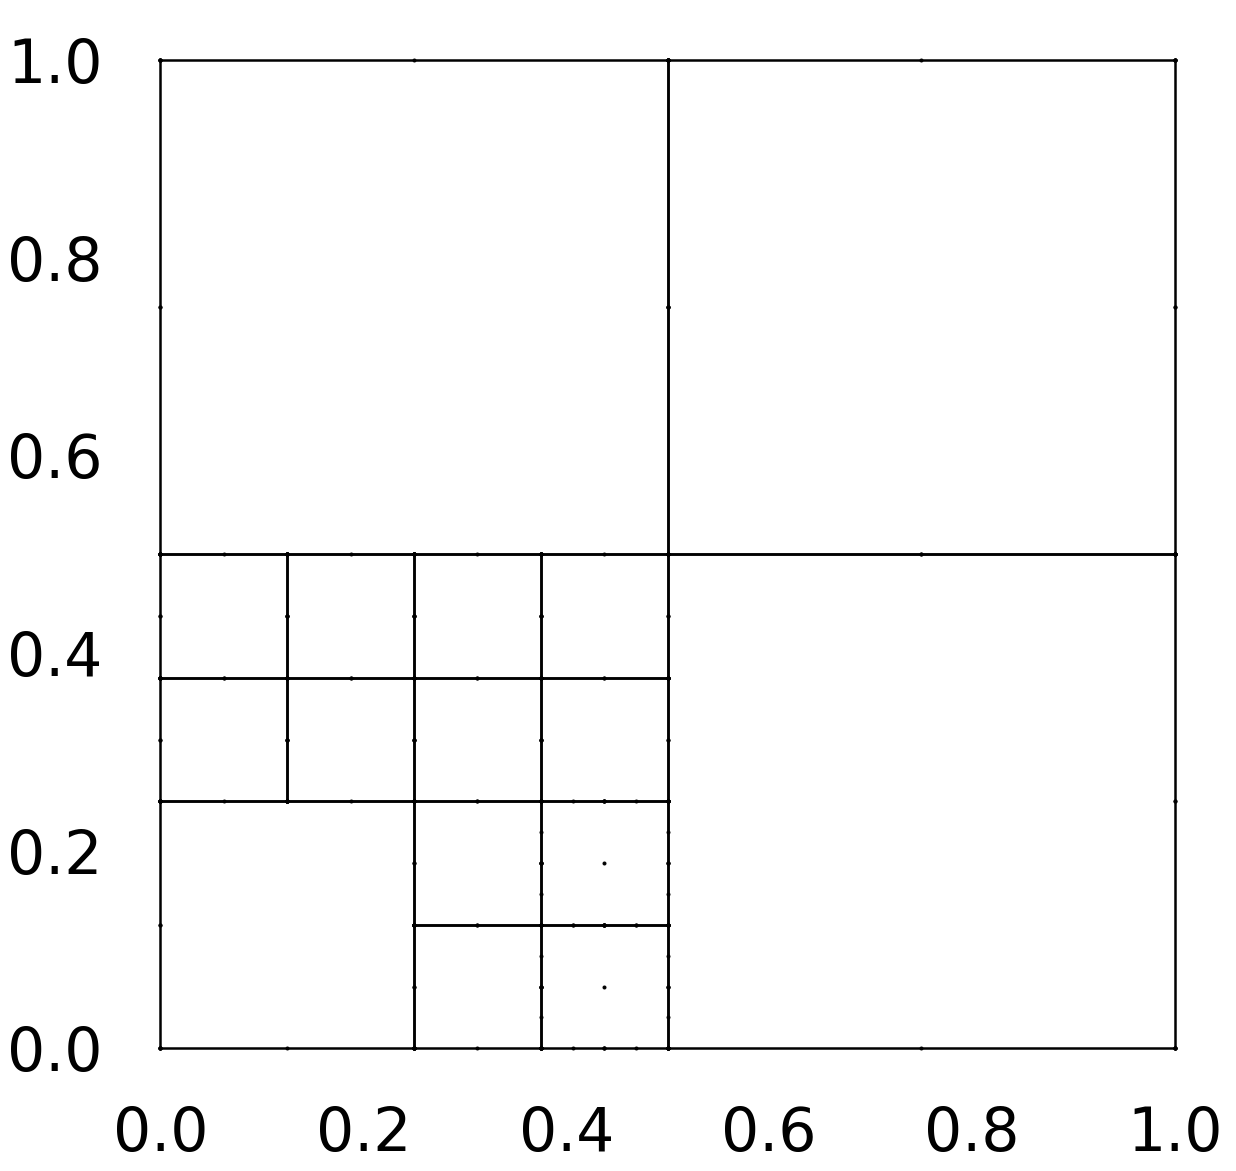

Curent number of function evaluations 85
max surplus error: 0.00015488694986891 total surplus error: 0.0076899258015850425
combiintegral: 0.1161240248808593
Current error: 0.0662271050889711
Finished refinement
Refined  2  times
Refinement Graph:


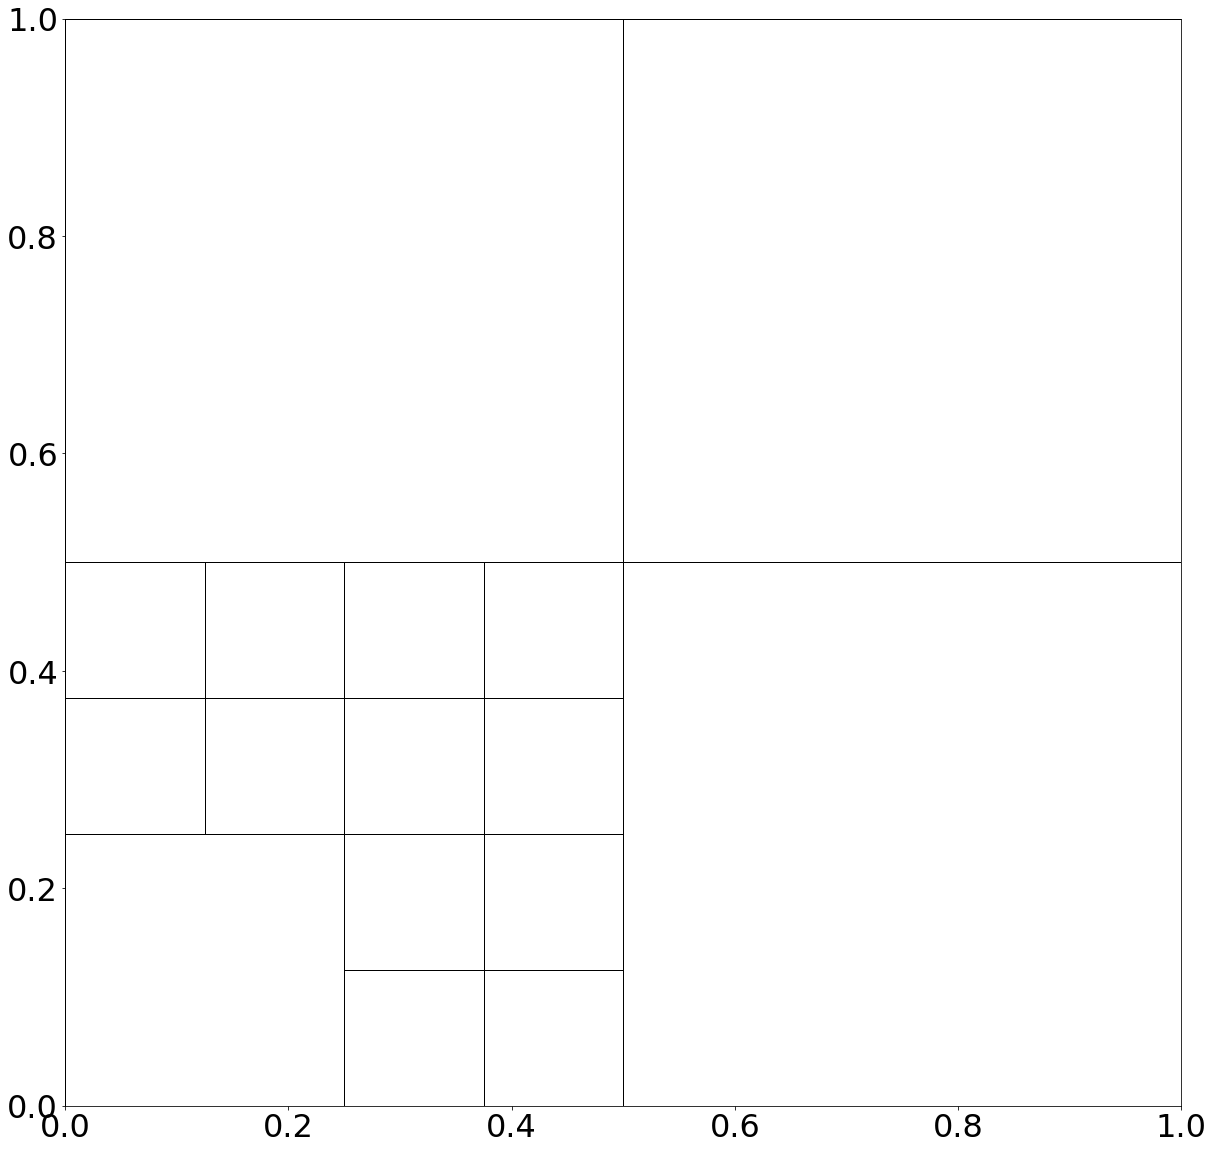

Combi Scheme:


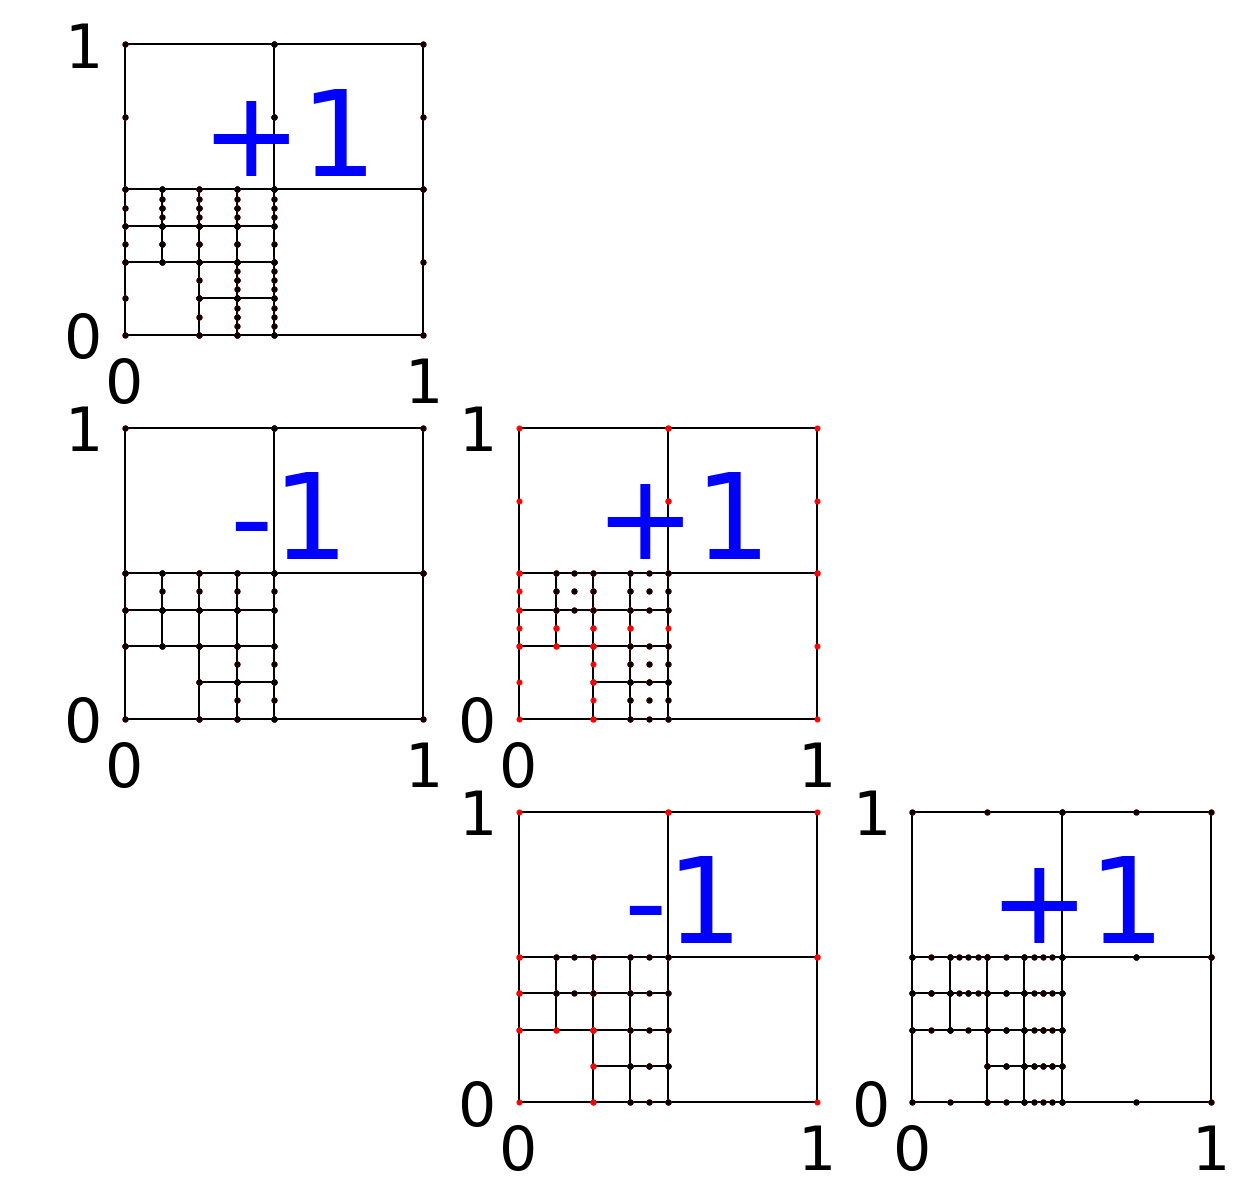

Resulting Sparse Grid:


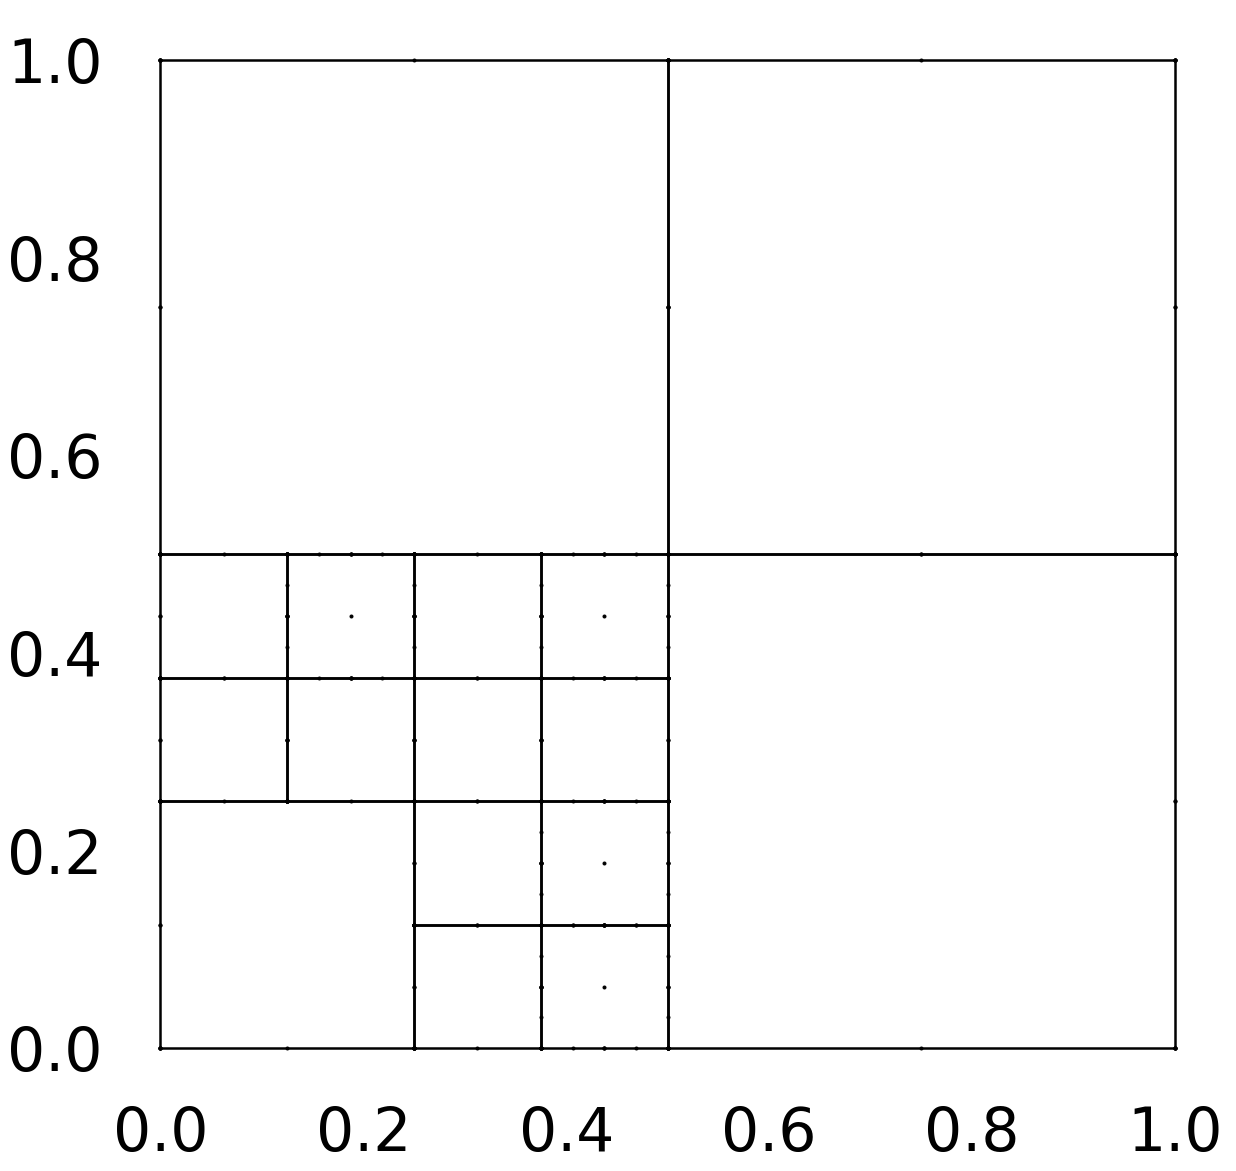

Curent number of function evaluations 103
max surplus error: 0.00013855257102002012 total surplus error: 0.006612599326288301
combiintegral: 0.11745074980893896
Current error: 0.055558685887047786
Finished refinement
Refined  1  times
Refinement Graph:


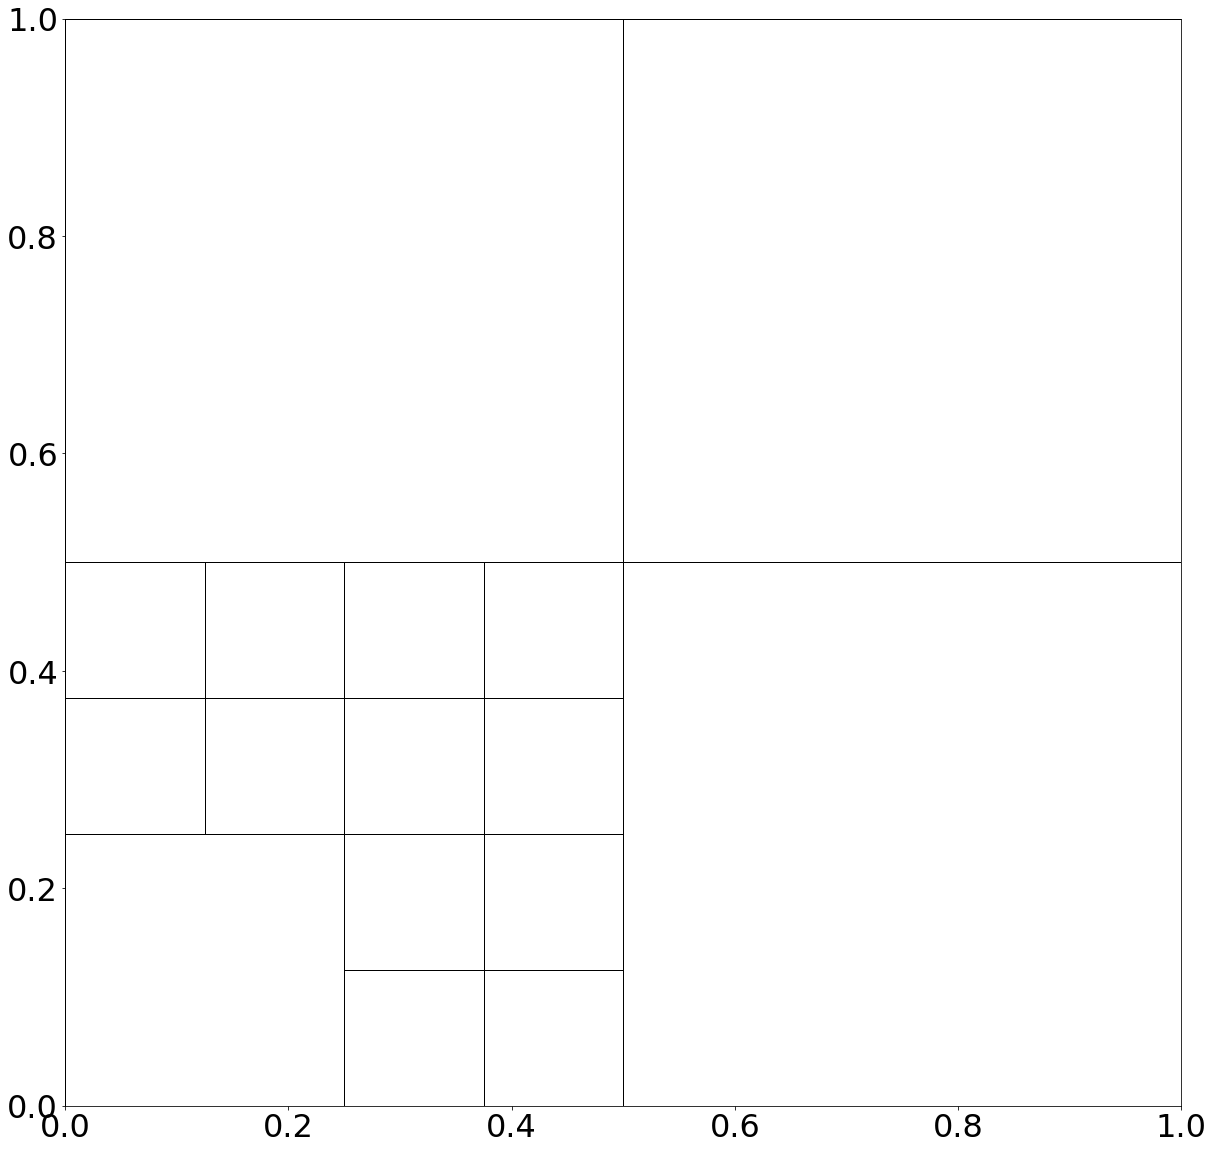

Combi Scheme:


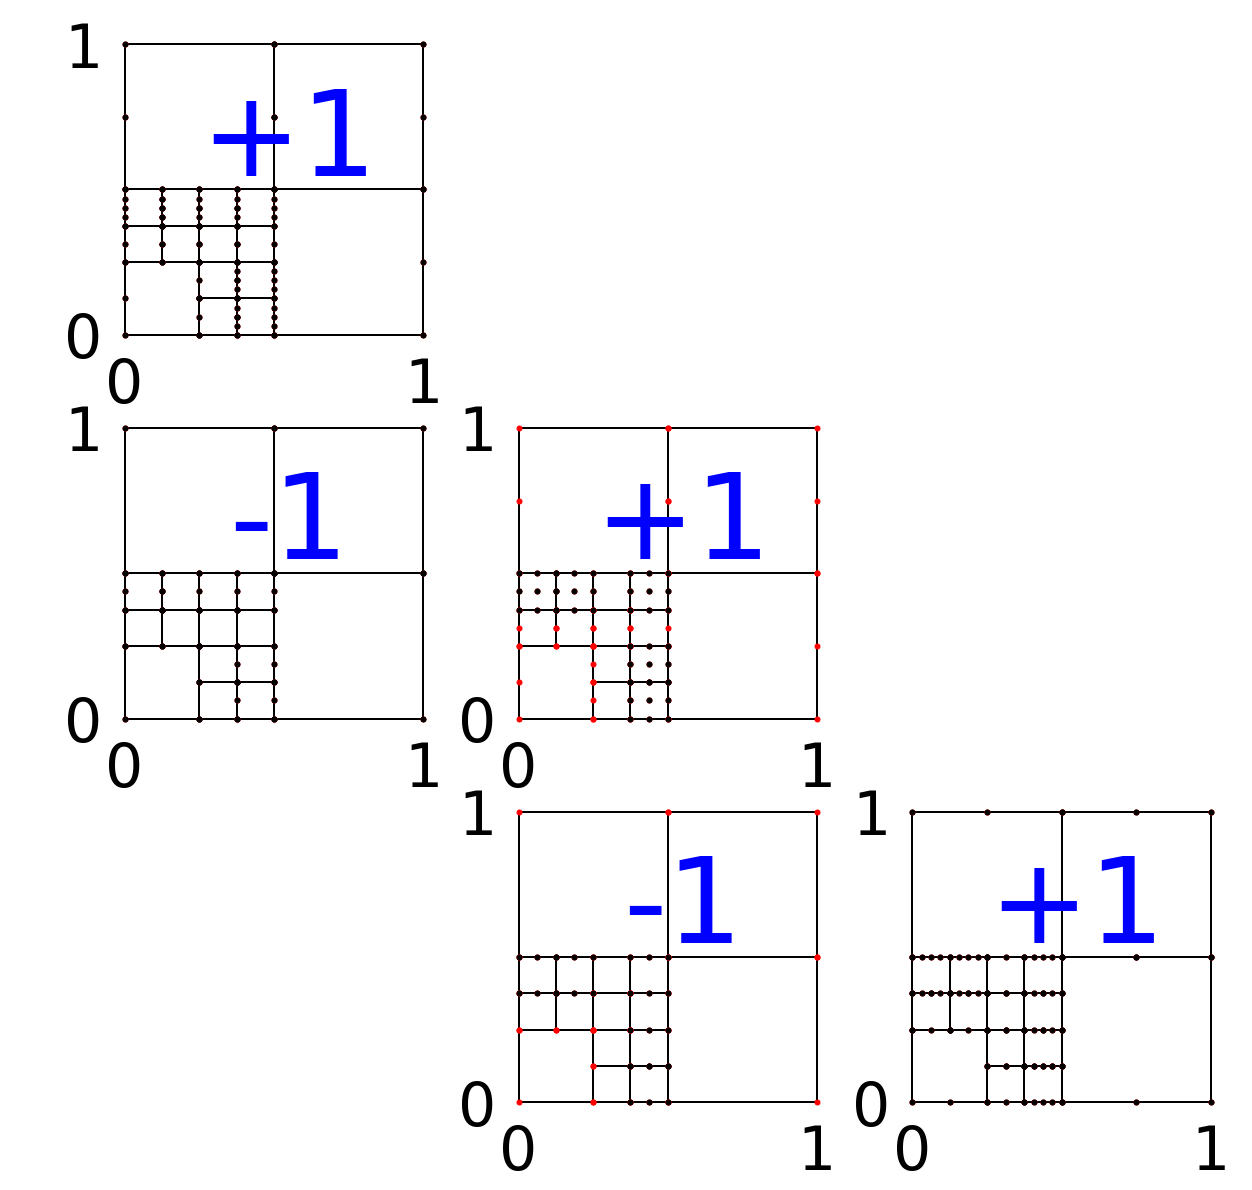

Resulting Sparse Grid:


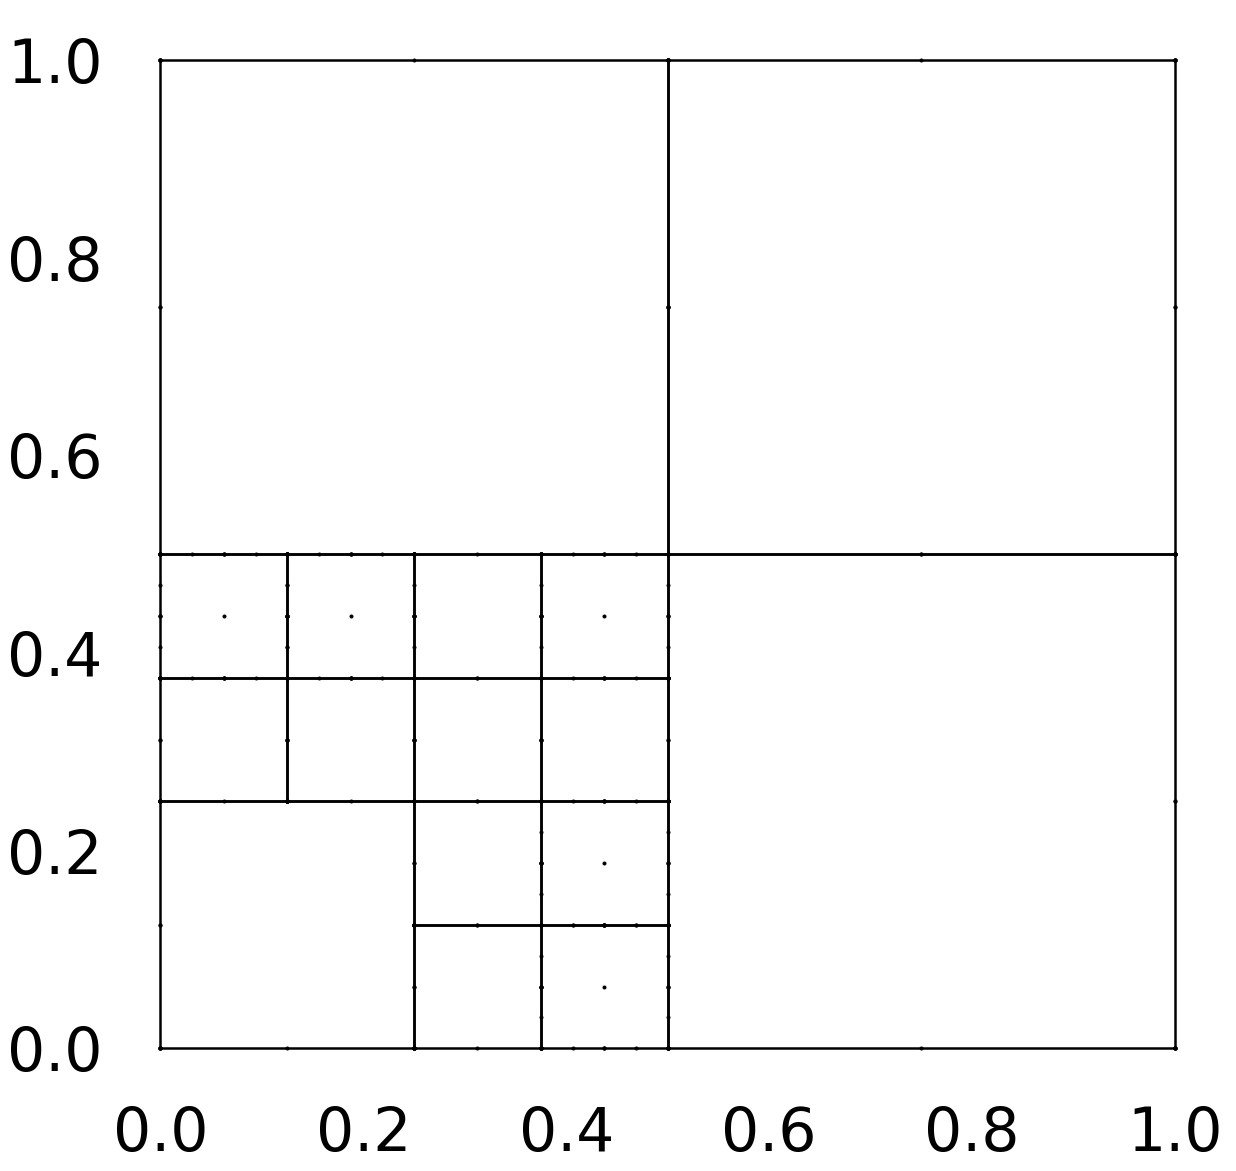

Curent number of function evaluations 110
max surplus error: 0.00011266786972767773 total surplus error: 0.006172336460677173
combiintegral: 0.11811890751148799
Current error: 0.05018591696342137
Finished refinement
Refined  2  times
Refinement Graph:


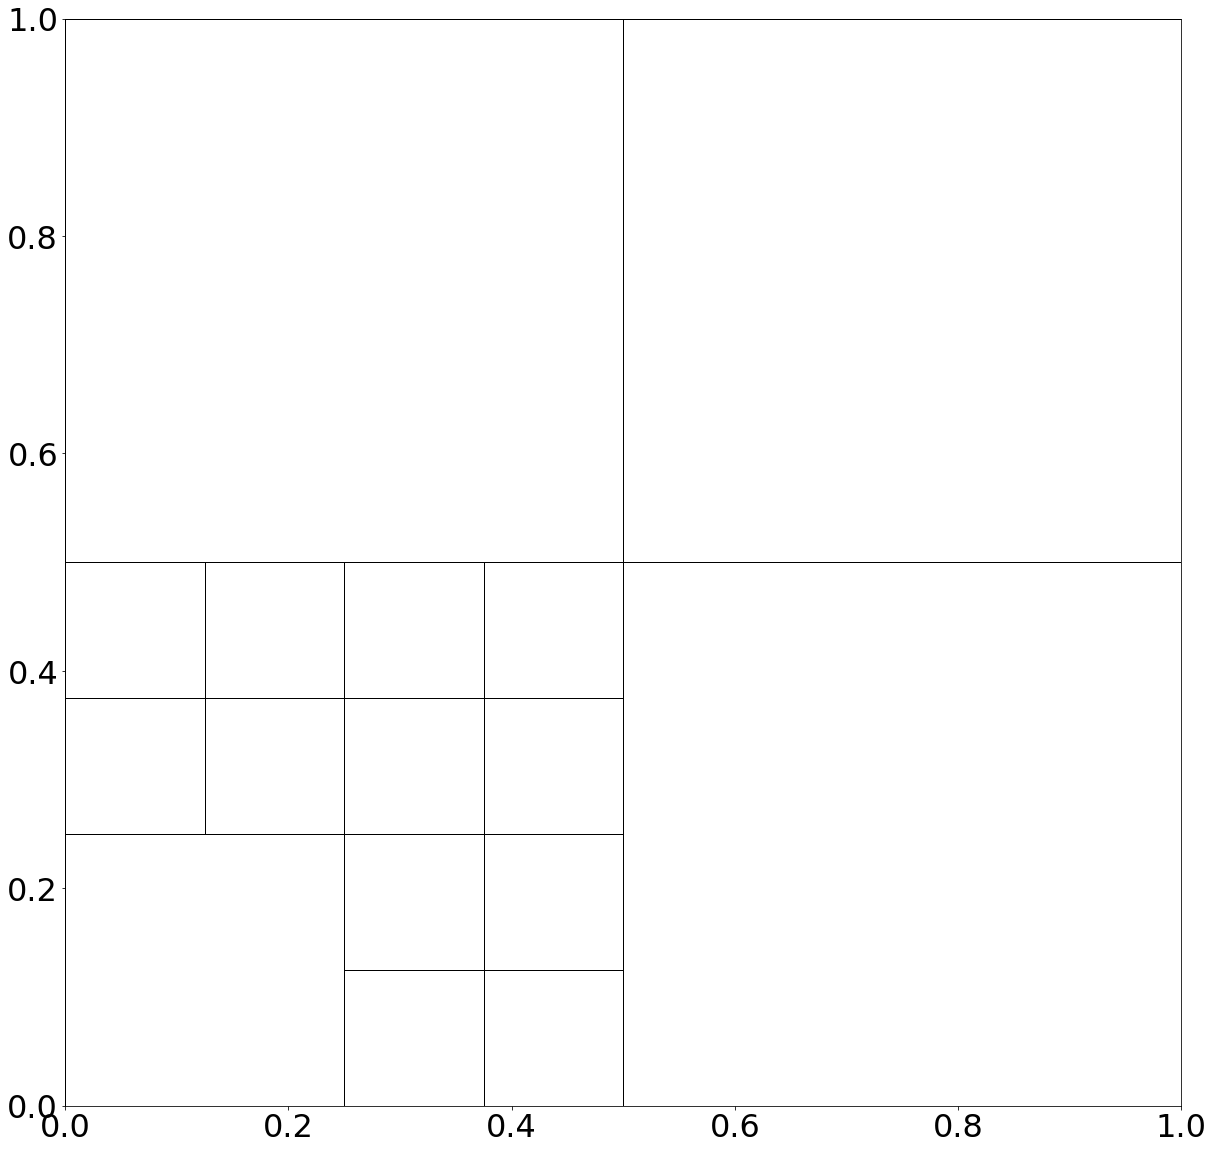

Combi Scheme:


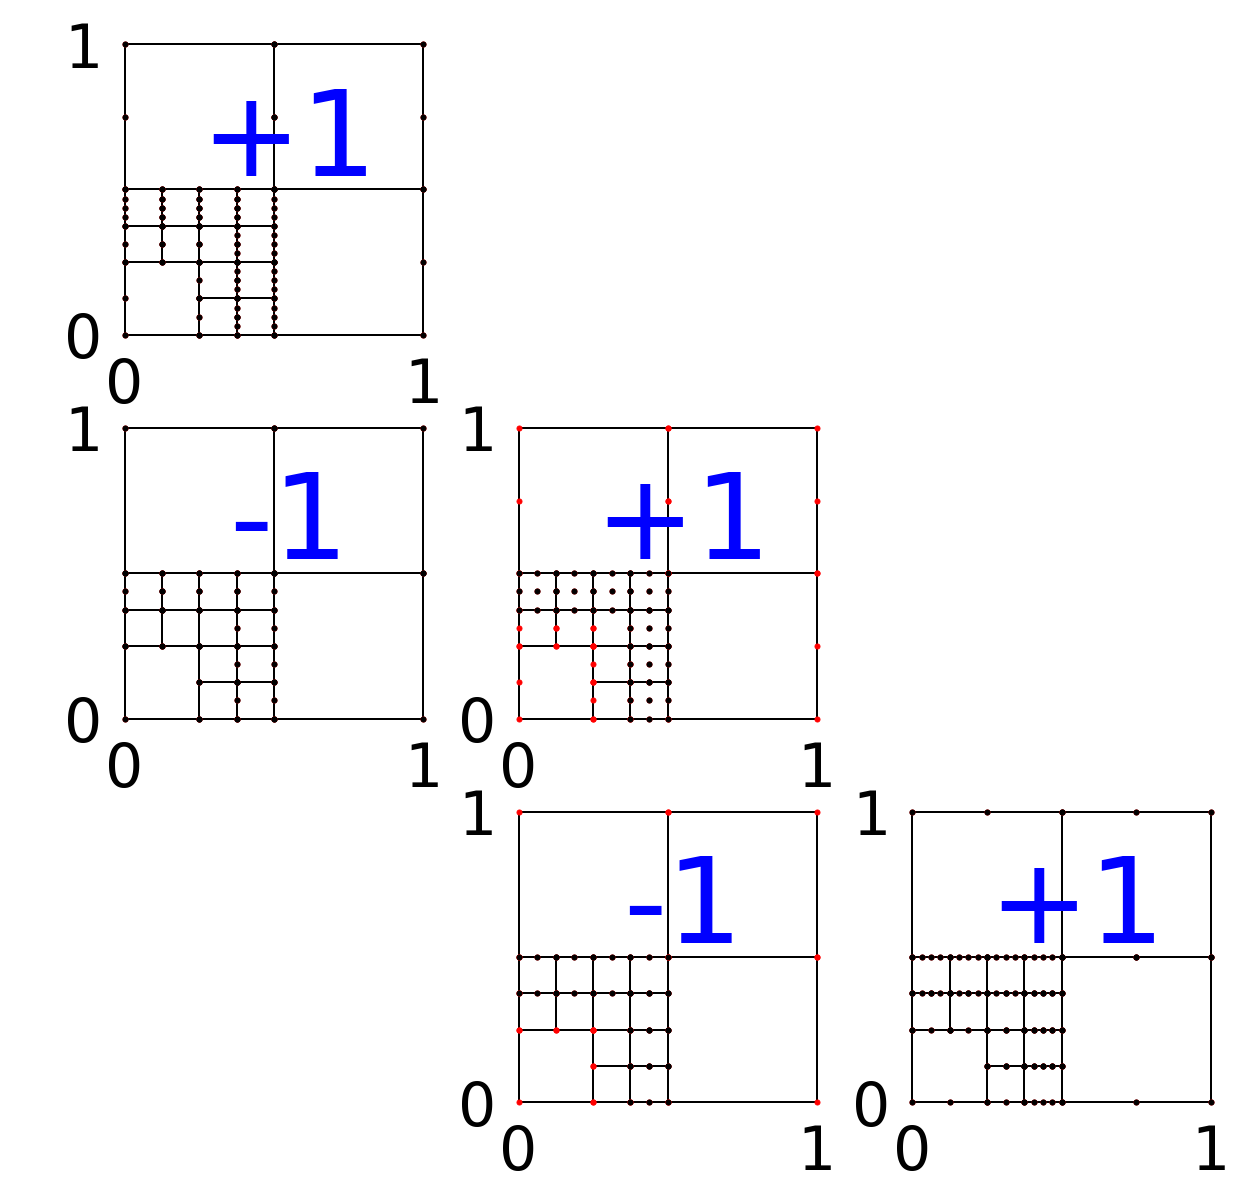

Resulting Sparse Grid:


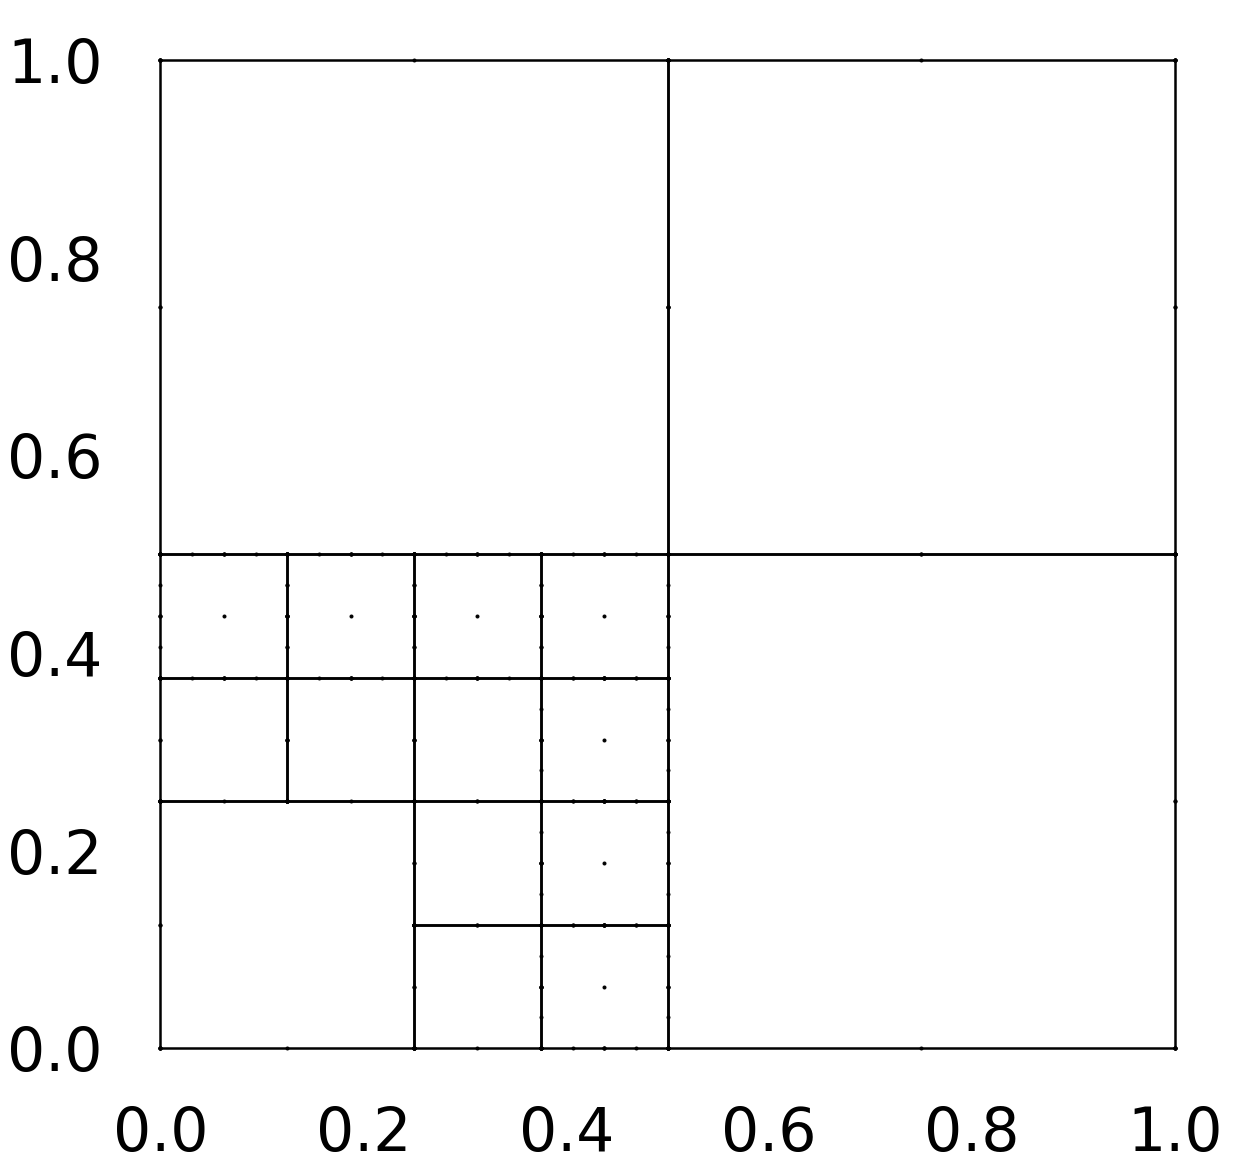

Curent number of function evaluations 120
max surplus error: 6.109627543868735e-05 total surplus error: 0.005558081430573341
combiintegral: 0.11926923424566115
Current error: 0.04093594542855191
New scheme
0 [1, 4] 1.0
1 [2, 3] 1.0
2 [3, 2] 1.0
3 [4, 1] 1.0
4 [1, 3] -1.0
5 [2, 2] -1.0
6 [3, 1] -1.0
Finished refinement
Refined  1  times
Refinement Graph:


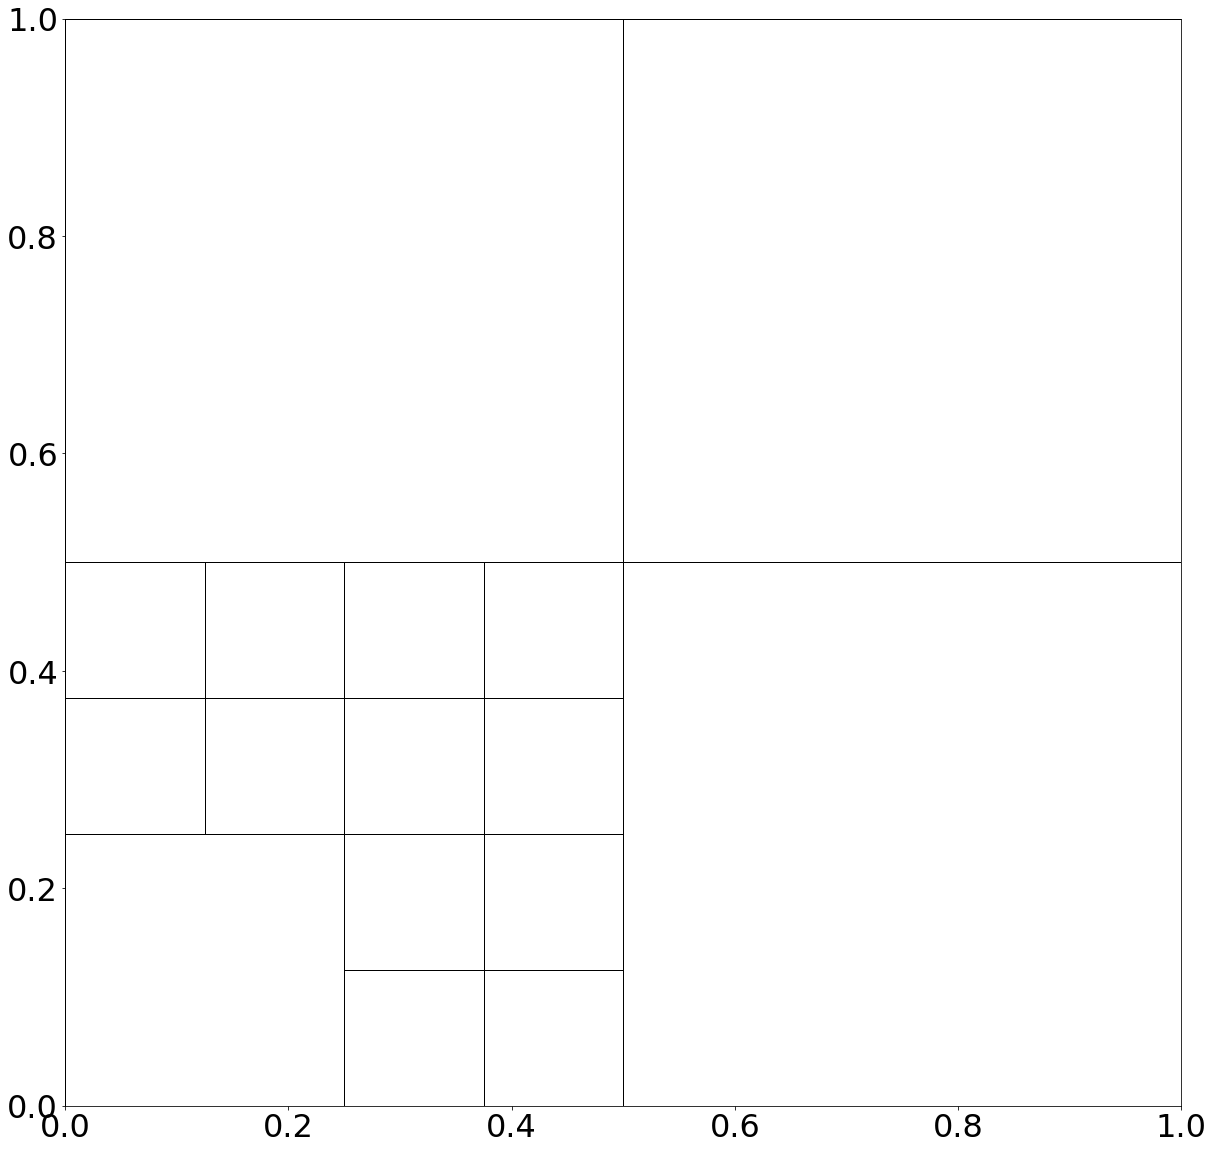

Combi Scheme:


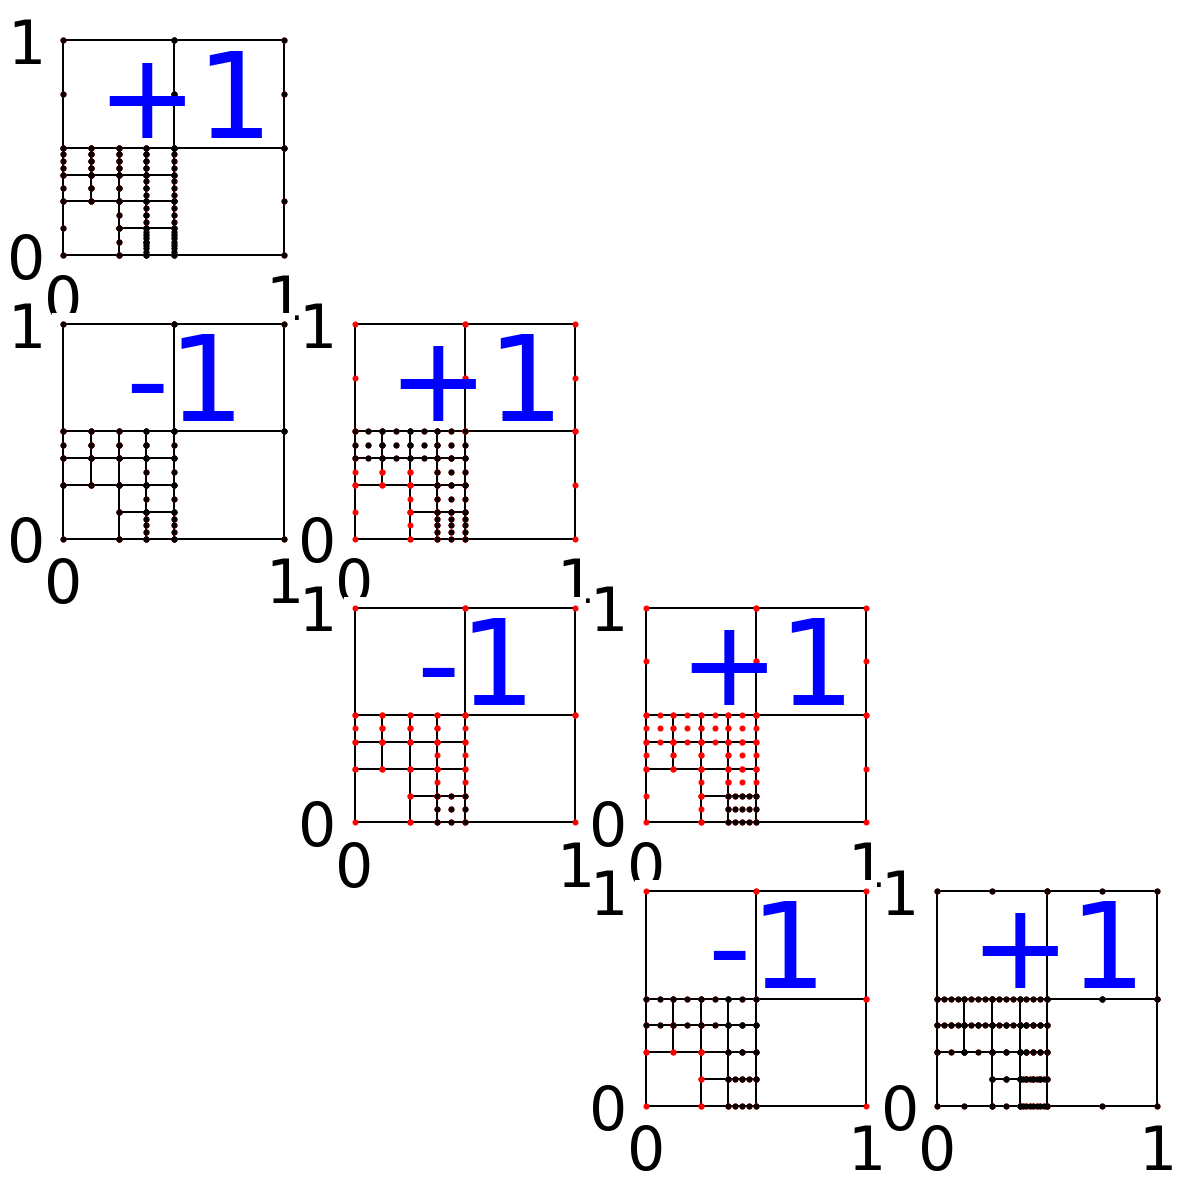

Resulting Sparse Grid:


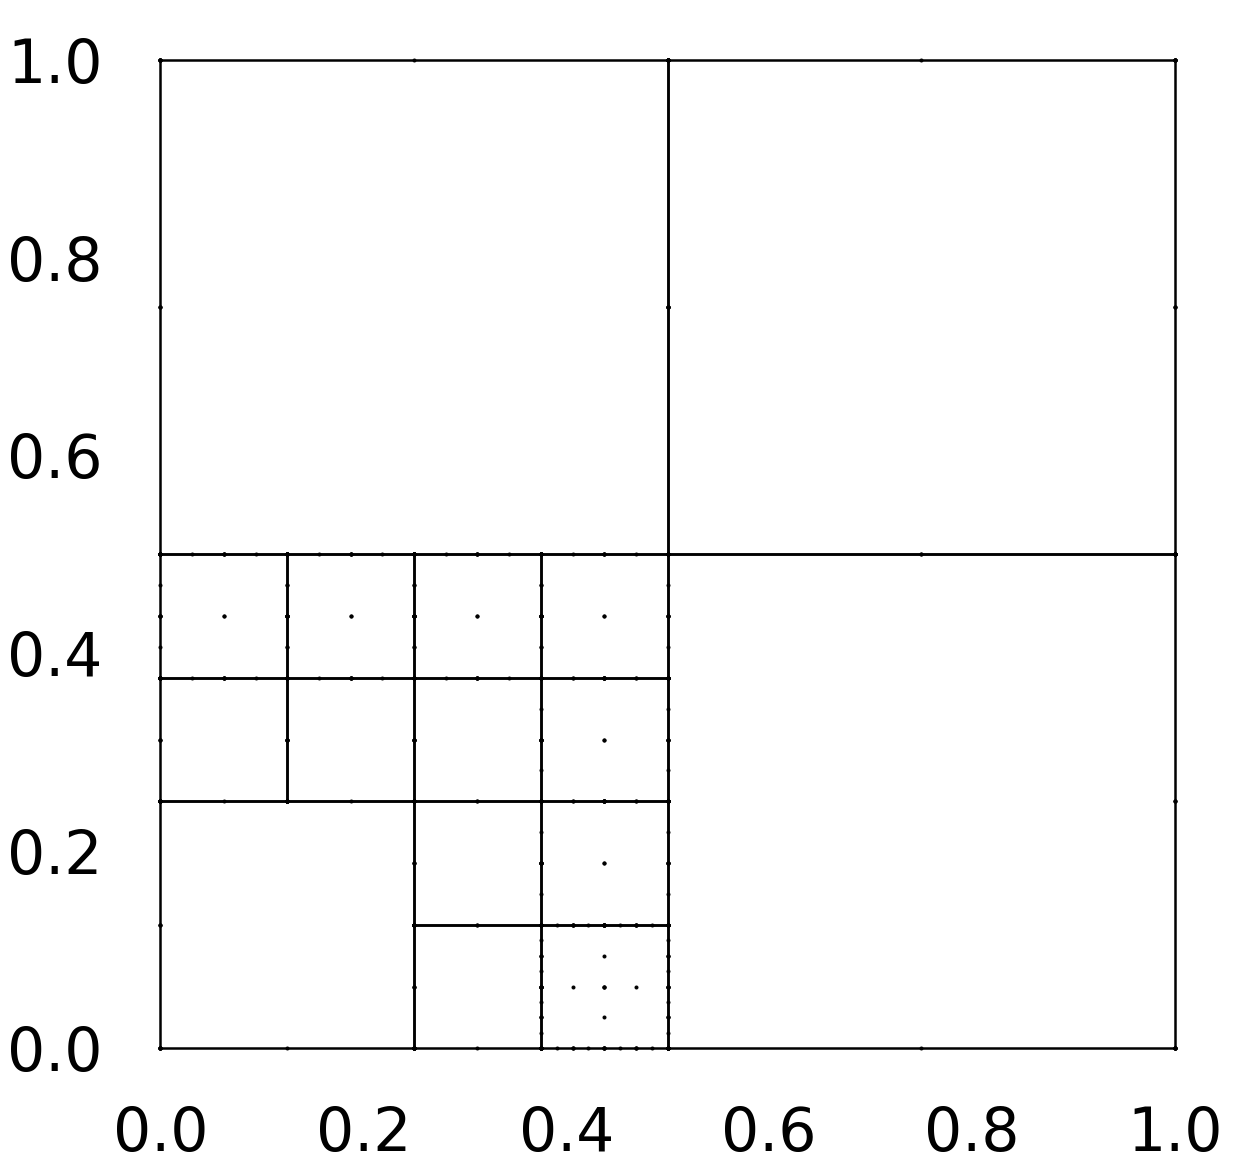

Curent number of function evaluations 140
max surplus error: 4.864724665709728e-05 total surplus error: 0.005038423720607536
combiintegral: 0.119788213218153
Current error: 0.03676274786638622
Finished refinement
Refined  2  times
Refinement Graph:


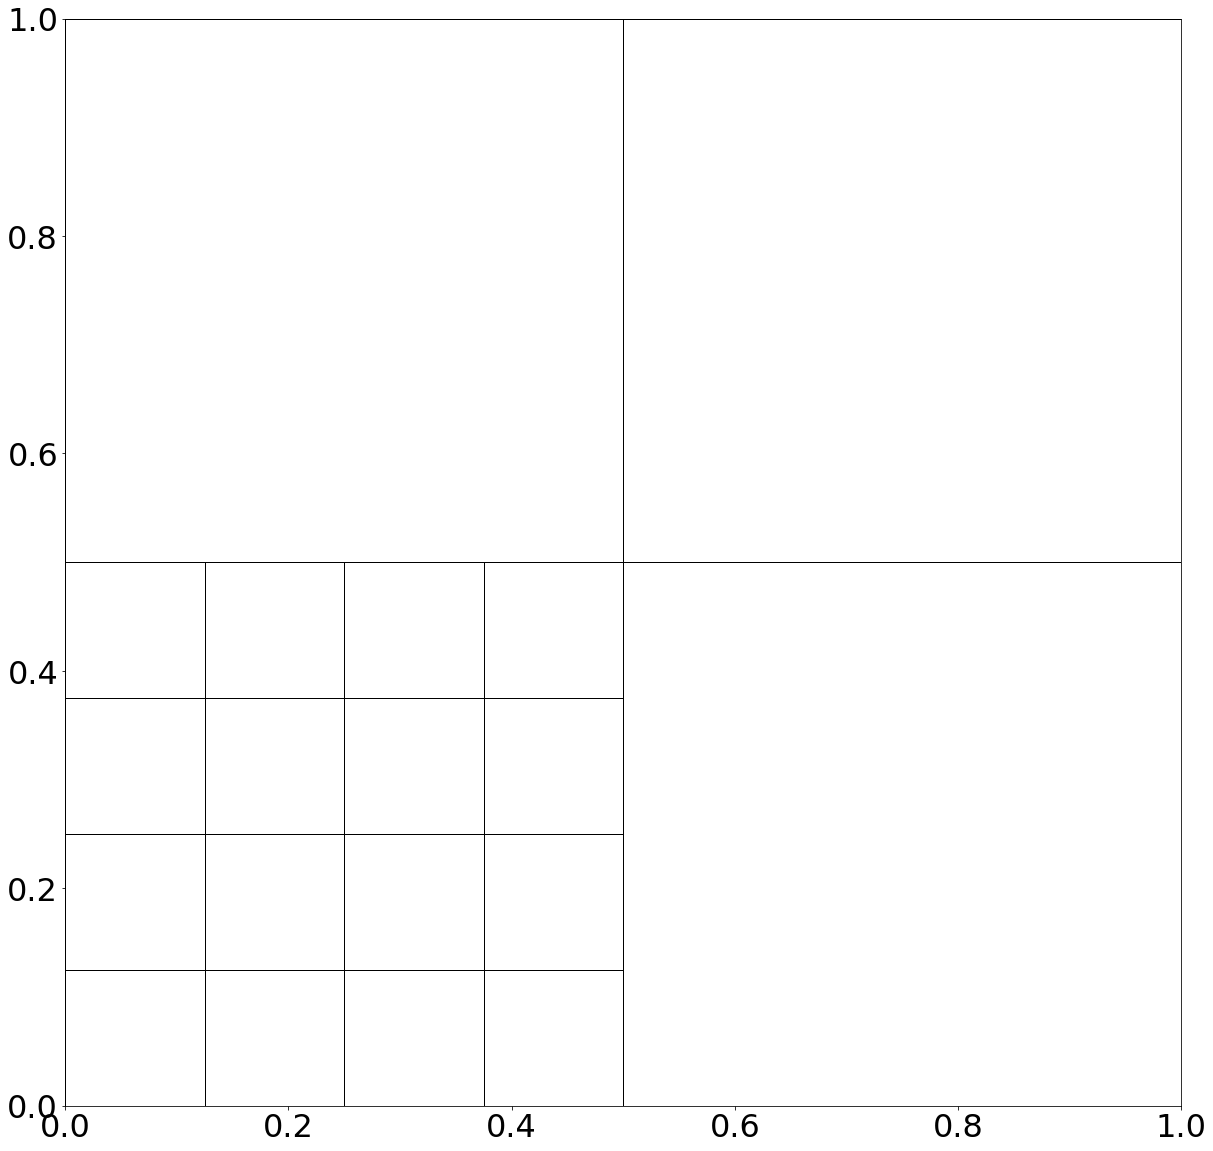

Combi Scheme:


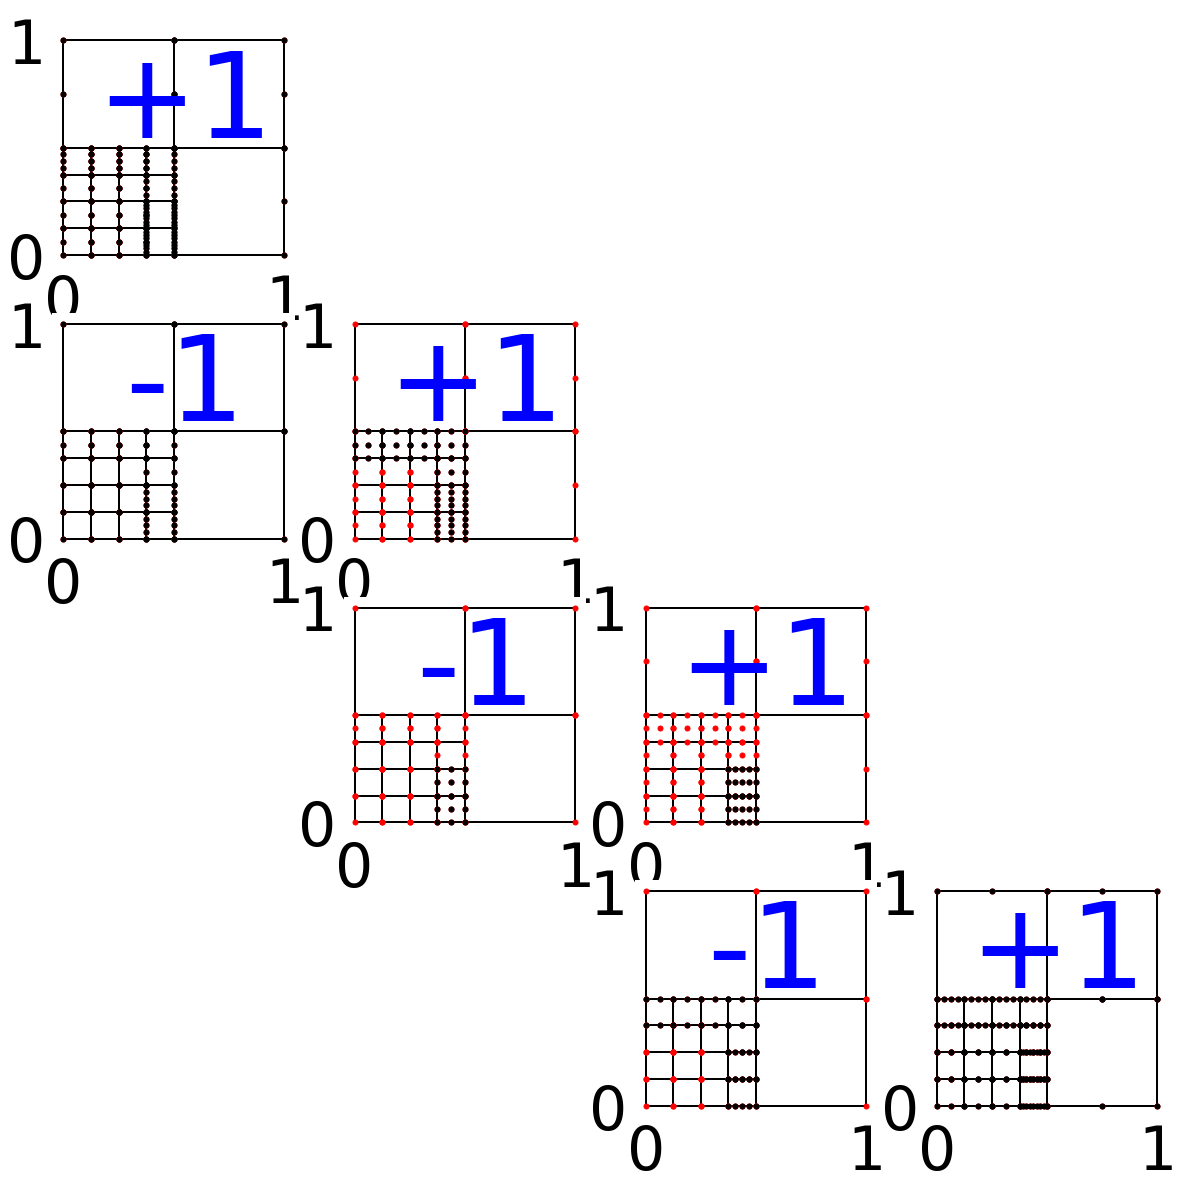

Resulting Sparse Grid:


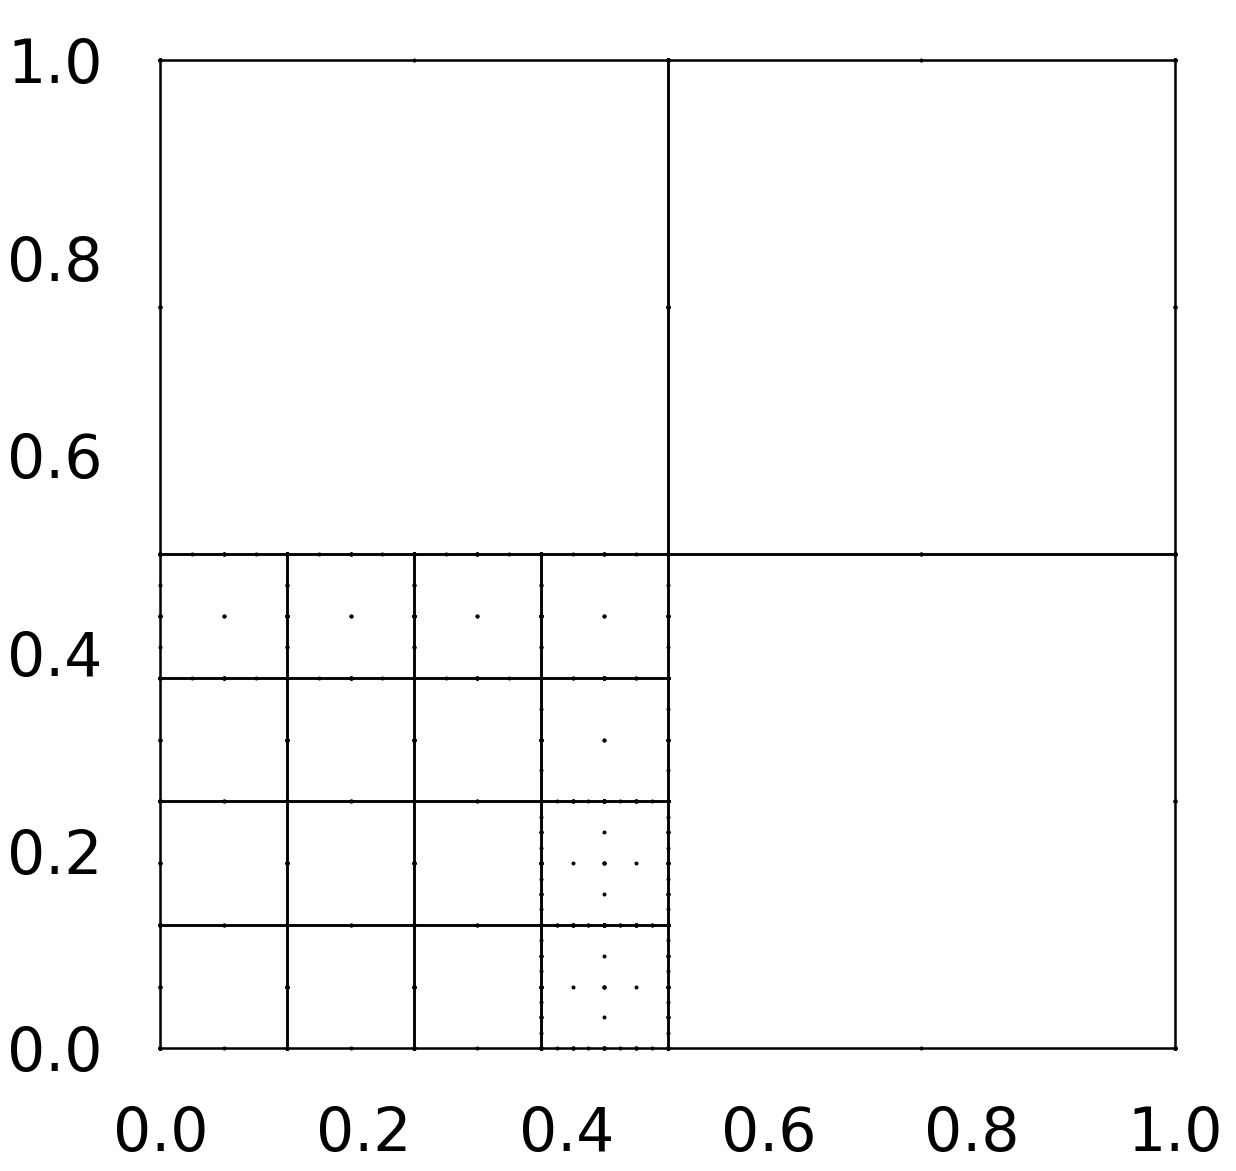

Curent number of function evaluations 165
max surplus error: 4.3357519126007215e-05 total surplus error: 0.004412875433151258
combiintegral: 0.11998233809343635
Current error: 0.035201756960726915
Finished refinement
Refined  2  times
Refinement Graph:


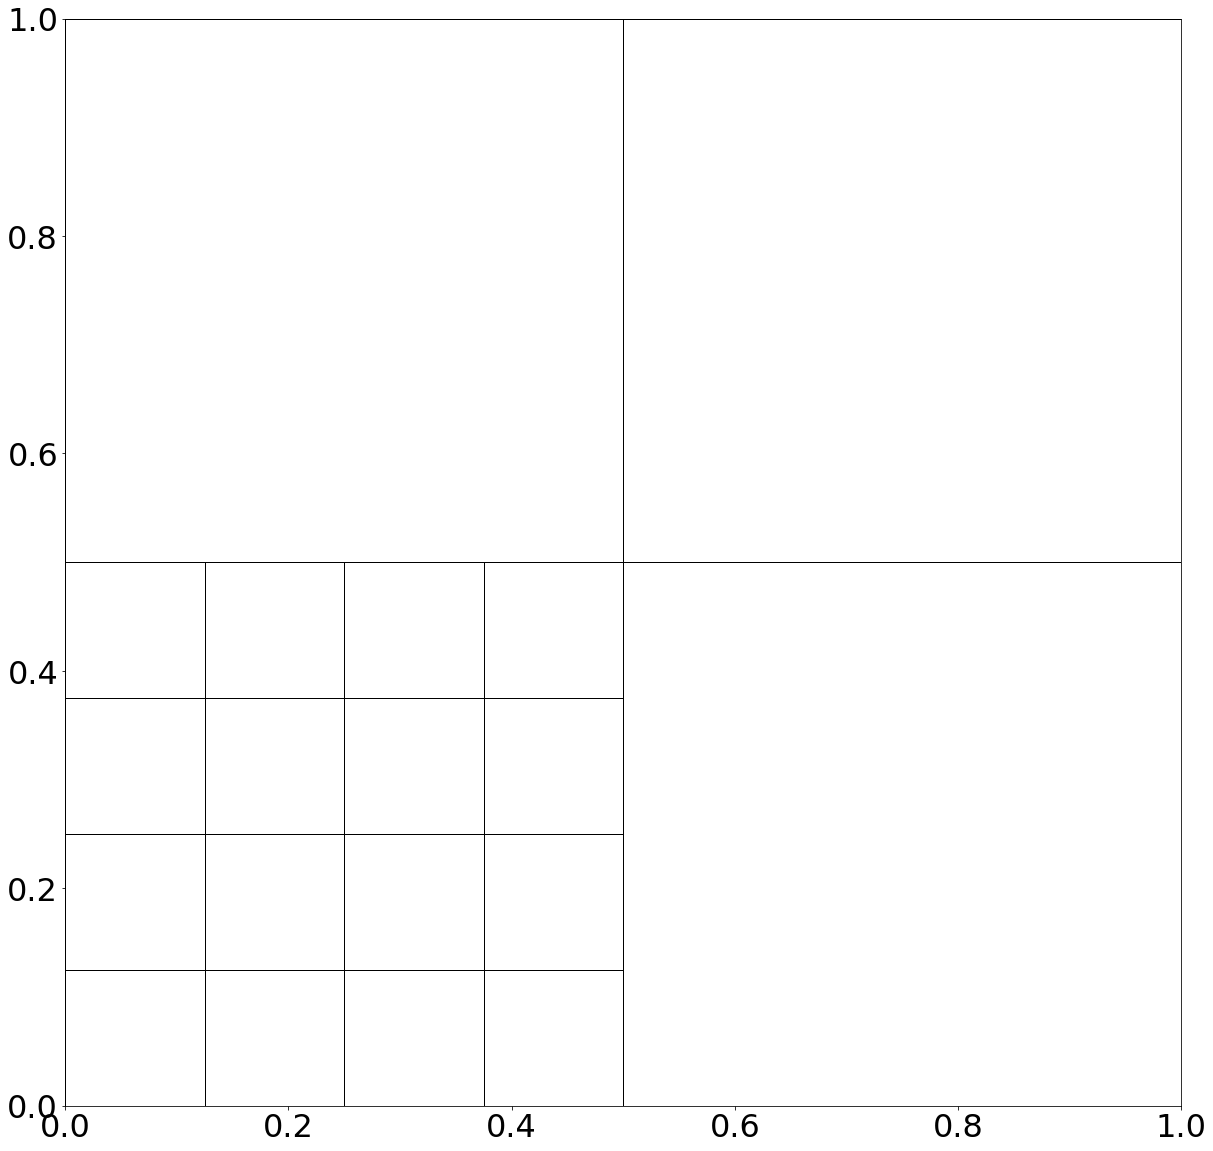

Combi Scheme:


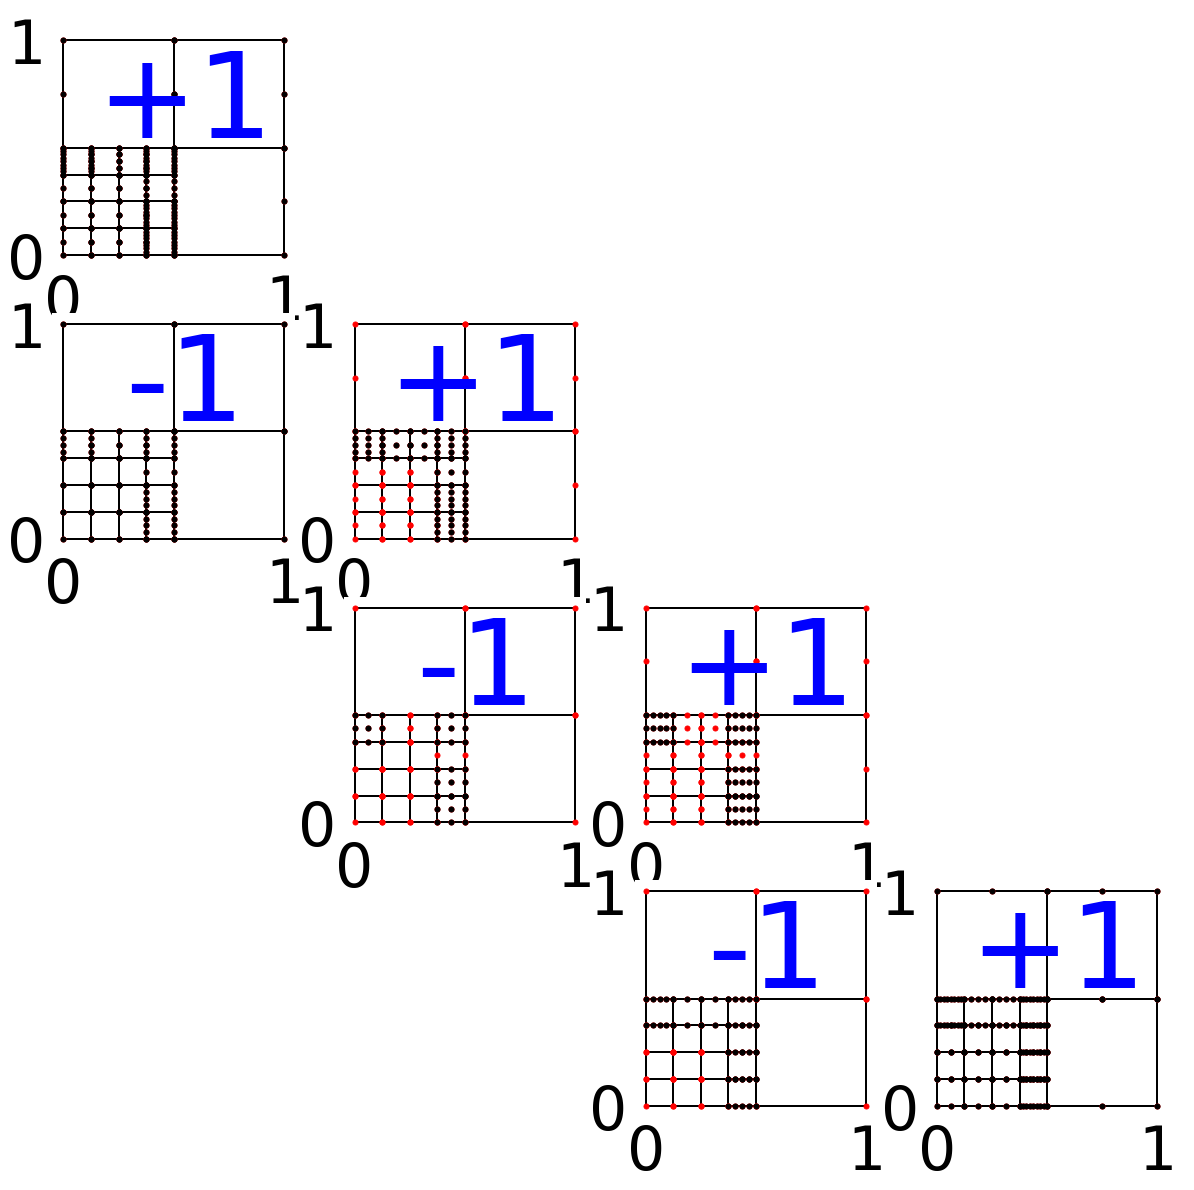

Resulting Sparse Grid:


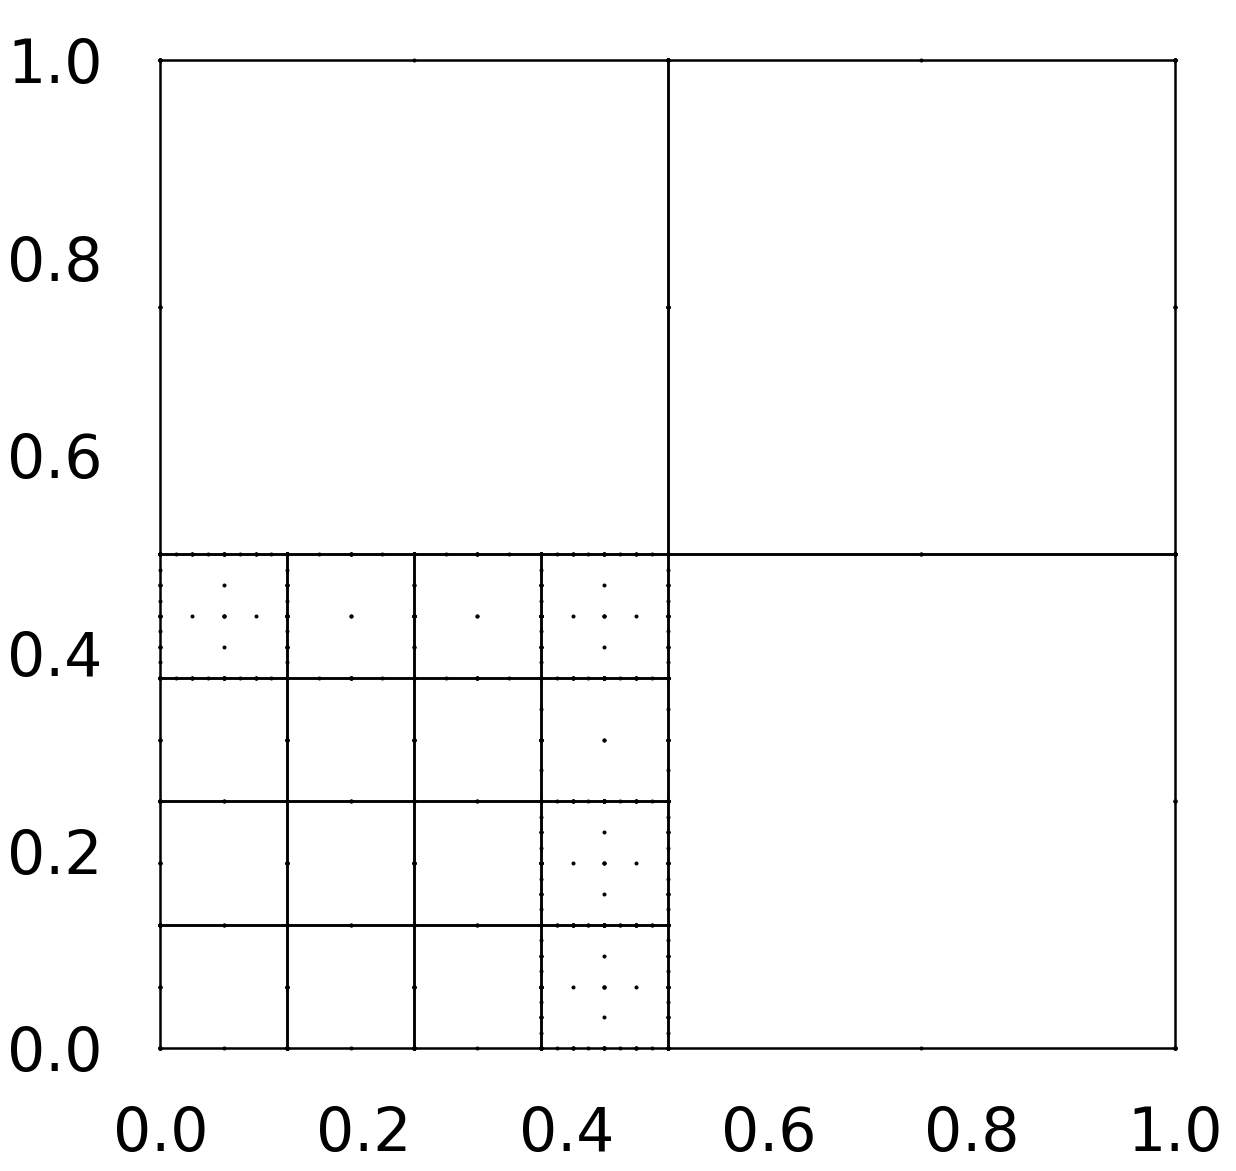

Curent number of function evaluations 205
max surplus error: 3.7056764247811614e-05 total surplus error: 0.0038200894365622543
combiintegral: 0.12079478762453853
Current error: 0.028668713075925778
Finished refinement
Refined  2  times
Refinement Graph:


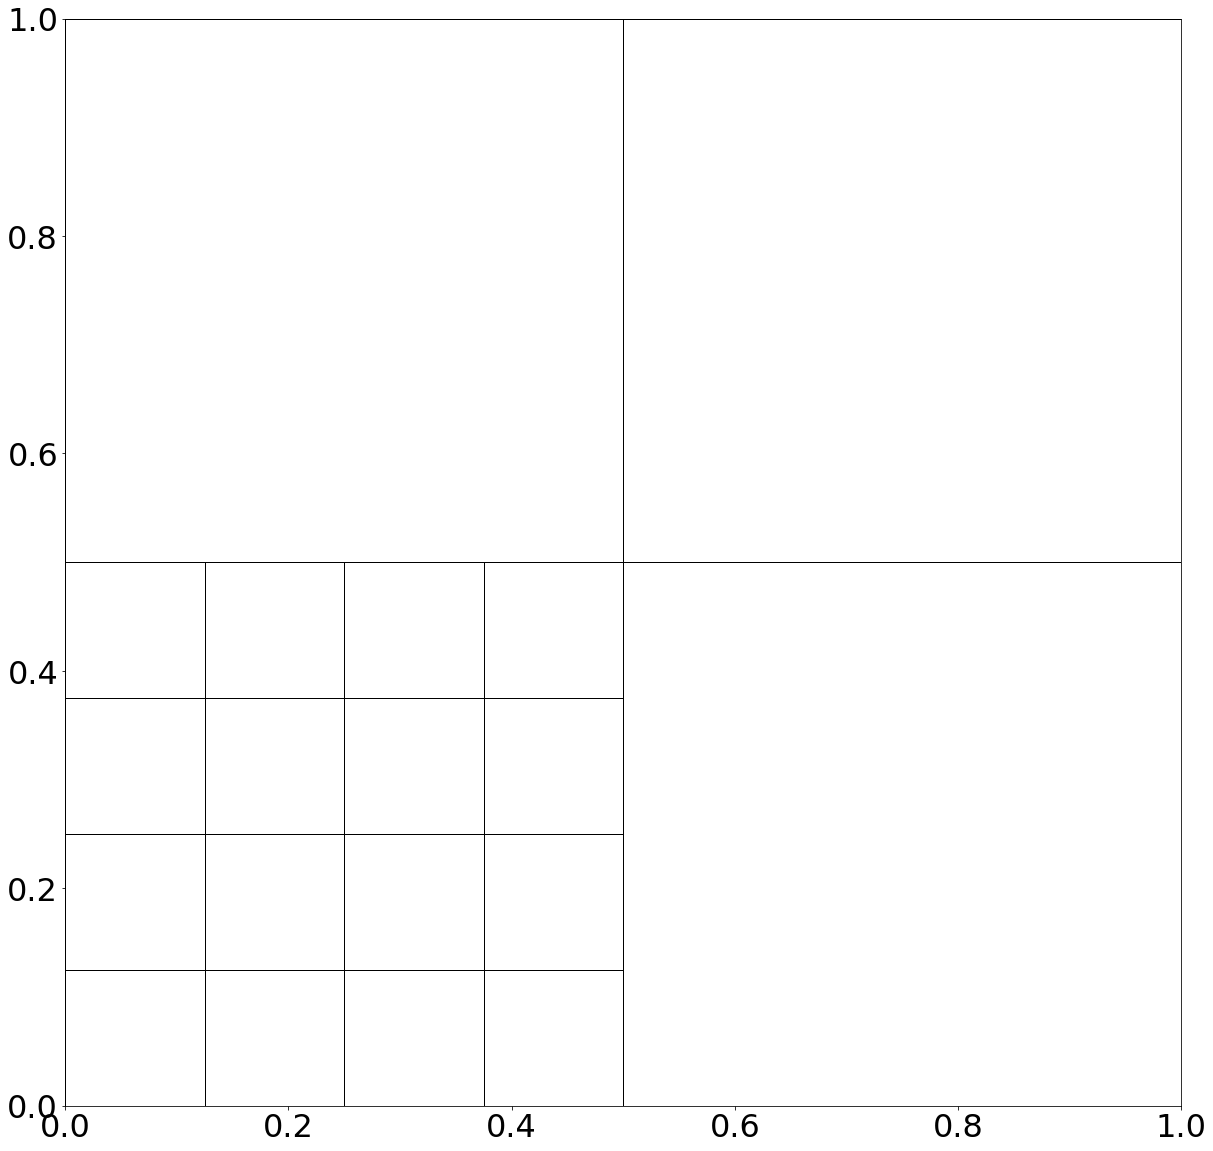

Combi Scheme:


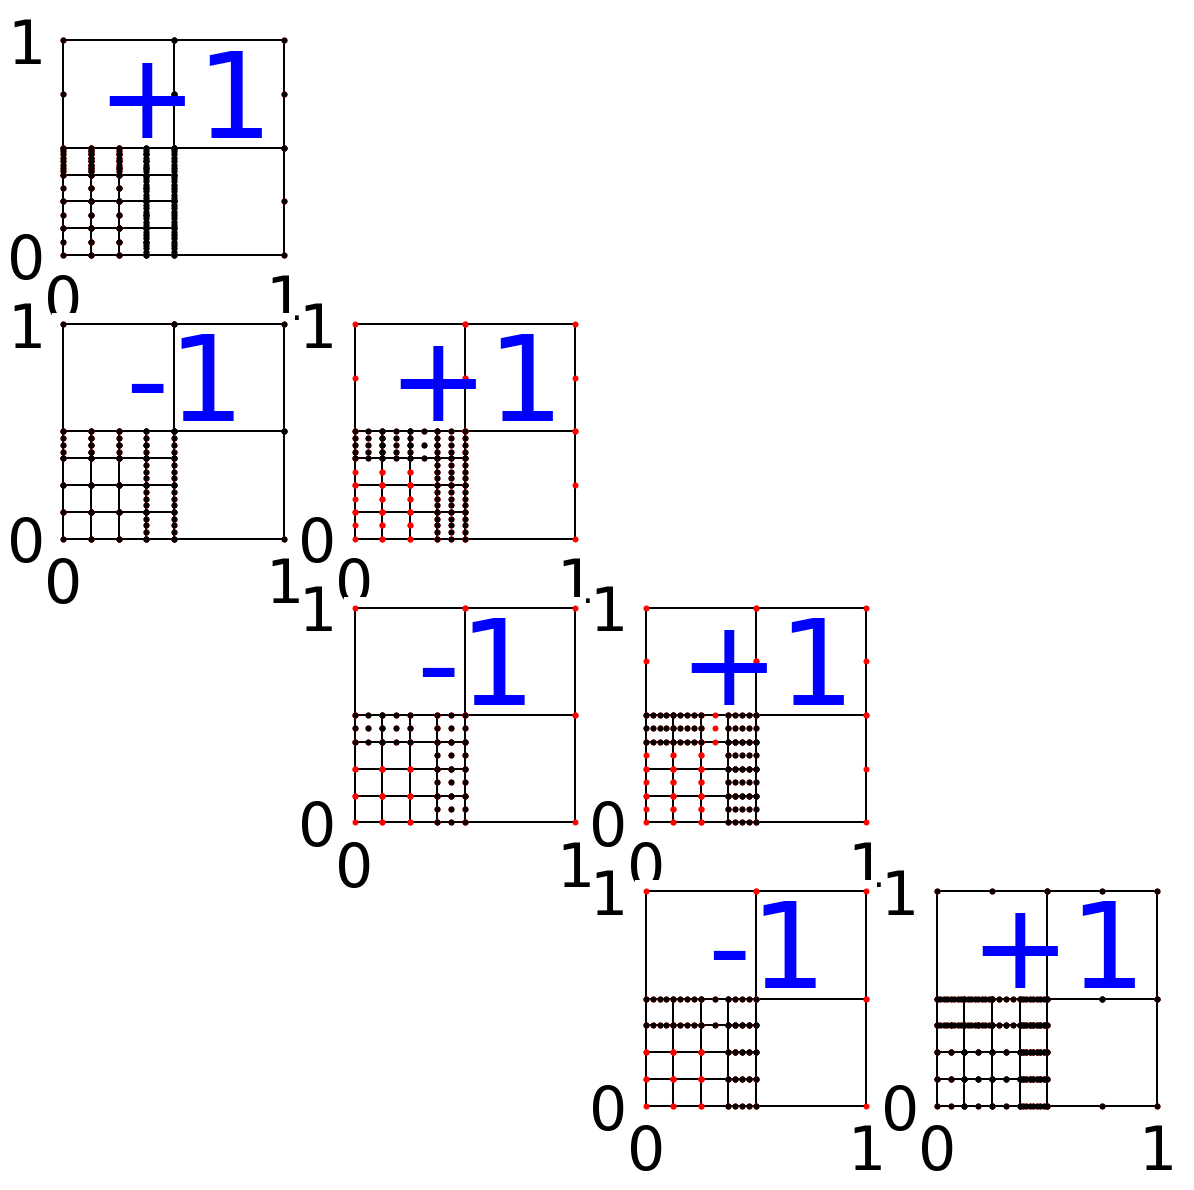

Resulting Sparse Grid:


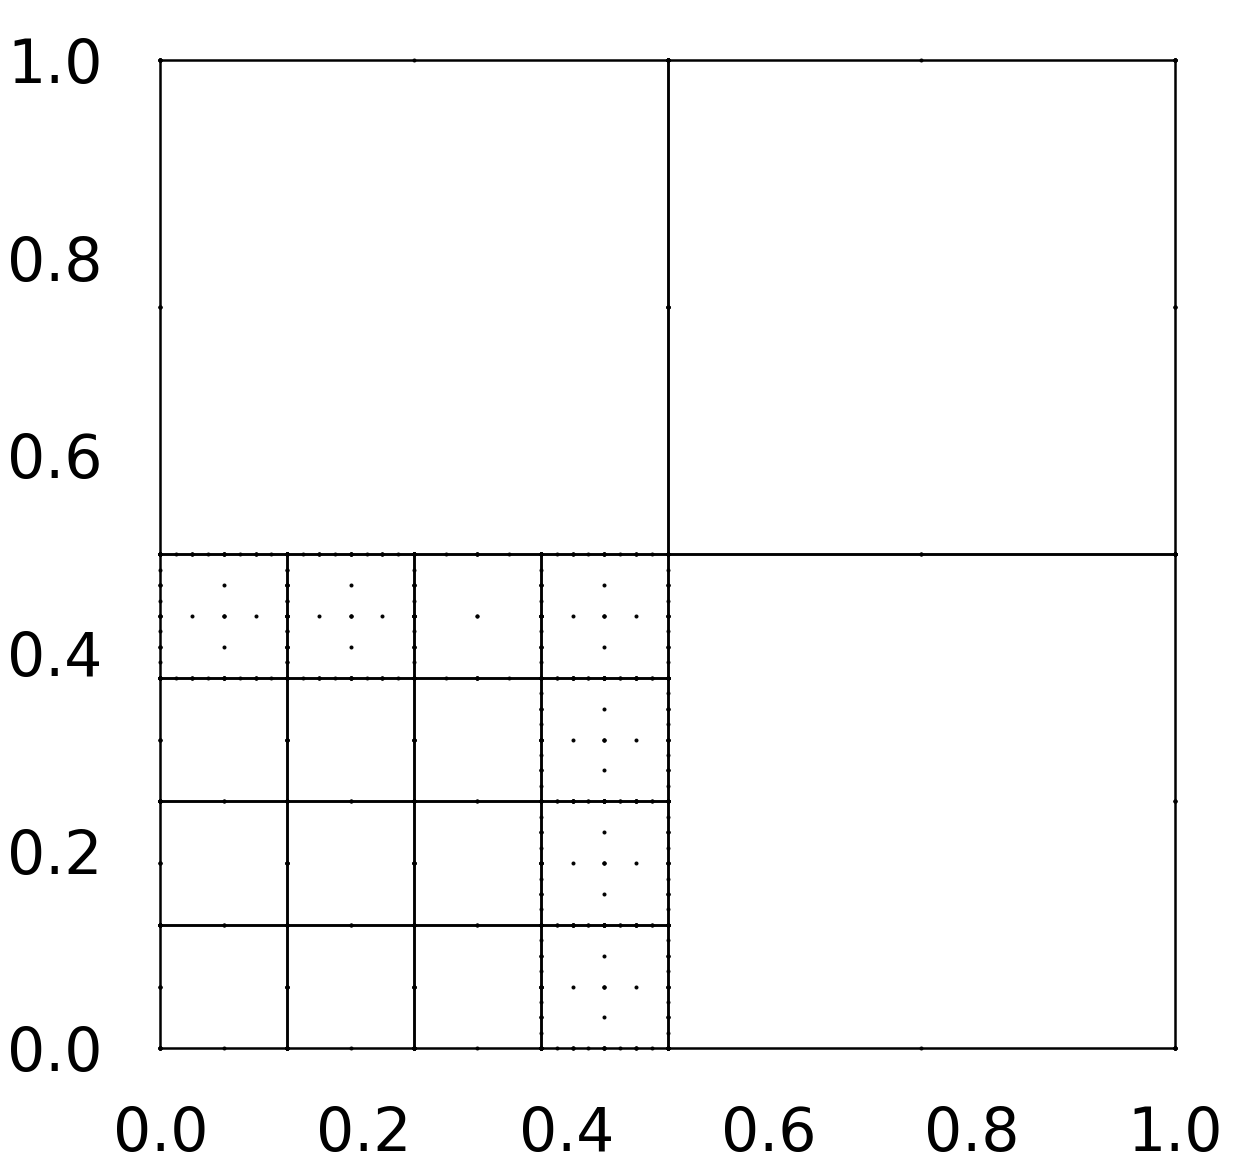

Curent number of function evaluations 233
max surplus error: 3.0609514232963365e-05 total surplus error: 0.0032112969531105646
combiintegral: 0.12140560723623725
Current error: 0.02375700942399392
Finished refinement
Refined  1  times
Refinement Graph:


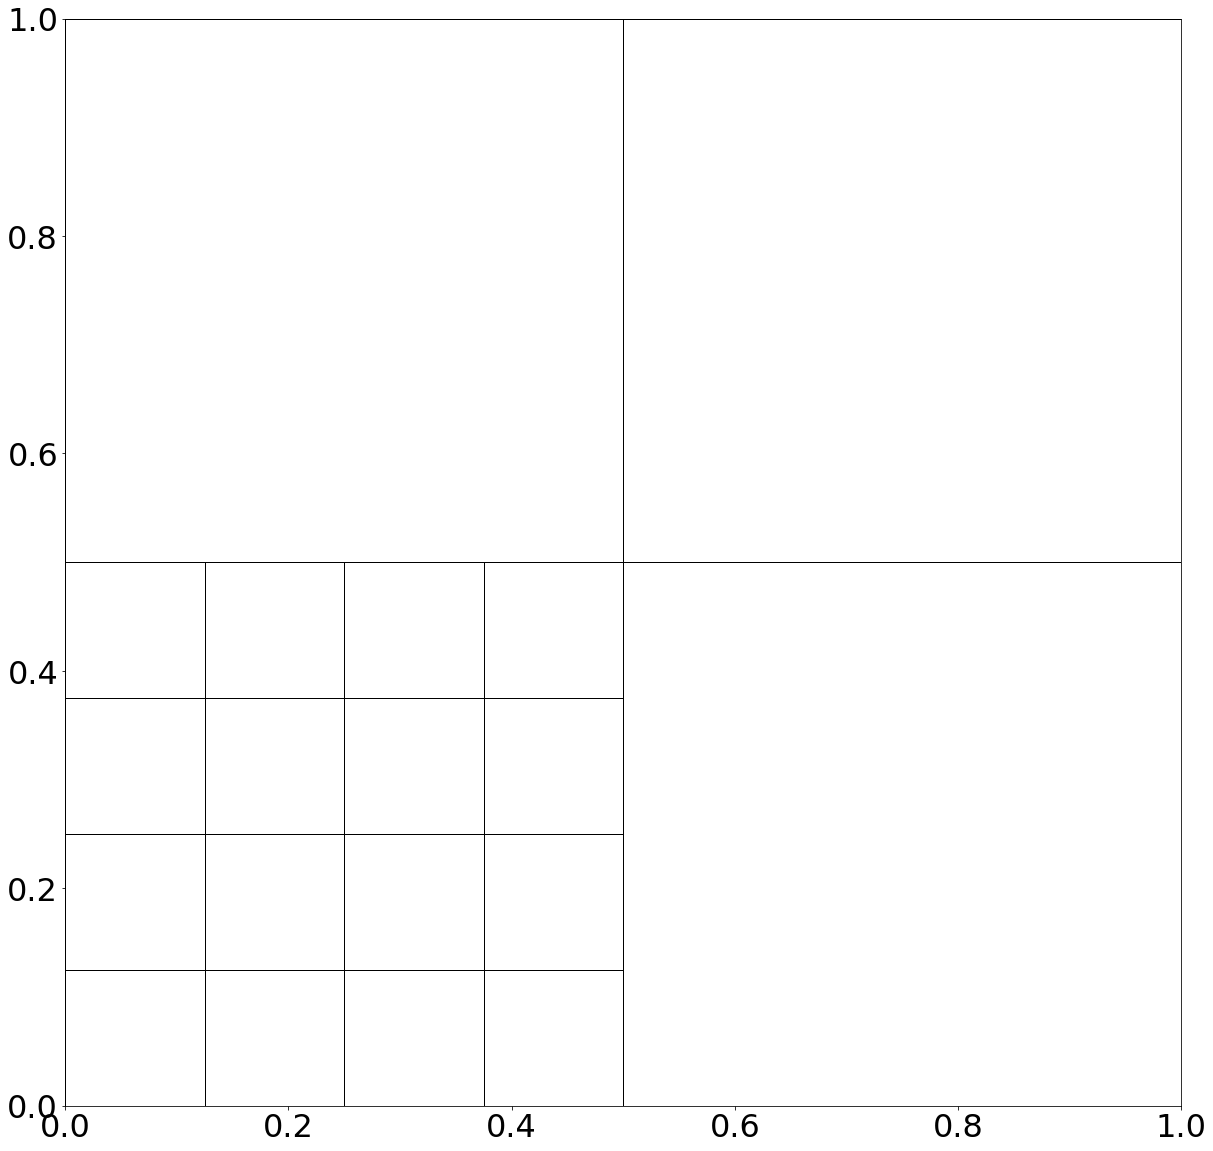

Combi Scheme:


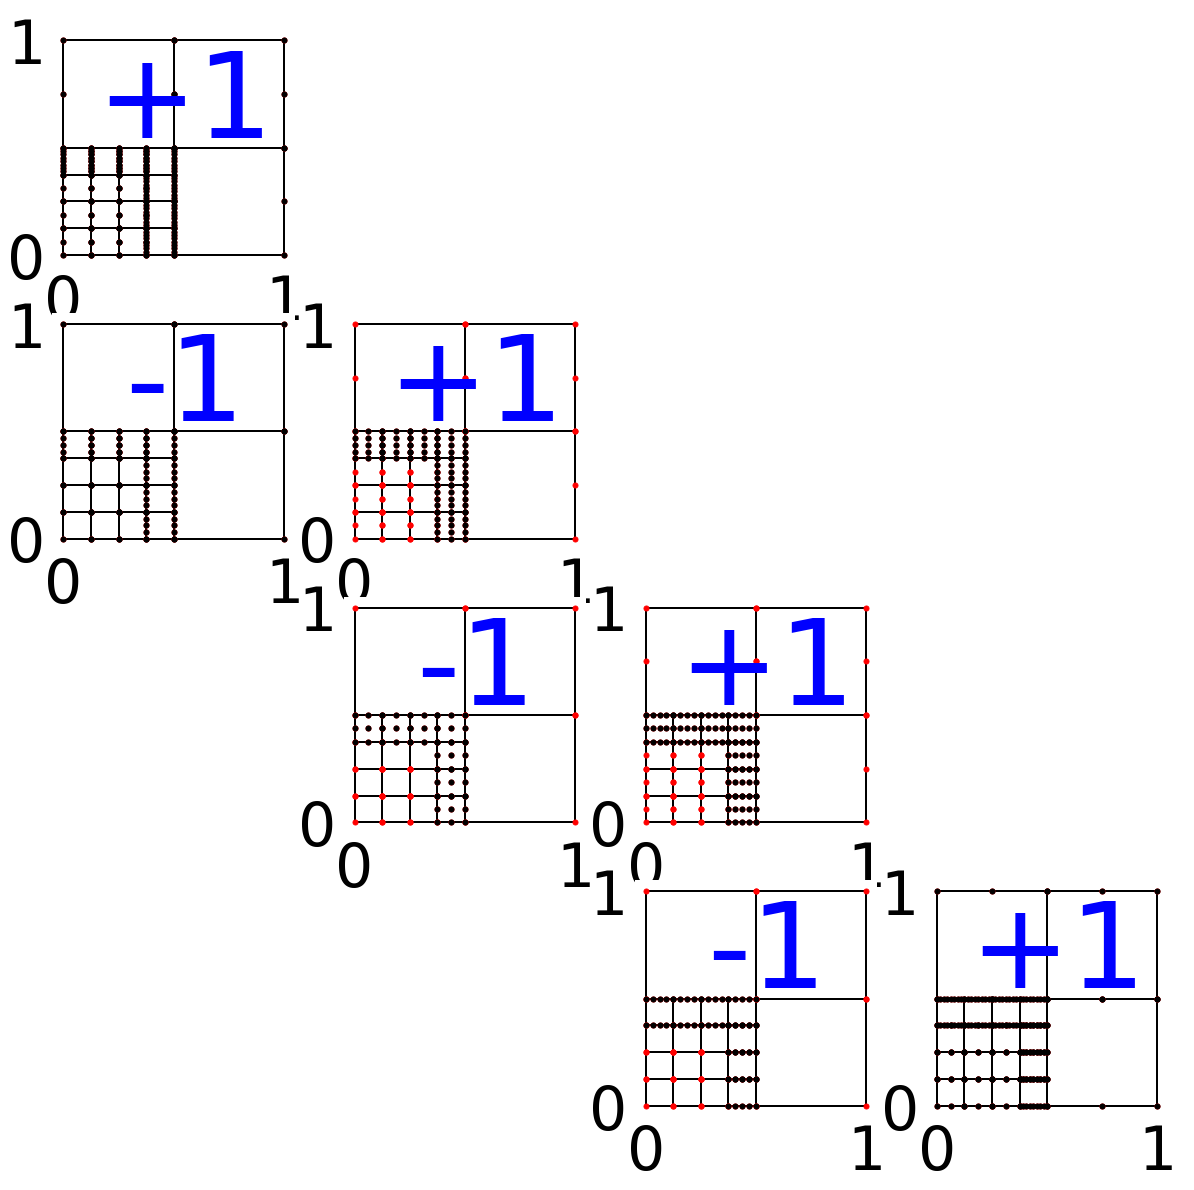

Resulting Sparse Grid:


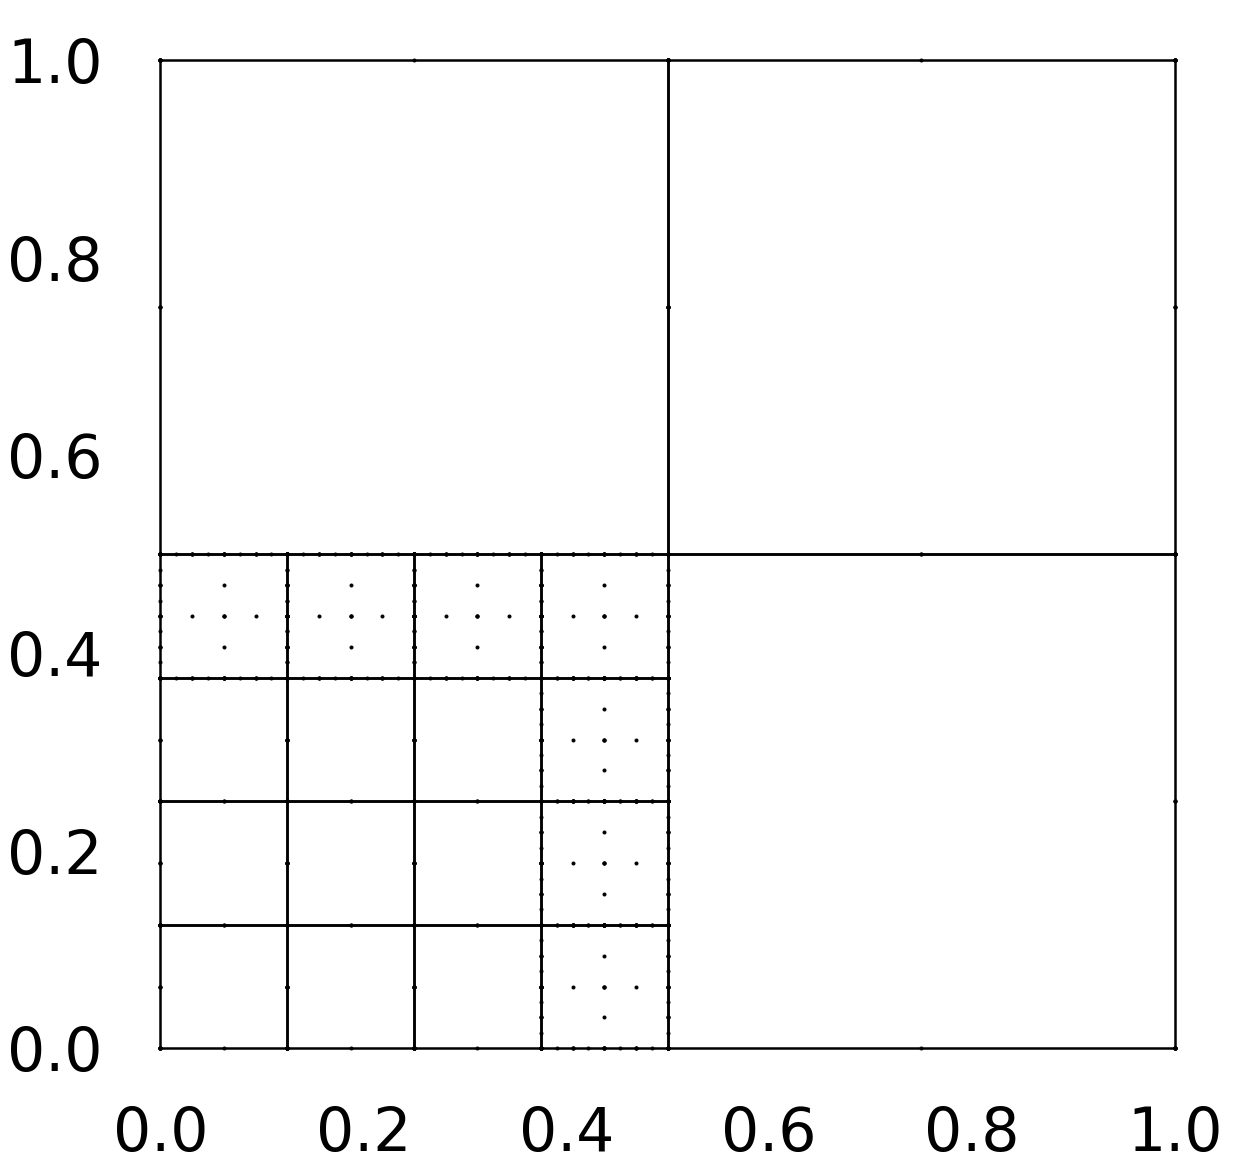

Curent number of function evaluations 245
max surplus error: 1.4026458715996763e-05 total surplus error: 0.0029521922003248606
combiintegral: 0.12166686422541191
Current error: 0.021656197853367996
New scheme
0 [1, 5] 1.0
1 [2, 4] 1.0
2 [3, 3] 1.0
3 [4, 2] 1.0
4 [5, 1] 1.0
5 [1, 4] -1.0
6 [2, 3] -1.0
7 [3, 2] -1.0
8 [4, 1] -1.0
Finished refinement
Refined  2  times
Refinement Graph:


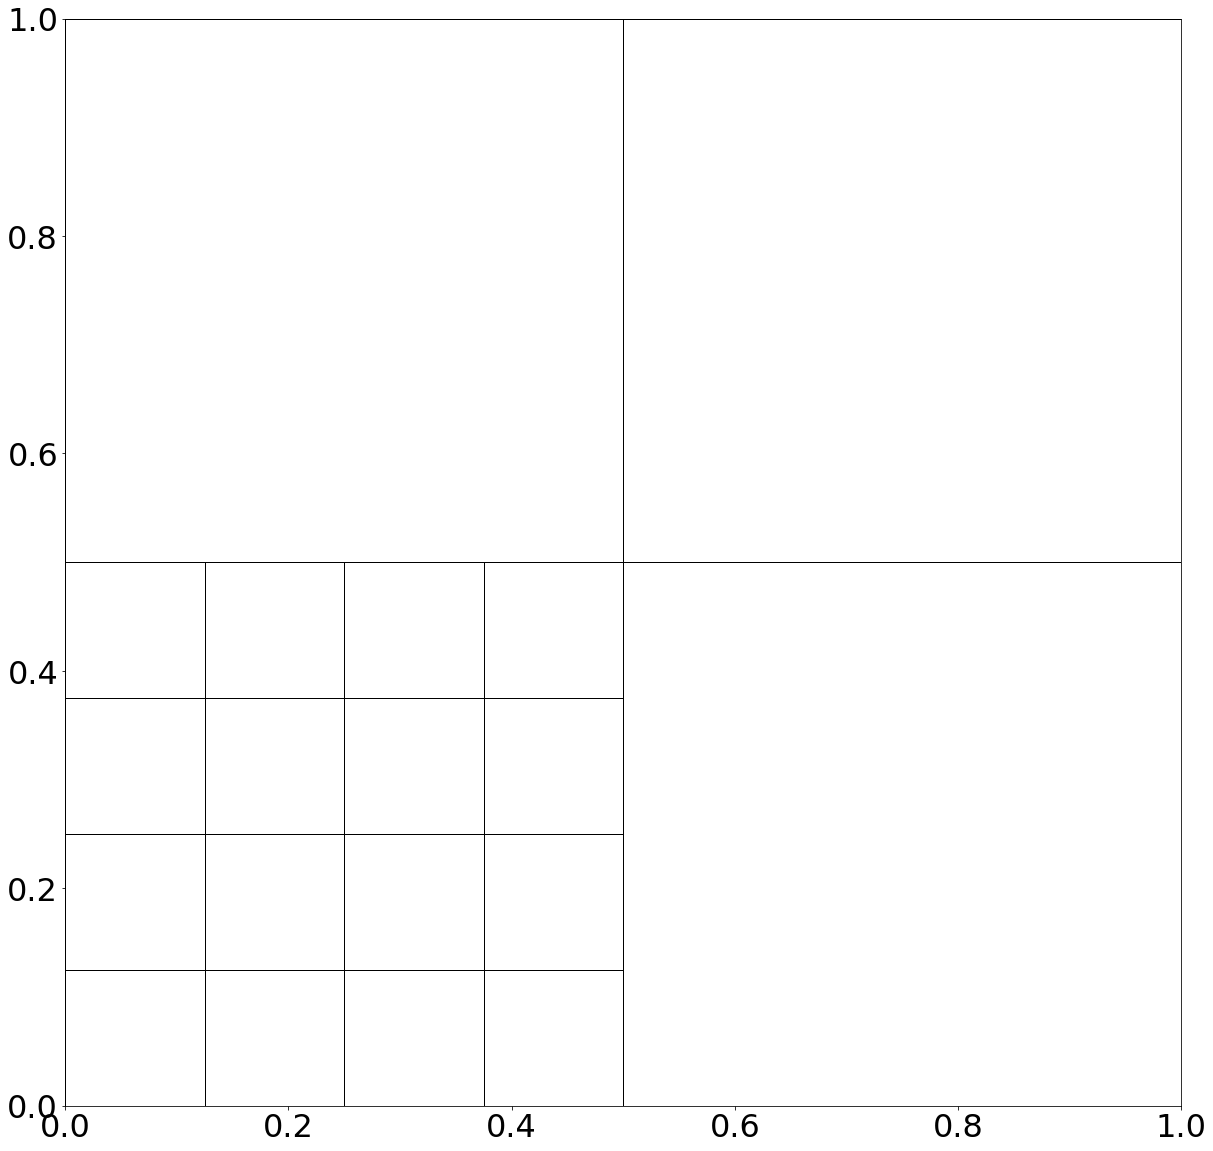

Combi Scheme:


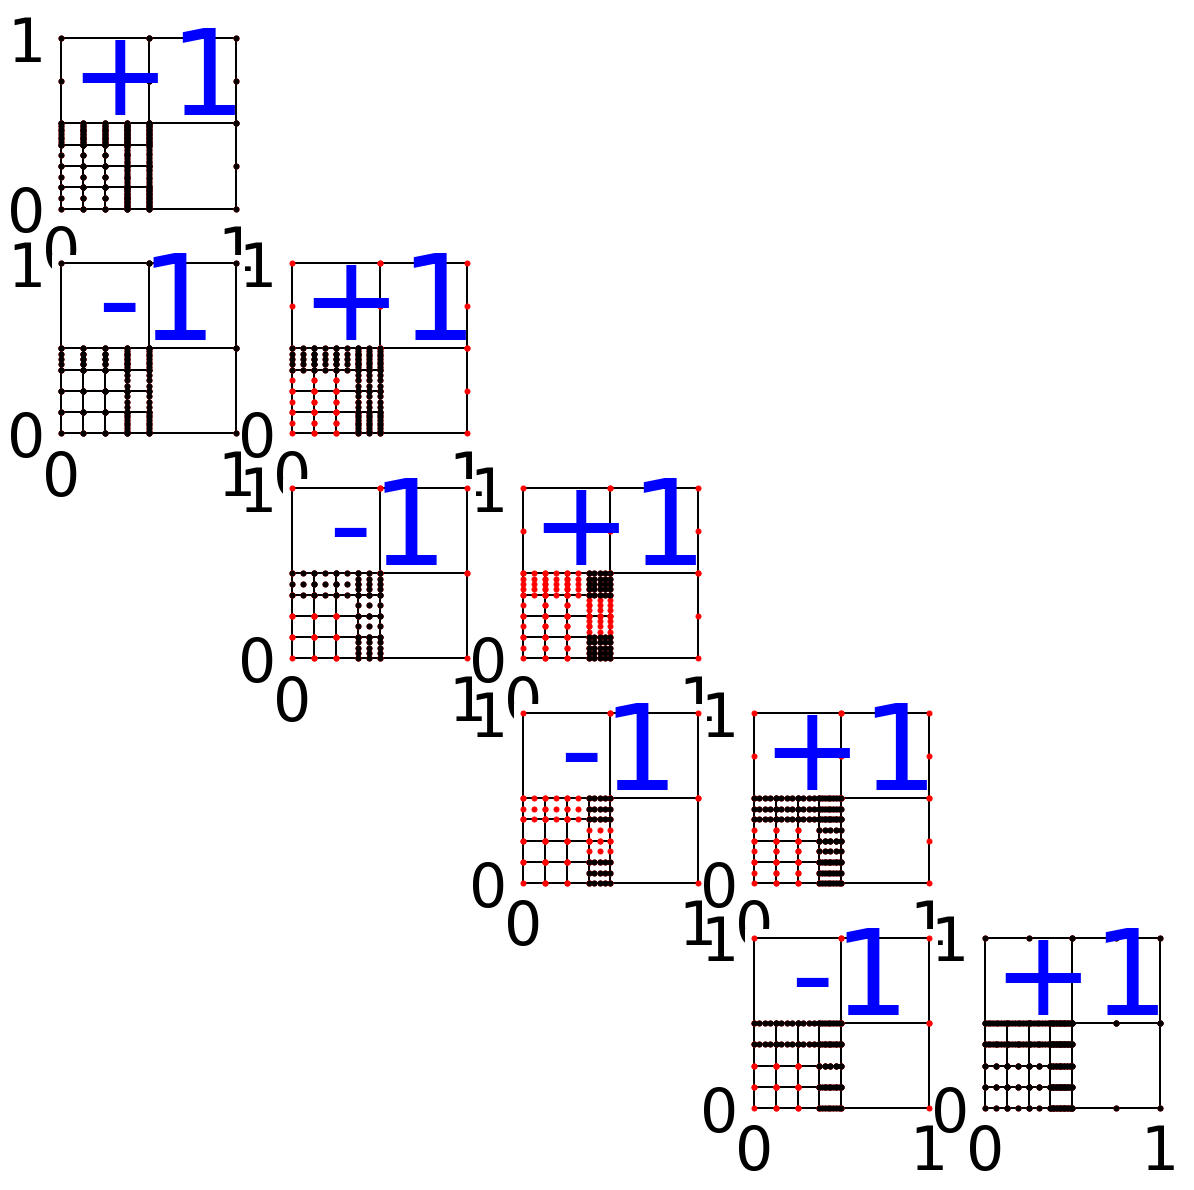

Resulting Sparse Grid:


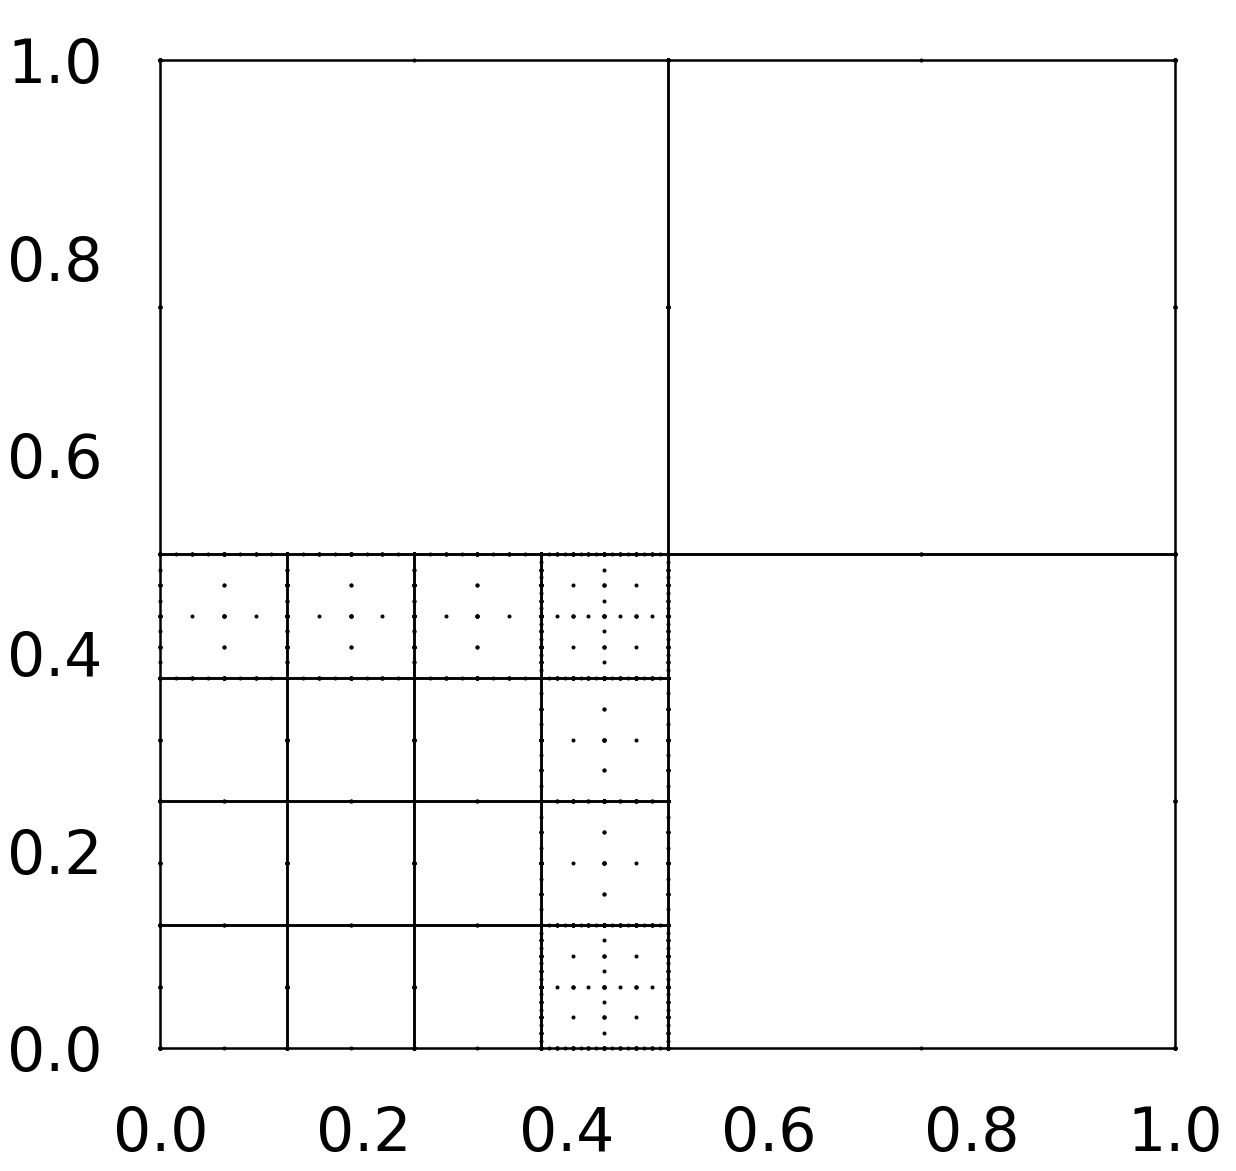

Curent number of function evaluations 333
max surplus error: 1.0923817031736893e-05 total surplus error: 0.00250847036322994
combiintegral: 0.1222191102775234
Current error: 0.017215494085888357
Finished refinement
Refined  1  times
Refinement Graph:


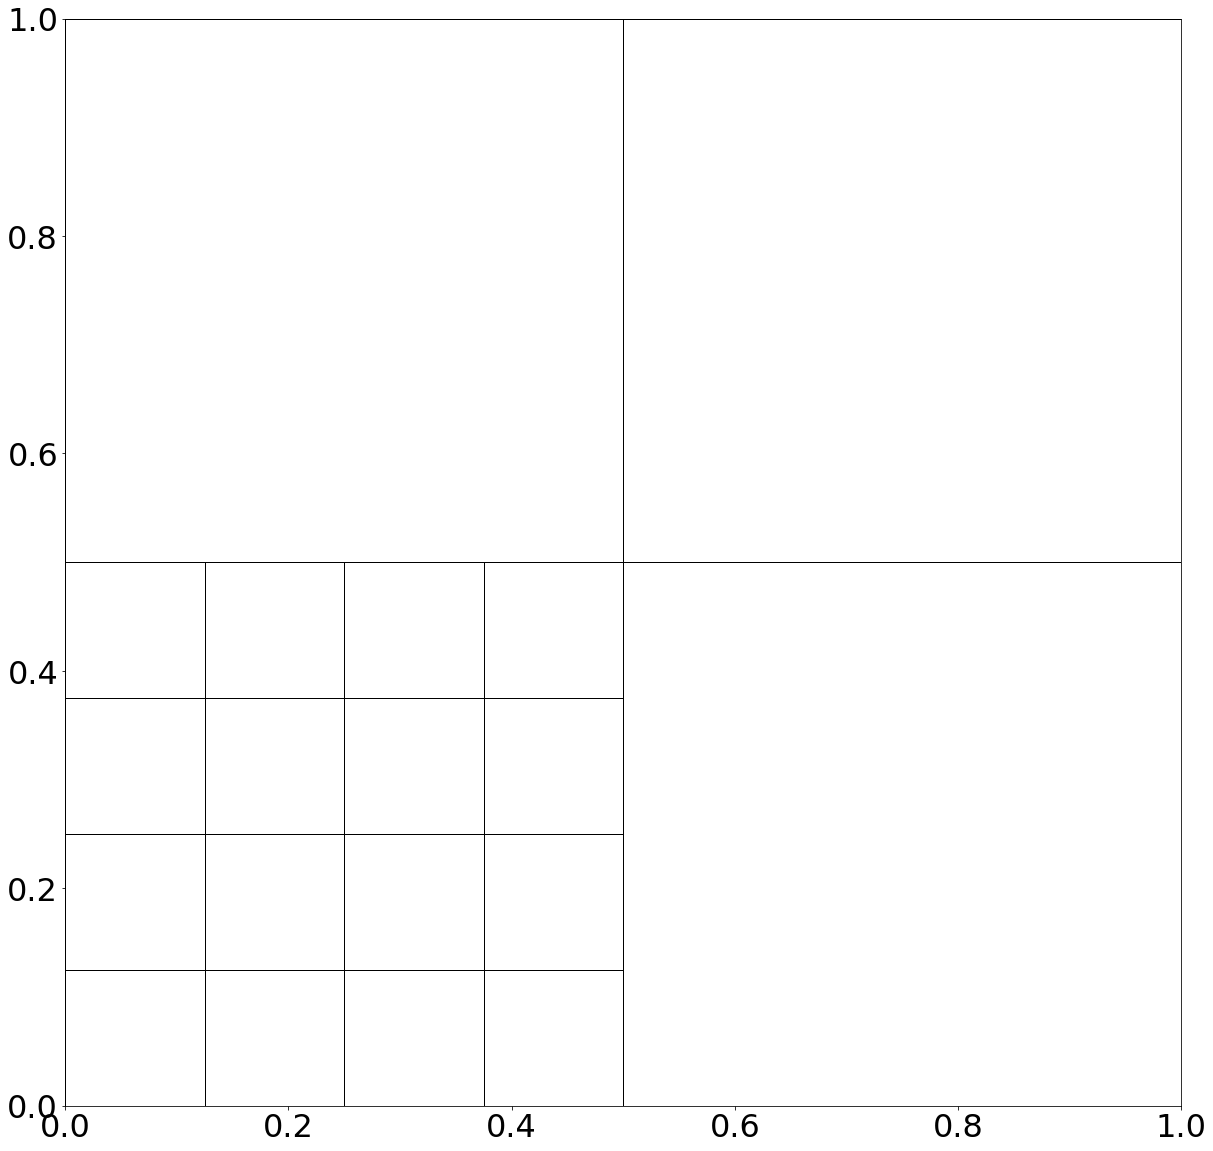

Combi Scheme:


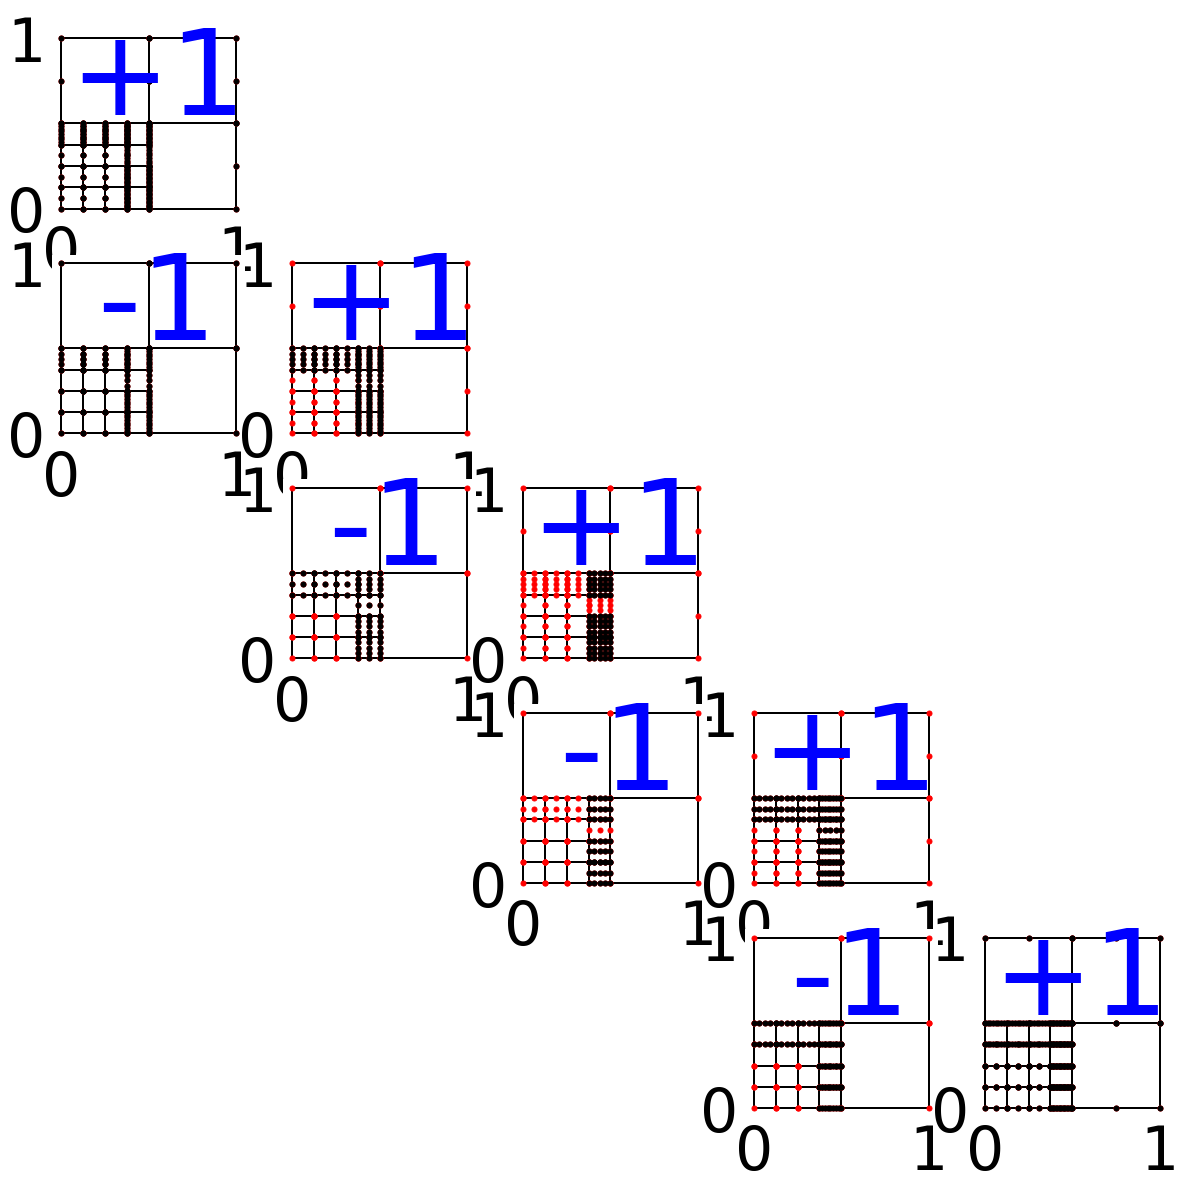

Resulting Sparse Grid:


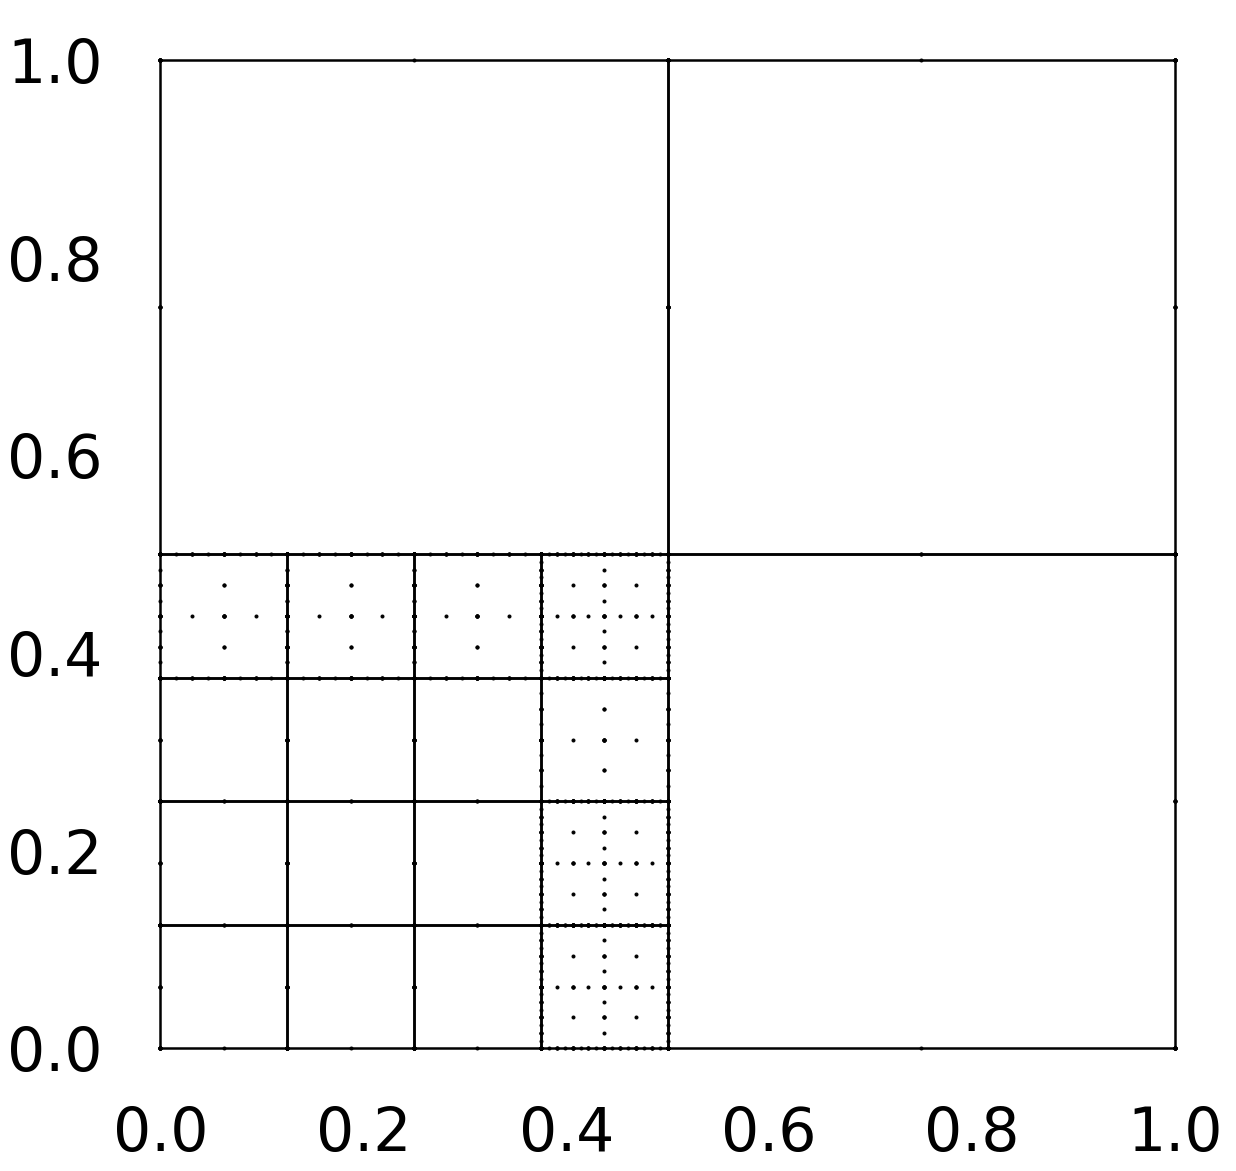

Curent number of function evaluations 369
max surplus error: 9.066503091556684e-06 total surplus error: 0.002306312026252588
combiintegral: 0.12242113317072029
Current error: 0.015590993884381362
Finished refinement
Refined  3  times
Refinement Graph:


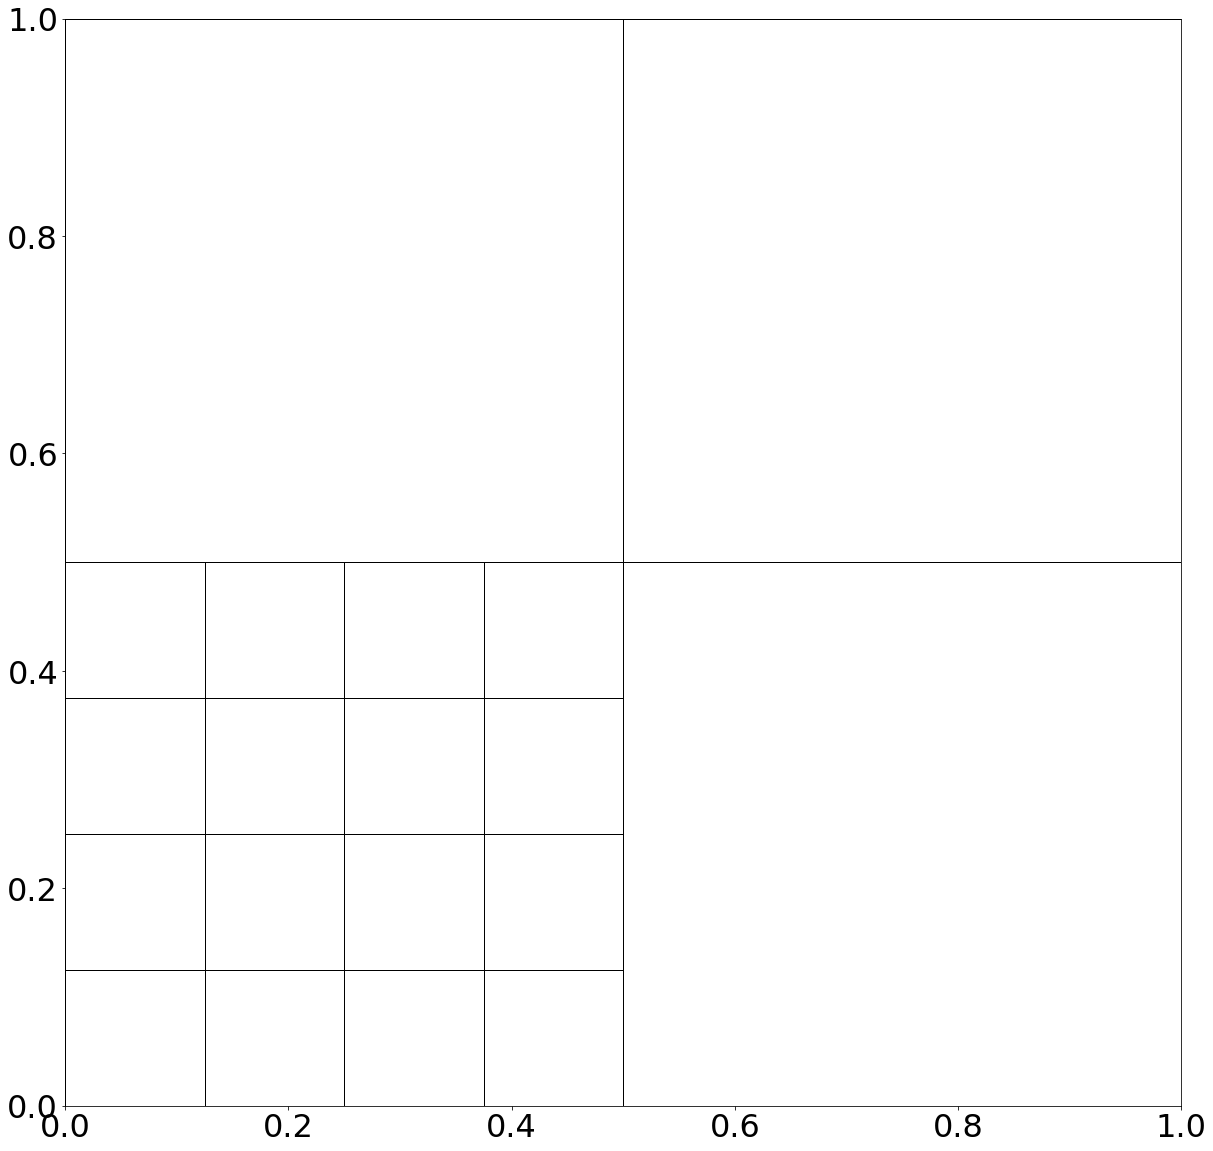

Combi Scheme:


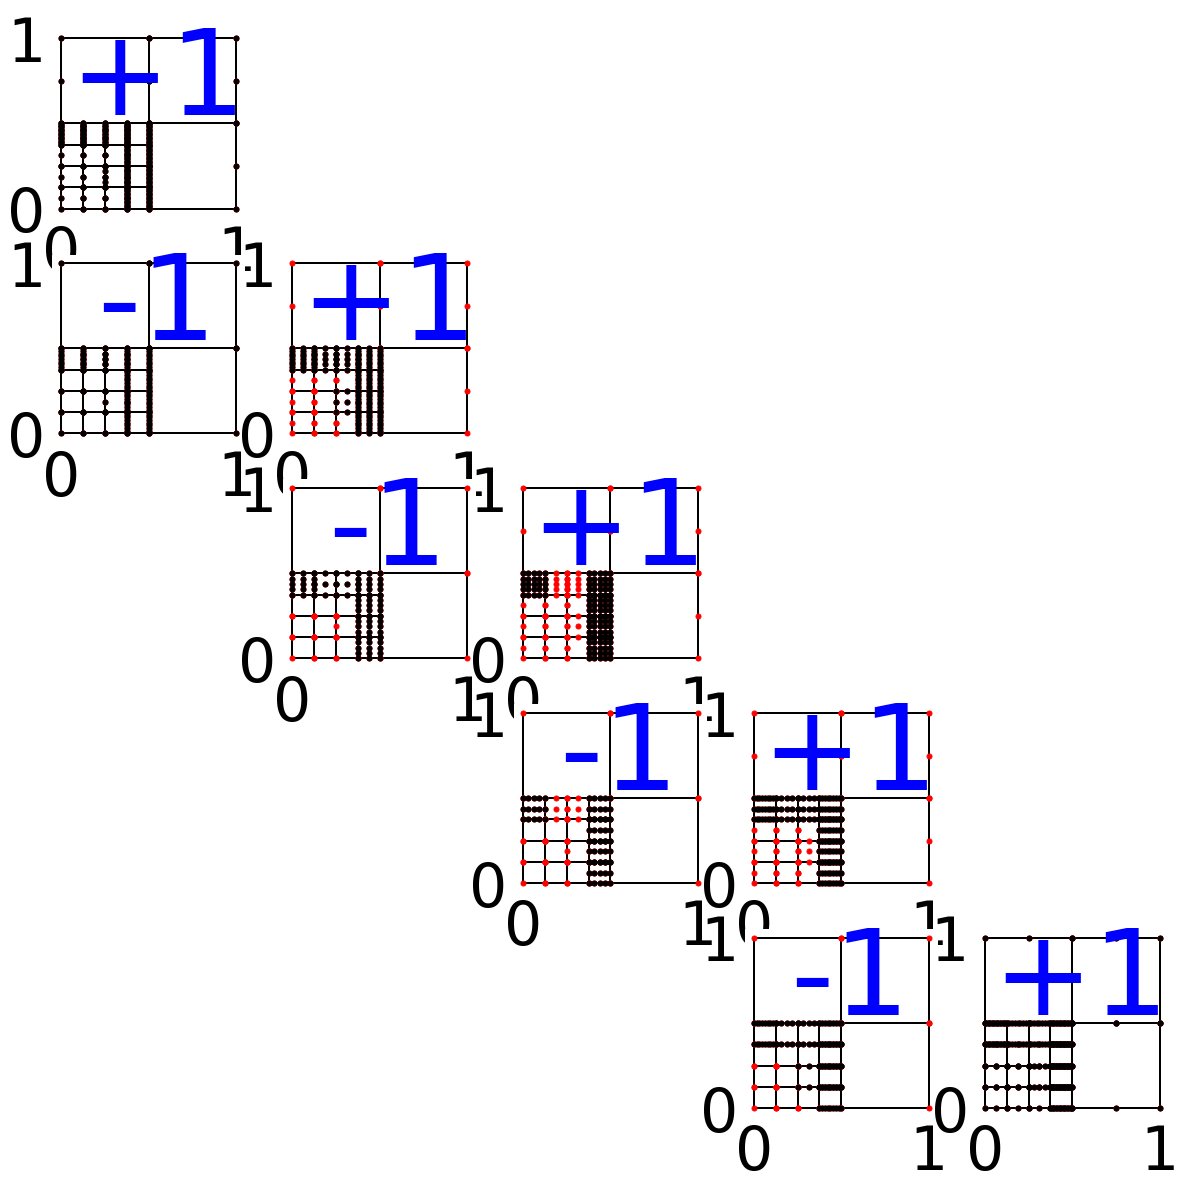

Resulting Sparse Grid:


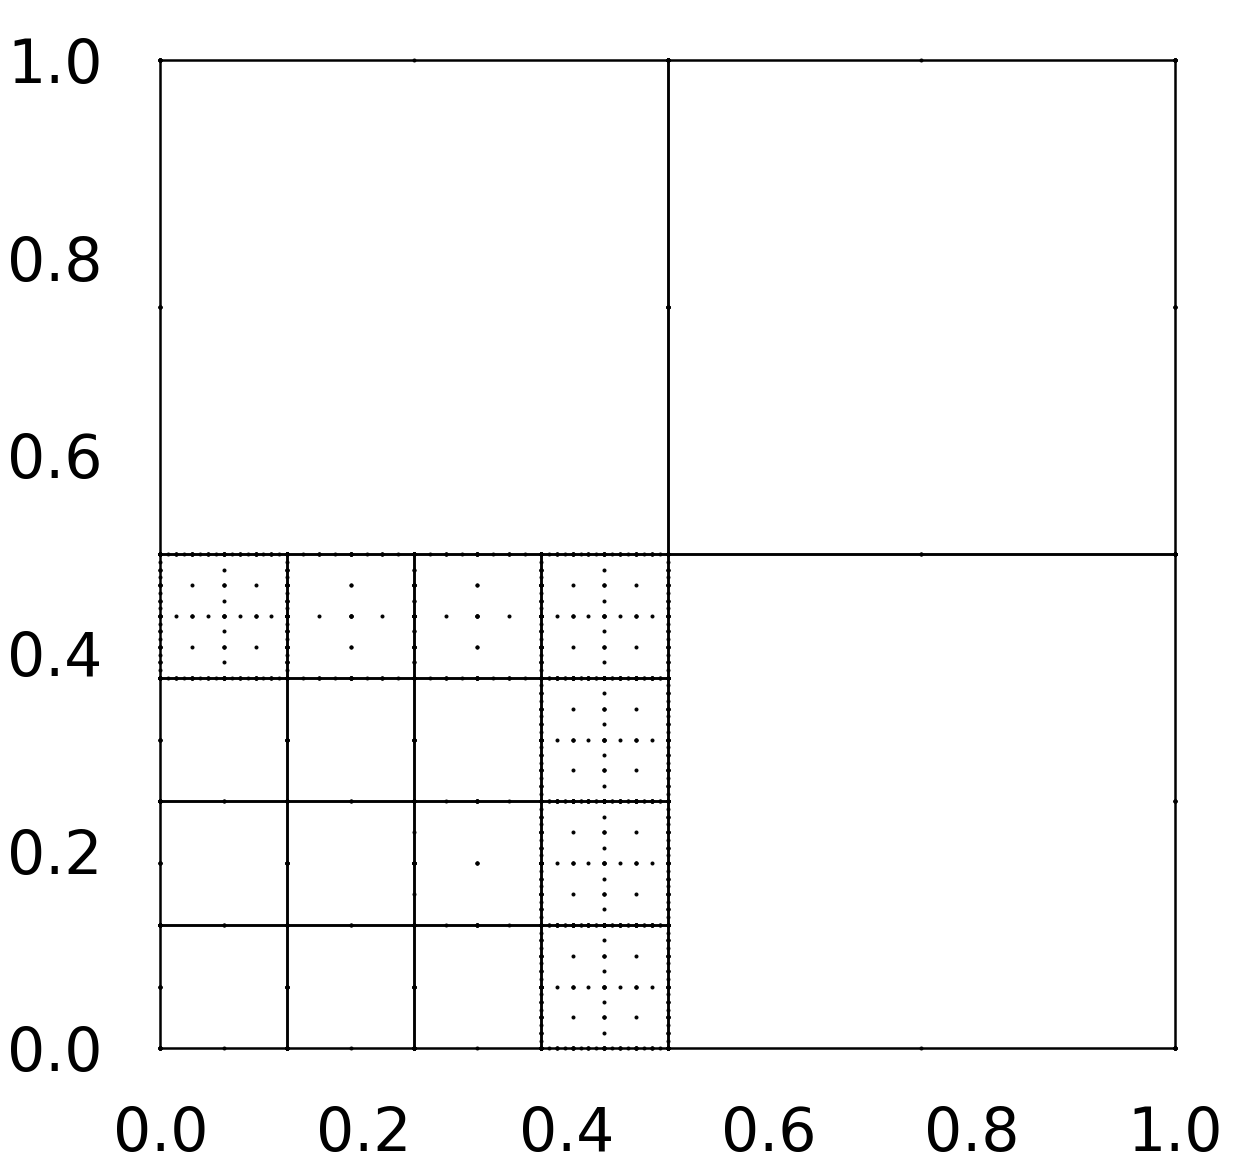

Curent number of function evaluations 448
max surplus error: 8.001160895572458e-06 total surplus error: 0.001924100934775796
combiintegral: 0.12273693384876122
Current error: 0.013051587300328705
Finished refinement
Refined  1  times
Refinement Graph:


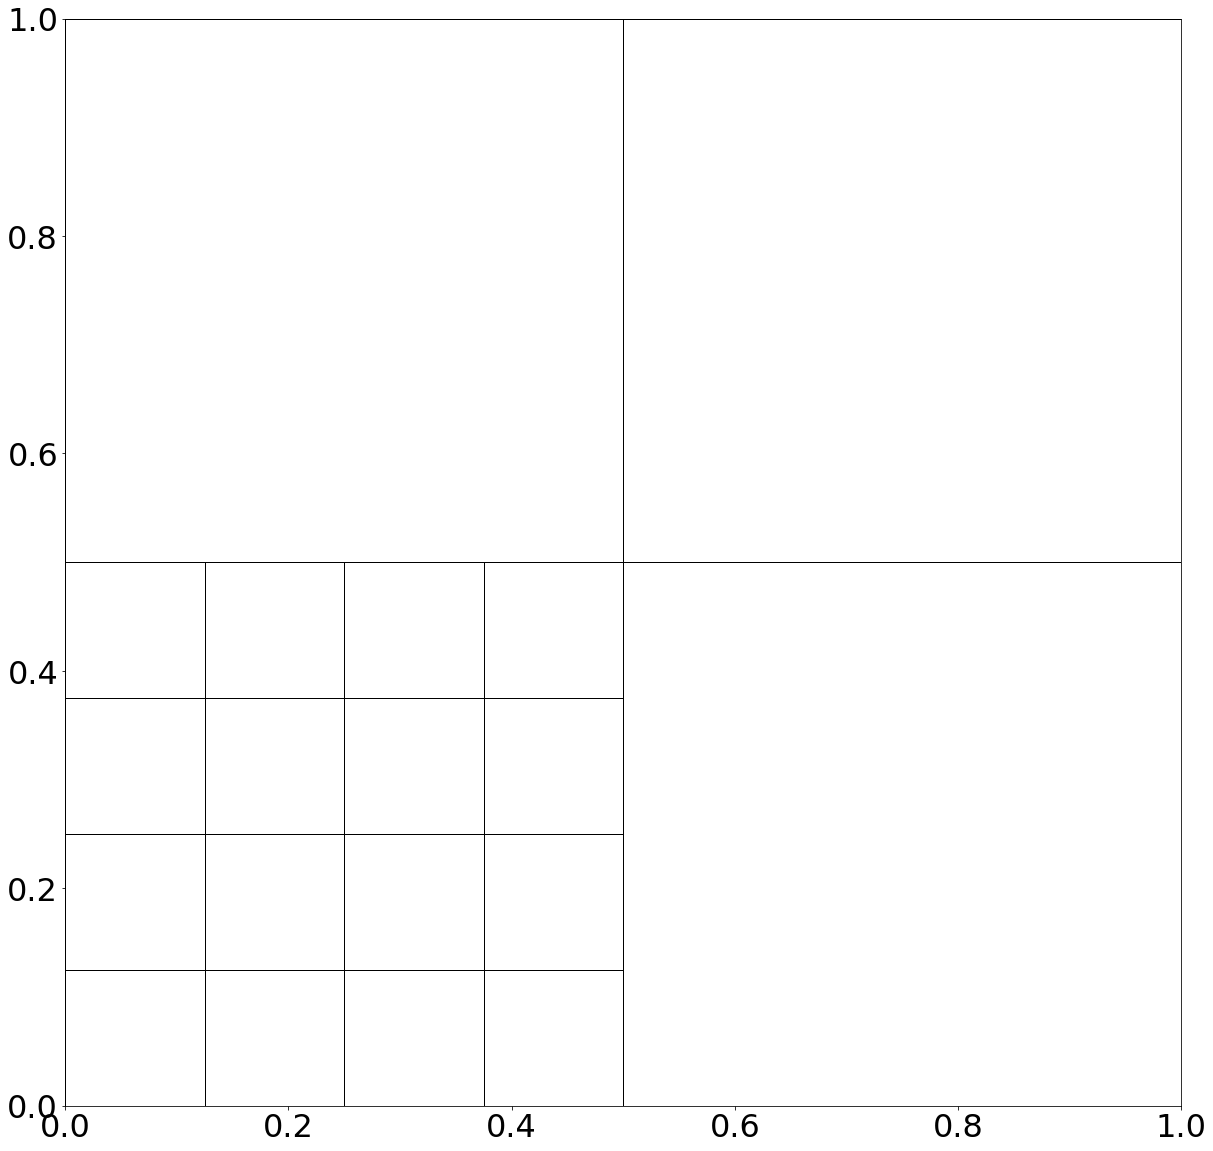

Combi Scheme:


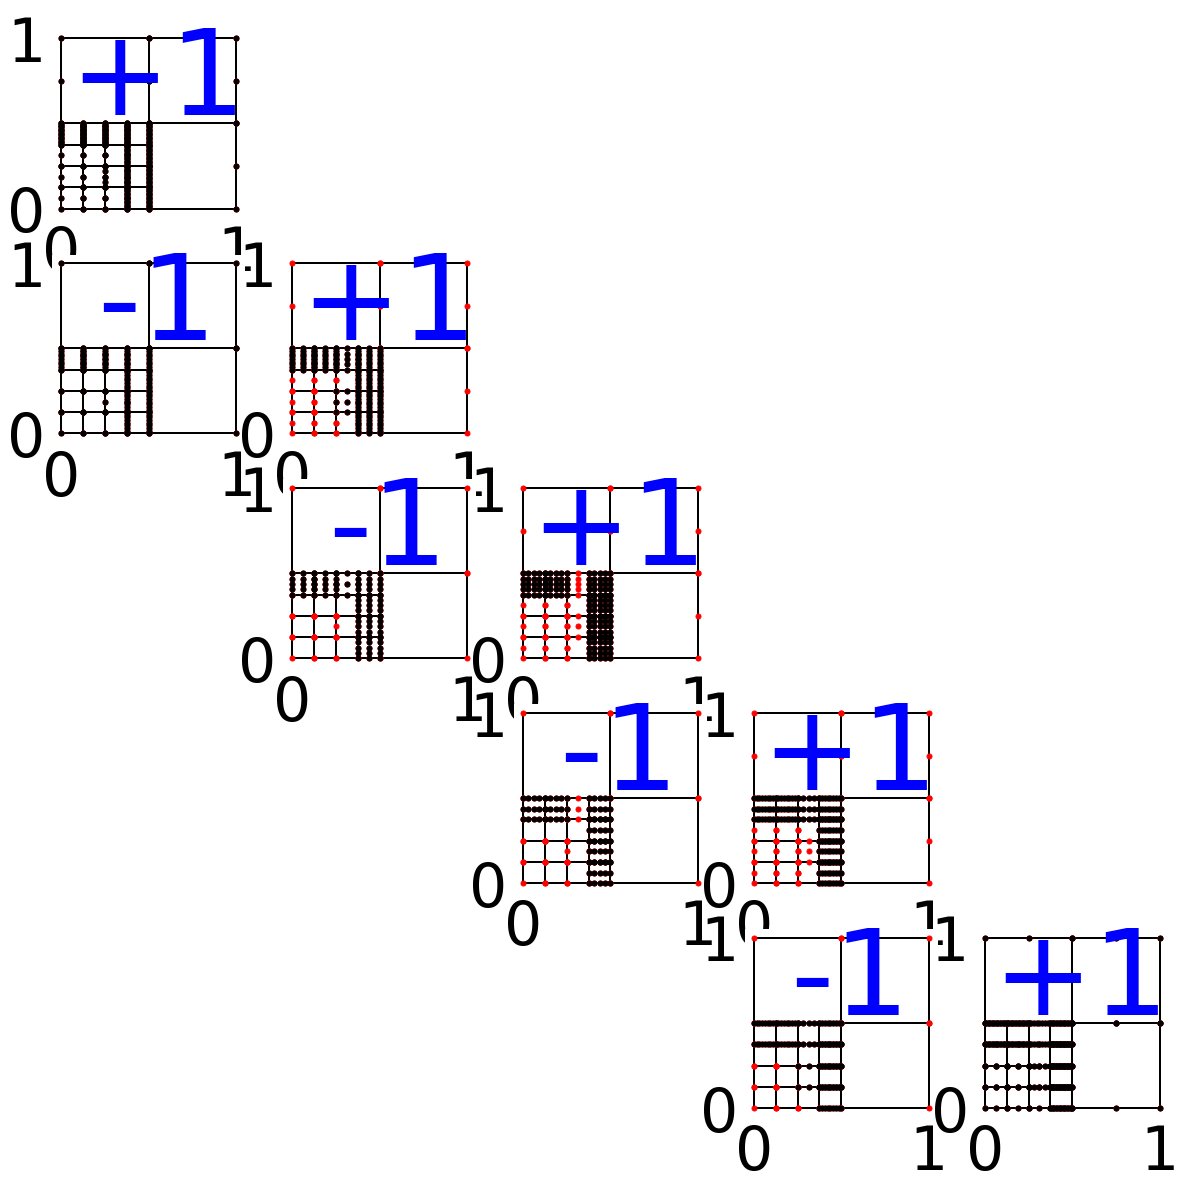

Resulting Sparse Grid:


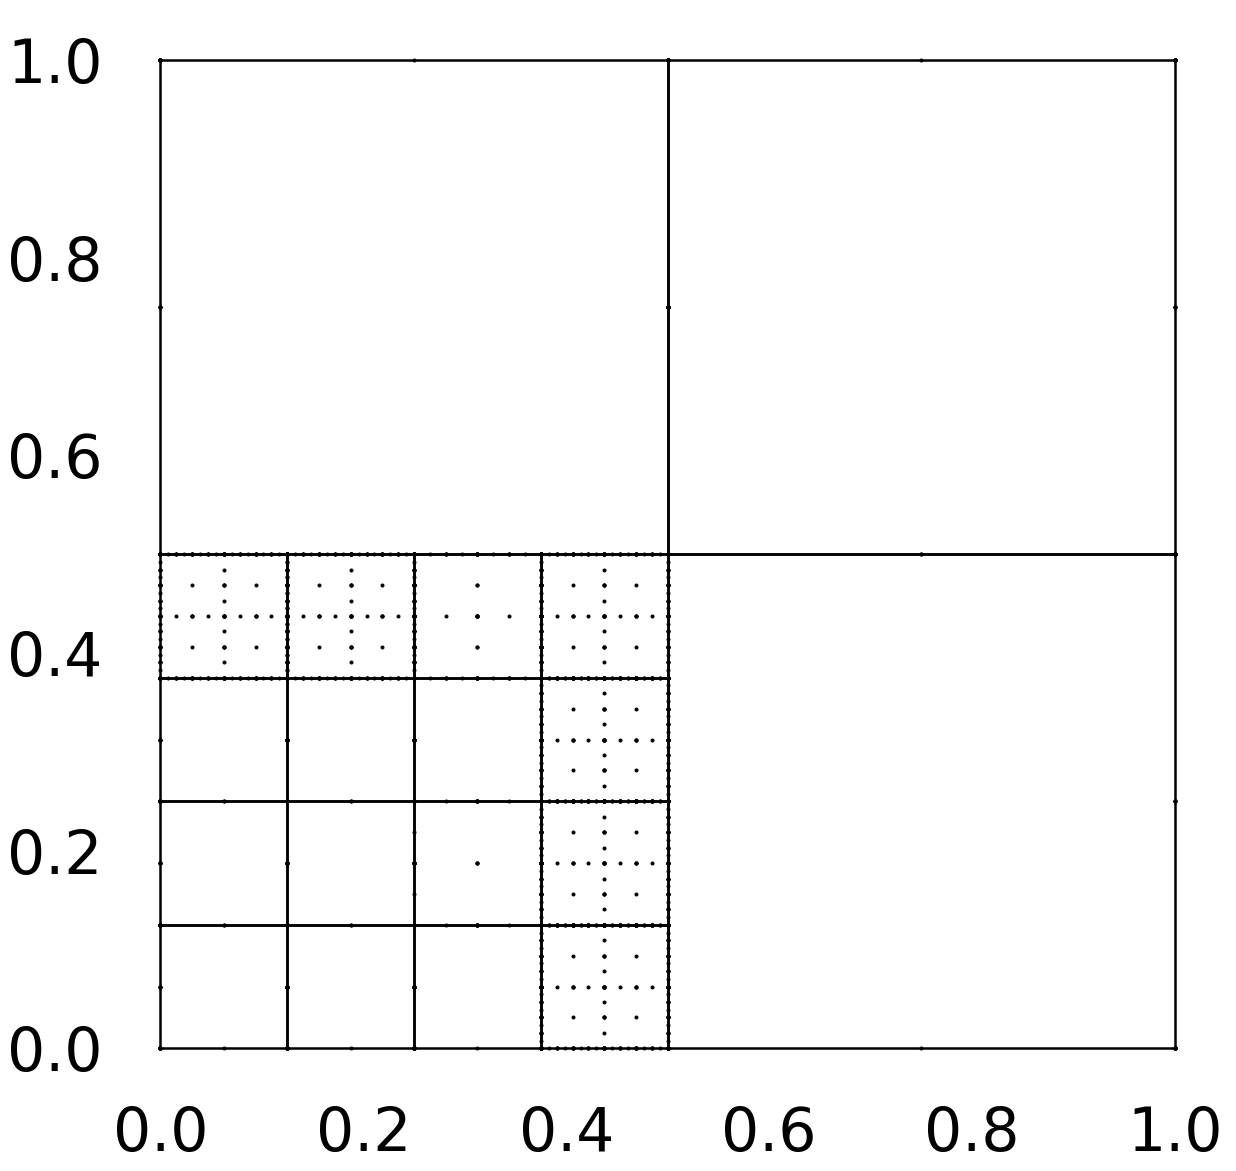

Curent number of function evaluations 484
max surplus error: 7.060999707423601e-06 total surplus error: 0.0017763831598496533
combiintegral: 0.12288525902697126
Current error: 0.011858879493417272
Finished refinement
Refined  2  times
Refinement Graph:


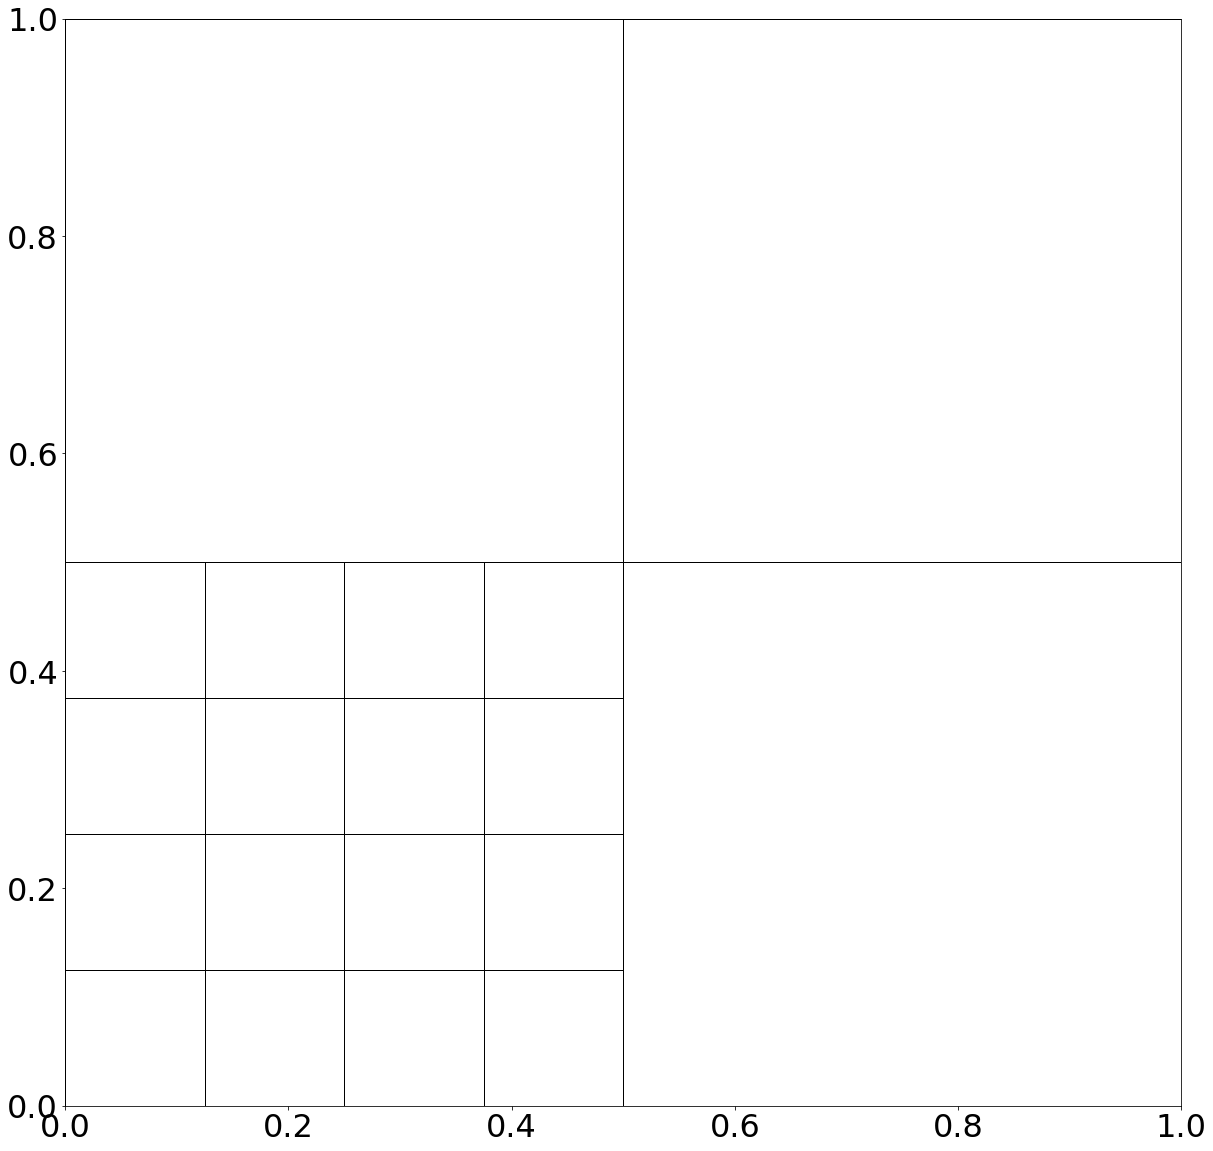

Combi Scheme:


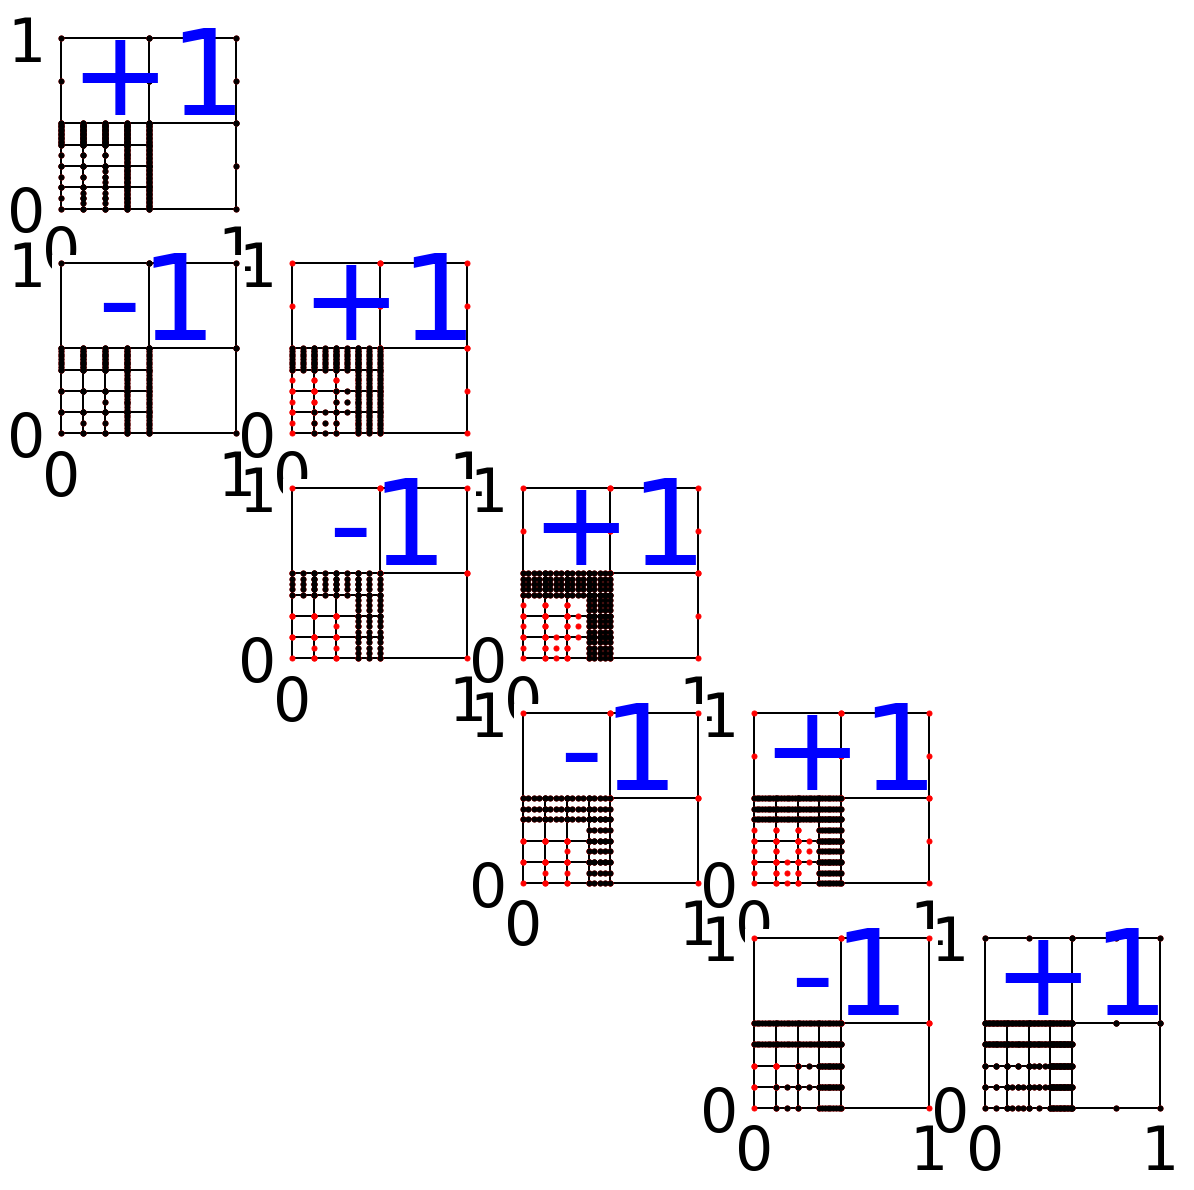

Resulting Sparse Grid:


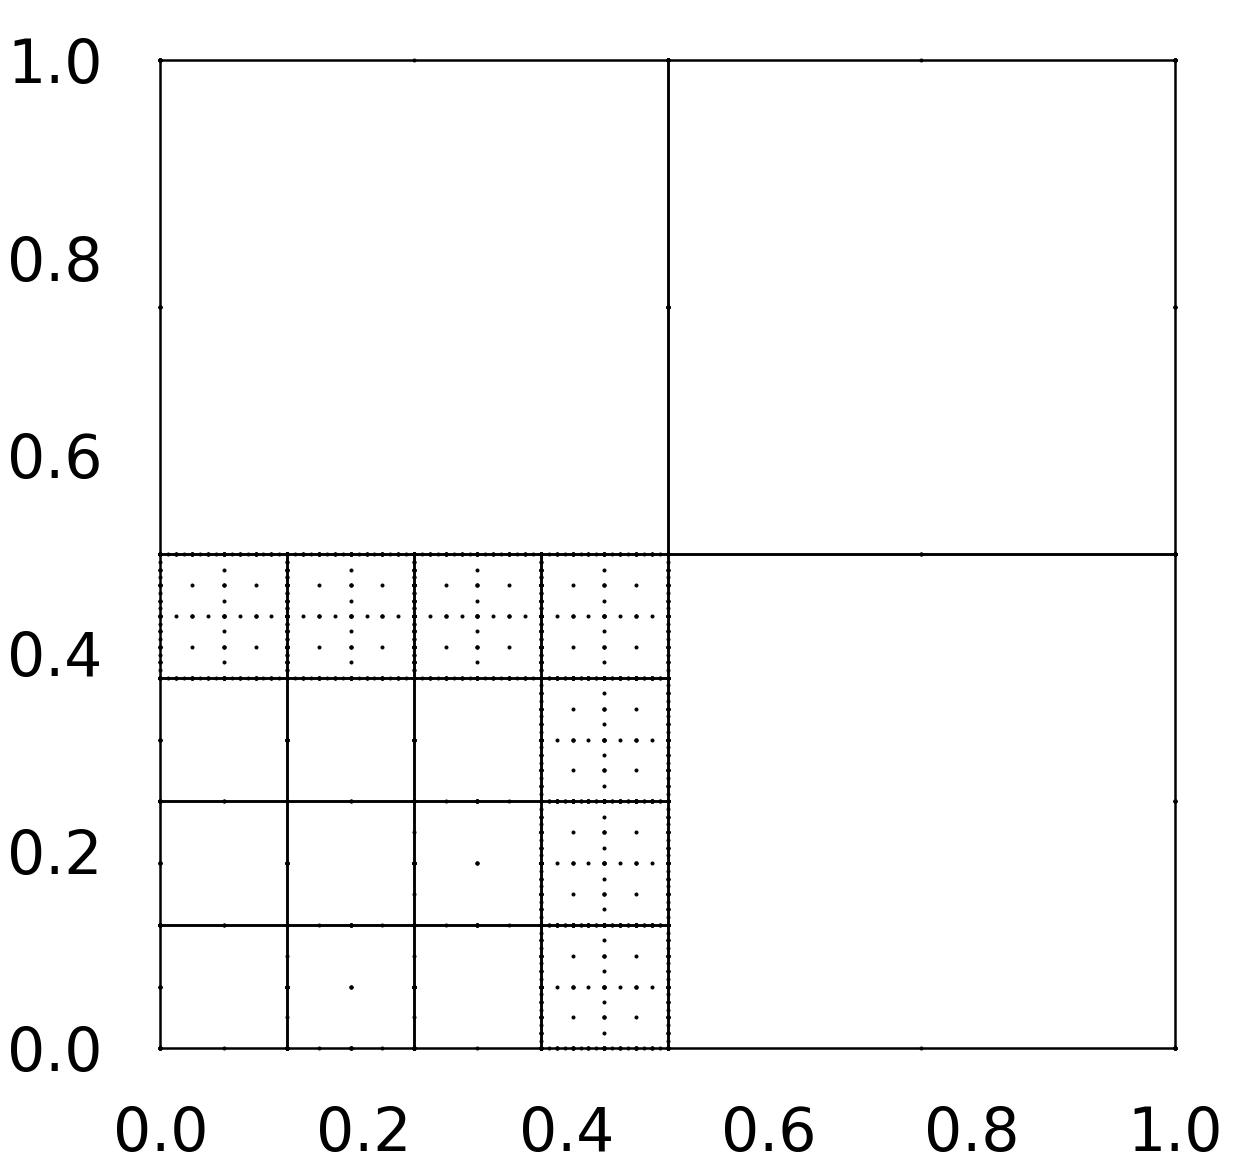

Curent number of function evaluations 521
max surplus error: 6.1010093673861e-06 total surplus error: 0.0016046095743813683
combiintegral: 0.12300217400739172
Current error: 0.010918746391436954
Finished refinement
Refined  1  times
Refinement Graph:


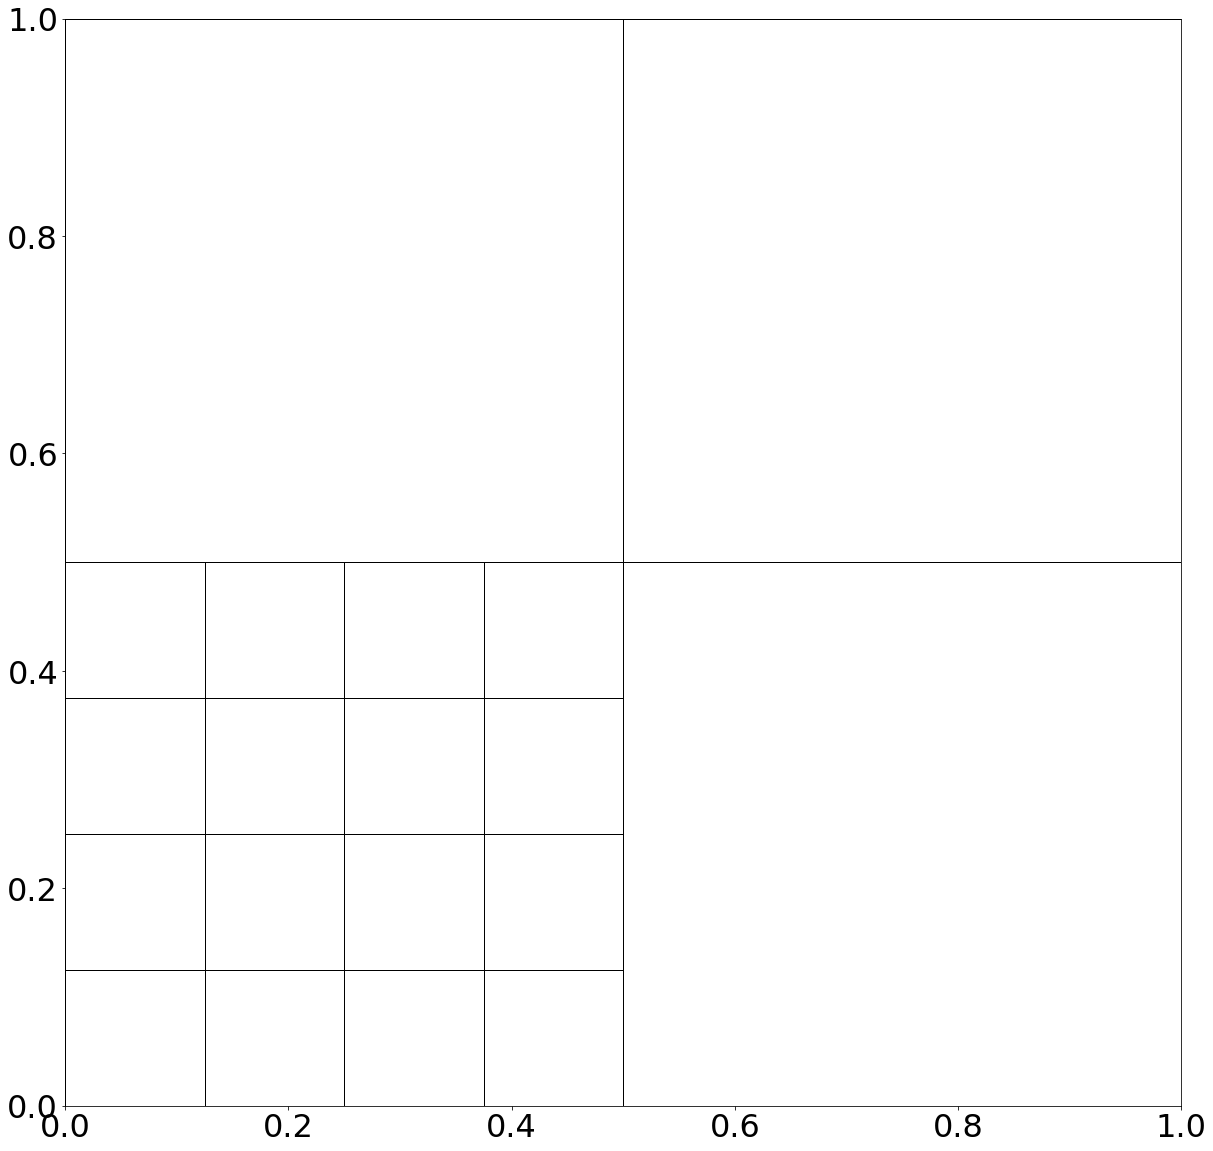

Combi Scheme:


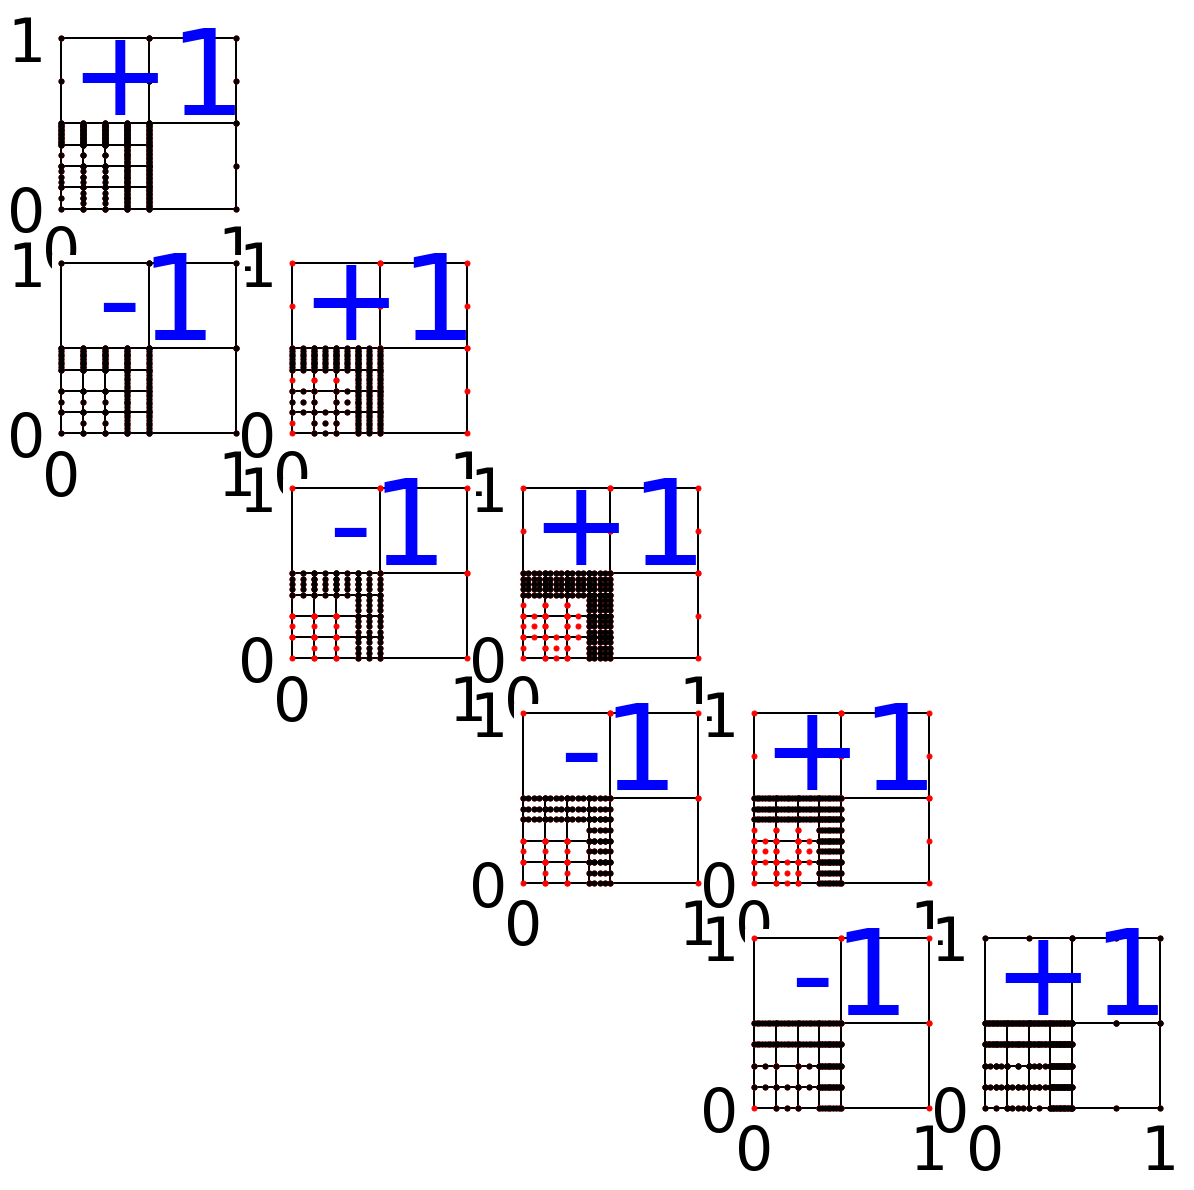

Resulting Sparse Grid:


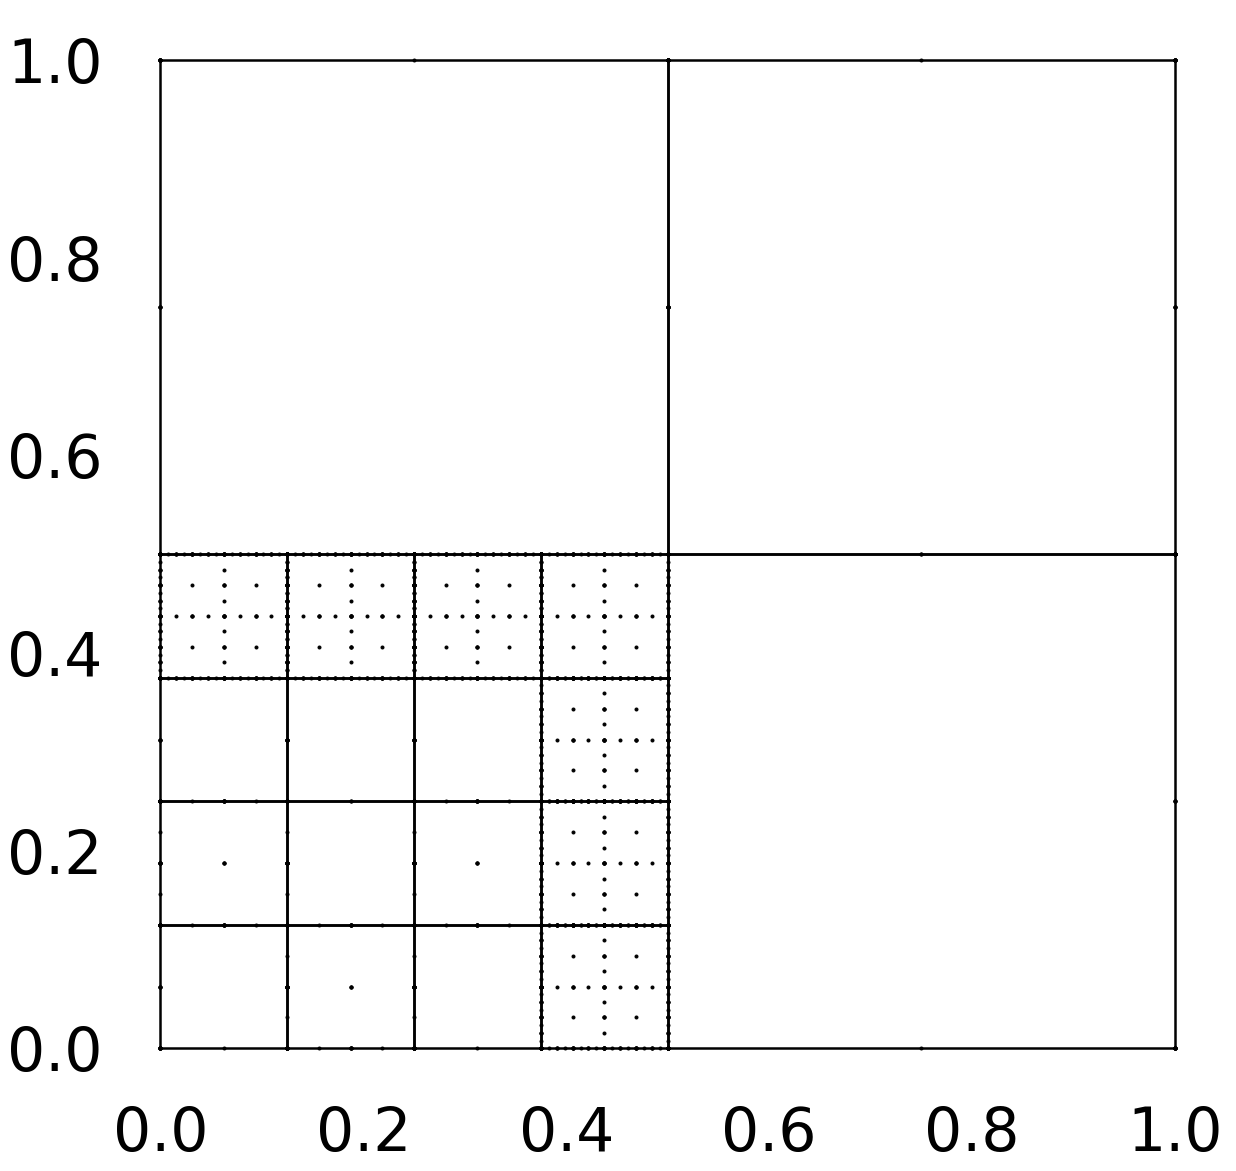

Curent number of function evaluations 530
max surplus error: 4.81985032543754e-06 total surplus error: 0.0015681401562946946
combiintegral: 0.12298983535053931
Current error: 0.011017963614920261
Finished refinement
Refined  2  times
Refinement Graph:


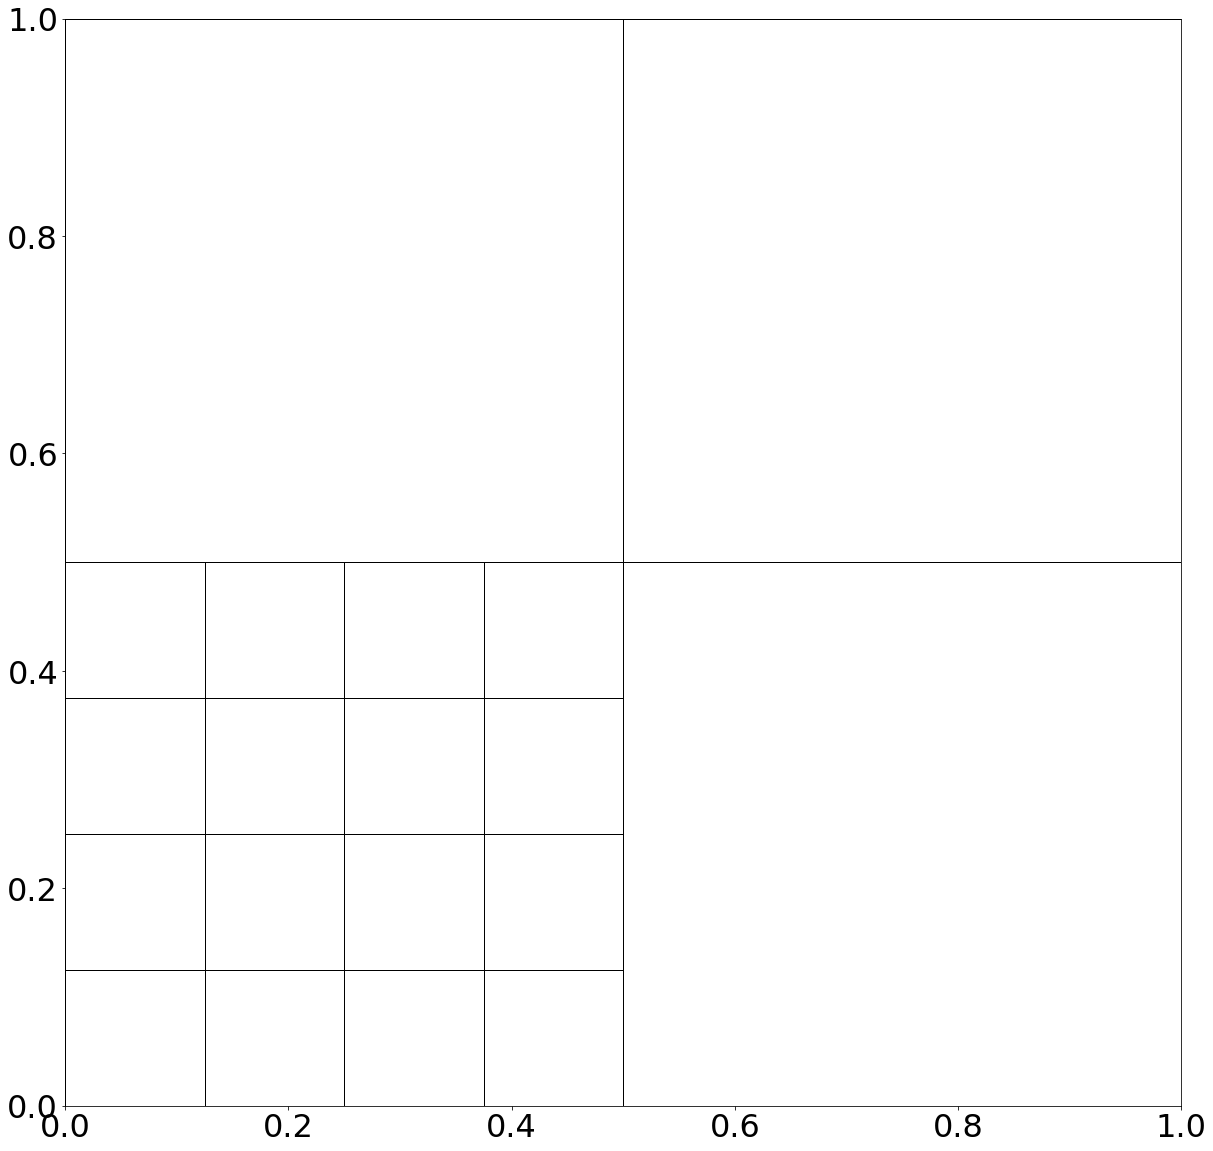

Combi Scheme:


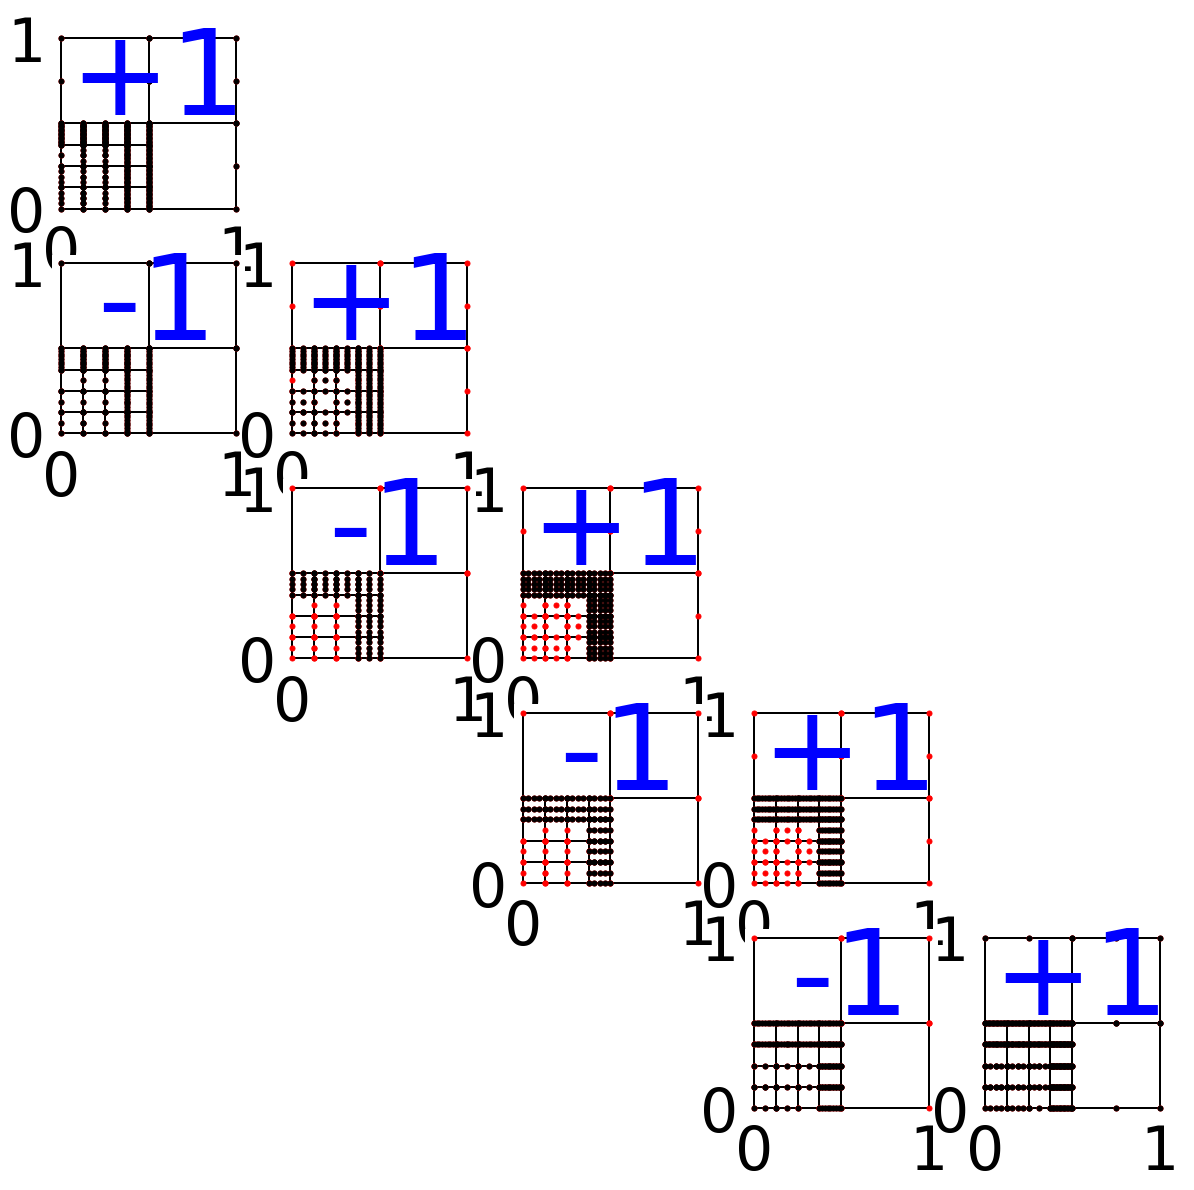

Resulting Sparse Grid:


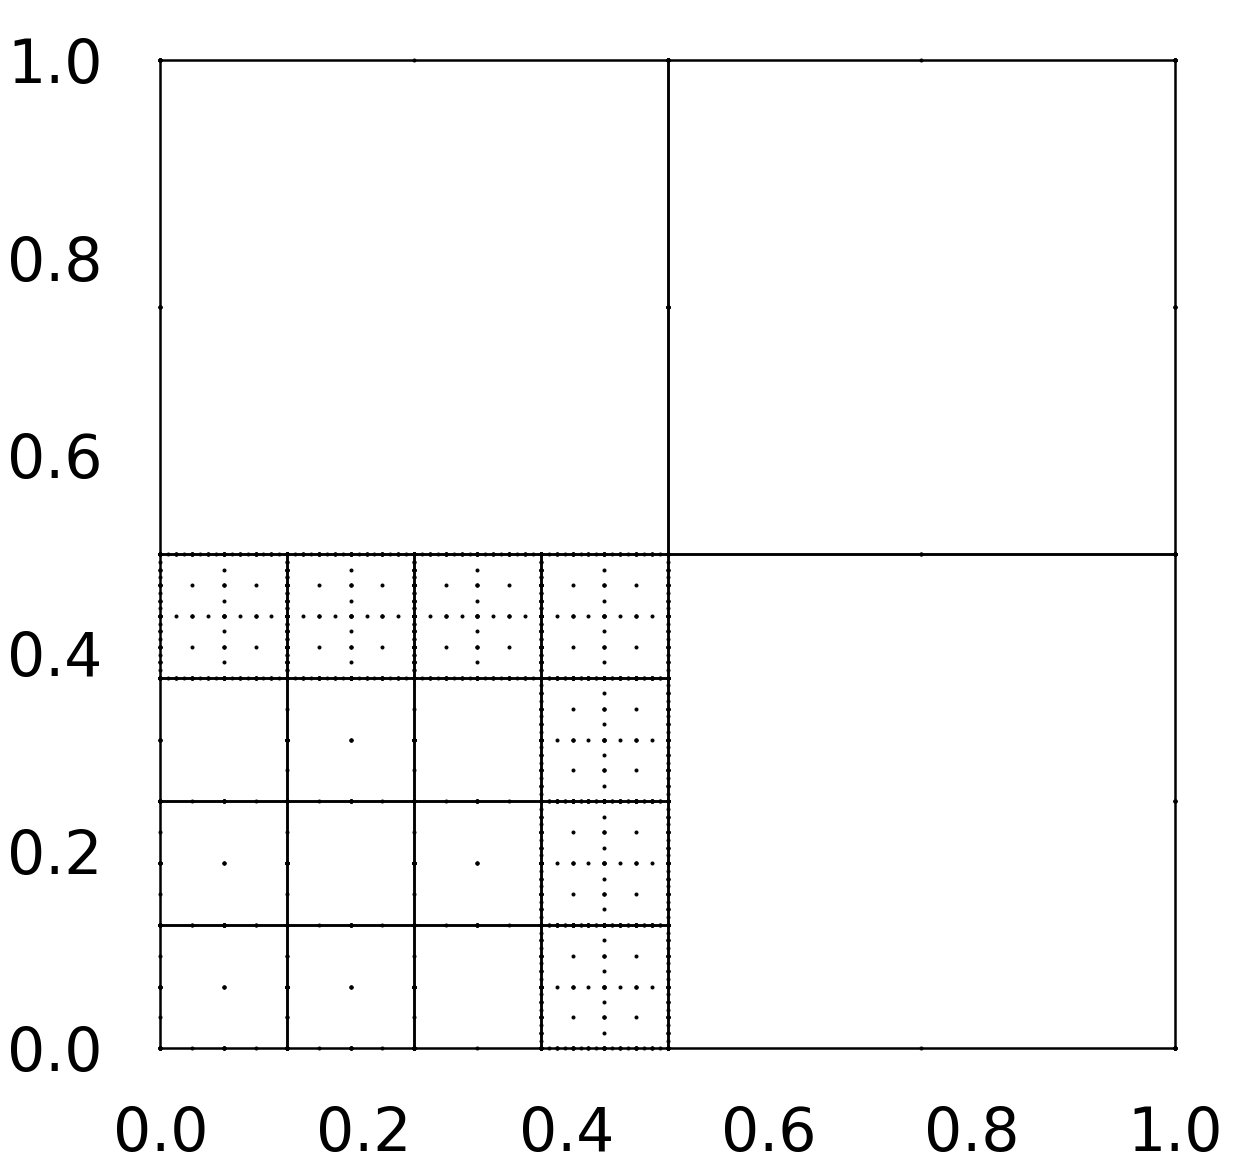

Curent number of function evaluations 542
max surplus error: 3.700446862284733e-06 total surplus error: 0.0015158929866726282
combiintegral: 0.12296551197496369
Current error: 0.011213551985617508
New scheme
0 [1, 6] 1.0
1 [2, 5] 1.0
2 [3, 4] 1.0
3 [4, 3] 1.0
4 [5, 2] 1.0
5 [6, 1] 1.0
6 [1, 5] -1.0
7 [2, 4] -1.0
8 [3, 3] -1.0
9 [4, 2] -1.0
10 [5, 1] -1.0
Finished refinement
Refined  2  times
Refinement Graph:


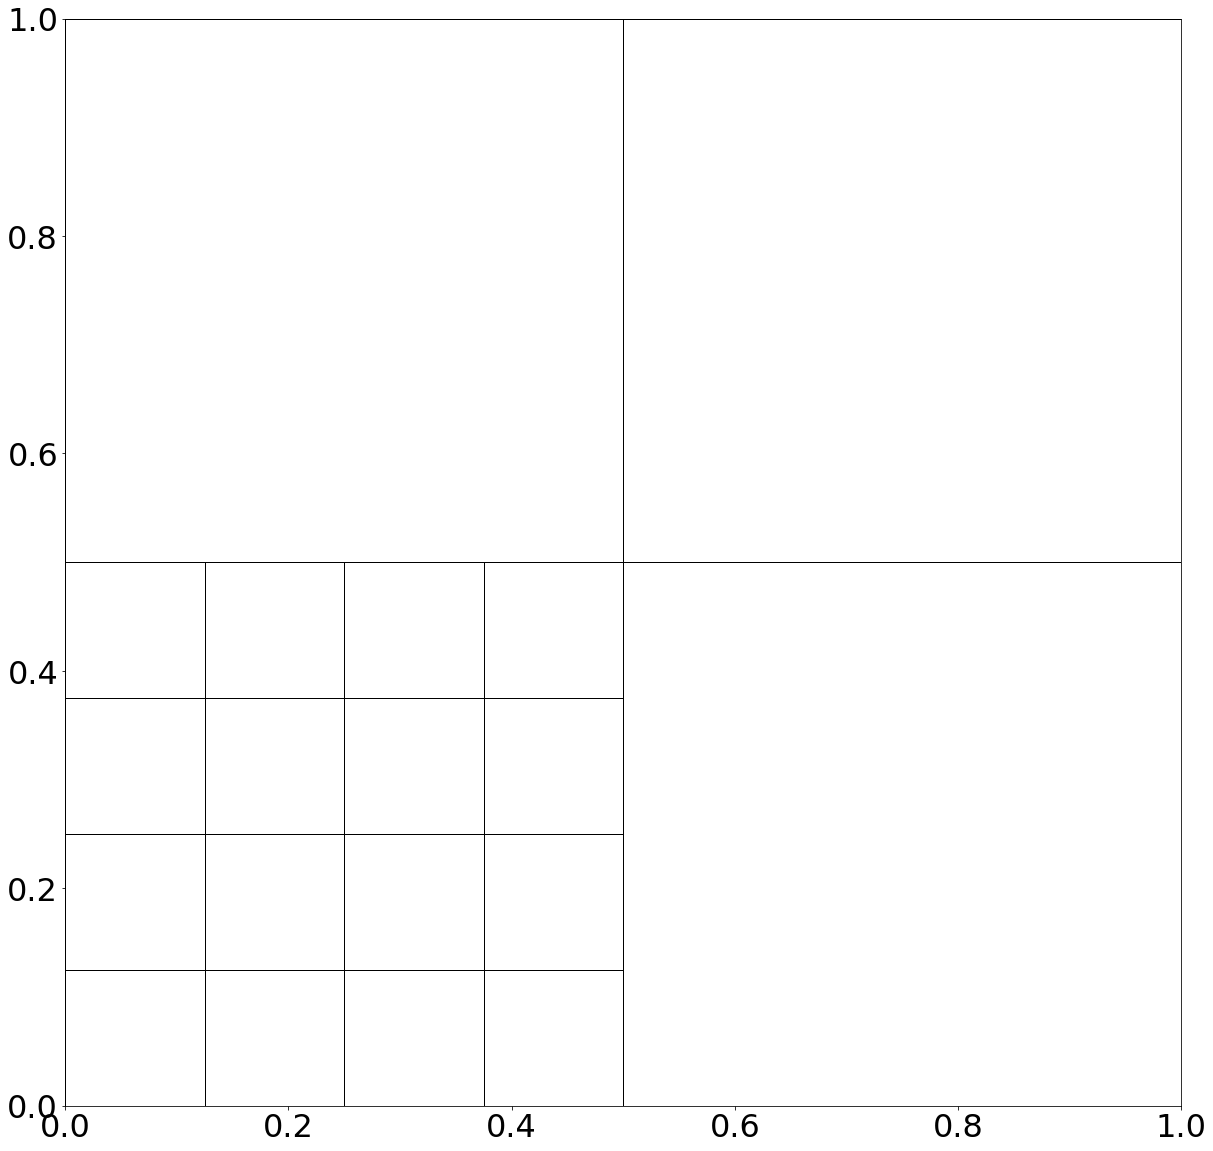

Combi Scheme:


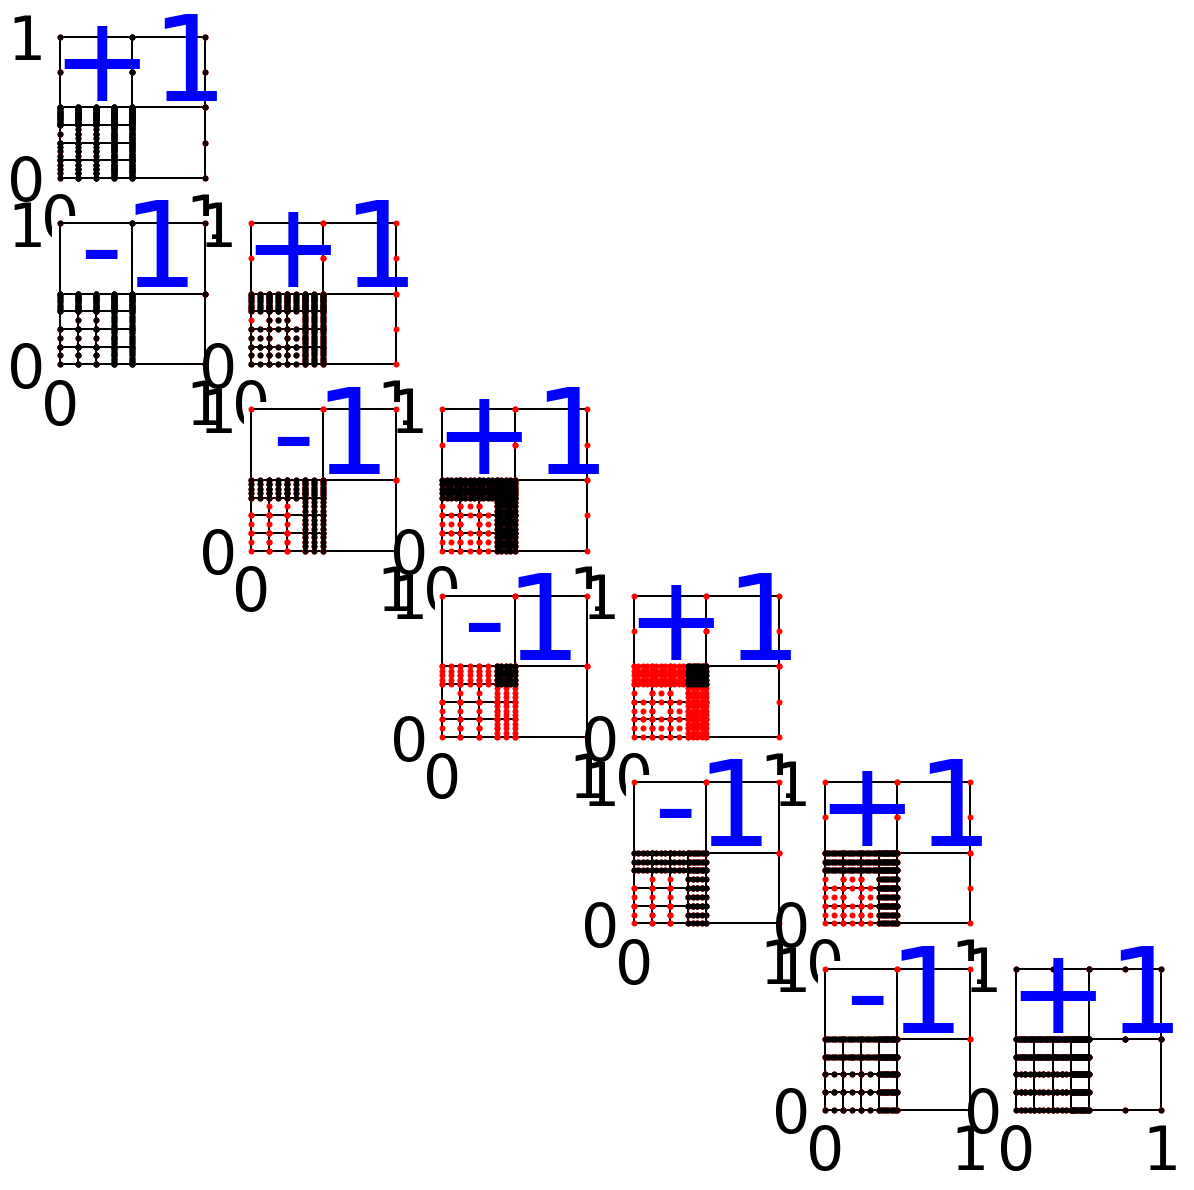

Resulting Sparse Grid:


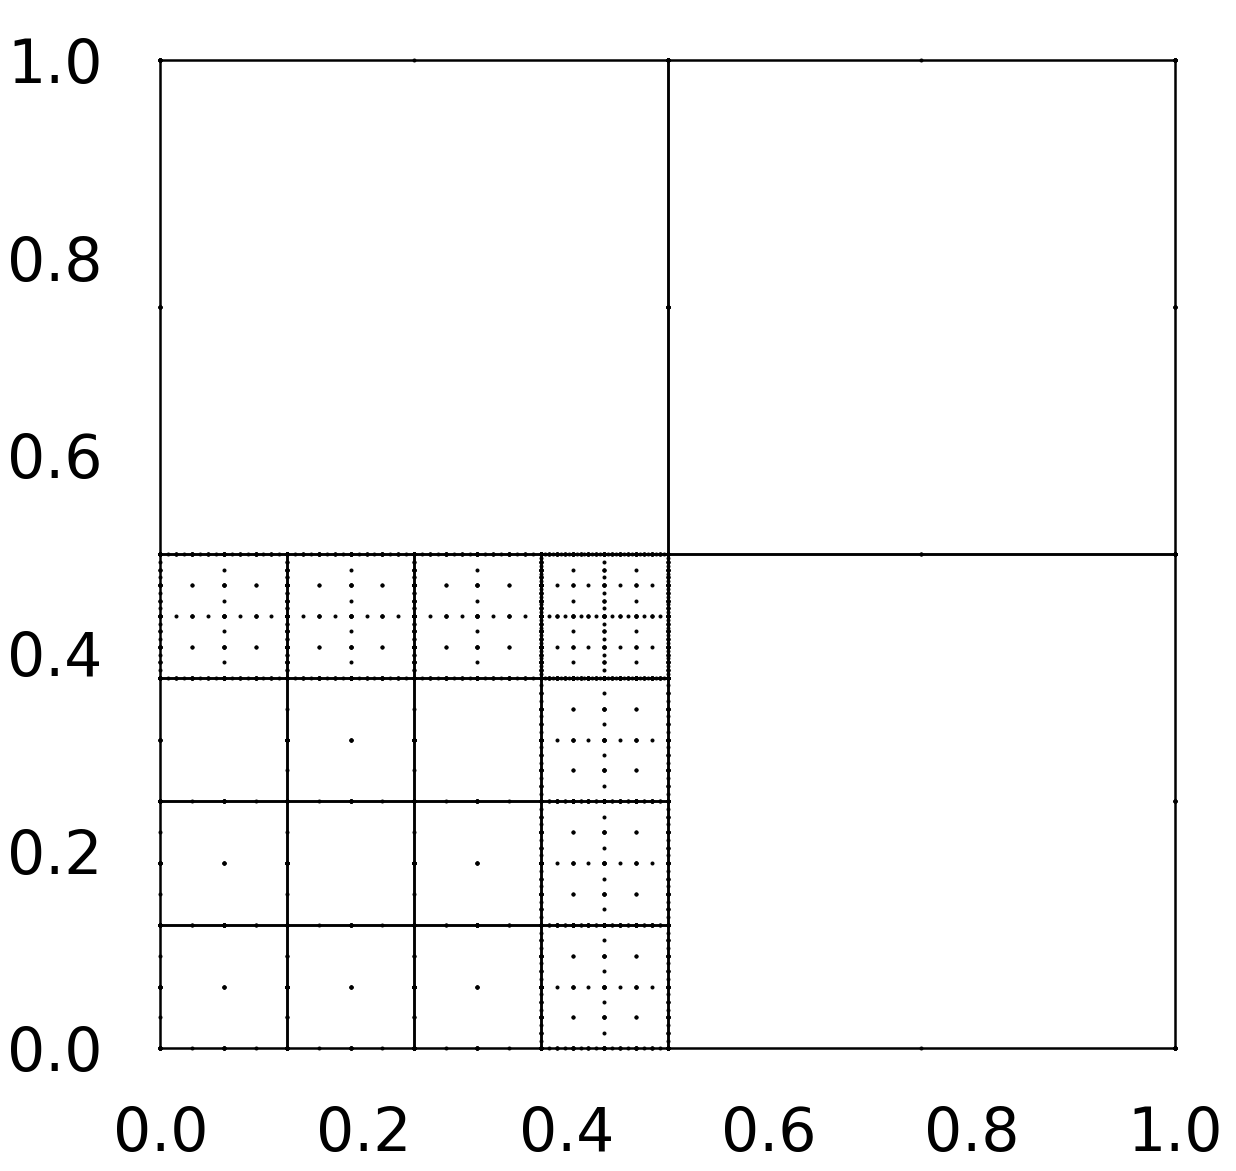

Curent number of function evaluations 641
max surplus error: 3.26563289414542e-06 total surplus error: 0.001379412106163865
combiintegral: 0.12312680087814229
Current error: 0.009916600676940232
Number of refinements 33
Number of distinct points used during the refinement 641
Time used (s): 34.31720495223999
Final error: 0.009916600676940232
Number of points used in refinement: 641


In [2]:
%matplotlib inline
from sys import path
path.append('../src/')
import numpy as np
from spatiallyAdaptiveExtendSplit import *
from Function import *
from ErrorCalculator import *

# dimension of the problem
dim = 2

# define integration domain boundaries
a = np.zeros(dim)
b = np.ones(dim)

# define function to be integrated
midpoint = np.ones(dim) * 0.5
coefficients = np.array([ 10**0 * (d+1) for d in range(dim)])
f = GenzDiscontinious(border=midpoint,coeffs=coefficients)
# plot function
f.plot(np.ones(dim)*a,np.ones(dim)*b)

# reference integral solution for calculating errors
reference_solution = f.getAnalyticSolutionIntegral(a,b)

# define error estimator for refinement
errorOperator2=ErrorCalculatorExtendSplit()

# define equidistant grid
grid=TrapezoidalGrid(a=a, b=b)

# NEW! define operation which shall be performed in the combination technique
from GridOperation import *
operation = Integration(f=f, grid=grid, dim=dim, reference_solution = reference_solution)

# define Extend-Split refinement strategy for Spatially Adaptive Combination Technique
adaptiveCombiInstanceExtend = SpatiallyAdaptiveExtendScheme(a, b, 3, version=0, operation=operation)

# performing the spatially adaptive refinement with the Extend-Split method
adaptiveCombiInstanceExtend.performSpatiallyAdaptiv(1, 2, errorOperator2, 10**-2, do_plot=True)

print("Number of points used in refinement:", adaptiveCombiInstanceExtend.get_total_num_points())

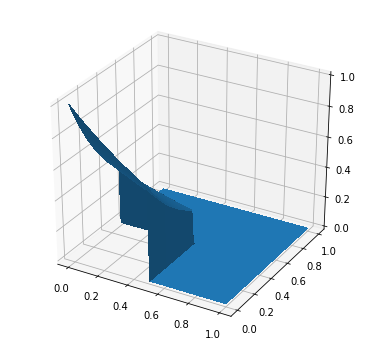

Reference solution: 0.12436002963217704
0 [1, 2] 1.0
1 [2, 1] 1.0
2 [1, 1] -1.0
Curent number of function evaluations 21
max surplus error: 0.008712524470981402 total surplus error: 0.024083215174002394
combiintegral: 0.08658321517400241
Current error: 0.3037697447476341
Finished refinement
Refined  2  times
New lmax: [3, 2]
Refinement Graph:


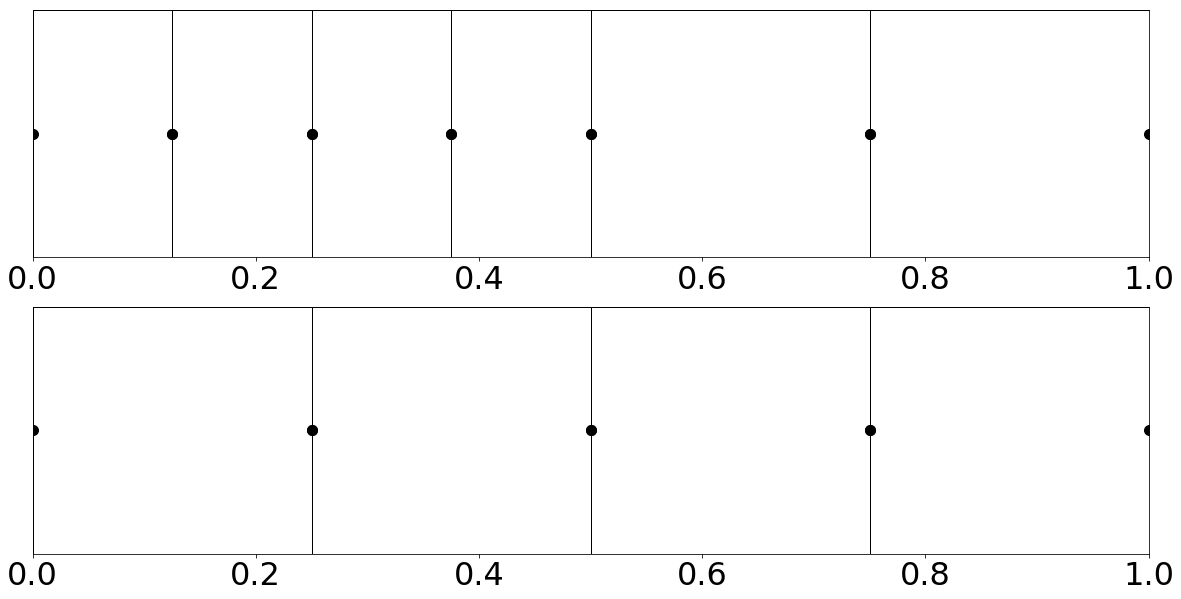

Combi Scheme:


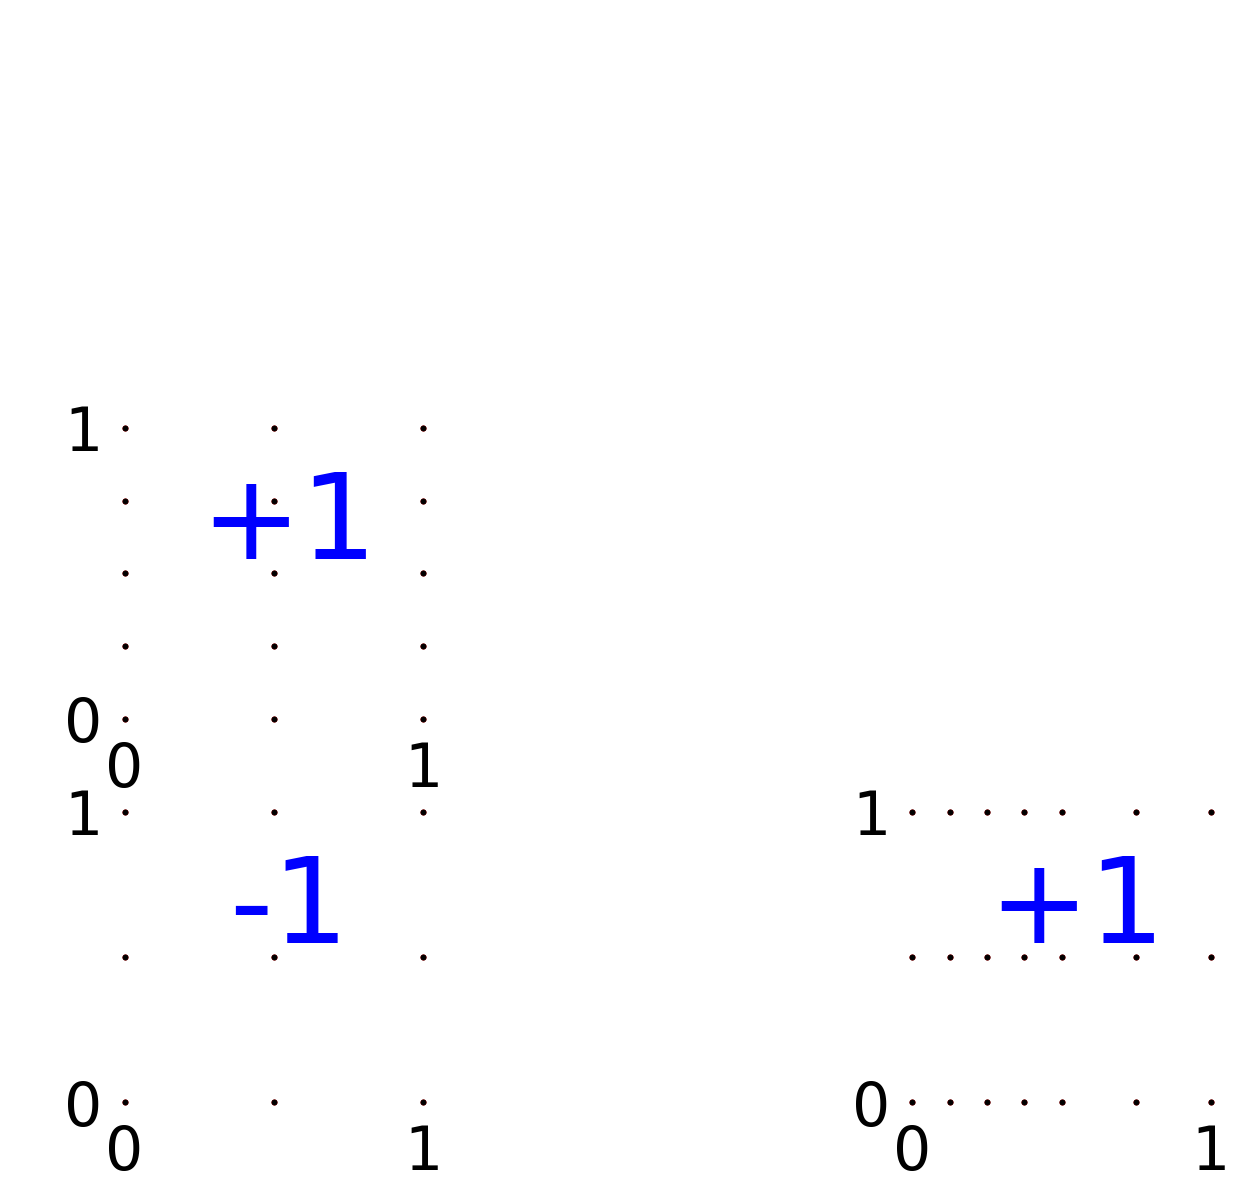

Resulting Sparse Grid:


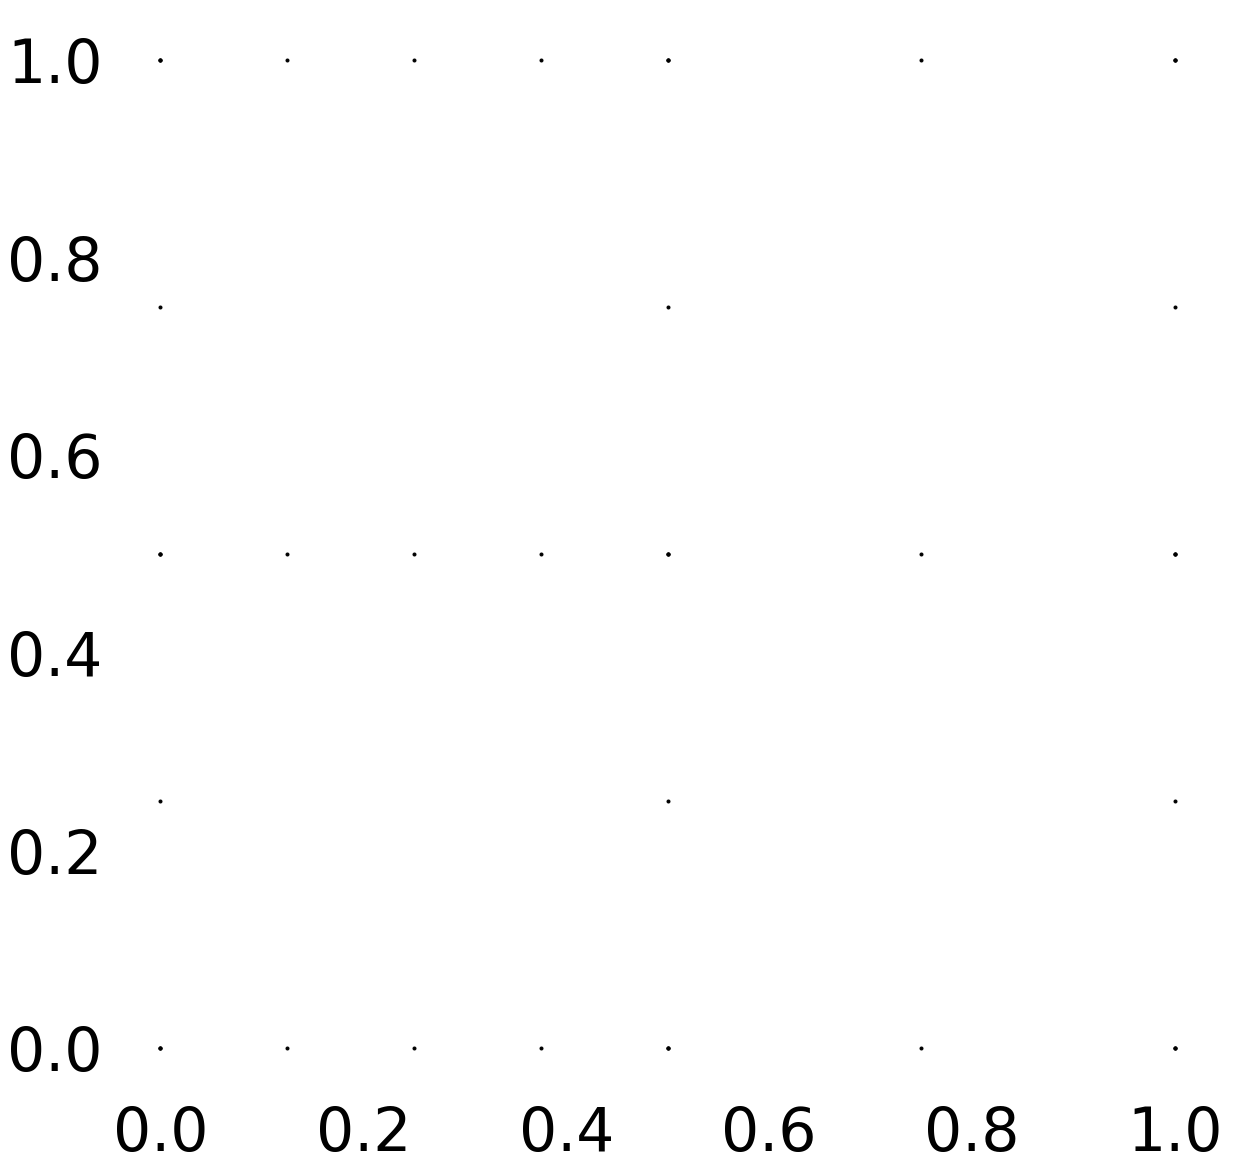

Curent number of function evaluations 27
max surplus error: 0.004654513863363591 total surplus error: 0.016182927988488863
combiintegral: 0.09567650887100748
Current error: 0.2306490344687724
Finished refinement
Refined  2  times
New lmax: [4, 2]
Refinement Graph:


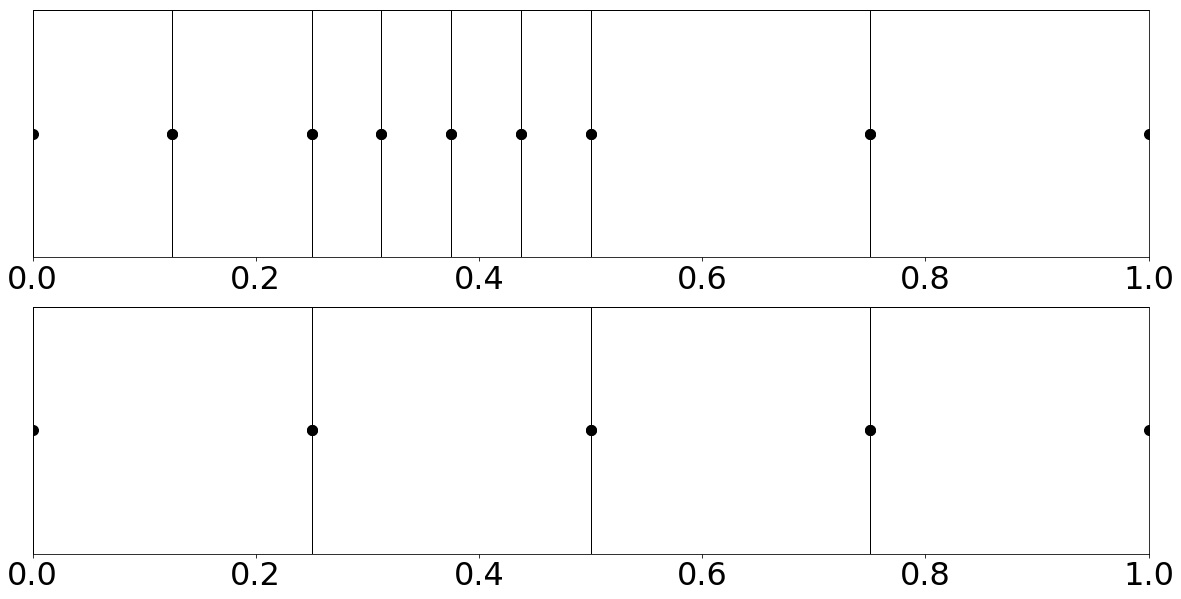

Combi Scheme:


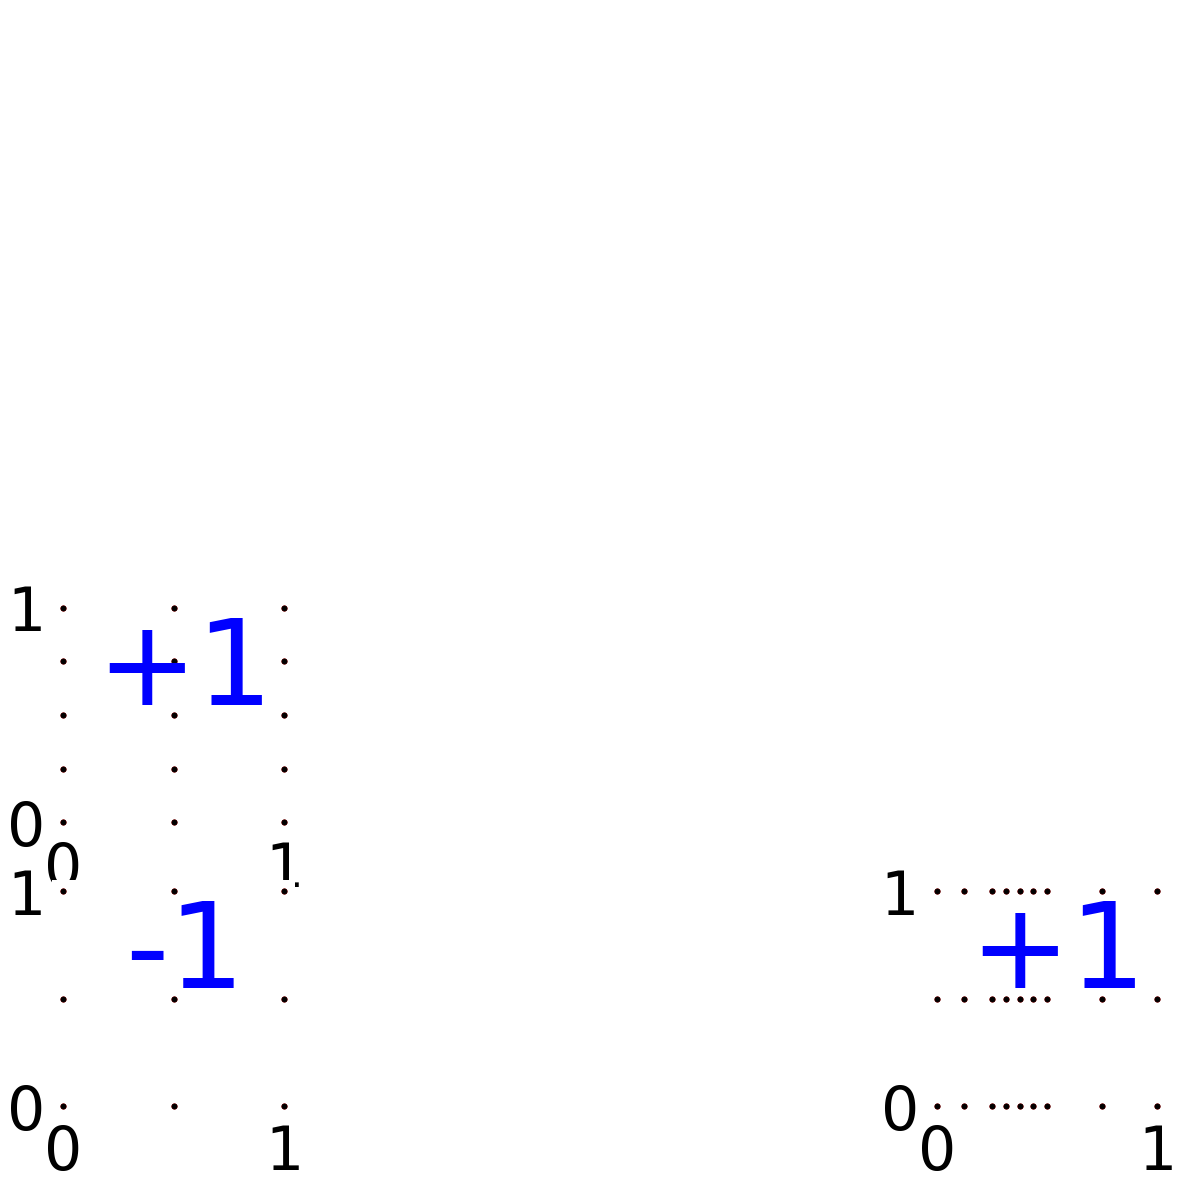

Resulting Sparse Grid:


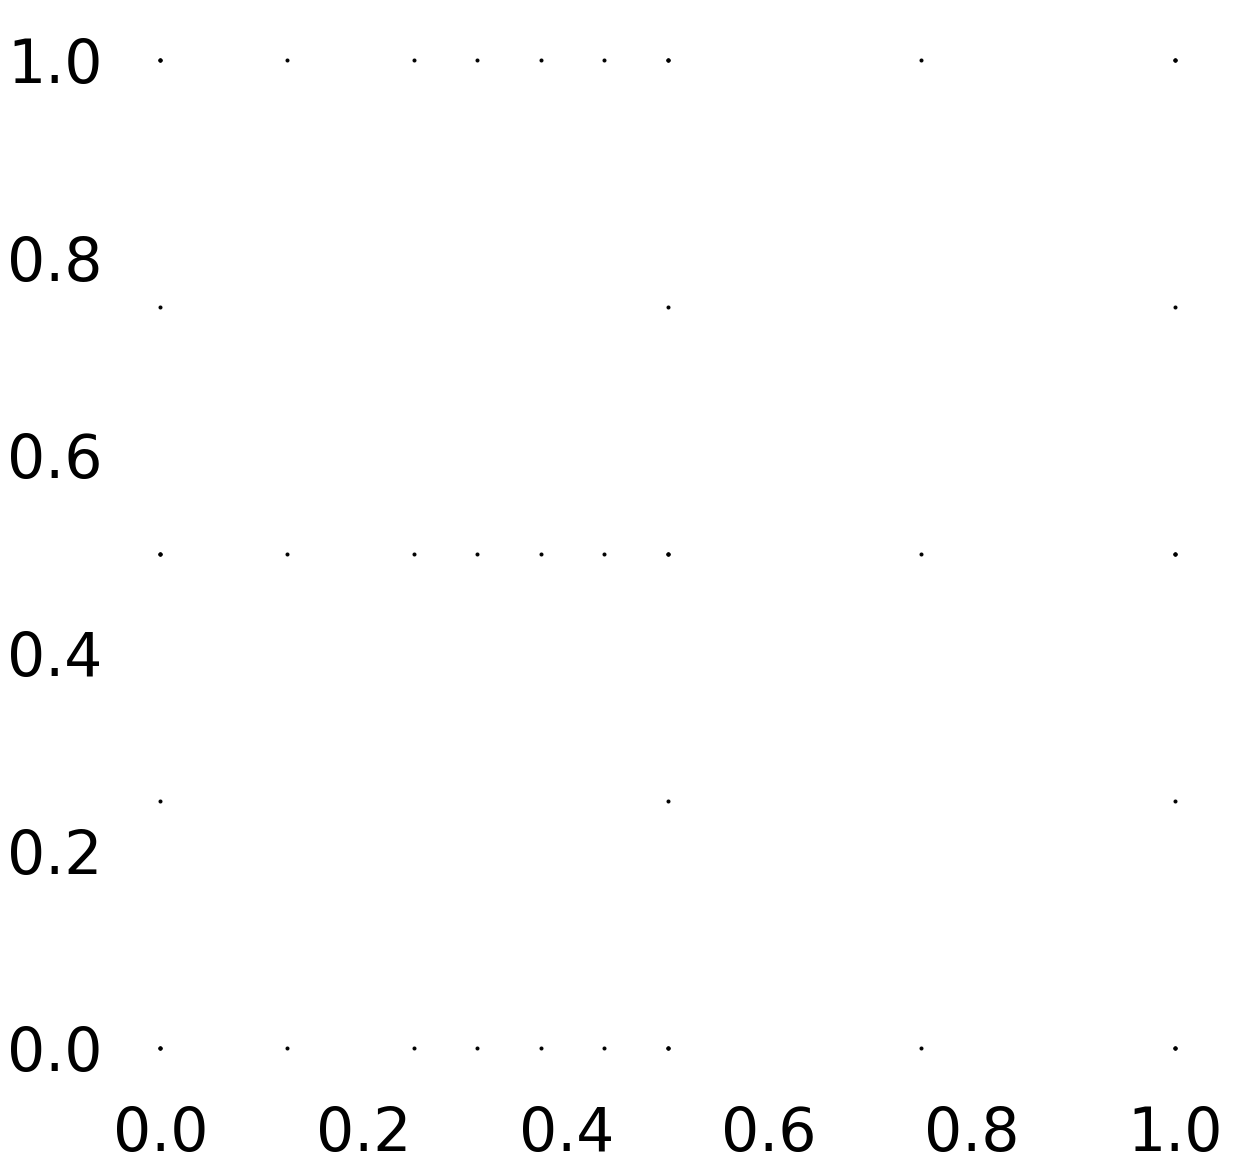

Curent number of function evaluations 33
max surplus error: 0.0033290831160197945 total surplus error: 0.01161504540265157
combiintegral: 0.10037298519988029
Current error: 0.19288387517471547
Finished refinement
Refined  2  times
New lmax: [4, 3]
Refinement Graph:


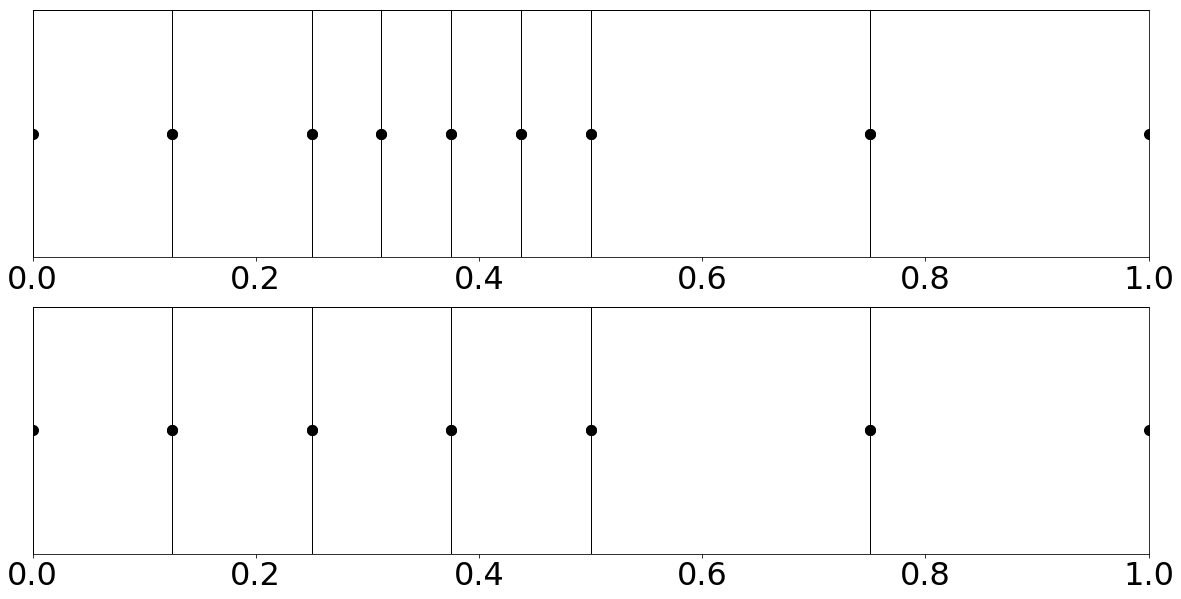

Combi Scheme:


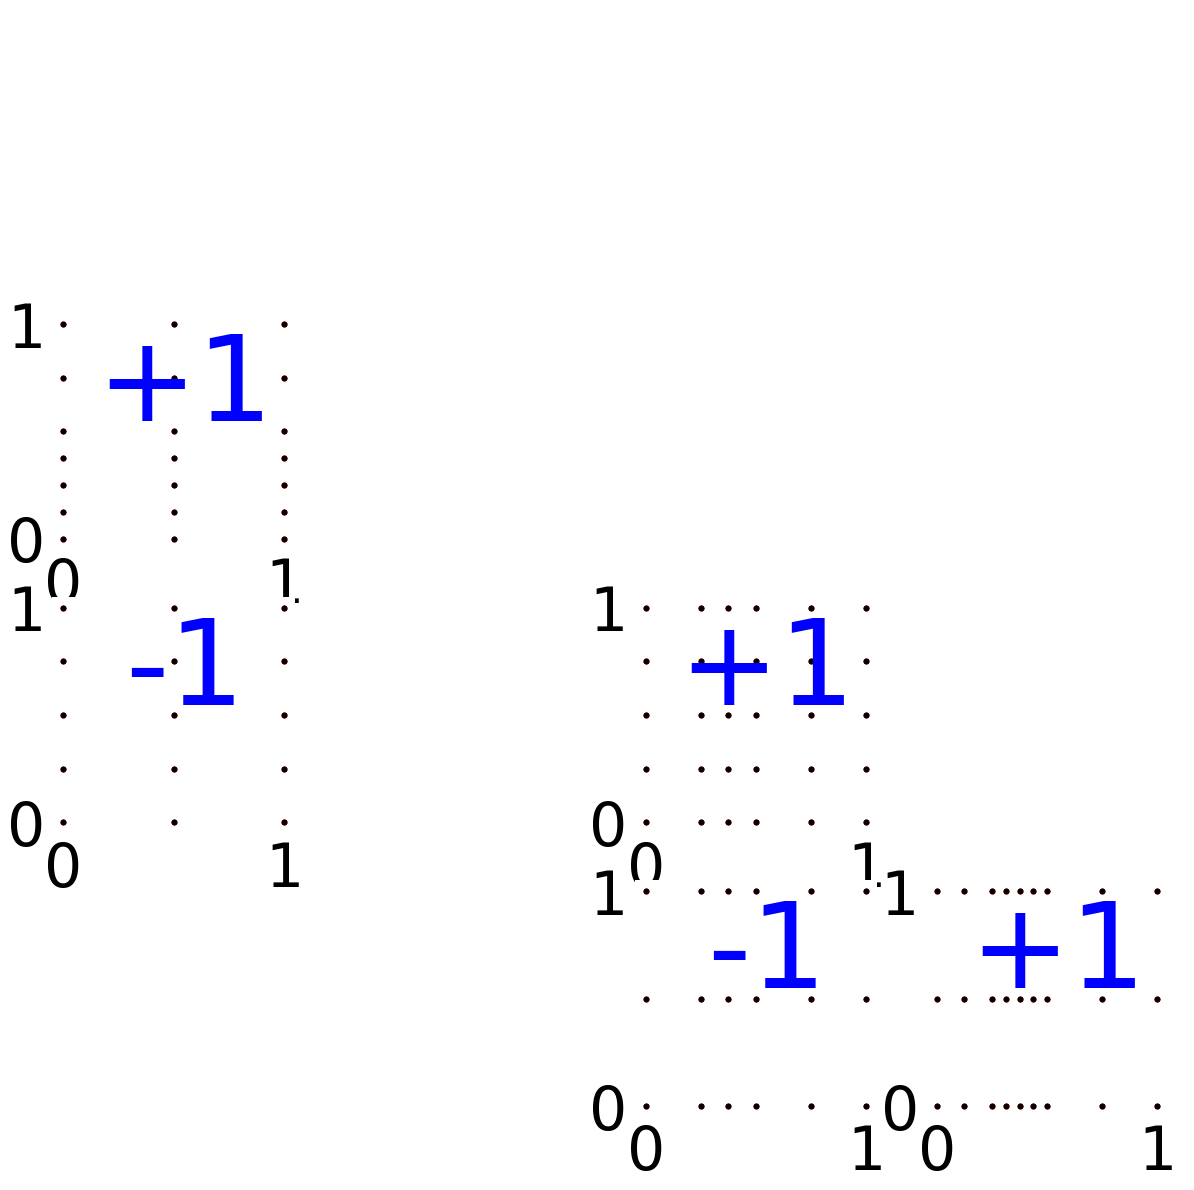

Resulting Sparse Grid:


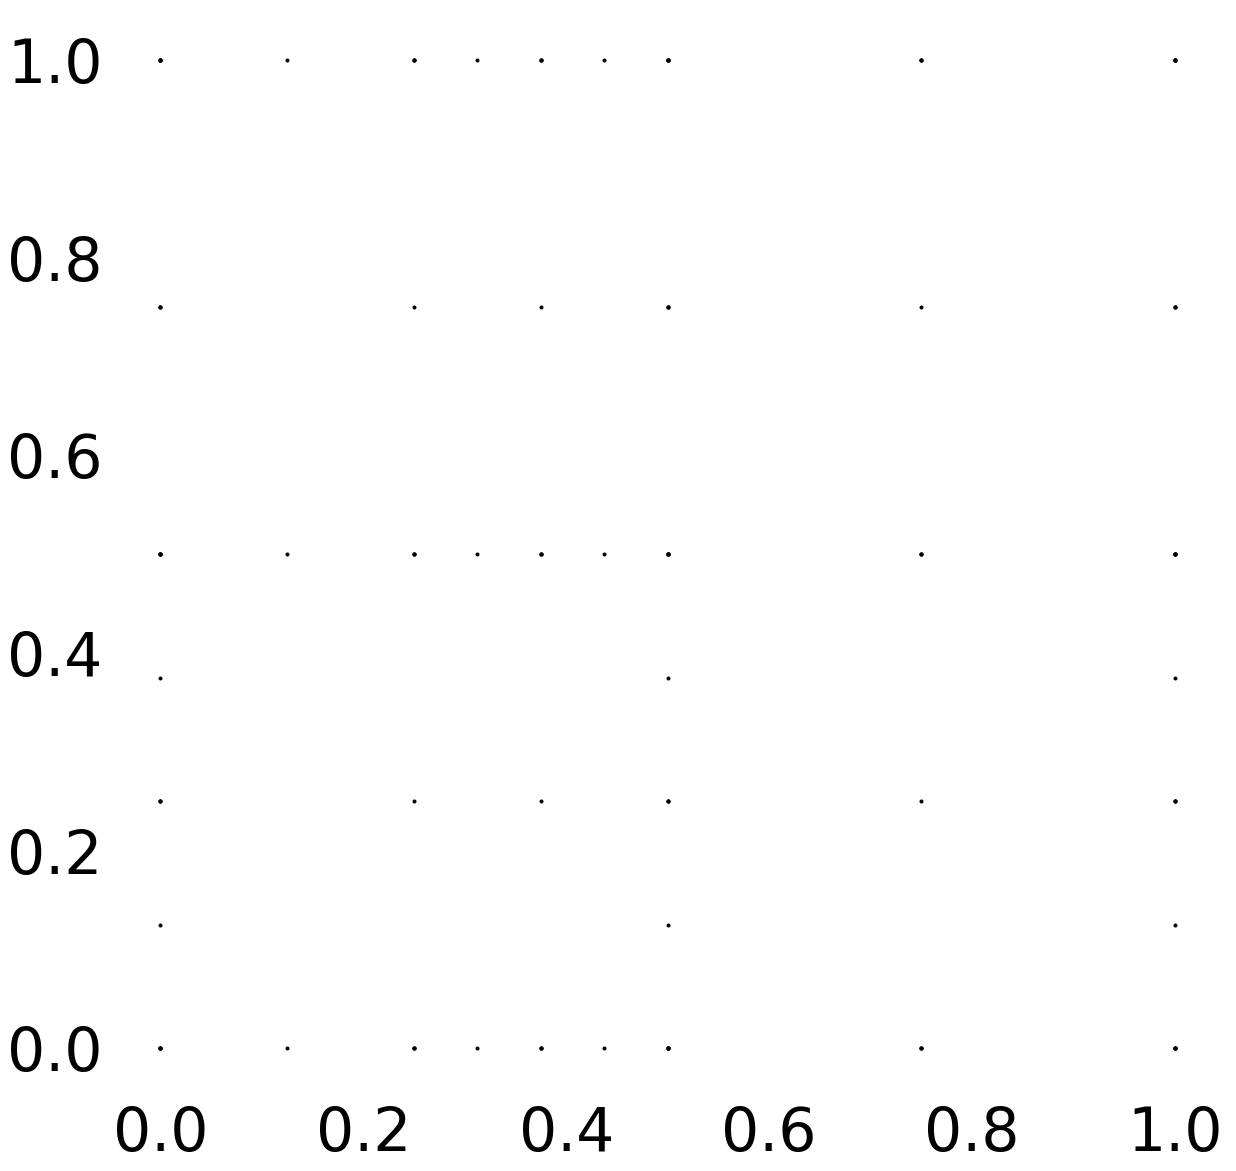

Curent number of function evaluations 45
max surplus error: 0.0029982064606138637 total surplus error: 0.012925657317454839
combiintegral: 0.10774088015232228
Current error: 0.133637387583532
Finished refinement
Refined  2  times
New lmax: [4, 4]
Refinement Graph:


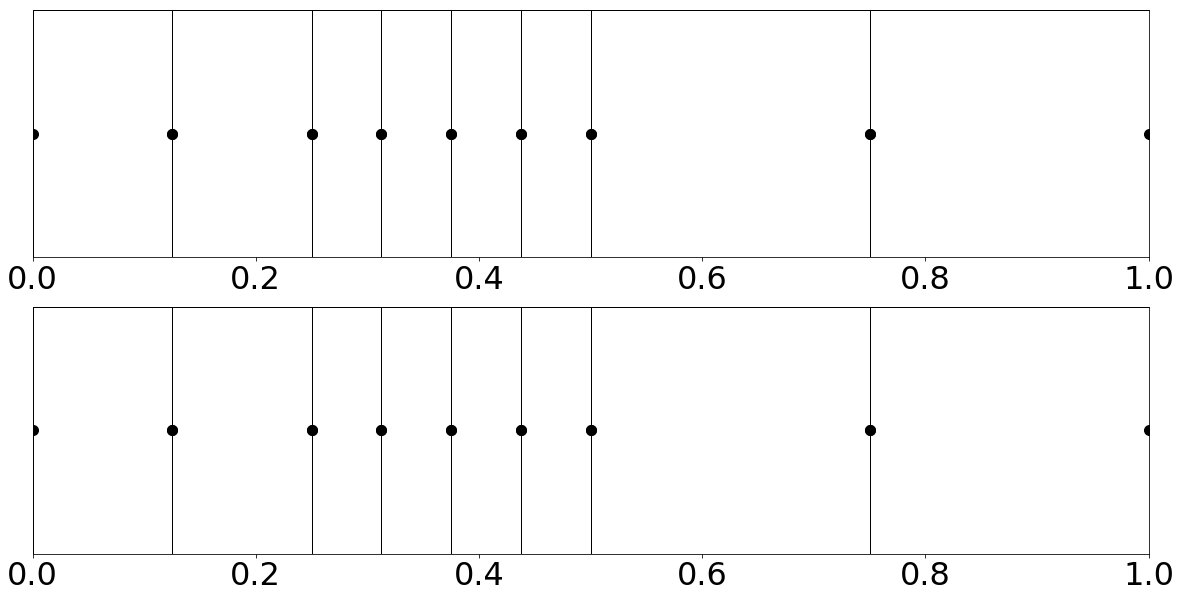

Combi Scheme:


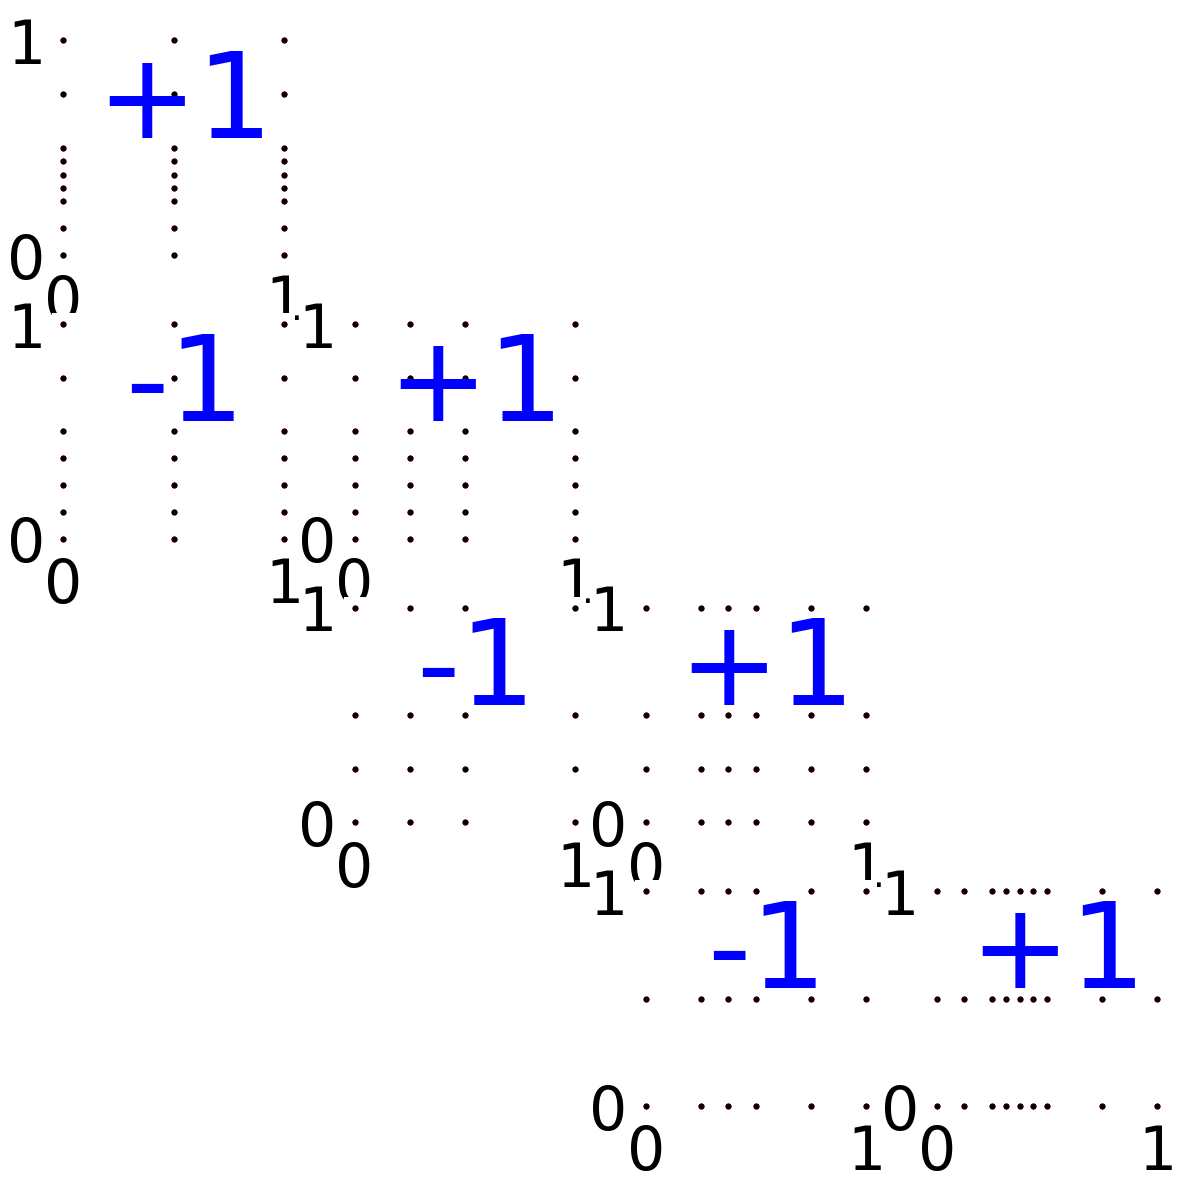

Resulting Sparse Grid:


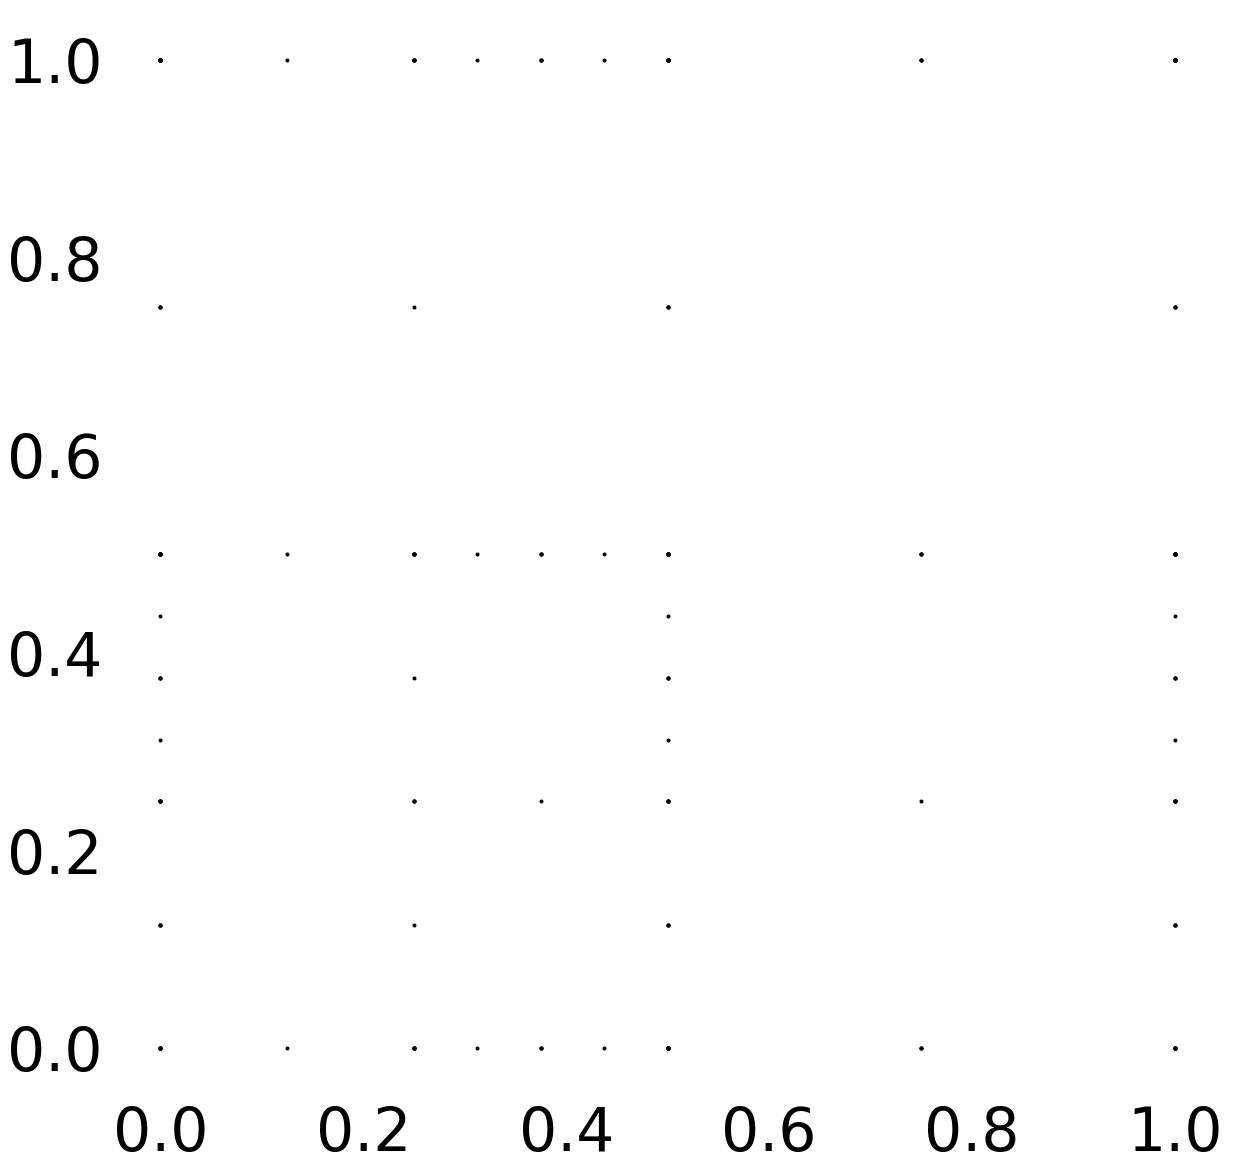

Curent number of function evaluations 53
max surplus error: 0.002553375841118257 total surplus error: 0.010806187754758948
combiintegral: 0.11175871144474568
Current error: 0.10132932763607902
Finished refinement
Refined  2  times
Rebalancing!
Refinement Graph:


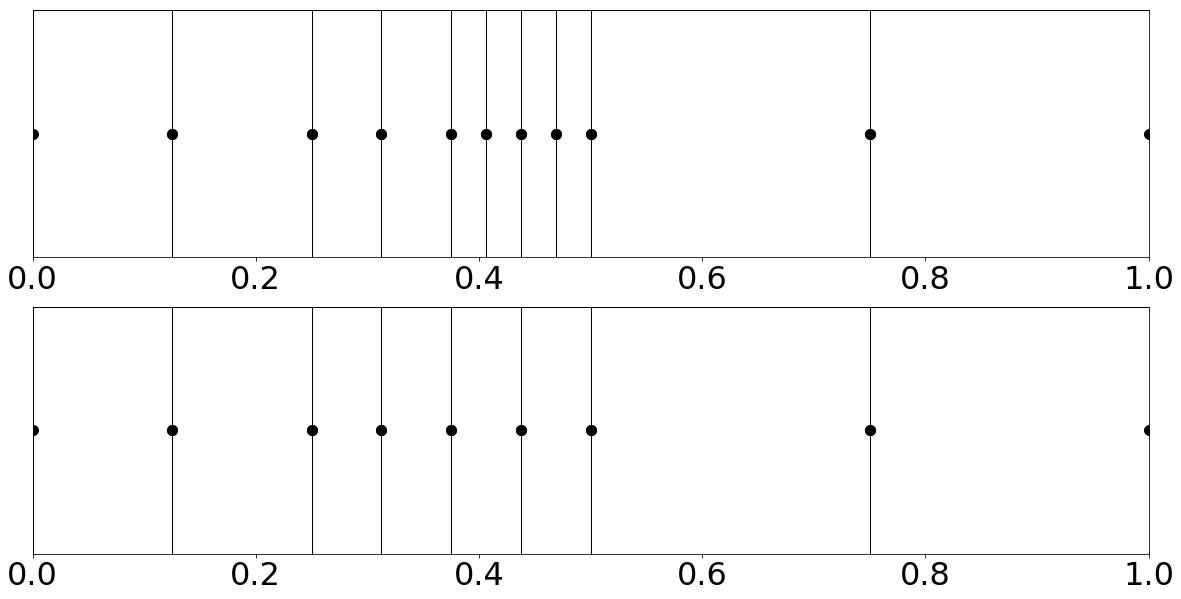

Combi Scheme:


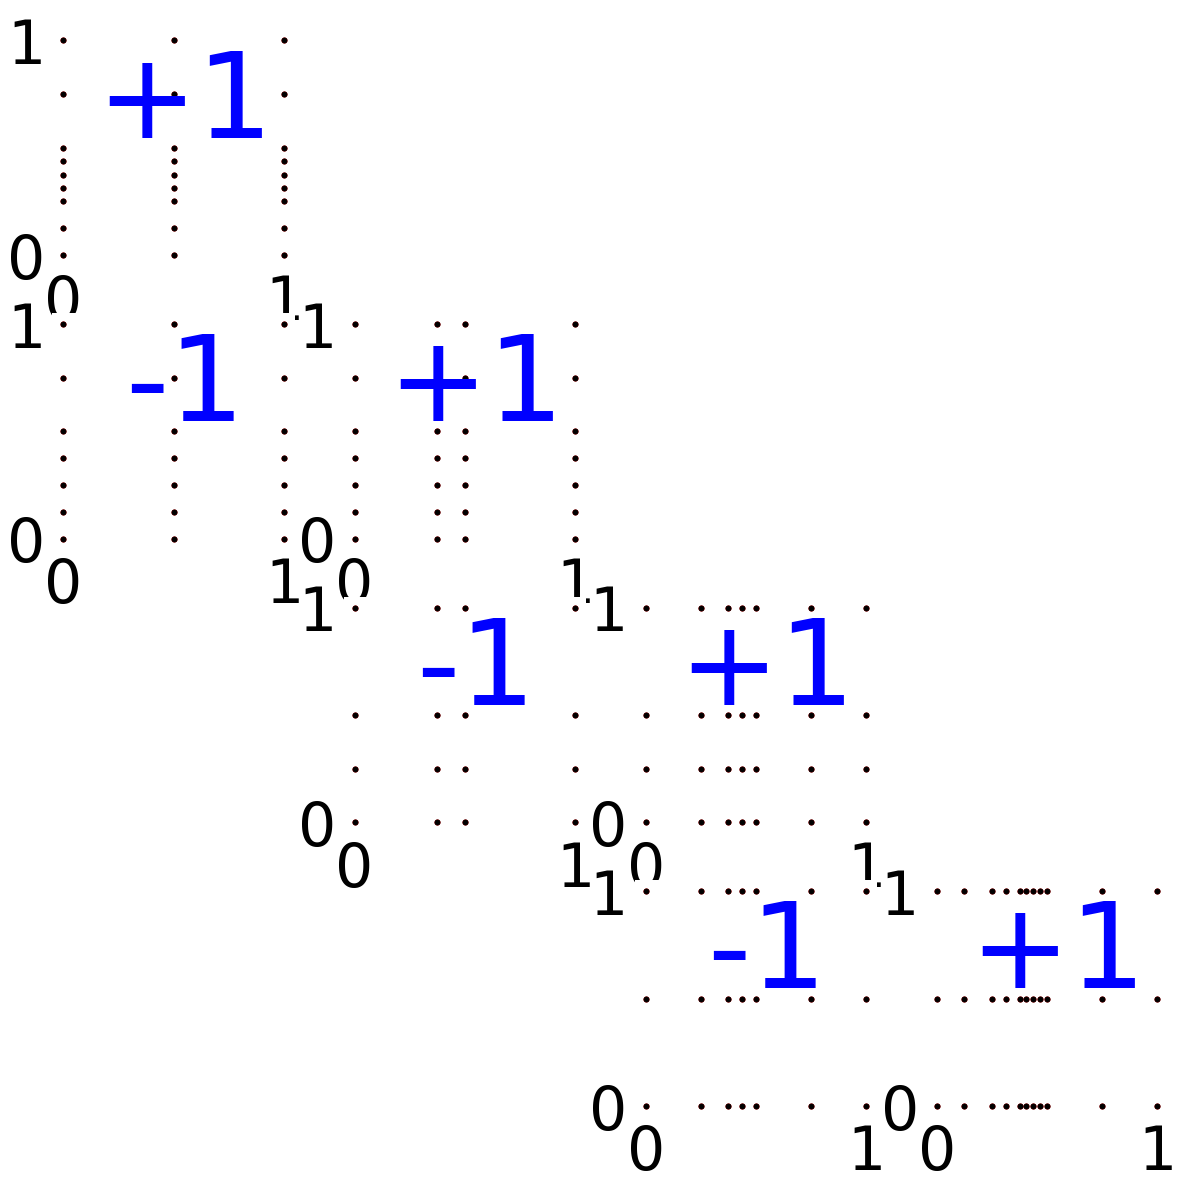

Resulting Sparse Grid:


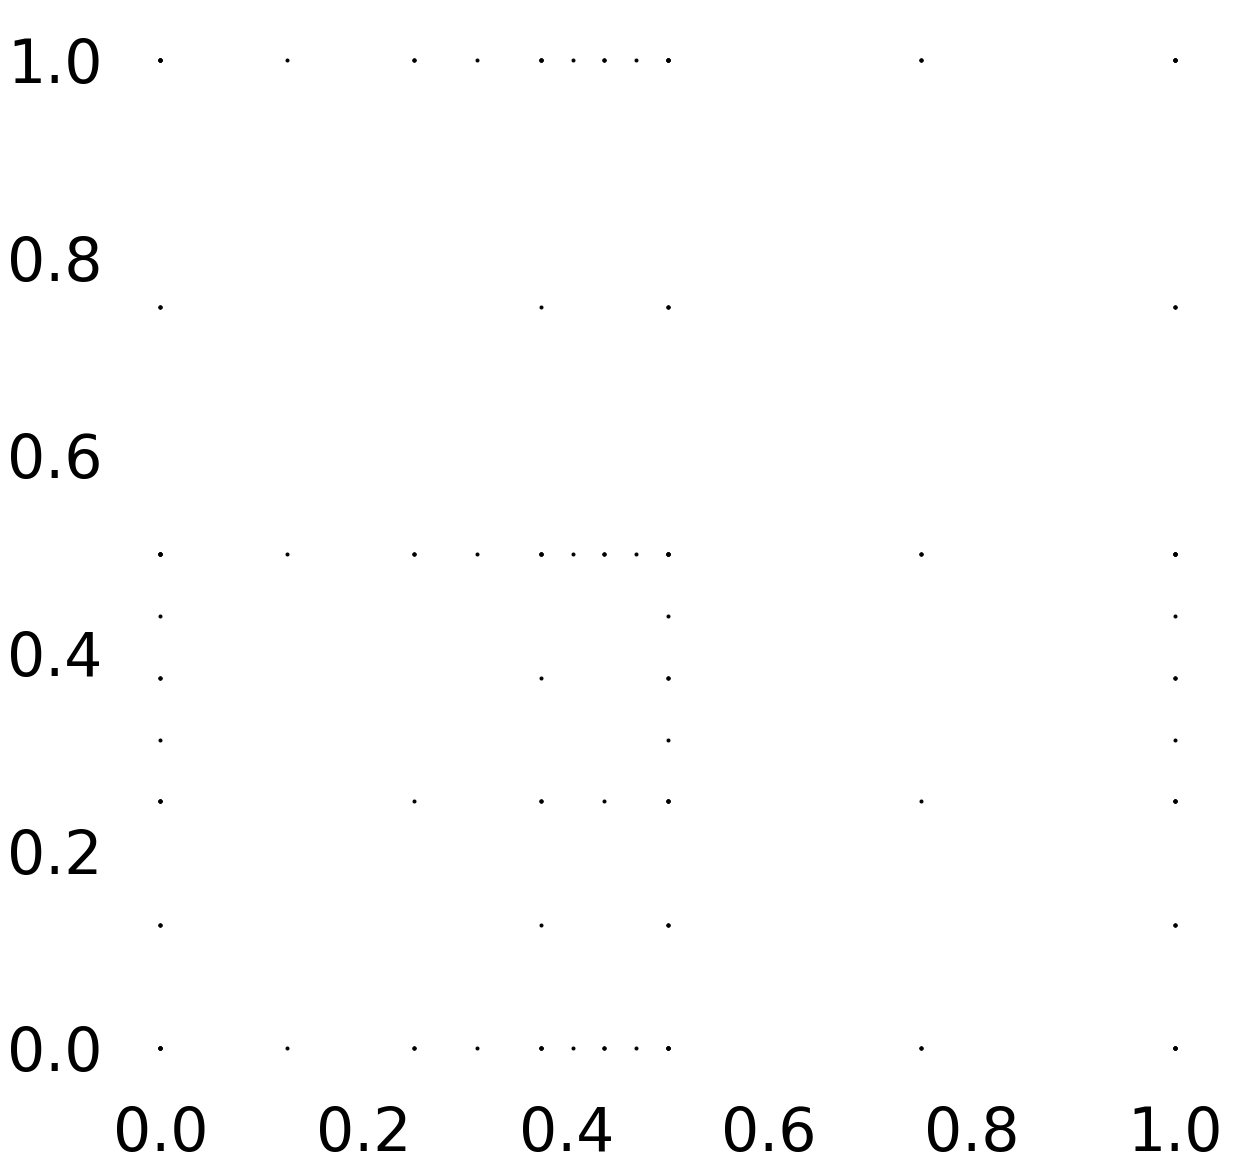

Curent number of function evaluations 62
max surplus error: 0.0017248021784038669 total surplus error: 0.008673885175392505
combiintegral: 0.11534209267920752
Current error: 0.07251475397394258
Finished refinement
Refined  2  times
Rebalancing!
Rebalancing!
Refinement Graph:


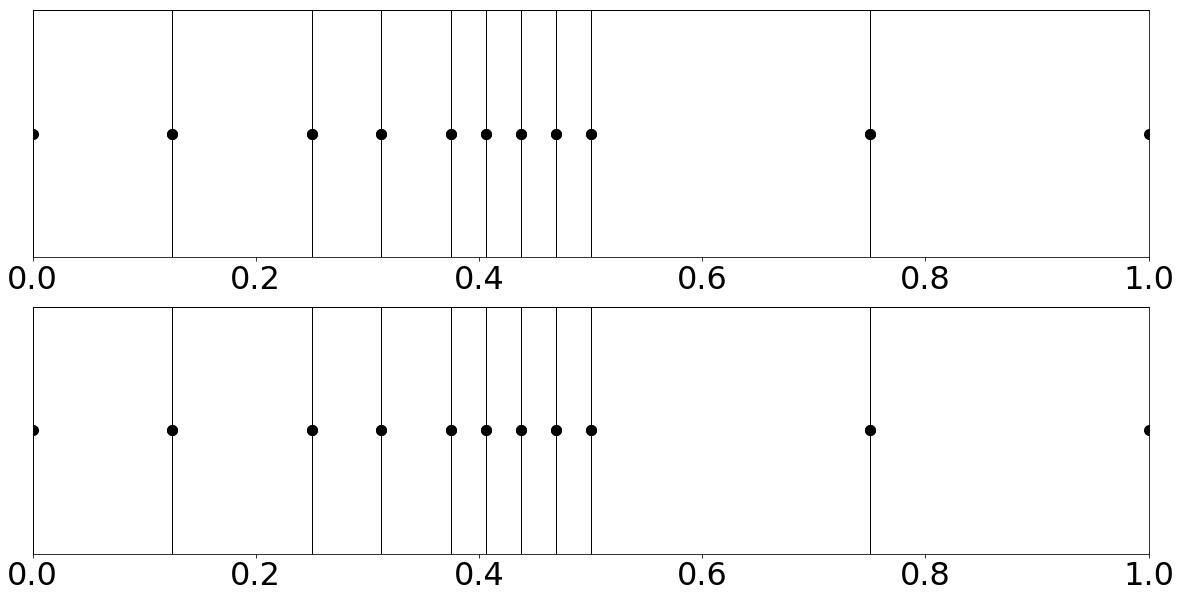

Combi Scheme:


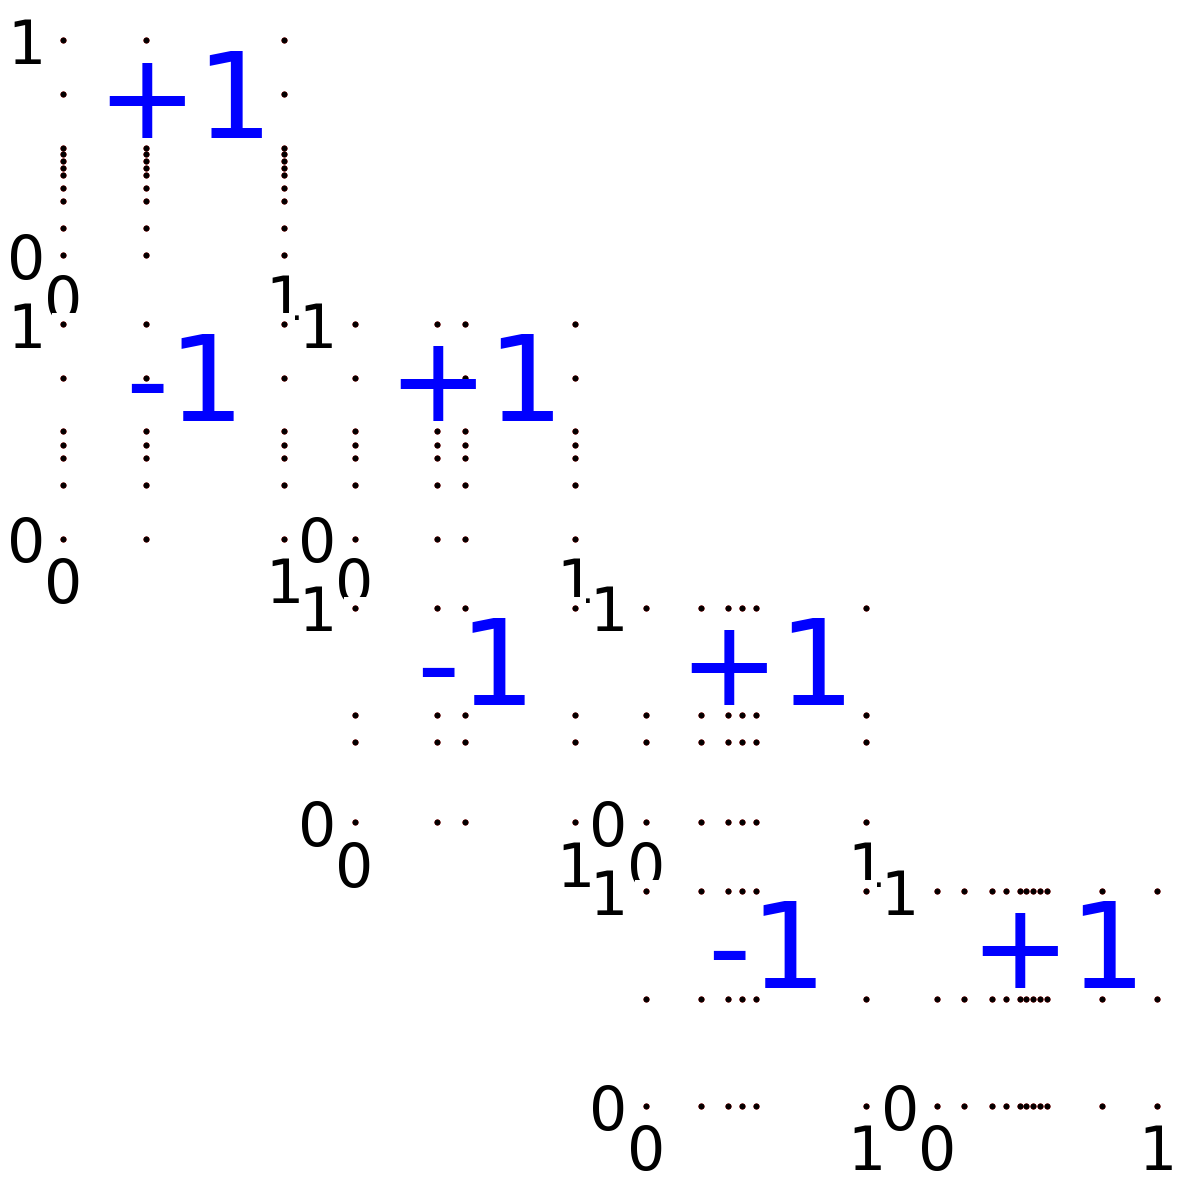

Resulting Sparse Grid:


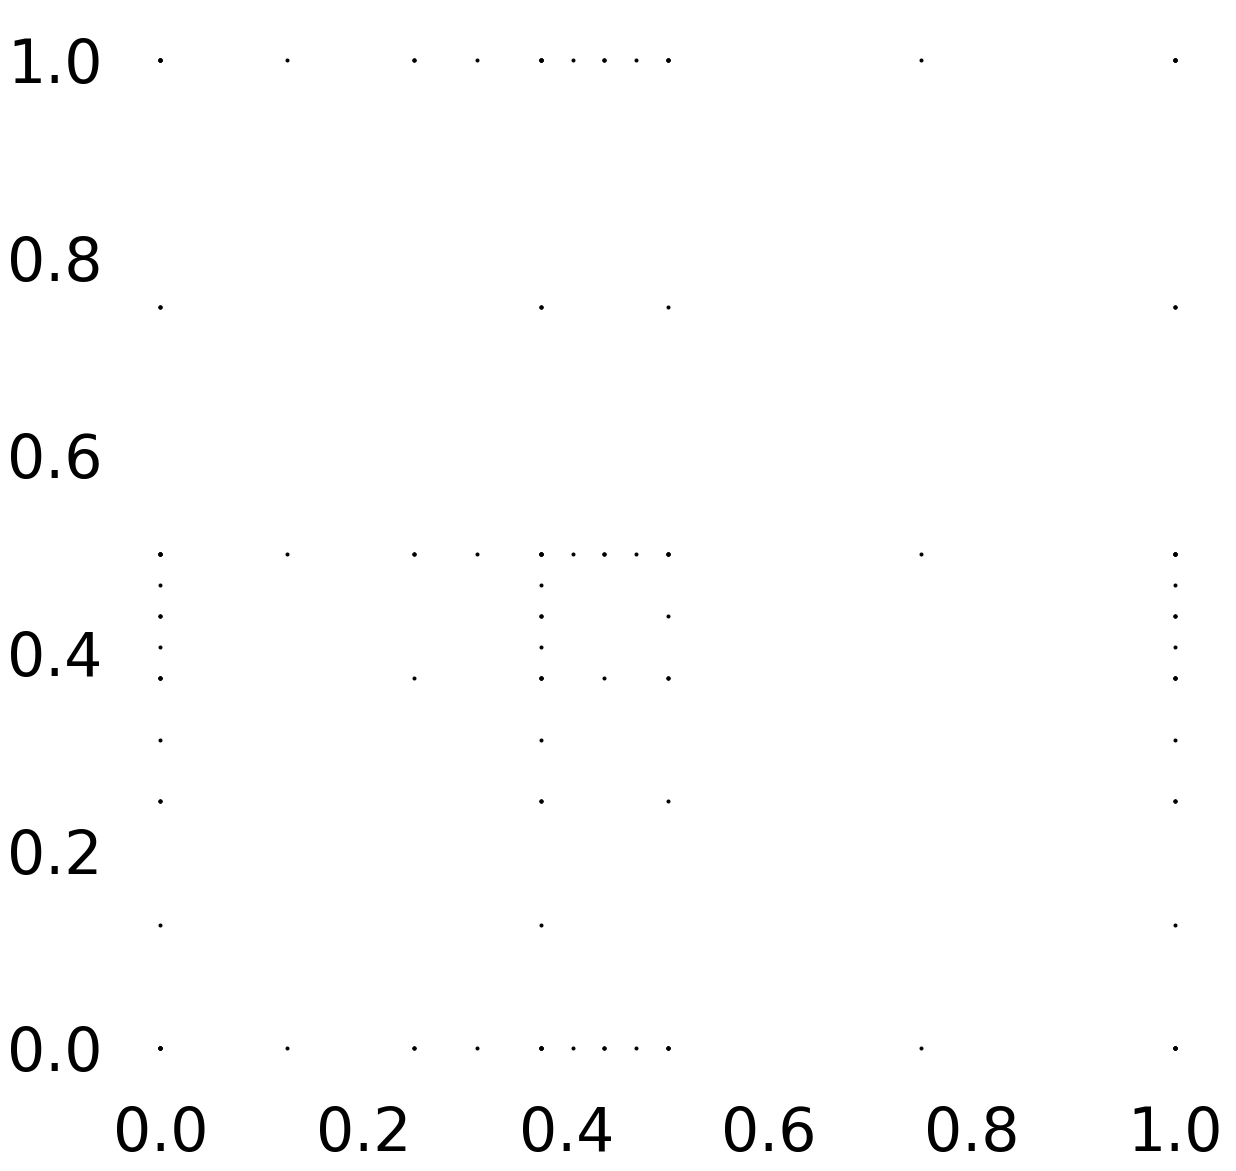

Curent number of function evaluations 71
max surplus error: 0.0013477337541951244 total surplus error: 0.00790852927186747
combiintegral: 0.11948108943836265
Current error: 0.0392323820462649
Finished refinement
Refined  4  times
Rebalancing!
New lmax: [5, 4]
New lmax: [5, 5]
Refinement Graph:


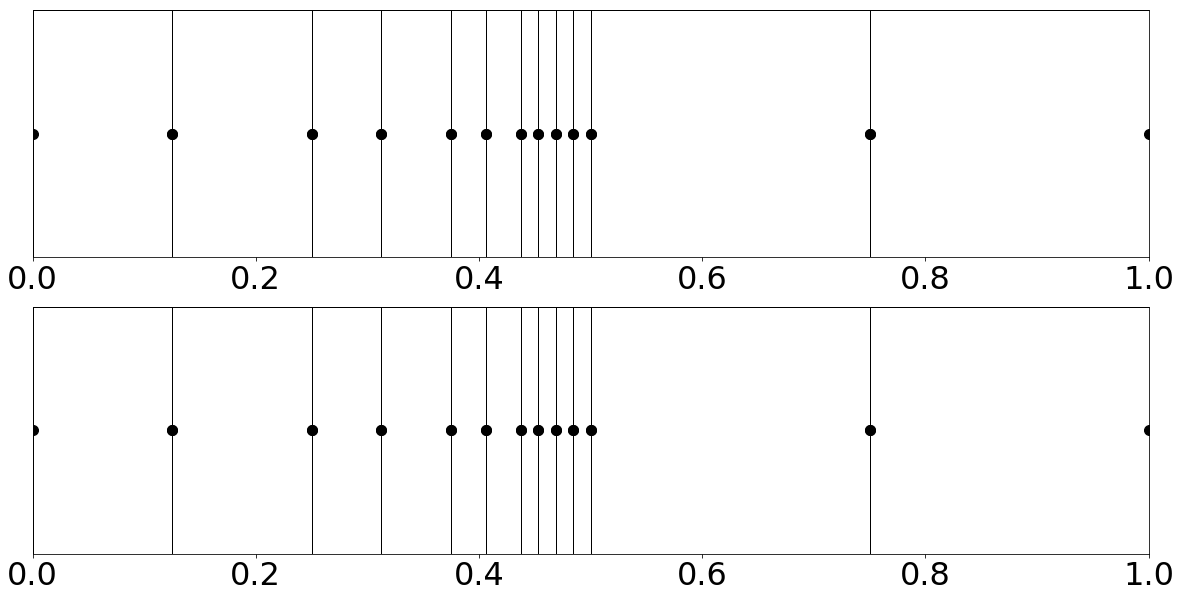

Combi Scheme:


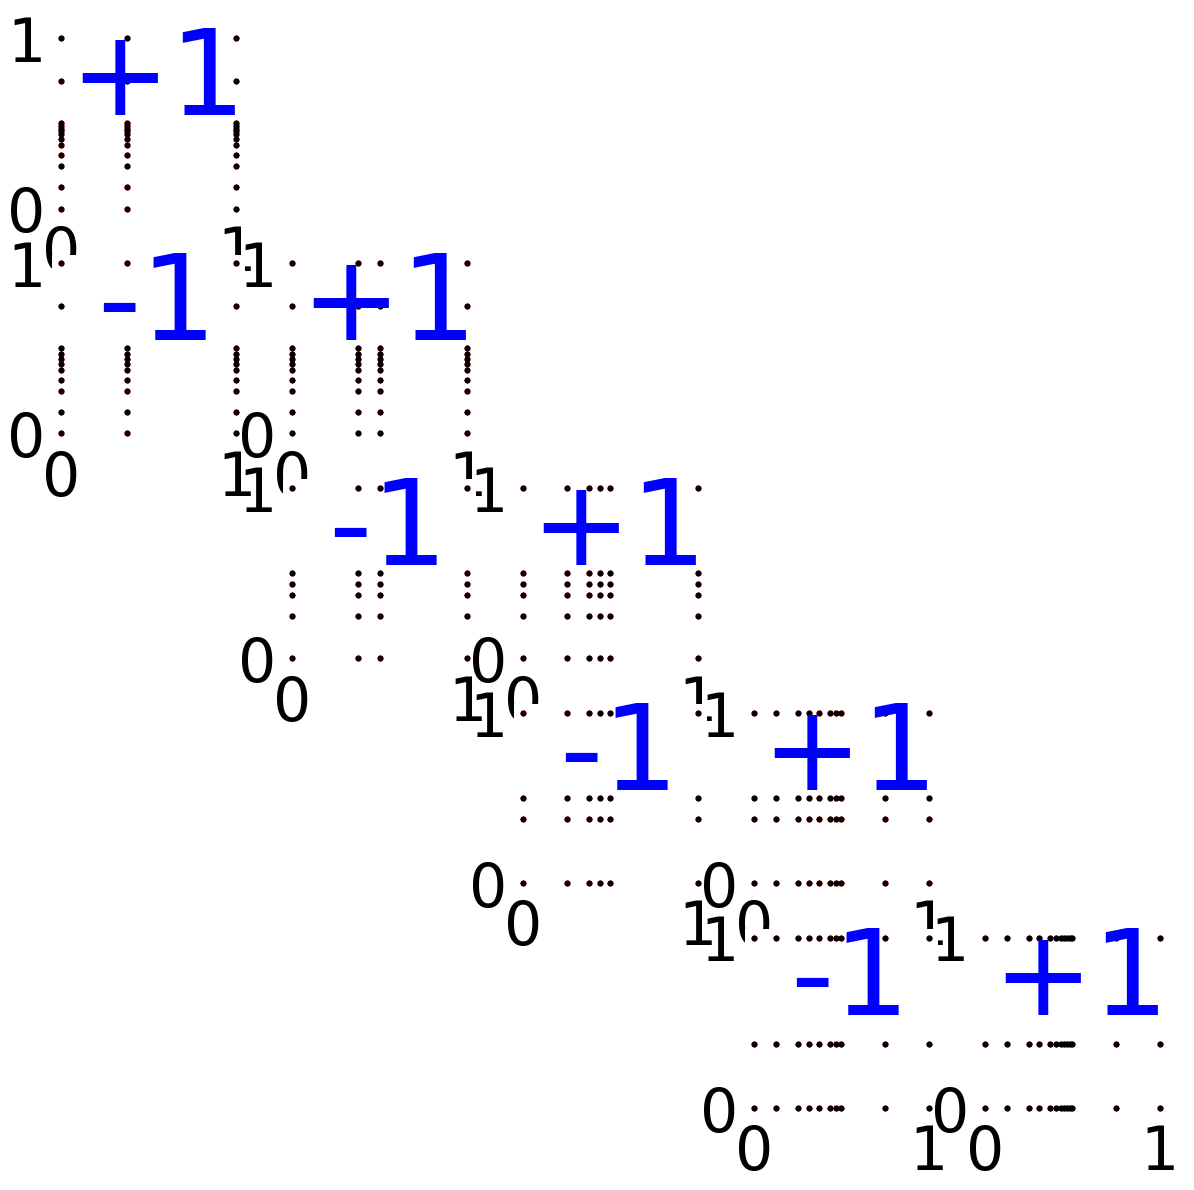

Resulting Sparse Grid:


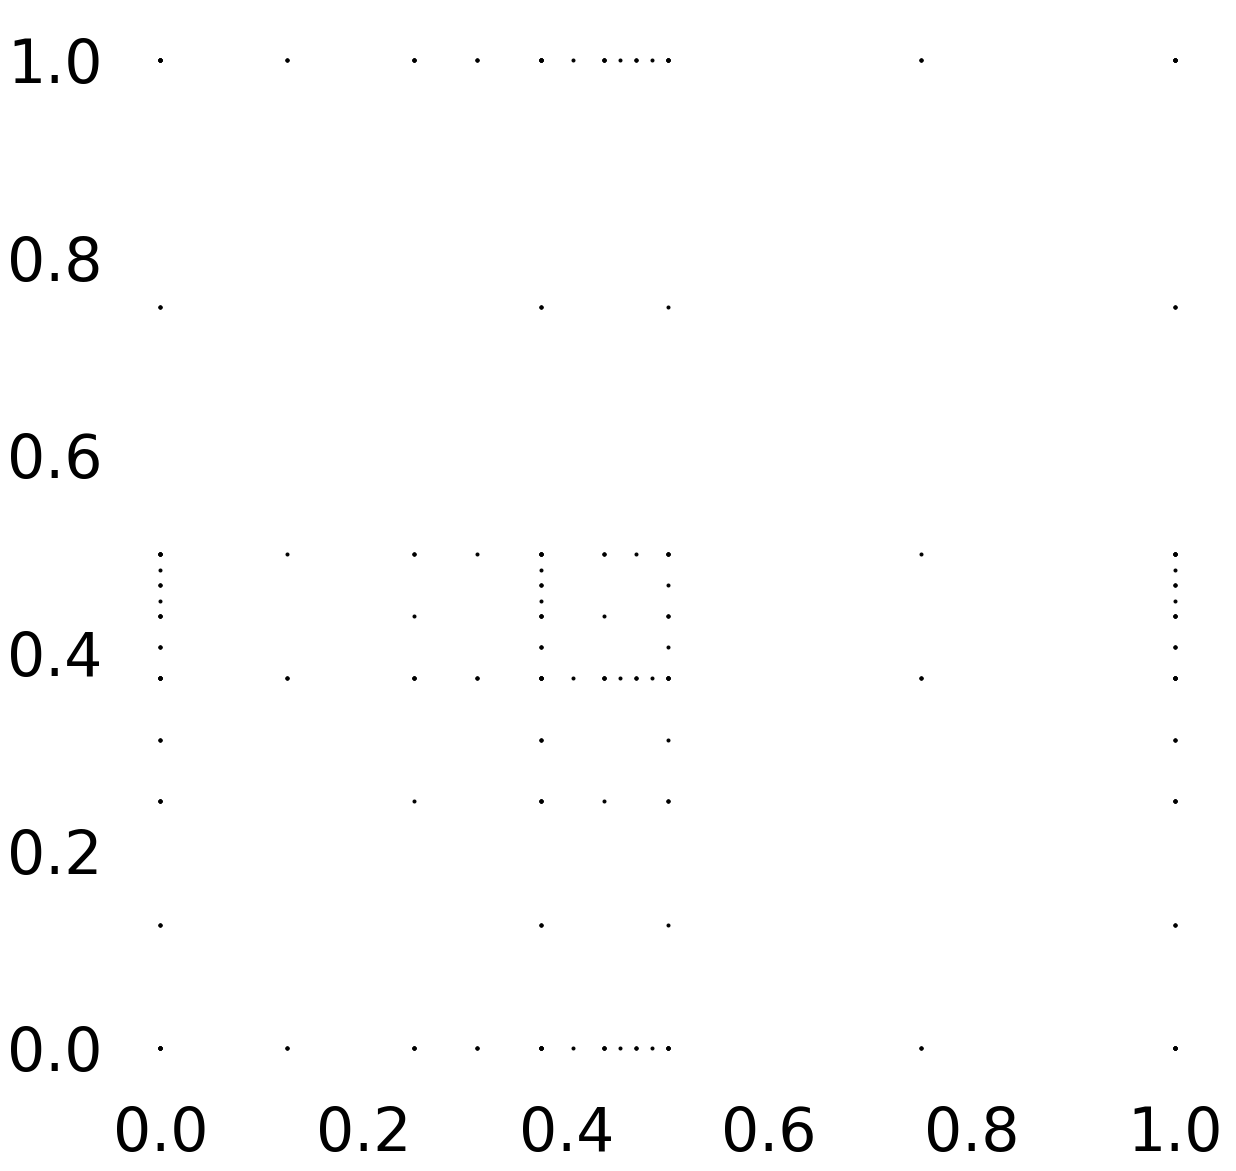

Curent number of function evaluations 92
max surplus error: 0.0008802180325554332 total surplus error: 0.005301251690452768
combiintegral: 0.12313143876298793
Current error: 0.009879306661657664
Number of refinements 16
Number of distinct points used during the refinement 92
Time used (s): 7.069947957992554
Final error: 0.009879306661657664
Number of points used in refinement: 92


In [1]:
%matplotlib inline
from sys import path
path.append('../src/')
import numpy as np
from spatiallyAdaptiveSingleDimension2 import *
from Function import *
from ErrorCalculator import *

# dimension of the problem
dim = 2

# define integration domain boundaries
a = np.zeros(dim)
b = np.ones(dim)

# define function to be integrated
midpoint = np.ones(dim) * 0.5
coefficients = np.array([ 10**0 * (d+1) for d in range(dim)])
f = GenzDiscontinious(border=midpoint,coeffs=coefficients)
# plot function
f.plot(np.ones(dim)*a,np.ones(dim)*b)

# reference integral solution for calculating errors
reference_solution = f.getAnalyticSolutionIntegral(a,b)

# define error estimator for refinement
errorOperator = ErrorCalculatorSingleDimVolumeGuided()

# define equidistant grid
grid=GlobalTrapezoidalGrid(a=a, b=b, modified_basis=False, boundary=True)

# NEW! define operation which shall be performed in the combination technique
from GridOperation import *
operation = Integration(f=f, grid=grid, dim=dim, reference_solution=reference_solution)

# define SingleDim refinement strategy for Spatially Adaptive Combination Technique
adaptiveCombiInstanceSingleDim = SpatiallyAdaptiveSingleDimensions2(np.ones(dim) * a, np.ones(dim) * b, operation=operation)

# performing the spatially adaptive refinement with the SingleDim method
adaptiveCombiInstanceSingleDim.performSpatiallyAdaptiv(1, 2, errorOperator, 10**-2, do_plot=True)

print("Number of points used in refinement:", adaptiveCombiInstanceSingleDim.get_total_num_points())

Now experiment with different functions, different dimensions and different tolerances to get to know the framework.